In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# The size of encoder representation
encoding_dim = 32

# Input place holder
input_img_fc = Input(shape=(784,))

# Encoded representation
encoded_fc = Dense(encoding_dim, activation='relu')(input_img_fc)

# Decoder with loss information
decoded_fc = Dense(784, activation='sigmoid')(encoded_fc)

#Auto encoder
autoencoder_fc = Model(input_img_fc, decoded_fc)

encoder_fc = Model(input_img_fc, encoded_fc)

encoded_input_fc = Input(shape=(encoding_dim,))
decoder_layer_fc = autoencoder_fc.layers[-1]

decoder_fc = Model(encoded_input_fc, decoder_layer_fc(encoded_input_fc))


autoencoder_fc.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder_fc.summary()

/home/yinyunjie/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

autoencoder_fc.fit(x_train, x_train,
                   epochs=10,
                   batch_size=256,
                   shuffle=True,
                   validation_data=(x_test, x_test))

(60000, 784)
(10000, 784)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10


  256/60000 [..............................] - ETA: 1:55 - loss: 0.6950

  768/60000 [..............................] - ETA: 42s - loss: 0.6942 

 1536/60000 [..............................] - ETA: 23s - loss: 0.6931

 2304/60000 [>.............................] - ETA: 17s - loss: 0.6920

 2816/60000 [>.............................] - ETA: 15s - loss: 0.6912

 3328/60000 [>.............................] - ETA: 13s - loss: 0.6904

 3840/60000 [>.............................] - ETA: 12s - loss: 0.6895

 4352/60000 [=>............................] - ETA: 12s - loss: 0.6886

 4864/60000 [=>............................] - ETA: 11s - loss: 0.6875

 5376/60000 [=>............................] - ETA: 11s - loss: 0.6862

 6144/60000 [==>...........................] - ETA: 10s - loss: 0.6840

 6656/60000 [==>...........................] - ETA: 9s - loss: 0.6821 

 7424/60000 [==>...........................] - ETA: 9s - loss: 0.6788

 7936/60000 [==>...........................] - ETA: 8s - loss: 0.6761

 8448/60000 [===>..........................] - ETA: 8s - loss: 0.6729

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.6693

 9472/60000 [===>..........................] - ETA: 8s - loss: 0.6650

 9984/60000 [===>..........................] - ETA: 7s - loss: 0.6602

10752/60000 [====>.........................] - ETA: 7s - loss: 0.6521

11520/60000 [====>.........................] - ETA: 7s - loss: 0.6428

12032/60000 [=====>........................] - ETA: 7s - loss: 0.6359

12800/60000 [=====>........................] - ETA: 6s - loss: 0.6251

13568/60000 [=====>........................] - ETA: 6s - loss: 0.6136

14336/60000 [======>.......................] - ETA: 6s - loss: 0.6020

15104/60000 [======>.......................] - ETA: 5s - loss: 0.5904

15872/60000 [======>.......................] - ETA: 5s - loss: 0.5790

16640/60000 [=======>......................] - ETA: 5s - loss: 0.5679

17408/60000 [=======>......................] - ETA: 5s - loss: 0.5573

18176/60000 [========>.....................] - ETA: 5s - loss: 0.5473

18944/60000 [========>.....................] - ETA: 5s - loss: 0.5377

19712/60000 [========>.....................] - ETA: 4s - loss: 0.5288

20480/60000 [=========>....................] - ETA: 4s - loss: 0.5205

21248/60000 [=========>....................] - ETA: 4s - loss: 0.5125

22016/60000 [==========>...................] - ETA: 4s - loss: 0.5050

22784/60000 [==========>...................] - ETA: 4s - loss: 0.4980

23552/60000 [==========>...................] - ETA: 4s - loss: 0.4914

24320/60000 [===========>..................] - ETA: 3s - loss: 0.4851

25088/60000 [===========>..................] - ETA: 3s - loss: 0.4791

25856/60000 [===========>..................] - ETA: 3s - loss: 0.4735

26624/60000 [============>.................] - ETA: 3s - loss: 0.4681

27392/60000 [============>.................] - ETA: 3s - loss: 0.4631

28160/60000 [=============>................] - ETA: 3s - loss: 0.4582

28928/60000 [=============>................] - ETA: 3s - loss: 0.4537

29696/60000 [=============>................] - ETA: 3s - loss: 0.4494

30464/60000 [==============>...............] - ETA: 3s - loss: 0.4452

31232/60000 [==============>...............] - ETA: 2s - loss: 0.4412

32000/60000 [===============>..............] - ETA: 2s - loss: 0.4374

32768/60000 [===============>..............] - ETA: 2s - loss: 0.4336

33536/60000 [===============>..............] - ETA: 2s - loss: 0.4302

34304/60000 [================>.............] - ETA: 2s - loss: 0.4269

35072/60000 [================>.............] - ETA: 2s - loss: 0.4237

35840/60000 [================>.............] - ETA: 2s - loss: 0.4206

36608/60000 [=================>............] - ETA: 2s - loss: 0.4176

37376/60000 [=================>............] - ETA: 2s - loss: 0.4147

38144/60000 [==================>...........] - ETA: 2s - loss: 0.4119

38912/60000 [==================>...........] - ETA: 2s - loss: 0.4094

39680/60000 [==================>...........] - ETA: 1s - loss: 0.4067

40448/60000 [===================>..........] - ETA: 1s - loss: 0.4043

41216/60000 [===================>..........] - ETA: 1s - loss: 0.4020

41984/60000 [===================>..........] - ETA: 1s - loss: 0.3997

42752/60000 [====================>.........] - ETA: 1s - loss: 0.3974

43520/60000 [====================>.........] - ETA: 1s - loss: 0.3954

44288/60000 [=====================>........] - ETA: 1s - loss: 0.3933

45056/60000 [=====================>........] - ETA: 1s - loss: 0.3913

45824/60000 [=====================>........] - ETA: 1s - loss: 0.3894

46592/60000 [======================>.......] - ETA: 1s - loss: 0.3875

47360/60000 [======================>.......] - ETA: 1s - loss: 0.3857

48128/60000 [=======================>......] - ETA: 1s - loss: 0.3840

48896/60000 [=======================>......] - ETA: 1s - loss: 0.3823

49664/60000 [=======================>......] - ETA: 0s - loss: 0.3806

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3790

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3774

51968/60000 [========================>.....] - ETA: 0s - loss: 0.3759

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3744

53504/60000 [=========================>....] - ETA: 0s - loss: 0.3729

54272/60000 [==========================>...] - ETA: 0s - loss: 0.3715

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3701

55808/60000 [==========================>...] - ETA: 0s - loss: 0.3688

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3675

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3662

58112/60000 [============================>.] - ETA: 0s - loss: 0.3650

58880/60000 [============================>.] - ETA: 0s - loss: 0.3638

59648/60000 [============================>.] - ETA: 0s - loss: 0.3626

60000/60000 [==============================] - 6s 94us/step - loss: 0.3621 - val_loss: 0.2717


Epoch 2/10
  256/60000 [..............................] - ETA: 5s - loss: 0.2799

  768/60000 [..............................] - ETA: 5s - loss: 0.2770

 1536/60000 [..............................] - ETA: 5s - loss: 0.2745

 2304/60000 [>.............................] - ETA: 4s - loss: 0.2731

 3072/60000 [>.............................] - ETA: 4s - loss: 0.2729

 3840/60000 [>.............................] - ETA: 4s - loss: 0.2720

 4608/60000 [=>............................] - ETA: 4s - loss: 0.2722

 5376/60000 [=>............................] - ETA: 4s - loss: 0.2723

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.2717

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.2717

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.2713

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.2716

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.2716

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.2716

10752/60000 [====>.........................] - ETA: 3s - loss: 0.2714

11520/60000 [====>.........................] - ETA: 3s - loss: 0.2711

12032/60000 [=====>........................] - ETA: 3s - loss: 0.2710

12800/60000 [=====>........................] - ETA: 3s - loss: 0.2709

13568/60000 [=====>........................] - ETA: 3s - loss: 0.2709

14336/60000 [======>.......................] - ETA: 3s - loss: 0.2709

15104/60000 [======>.......................] - ETA: 3s - loss: 0.2708

15616/60000 [======>.......................] - ETA: 3s - loss: 0.2709

16384/60000 [=======>......................] - ETA: 3s - loss: 0.2708

16896/60000 [=======>......................] - ETA: 3s - loss: 0.2708

17408/60000 [=======>......................] - ETA: 3s - loss: 0.2707

18176/60000 [========>.....................] - ETA: 3s - loss: 0.2706

18688/60000 [========>.....................] - ETA: 3s - loss: 0.2704

19456/60000 [========>.....................] - ETA: 3s - loss: 0.2704

20224/60000 [=========>....................] - ETA: 3s - loss: 0.2703

20992/60000 [=========>....................] - ETA: 3s - loss: 0.2701

21760/60000 [=========>....................] - ETA: 3s - loss: 0.2701

22528/60000 [==========>...................] - ETA: 3s - loss: 0.2701

23296/60000 [==========>...................] - ETA: 3s - loss: 0.2698

24064/60000 [===========>..................] - ETA: 3s - loss: 0.2697

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2697

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2695

26368/60000 [============>.................] - ETA: 2s - loss: 0.2694

27136/60000 [============>.................] - ETA: 2s - loss: 0.2694

27904/60000 [============>.................] - ETA: 2s - loss: 0.2692

28672/60000 [=============>................] - ETA: 2s - loss: 0.2692

29440/60000 [=============>................] - ETA: 2s - loss: 0.2691

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2690

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2689

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2689

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2688

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2687

34048/60000 [================>.............] - ETA: 2s - loss: 0.2686

34816/60000 [================>.............] - ETA: 2s - loss: 0.2685

35584/60000 [================>.............] - ETA: 1s - loss: 0.2683

36352/60000 [=================>............] - ETA: 1s - loss: 0.2682

37120/60000 [=================>............] - ETA: 1s - loss: 0.2681

37888/60000 [=================>............] - ETA: 1s - loss: 0.2680

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2679

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2678

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2677

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2676

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2675

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2674

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2673

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2672

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2671

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2670

46336/60000 [======================>.......] - ETA: 1s - loss: 0.2669

47104/60000 [======================>.......] - ETA: 1s - loss: 0.2669

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2668

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2667

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2665

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2664

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2663

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2662

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2661

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2660

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2658

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2657

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2656

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2654

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2653

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2652

58624/60000 [============================>.] - ETA: 0s - loss: 0.2651

59392/60000 [============================>.] - ETA: 0s - loss: 0.2649

60000/60000 [==============================] - 5s 83us/step - loss: 0.2649 - val_loss: 0.2543


Epoch 3/10
  256/60000 [..............................] - ETA: 6s - loss: 0.2571

 1024/60000 [..............................] - ETA: 5s - loss: 0.2564

 1792/60000 [..............................] - ETA: 4s - loss: 0.2561

 2560/60000 [>.............................] - ETA: 4s - loss: 0.2556

 3328/60000 [>.............................] - ETA: 4s - loss: 0.2556

 4096/60000 [=>............................] - ETA: 4s - loss: 0.2553

 4864/60000 [=>............................] - ETA: 4s - loss: 0.2549

 5632/60000 [=>............................] - ETA: 4s - loss: 0.2547

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.2546

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.2545

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.2548

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.2546

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.2543

10240/60000 [====>.........................] - ETA: 3s - loss: 0.2540

11008/60000 [====>.........................] - ETA: 3s - loss: 0.2537

11776/60000 [====>.........................] - ETA: 3s - loss: 0.2535

12544/60000 [=====>........................] - ETA: 3s - loss: 0.2534

13312/60000 [=====>........................] - ETA: 3s - loss: 0.2532

14080/60000 [======>.......................] - ETA: 3s - loss: 0.2530

14848/60000 [======>.......................] - ETA: 3s - loss: 0.2529

15616/60000 [======>.......................] - ETA: 3s - loss: 0.2528

16128/60000 [=======>......................] - ETA: 3s - loss: 0.2527

16896/60000 [=======>......................] - ETA: 3s - loss: 0.2526

17664/60000 [=======>......................] - ETA: 3s - loss: 0.2524

18432/60000 [========>.....................] - ETA: 3s - loss: 0.2522

19200/60000 [========>.....................] - ETA: 3s - loss: 0.2520

19968/60000 [========>.....................] - ETA: 3s - loss: 0.2518

20480/60000 [=========>....................] - ETA: 3s - loss: 0.2516

21248/60000 [=========>....................] - ETA: 3s - loss: 0.2515

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2512

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2510

23552/60000 [==========>...................] - ETA: 2s - loss: 0.2508

24320/60000 [===========>..................] - ETA: 2s - loss: 0.2506

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2504

25856/60000 [===========>..................] - ETA: 2s - loss: 0.2504

26624/60000 [============>.................] - ETA: 2s - loss: 0.2502

27392/60000 [============>.................] - ETA: 2s - loss: 0.2501

28160/60000 [=============>................] - ETA: 2s - loss: 0.2499

28928/60000 [=============>................] - ETA: 2s - loss: 0.2497

29696/60000 [=============>................] - ETA: 2s - loss: 0.2495

30464/60000 [==============>...............] - ETA: 2s - loss: 0.2494

31232/60000 [==============>...............] - ETA: 2s - loss: 0.2492

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2491

32768/60000 [===============>..............] - ETA: 2s - loss: 0.2490

33536/60000 [===============>..............] - ETA: 2s - loss: 0.2489

34304/60000 [================>.............] - ETA: 1s - loss: 0.2487

35072/60000 [================>.............] - ETA: 1s - loss: 0.2485

35840/60000 [================>.............] - ETA: 1s - loss: 0.2483

36608/60000 [=================>............] - ETA: 1s - loss: 0.2481

37376/60000 [=================>............] - ETA: 1s - loss: 0.2478

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2477

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2475

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2474

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2472

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2471

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2469

42752/60000 [====================>.........] - ETA: 1s - loss: 0.2468

43520/60000 [====================>.........] - ETA: 1s - loss: 0.2466

44288/60000 [=====================>........] - ETA: 1s - loss: 0.2464

45056/60000 [=====================>........] - ETA: 1s - loss: 0.2463

45824/60000 [=====================>........] - ETA: 1s - loss: 0.2461

46592/60000 [======================>.......] - ETA: 1s - loss: 0.2459

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2458

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2456

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2454

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2452

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2451

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2450

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2448

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2447

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2445

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2443

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2442

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2441

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2439

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2437

58112/60000 [============================>.] - ETA: 0s - loss: 0.2435

58880/60000 [============================>.] - ETA: 0s - loss: 0.2433

59648/60000 [============================>.] - ETA: 0s - loss: 0.2431

60000/60000 [==============================] - 5s 80us/step - loss: 0.2431 - val_loss: 0.2300


Epoch 4/10
  256/60000 [..............................] - ETA: 8s - loss: 0.2287

  768/60000 [..............................] - ETA: 6s - loss: 0.2314

 1536/60000 [..............................] - ETA: 5s - loss: 0.2321

 2304/60000 [>.............................] - ETA: 5s - loss: 0.2320

 3072/60000 [>.............................] - ETA: 5s - loss: 0.2309

 3840/60000 [>.............................] - ETA: 4s - loss: 0.2306

 4608/60000 [=>............................] - ETA: 4s - loss: 0.2308

 5376/60000 [=>............................] - ETA: 4s - loss: 0.2307

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.2304

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.2299

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.2299

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.2298

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.2296

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.2295

10752/60000 [====>.........................] - ETA: 3s - loss: 0.2295

11520/60000 [====>.........................] - ETA: 3s - loss: 0.2294

12288/60000 [=====>........................] - ETA: 3s - loss: 0.2293

13056/60000 [=====>........................] - ETA: 3s - loss: 0.2293

13824/60000 [=====>........................] - ETA: 3s - loss: 0.2292

14592/60000 [======>.......................] - ETA: 3s - loss: 0.2289

15360/60000 [======>.......................] - ETA: 3s - loss: 0.2286

16128/60000 [=======>......................] - ETA: 3s - loss: 0.2284

16896/60000 [=======>......................] - ETA: 3s - loss: 0.2284

17664/60000 [=======>......................] - ETA: 3s - loss: 0.2283

18432/60000 [========>.....................] - ETA: 3s - loss: 0.2280

19200/60000 [========>.....................] - ETA: 3s - loss: 0.2279

19968/60000 [========>.....................] - ETA: 3s - loss: 0.2278

20736/60000 [=========>....................] - ETA: 3s - loss: 0.2277

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2276

22272/60000 [==========>...................] - ETA: 2s - loss: 0.2274

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2273

23808/60000 [==========>...................] - ETA: 2s - loss: 0.2272

24576/60000 [===========>..................] - ETA: 2s - loss: 0.2270

25344/60000 [===========>..................] - ETA: 2s - loss: 0.2267

26112/60000 [============>.................] - ETA: 2s - loss: 0.2266

26880/60000 [============>.................] - ETA: 2s - loss: 0.2265

27648/60000 [============>.................] - ETA: 2s - loss: 0.2264

28416/60000 [=============>................] - ETA: 2s - loss: 0.2263

29184/60000 [=============>................] - ETA: 2s - loss: 0.2262

29952/60000 [=============>................] - ETA: 2s - loss: 0.2261

30720/60000 [==============>...............] - ETA: 2s - loss: 0.2260

31488/60000 [==============>...............] - ETA: 2s - loss: 0.2259

32256/60000 [===============>..............] - ETA: 2s - loss: 0.2257

33024/60000 [===============>..............] - ETA: 2s - loss: 0.2256

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2255

34560/60000 [================>.............] - ETA: 1s - loss: 0.2253

35328/60000 [================>.............] - ETA: 1s - loss: 0.2252

36096/60000 [=================>............] - ETA: 1s - loss: 0.2252

36864/60000 [=================>............] - ETA: 1s - loss: 0.2250

37632/60000 [=================>............] - ETA: 1s - loss: 0.2249

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2247

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2246

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2245

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2244

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2242

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2242

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2240

43776/60000 [====================>.........] - ETA: 1s - loss: 0.2239

44544/60000 [=====================>........] - ETA: 1s - loss: 0.2238

45312/60000 [=====================>........] - ETA: 1s - loss: 0.2237

46080/60000 [======================>.......] - ETA: 1s - loss: 0.2235

46848/60000 [======================>.......] - ETA: 1s - loss: 0.2234

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2233

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2232

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2231

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2229

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2229

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2227

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2226

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2225

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2223

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2223

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2222

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2221

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2220

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2219

58368/60000 [============================>.] - ETA: 0s - loss: 0.2217

59136/60000 [============================>.] - ETA: 0s - loss: 0.2216

59904/60000 [============================>.] - ETA: 0s - loss: 0.2216

60000/60000 [==============================] - 5s 80us/step - loss: 0.2216 - val_loss: 0.2117


Epoch 5/10
  256/60000 [..............................] - ETA: 6s - loss: 0.2110

 1024/60000 [..............................] - ETA: 5s - loss: 0.2125

 1792/60000 [..............................] - ETA: 4s - loss: 0.2123

 2560/60000 [>.............................] - ETA: 4s - loss: 0.2125

 3328/60000 [>.............................] - ETA: 4s - loss: 0.2117

 4096/60000 [=>............................] - ETA: 4s - loss: 0.2119

 4864/60000 [=>............................] - ETA: 4s - loss: 0.2120

 5632/60000 [=>............................] - ETA: 4s - loss: 0.2118

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.2120

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.2118

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.2119

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.2115

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.2115

10240/60000 [====>.........................] - ETA: 3s - loss: 0.2114

11008/60000 [====>.........................] - ETA: 3s - loss: 0.2116

11776/60000 [====>.........................] - ETA: 3s - loss: 0.2117

12544/60000 [=====>........................] - ETA: 3s - loss: 0.2117

13312/60000 [=====>........................] - ETA: 3s - loss: 0.2118

14080/60000 [======>.......................] - ETA: 3s - loss: 0.2115

14848/60000 [======>.......................] - ETA: 3s - loss: 0.2115

15616/60000 [======>.......................] - ETA: 3s - loss: 0.2114

16384/60000 [=======>......................] - ETA: 3s - loss: 0.2113

17152/60000 [=======>......................] - ETA: 3s - loss: 0.2112

17920/60000 [=======>......................] - ETA: 3s - loss: 0.2111

18688/60000 [========>.....................] - ETA: 3s - loss: 0.2110

19456/60000 [========>.....................] - ETA: 3s - loss: 0.2108

20224/60000 [=========>....................] - ETA: 3s - loss: 0.2108

20992/60000 [=========>....................] - ETA: 3s - loss: 0.2107

21760/60000 [=========>....................] - ETA: 3s - loss: 0.2107

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2106

23296/60000 [==========>...................] - ETA: 2s - loss: 0.2105

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2104

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2103

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2101

26368/60000 [============>.................] - ETA: 2s - loss: 0.2100

27136/60000 [============>.................] - ETA: 2s - loss: 0.2100

27904/60000 [============>.................] - ETA: 2s - loss: 0.2098

28672/60000 [=============>................] - ETA: 2s - loss: 0.2097

29440/60000 [=============>................] - ETA: 2s - loss: 0.2097

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2097

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2096

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2095

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2094

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2093

34048/60000 [================>.............] - ETA: 2s - loss: 0.2093

34816/60000 [================>.............] - ETA: 1s - loss: 0.2092

35584/60000 [================>.............] - ETA: 1s - loss: 0.2092

36352/60000 [=================>............] - ETA: 1s - loss: 0.2092

37120/60000 [=================>............] - ETA: 1s - loss: 0.2091

37888/60000 [=================>............] - ETA: 1s - loss: 0.2090

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2090

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2089

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2088

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2087

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2086

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2086

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2085

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2084

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2084

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2082

46336/60000 [======================>.......] - ETA: 1s - loss: 0.2082

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2081

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2081

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2079

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2079

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2078

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2077

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2076

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2075

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2075

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2074

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2073

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2072

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2072

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2072

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2071

58624/60000 [============================>.] - ETA: 0s - loss: 0.2070

59392/60000 [============================>.] - ETA: 0s - loss: 0.2069

60000/60000 [==============================] - 5s 81us/step - loss: 0.2069 - val_loss: 0.2000


Epoch 6/10
  256/60000 [..............................] - ETA: 6s - loss: 0.2058

  768/60000 [..............................] - ETA: 7s - loss: 0.2009

 1536/60000 [..............................] - ETA: 6s - loss: 0.2012

 2304/60000 [>.............................] - ETA: 5s - loss: 0.2012

 3072/60000 [>.............................] - ETA: 5s - loss: 0.2013

 3840/60000 [>.............................] - ETA: 4s - loss: 0.2011

 4608/60000 [=>............................] - ETA: 4s - loss: 0.2010

 5376/60000 [=>............................] - ETA: 4s - loss: 0.2011

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.2011

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.2009

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.2009

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.2007

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.2005

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.2003

10752/60000 [====>.........................] - ETA: 3s - loss: 0.2001

11520/60000 [====>.........................] - ETA: 3s - loss: 0.2001

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1999

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1998

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1998

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1997

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1997

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1997

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1997

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1997

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1997

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1996

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1995

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1995

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1995

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1992

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1992

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1993

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1993

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1993

26112/60000 [============>.................] - ETA: 2s - loss: 0.1992

26880/60000 [============>.................] - ETA: 2s - loss: 0.1993

27648/60000 [============>.................] - ETA: 2s - loss: 0.1993

28416/60000 [=============>................] - ETA: 2s - loss: 0.1991

29184/60000 [=============>................] - ETA: 2s - loss: 0.1990

29952/60000 [=============>................] - ETA: 2s - loss: 0.1989

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1988

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1988

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1988

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1987

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1986

34560/60000 [================>.............] - ETA: 1s - loss: 0.1986

35328/60000 [================>.............] - ETA: 1s - loss: 0.1986

36096/60000 [=================>............] - ETA: 1s - loss: 0.1985

36864/60000 [=================>............] - ETA: 1s - loss: 0.1985

37632/60000 [=================>............] - ETA: 1s - loss: 0.1984

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1983

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1983

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1982

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1981

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1981

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1981

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1981

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1982

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1981

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1980

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1979

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1978

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1978

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1977

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1977

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1976

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1976

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1975

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1974

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1974

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1973

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1973

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1972

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1972

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1971

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1970

58368/60000 [============================>.] - ETA: 0s - loss: 0.1970

59136/60000 [============================>.] - ETA: 0s - loss: 0.1970

59904/60000 [============================>.] - ETA: 0s - loss: 0.1969

60000/60000 [==============================] - 5s 81us/step - loss: 0.1969 - val_loss: 0.1913


Epoch 7/10
  256/60000 [..............................] - ETA: 6s - loss: 0.1946

 1024/60000 [..............................] - ETA: 5s - loss: 0.1936

 1536/60000 [..............................] - ETA: 5s - loss: 0.1929

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1937

 3072/60000 [>.............................] - ETA: 4s - loss: 0.1934

 3840/60000 [>.............................] - ETA: 4s - loss: 0.1932

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1927

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1927

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1927

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1926

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1924

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1924

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1924

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1920

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1918

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1916

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1914

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1913

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1912

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1911

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1912

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1911

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1911

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1911

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1911

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1910

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1911

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1912

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1912

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1911

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1911

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1910

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1909

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1910

26112/60000 [============>.................] - ETA: 2s - loss: 0.1909

26880/60000 [============>.................] - ETA: 2s - loss: 0.1909

27648/60000 [============>.................] - ETA: 2s - loss: 0.1908

28416/60000 [=============>................] - ETA: 2s - loss: 0.1908

29184/60000 [=============>................] - ETA: 2s - loss: 0.1907

29952/60000 [=============>................] - ETA: 2s - loss: 0.1906

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1904

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1904

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1905

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1904

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1903

34560/60000 [================>.............] - ETA: 1s - loss: 0.1903

35328/60000 [================>.............] - ETA: 1s - loss: 0.1903

36096/60000 [=================>............] - ETA: 1s - loss: 0.1903

36864/60000 [=================>............] - ETA: 1s - loss: 0.1902

37632/60000 [=================>............] - ETA: 1s - loss: 0.1902

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1903

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1902

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1901

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1901

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1901

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1900

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1900

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1900

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1900

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1899

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1898

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1898

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1897

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1897

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1897

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1897

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1897

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1896

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1896

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1894

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1894

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1894

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1893

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1893

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1892

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1892

58368/60000 [============================>.] - ETA: 0s - loss: 0.1892

59136/60000 [============================>.] - ETA: 0s - loss: 0.1891

59904/60000 [============================>.] - ETA: 0s - loss: 0.1891

60000/60000 [==============================] - 5s 81us/step - loss: 0.1891 - val_loss: 0.1843


Epoch 8/10
  256/60000 [..............................] - ETA: 5s - loss: 0.1879

 1024/60000 [..............................] - ETA: 5s - loss: 0.1880

 1792/60000 [..............................] - ETA: 4s - loss: 0.1864

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1857

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1860

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1860

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1861

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1860

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1860

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1855

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1855

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1855

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1854

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1854

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1854

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1854

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1853

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1853

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1851

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1853

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1851

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1849

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1848

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1847

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1846

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1846

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1846

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1846

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1846

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1845

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1845

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1845

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1844

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1844

26368/60000 [============>.................] - ETA: 2s - loss: 0.1843

27136/60000 [============>.................] - ETA: 2s - loss: 0.1843

27904/60000 [============>.................] - ETA: 2s - loss: 0.1843

28672/60000 [=============>................] - ETA: 2s - loss: 0.1842

29440/60000 [=============>................] - ETA: 2s - loss: 0.1841

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1841

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1841

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1840

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1839

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1839

34048/60000 [================>.............] - ETA: 1s - loss: 0.1838

34816/60000 [================>.............] - ETA: 1s - loss: 0.1838

35584/60000 [================>.............] - ETA: 1s - loss: 0.1838

36352/60000 [=================>............] - ETA: 1s - loss: 0.1837

37120/60000 [=================>............] - ETA: 1s - loss: 0.1837

37888/60000 [=================>............] - ETA: 1s - loss: 0.1836

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1835

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1835

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1835

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1834

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1834

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1833

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1833

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1832

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1832

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1832

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1832

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1831

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1831

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1830

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1829

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1829

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1829

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1829

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1829

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1828

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1828

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1828

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1827

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1826

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1826

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1825

58624/60000 [============================>.] - ETA: 0s - loss: 0.1825

59392/60000 [============================>.] - ETA: 0s - loss: 0.1825

60000/60000 [==============================] - 5s 82us/step - loss: 0.1825 - val_loss: 0.1781


Epoch 9/10
  256/60000 [..............................] - ETA: 7s - loss: 0.1797

  768/60000 [..............................] - ETA: 7s - loss: 0.1794

 1536/60000 [..............................] - ETA: 6s - loss: 0.1801

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1794

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1798

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1798

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1798

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1800

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1797

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1795

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1795

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1794

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1793

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1793

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1794

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1794

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1794

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1793

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1791

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1788

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1787

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1788

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1788

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1787

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1786

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1785

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1785

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1785

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1785

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1784

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1785

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1784

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1783

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1783

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1784

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1784

26624/60000 [============>.................] - ETA: 2s - loss: 0.1783

27392/60000 [============>.................] - ETA: 2s - loss: 0.1782

28160/60000 [=============>................] - ETA: 2s - loss: 0.1782

28928/60000 [=============>................] - ETA: 2s - loss: 0.1782

29696/60000 [=============>................] - ETA: 2s - loss: 0.1781

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1781

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1780

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1781

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1781

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1780

34304/60000 [================>.............] - ETA: 2s - loss: 0.1780

35072/60000 [================>.............] - ETA: 2s - loss: 0.1779

35840/60000 [================>.............] - ETA: 2s - loss: 0.1779

36608/60000 [=================>............] - ETA: 1s - loss: 0.1778

37376/60000 [=================>............] - ETA: 1s - loss: 0.1778

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1778

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1779

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1778

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1778

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1777

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1777

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1777

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1776

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1775

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1774

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1775

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1774

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1774

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1773

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1773

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1773

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1773

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1772

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1772

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1772

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1771

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1771

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1771

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1770

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1769

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1769

58112/60000 [============================>.] - ETA: 0s - loss: 0.1768

58880/60000 [============================>.] - ETA: 0s - loss: 0.1768

59648/60000 [============================>.] - ETA: 0s - loss: 0.1768

60000/60000 [==============================] - 5s 88us/step - loss: 0.1767 - val_loss: 0.1727


Epoch 10/10
  256/60000 [..............................] - ETA: 6s - loss: 0.1678

  768/60000 [..............................] - ETA: 6s - loss: 0.1713

 1536/60000 [..............................] - ETA: 5s - loss: 0.1713

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1715

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1725

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1725

 4352/60000 [=>............................] - ETA: 4s - loss: 0.1731

 5120/60000 [=>............................] - ETA: 4s - loss: 0.1733

 5888/60000 [=>............................] - ETA: 4s - loss: 0.1733

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1738

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1736

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1738

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1739

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1738

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1739

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1740

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1739

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1738

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1737

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1737

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1737

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1737

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1736

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1734

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1734

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1735

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1735

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1735

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1735

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1734

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1734

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1732

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1732

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1730

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1730

26624/60000 [============>.................] - ETA: 2s - loss: 0.1730

27392/60000 [============>.................] - ETA: 2s - loss: 0.1730

28160/60000 [=============>................] - ETA: 2s - loss: 0.1730

28928/60000 [=============>................] - ETA: 2s - loss: 0.1730

29696/60000 [=============>................] - ETA: 2s - loss: 0.1729

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1729

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1728

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1728

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1728

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1728

34304/60000 [================>.............] - ETA: 2s - loss: 0.1727

35072/60000 [================>.............] - ETA: 2s - loss: 0.1727

35840/60000 [================>.............] - ETA: 1s - loss: 0.1726

36608/60000 [=================>............] - ETA: 1s - loss: 0.1726

37376/60000 [=================>............] - ETA: 1s - loss: 0.1726

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1726

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1725

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1725

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1724

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1724

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1723

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1723

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1723

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1723

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1723

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1723

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1722

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1722

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1722

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1721

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1720

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1720

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1719

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1719

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1719

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1719

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1718

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1717

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1717

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1717

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1717

58112/60000 [============================>.] - ETA: 0s - loss: 0.1717

58880/60000 [============================>.] - ETA: 0s - loss: 0.1717

59648/60000 [============================>.] - ETA: 0s - loss: 0.1717

60000/60000 [==============================] - 5s 85us/step - loss: 0.1717 - val_loss: 0.1680


In [5]:
encoded_imgs_fc = encoder_fc.predict(x_test)
decoded_imgs_fc = decoder_fc.predict(encoded_imgs_fc)

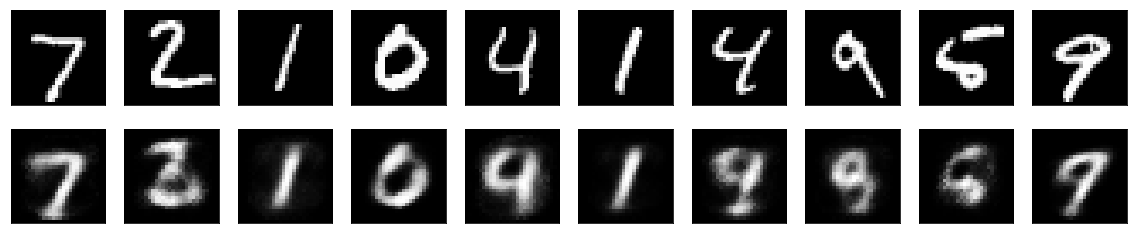

In [7]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # origin images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_fc[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [9]:
input_img_deep = Input(shape=(784, ))

encoded_deep = Dense(128, activation='relu')(input_img_deep)
encoded_deep = Dense(64, activation='relu')(encoded_deep)
encoded_deep = Dense(32, activation='relu')(encoded_deep)

decoded_deep = Dense(64, activation='relu')(encoded_deep)
decoded_deep = Dense(128, activation='relu')(decoded_deep)
decoded_deep = Dense(784, activation='sigmoid')(decoded_deep)

autoencoder_deep = Model(input_img_deep, decoded_deep)

autoencoder_deep.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder_deep.fit(x_train, x_train,
                     epochs=30,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30


  256/60000 [..............................] - ETA: 2:18 - loss: 0.6930

  512/60000 [..............................] - ETA: 1:15 - loss: 0.6928

 1024/60000 [..............................] - ETA: 42s - loss: 0.6925 

 1536/60000 [..............................] - ETA: 31s - loss: 0.6922

 2048/60000 [>.............................] - ETA: 25s - loss: 0.6919

 2560/60000 [>.............................] - ETA: 22s - loss: 0.6916

 3072/60000 [>.............................] - ETA: 19s - loss: 0.6913

 3584/60000 [>.............................] - ETA: 18s - loss: 0.6910

 4096/60000 [=>............................] - ETA: 16s - loss: 0.6906

 4608/60000 [=>............................] - ETA: 15s - loss: 0.6902

 5120/60000 [=>............................] - ETA: 14s - loss: 0.6899

 5632/60000 [=>............................] - ETA: 13s - loss: 0.6894

 6144/60000 [==>...........................] - ETA: 13s - loss: 0.6890

 6656/60000 [==>...........................] - ETA: 12s - loss: 0.6884

 7168/60000 [==>...........................] - ETA: 11s - loss: 0.6878

 7680/60000 [==>...........................] - ETA: 11s - loss: 0.6871

 8192/60000 [===>..........................] - ETA: 11s - loss: 0.6861

 8960/60000 [===>..........................] - ETA: 10s - loss: 0.6840

 9472/60000 [===>..........................] - ETA: 9s - loss: 0.6818 

 9984/60000 [===>..........................] - ETA: 9s - loss: 0.6782

10752/60000 [====>.........................] - ETA: 9s - loss: 0.6689

11520/60000 [====>.........................] - ETA: 8s - loss: 0.6528

12288/60000 [=====>........................] - ETA: 8s - loss: 0.6329

12800/60000 [=====>........................] - ETA: 8s - loss: 0.6194

13568/60000 [=====>........................] - ETA: 7s - loss: 0.6007

14080/60000 [======>.......................] - ETA: 7s - loss: 0.5894

14848/60000 [======>.......................] - ETA: 7s - loss: 0.5735

15616/60000 [======>.......................] - ETA: 6s - loss: 0.5592

16128/60000 [=======>......................] - ETA: 6s - loss: 0.5500

16896/60000 [=======>......................] - ETA: 6s - loss: 0.5375

17664/60000 [=======>......................] - ETA: 6s - loss: 0.5261

18432/60000 [========>.....................] - ETA: 6s - loss: 0.5156

19200/60000 [========>.....................] - ETA: 5s - loss: 0.5058

19968/60000 [========>.....................] - ETA: 5s - loss: 0.4969

20736/60000 [=========>....................] - ETA: 5s - loss: 0.4884

21504/60000 [=========>....................] - ETA: 5s - loss: 0.4807

22272/60000 [==========>...................] - ETA: 5s - loss: 0.4735

23040/60000 [==========>...................] - ETA: 5s - loss: 0.4668

23808/60000 [==========>...................] - ETA: 4s - loss: 0.4605

24576/60000 [===========>..................] - ETA: 4s - loss: 0.4545

25088/60000 [===========>..................] - ETA: 4s - loss: 0.4508

25856/60000 [===========>..................] - ETA: 4s - loss: 0.4453

26368/60000 [============>.................] - ETA: 4s - loss: 0.4419

27136/60000 [============>.................] - ETA: 4s - loss: 0.4371

27904/60000 [============>.................] - ETA: 4s - loss: 0.4324

28416/60000 [=============>................] - ETA: 4s - loss: 0.4295

29184/60000 [=============>................] - ETA: 3s - loss: 0.4254

29952/60000 [=============>................] - ETA: 3s - loss: 0.4214

30720/60000 [==============>...............] - ETA: 3s - loss: 0.4175

31488/60000 [==============>...............] - ETA: 3s - loss: 0.4139

32256/60000 [===============>..............] - ETA: 3s - loss: 0.4104

33024/60000 [===============>..............] - ETA: 3s - loss: 0.4070

33792/60000 [===============>..............] - ETA: 3s - loss: 0.4038

34304/60000 [================>.............] - ETA: 3s - loss: 0.4018

35072/60000 [================>.............] - ETA: 3s - loss: 0.3989

35840/60000 [================>.............] - ETA: 2s - loss: 0.3960

36608/60000 [=================>............] - ETA: 2s - loss: 0.3933

37376/60000 [=================>............] - ETA: 2s - loss: 0.3908

38144/60000 [==================>...........] - ETA: 2s - loss: 0.3883

38912/60000 [==================>...........] - ETA: 2s - loss: 0.3859

39680/60000 [==================>...........] - ETA: 2s - loss: 0.3835

40192/60000 [===================>..........] - ETA: 2s - loss: 0.3821

40960/60000 [===================>..........] - ETA: 2s - loss: 0.3799

41728/60000 [===================>..........] - ETA: 2s - loss: 0.3778

42240/60000 [====================>.........] - ETA: 2s - loss: 0.3765

43008/60000 [====================>.........] - ETA: 1s - loss: 0.3745

43776/60000 [====================>.........] - ETA: 1s - loss: 0.3725

44544/60000 [=====================>........] - ETA: 1s - loss: 0.3706

45312/60000 [=====================>........] - ETA: 1s - loss: 0.3689

46080/60000 [======================>.......] - ETA: 1s - loss: 0.3671

46848/60000 [======================>.......] - ETA: 1s - loss: 0.3655

47616/60000 [======================>.......] - ETA: 1s - loss: 0.3639

48384/60000 [=======================>......] - ETA: 1s - loss: 0.3623

49152/60000 [=======================>......] - ETA: 1s - loss: 0.3608

49920/60000 [=======================>......] - ETA: 1s - loss: 0.3593

50688/60000 [========================>.....] - ETA: 1s - loss: 0.3579

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3570

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3561

52224/60000 [=========================>....] - ETA: 0s - loss: 0.3552

52992/60000 [=========================>....] - ETA: 0s - loss: 0.3538

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3525

54528/60000 [==========================>...] - ETA: 0s - loss: 0.3513

55296/60000 [==========================>...] - ETA: 0s - loss: 0.3501

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3489

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3478

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3466

58368/60000 [============================>.] - ETA: 0s - loss: 0.3455

59136/60000 [============================>.] - ETA: 0s - loss: 0.3445

59904/60000 [============================>.] - ETA: 0s - loss: 0.3434

60000/60000 [==============================] - 7s 115us/step - loss: 0.3433 - val_loss: 0.2649


Epoch 2/30
  256/60000 [..............................] - ETA: 7s - loss: 0.2637

  768/60000 [..............................] - ETA: 6s - loss: 0.2608

 1536/60000 [..............................] - ETA: 6s - loss: 0.2627

 2304/60000 [>.............................] - ETA: 5s - loss: 0.2616

 2816/60000 [>.............................] - ETA: 5s - loss: 0.2620

 3584/60000 [>.............................] - ETA: 5s - loss: 0.2617

 4352/60000 [=>............................] - ETA: 5s - loss: 0.2614

 5120/60000 [=>............................] - ETA: 5s - loss: 0.2623

 5888/60000 [=>............................] - ETA: 5s - loss: 0.2621

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.2622

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.2628

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.2624

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.2624

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.2622

10240/60000 [====>.........................] - ETA: 4s - loss: 0.2620

10752/60000 [====>.........................] - ETA: 4s - loss: 0.2621

11520/60000 [====>.........................] - ETA: 4s - loss: 0.2619

12288/60000 [=====>........................] - ETA: 4s - loss: 0.2621

13056/60000 [=====>........................] - ETA: 4s - loss: 0.2619

13824/60000 [=====>........................] - ETA: 4s - loss: 0.2620

14592/60000 [======>.......................] - ETA: 4s - loss: 0.2617

15360/60000 [======>.......................] - ETA: 4s - loss: 0.2616

16128/60000 [=======>......................] - ETA: 4s - loss: 0.2615

16896/60000 [=======>......................] - ETA: 4s - loss: 0.2616

17408/60000 [=======>......................] - ETA: 4s - loss: 0.2615

18176/60000 [========>.....................] - ETA: 3s - loss: 0.2613

18944/60000 [========>.....................] - ETA: 3s - loss: 0.2614

19712/60000 [========>.....................] - ETA: 3s - loss: 0.2613

20480/60000 [=========>....................] - ETA: 3s - loss: 0.2611

21248/60000 [=========>....................] - ETA: 3s - loss: 0.2610

21760/60000 [=========>....................] - ETA: 3s - loss: 0.2609

22528/60000 [==========>...................] - ETA: 3s - loss: 0.2608

23296/60000 [==========>...................] - ETA: 3s - loss: 0.2607

24064/60000 [===========>..................] - ETA: 3s - loss: 0.2606

24832/60000 [===========>..................] - ETA: 3s - loss: 0.2606

25600/60000 [===========>..................] - ETA: 3s - loss: 0.2605

26368/60000 [============>.................] - ETA: 3s - loss: 0.2604

27136/60000 [============>.................] - ETA: 3s - loss: 0.2603

27904/60000 [============>.................] - ETA: 2s - loss: 0.2602

28672/60000 [=============>................] - ETA: 2s - loss: 0.2601

29440/60000 [=============>................] - ETA: 2s - loss: 0.2600

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2599

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2599

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2598

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2597

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2596

34048/60000 [================>.............] - ETA: 2s - loss: 0.2596

34816/60000 [================>.............] - ETA: 2s - loss: 0.2595

35328/60000 [================>.............] - ETA: 2s - loss: 0.2594

36096/60000 [=================>............] - ETA: 2s - loss: 0.2592

36864/60000 [=================>............] - ETA: 2s - loss: 0.2591

37632/60000 [=================>............] - ETA: 2s - loss: 0.2591

38400/60000 [==================>...........] - ETA: 2s - loss: 0.2590

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2588

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2587

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2586

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2586

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2585

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2584

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2583

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2583

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2581

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2580

46080/60000 [======================>.......] - ETA: 1s - loss: 0.2580

46848/60000 [======================>.......] - ETA: 1s - loss: 0.2579

47616/60000 [======================>.......] - ETA: 1s - loss: 0.2578

48384/60000 [=======================>......] - ETA: 1s - loss: 0.2577

49152/60000 [=======================>......] - ETA: 1s - loss: 0.2576

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2575

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2574

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2573

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2571

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2571

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2570

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2570

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2569

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2568

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2567

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2566

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2565

58624/60000 [============================>.] - ETA: 0s - loss: 0.2564

59392/60000 [============================>.] - ETA: 0s - loss: 0.2563

60000/60000 [==============================] - 6s 98us/step - loss: 0.2562 - val_loss: 0.2483


Epoch 3/30
  256/60000 [..............................] - ETA: 7s - loss: 0.2518

  768/60000 [..............................] - ETA: 7s - loss: 0.2492

 1536/60000 [..............................] - ETA: 6s - loss: 0.2490

 2304/60000 [>.............................] - ETA: 5s - loss: 0.2485

 3072/60000 [>.............................] - ETA: 5s - loss: 0.2485

 3840/60000 [>.............................] - ETA: 5s - loss: 0.2486

 4352/60000 [=>............................] - ETA: 5s - loss: 0.2486

 5120/60000 [=>............................] - ETA: 5s - loss: 0.2487

 5632/60000 [=>............................] - ETA: 5s - loss: 0.2486

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.2483

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.2481

 7680/60000 [==>...........................] - ETA: 5s - loss: 0.2478

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.2477

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.2474

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.2472

10752/60000 [====>.........................] - ETA: 4s - loss: 0.2469

11520/60000 [====>.........................] - ETA: 4s - loss: 0.2470

12288/60000 [=====>........................] - ETA: 4s - loss: 0.2469

13056/60000 [=====>........................] - ETA: 4s - loss: 0.2468

13824/60000 [=====>........................] - ETA: 4s - loss: 0.2467

14592/60000 [======>.......................] - ETA: 4s - loss: 0.2465

15360/60000 [======>.......................] - ETA: 4s - loss: 0.2463

16128/60000 [=======>......................] - ETA: 4s - loss: 0.2464

16640/60000 [=======>......................] - ETA: 4s - loss: 0.2463

17408/60000 [=======>......................] - ETA: 3s - loss: 0.2461

18176/60000 [========>.....................] - ETA: 3s - loss: 0.2459

18944/60000 [========>.....................] - ETA: 3s - loss: 0.2458

19712/60000 [========>.....................] - ETA: 3s - loss: 0.2455

20480/60000 [=========>....................] - ETA: 3s - loss: 0.2454

21248/60000 [=========>....................] - ETA: 3s - loss: 0.2453

22016/60000 [==========>...................] - ETA: 3s - loss: 0.2451

22784/60000 [==========>...................] - ETA: 3s - loss: 0.2450

23552/60000 [==========>...................] - ETA: 3s - loss: 0.2448

24320/60000 [===========>..................] - ETA: 3s - loss: 0.2446

24832/60000 [===========>..................] - ETA: 3s - loss: 0.2445

25600/60000 [===========>..................] - ETA: 3s - loss: 0.2445

26368/60000 [============>.................] - ETA: 3s - loss: 0.2443

27136/60000 [============>.................] - ETA: 3s - loss: 0.2441

27904/60000 [============>.................] - ETA: 2s - loss: 0.2440

28416/60000 [=============>................] - ETA: 2s - loss: 0.2438

28928/60000 [=============>................] - ETA: 2s - loss: 0.2437

29440/60000 [=============>................] - ETA: 2s - loss: 0.2436

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2435

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2433

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2432

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2431

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2430

34048/60000 [================>.............] - ETA: 2s - loss: 0.2428

34560/60000 [================>.............] - ETA: 2s - loss: 0.2428

35328/60000 [================>.............] - ETA: 2s - loss: 0.2427

36096/60000 [=================>............] - ETA: 2s - loss: 0.2425

36864/60000 [=================>............] - ETA: 2s - loss: 0.2424

37632/60000 [=================>............] - ETA: 2s - loss: 0.2422

38400/60000 [==================>...........] - ETA: 2s - loss: 0.2421

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2419

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2417

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2415

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2414

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2412

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2411

43776/60000 [====================>.........] - ETA: 1s - loss: 0.2410

44544/60000 [=====================>........] - ETA: 1s - loss: 0.2409

45056/60000 [=====================>........] - ETA: 1s - loss: 0.2408

45824/60000 [=====================>........] - ETA: 1s - loss: 0.2407

46592/60000 [======================>.......] - ETA: 1s - loss: 0.2405

47360/60000 [======================>.......] - ETA: 1s - loss: 0.2403

48128/60000 [=======================>......] - ETA: 1s - loss: 0.2402

48896/60000 [=======================>......] - ETA: 1s - loss: 0.2400

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2399

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2398

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2397

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2396

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2395

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2393

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2392

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2391

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2390

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2388

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2387

58112/60000 [============================>.] - ETA: 0s - loss: 0.2386

58624/60000 [============================>.] - ETA: 0s - loss: 0.2385

59136/60000 [============================>.] - ETA: 0s - loss: 0.2384

59904/60000 [============================>.] - ETA: 0s - loss: 0.2383

60000/60000 [==============================] - 6s 98us/step - loss: 0.2383 - val_loss: 0.2281


Epoch 4/30
  256/60000 [..............................] - ETA: 7s - loss: 0.2306

  768/60000 [..............................] - ETA: 6s - loss: 0.2304

 1536/60000 [..............................] - ETA: 6s - loss: 0.2283

 2304/60000 [>.............................] - ETA: 5s - loss: 0.2293

 3072/60000 [>.............................] - ETA: 5s - loss: 0.2290

 3584/60000 [>.............................] - ETA: 5s - loss: 0.2287

 4352/60000 [=>............................] - ETA: 5s - loss: 0.2285

 5120/60000 [=>............................] - ETA: 5s - loss: 0.2282

 5888/60000 [=>............................] - ETA: 5s - loss: 0.2280

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.2280

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.2282

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.2283

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.2281

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.2279

10496/60000 [====>.........................] - ETA: 4s - loss: 0.2277

11008/60000 [====>.........................] - ETA: 4s - loss: 0.2275

11776/60000 [====>.........................] - ETA: 4s - loss: 0.2275

12544/60000 [=====>........................] - ETA: 4s - loss: 0.2276

13056/60000 [=====>........................] - ETA: 4s - loss: 0.2275

13824/60000 [=====>........................] - ETA: 4s - loss: 0.2276

14592/60000 [======>.......................] - ETA: 4s - loss: 0.2276

15360/60000 [======>.......................] - ETA: 4s - loss: 0.2273

16128/60000 [=======>......................] - ETA: 4s - loss: 0.2272

16896/60000 [=======>......................] - ETA: 4s - loss: 0.2271

17408/60000 [=======>......................] - ETA: 4s - loss: 0.2271

18176/60000 [========>.....................] - ETA: 3s - loss: 0.2269

18944/60000 [========>.....................] - ETA: 3s - loss: 0.2269

19456/60000 [========>.....................] - ETA: 3s - loss: 0.2269

20224/60000 [=========>....................] - ETA: 3s - loss: 0.2268

20992/60000 [=========>....................] - ETA: 3s - loss: 0.2268

21760/60000 [=========>....................] - ETA: 3s - loss: 0.2268

22272/60000 [==========>...................] - ETA: 3s - loss: 0.2267

23040/60000 [==========>...................] - ETA: 3s - loss: 0.2265

23808/60000 [==========>...................] - ETA: 3s - loss: 0.2264

24576/60000 [===========>..................] - ETA: 3s - loss: 0.2264

25088/60000 [===========>..................] - ETA: 3s - loss: 0.2263

25856/60000 [===========>..................] - ETA: 3s - loss: 0.2262

26624/60000 [============>.................] - ETA: 3s - loss: 0.2262

27136/60000 [============>.................] - ETA: 3s - loss: 0.2262

27648/60000 [============>.................] - ETA: 3s - loss: 0.2262

28416/60000 [=============>................] - ETA: 2s - loss: 0.2262

29184/60000 [=============>................] - ETA: 2s - loss: 0.2262

29696/60000 [=============>................] - ETA: 2s - loss: 0.2261

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2261

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2260

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2259

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2259

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2257

34048/60000 [================>.............] - ETA: 2s - loss: 0.2257

34816/60000 [================>.............] - ETA: 2s - loss: 0.2256

35584/60000 [================>.............] - ETA: 2s - loss: 0.2255

36352/60000 [=================>............] - ETA: 2s - loss: 0.2254

37120/60000 [=================>............] - ETA: 2s - loss: 0.2253

37888/60000 [=================>............] - ETA: 2s - loss: 0.2252

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2252

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2251

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2251

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2251

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2251

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2251

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2251

43776/60000 [====================>.........] - ETA: 1s - loss: 0.2250

44544/60000 [=====================>........] - ETA: 1s - loss: 0.2249

45312/60000 [=====================>........] - ETA: 1s - loss: 0.2248

46080/60000 [======================>.......] - ETA: 1s - loss: 0.2248

46848/60000 [======================>.......] - ETA: 1s - loss: 0.2247

47616/60000 [======================>.......] - ETA: 1s - loss: 0.2246

48384/60000 [=======================>......] - ETA: 1s - loss: 0.2245

49152/60000 [=======================>......] - ETA: 1s - loss: 0.2244

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2243

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2242

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2242

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2241

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2241

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2240

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2239

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2238

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2237

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2236

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2235

58112/60000 [============================>.] - ETA: 0s - loss: 0.2234

58880/60000 [============================>.] - ETA: 0s - loss: 0.2233

59648/60000 [============================>.] - ETA: 0s - loss: 0.2232

60000/60000 [==============================] - 6s 98us/step - loss: 0.2232 - val_loss: 0.2145


Epoch 5/30
  256/60000 [..............................] - ETA: 7s - loss: 0.2152

  768/60000 [..............................] - ETA: 6s - loss: 0.2168

 1280/60000 [..............................] - ETA: 6s - loss: 0.2145

 2048/60000 [>.............................] - ETA: 5s - loss: 0.2137

 2816/60000 [>.............................] - ETA: 5s - loss: 0.2146

 3328/60000 [>.............................] - ETA: 5s - loss: 0.2145

 4096/60000 [=>............................] - ETA: 5s - loss: 0.2141

 4864/60000 [=>............................] - ETA: 5s - loss: 0.2135

 5632/60000 [=>............................] - ETA: 5s - loss: 0.2134

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.2127

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.2124

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.2129

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.2127

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.2126

10240/60000 [====>.........................] - ETA: 4s - loss: 0.2128

11008/60000 [====>.........................] - ETA: 4s - loss: 0.2129

11776/60000 [====>.........................] - ETA: 4s - loss: 0.2130

12288/60000 [=====>........................] - ETA: 4s - loss: 0.2130

13056/60000 [=====>........................] - ETA: 4s - loss: 0.2127

13824/60000 [=====>........................] - ETA: 4s - loss: 0.2124

14592/60000 [======>.......................] - ETA: 4s - loss: 0.2121

15360/60000 [======>.......................] - ETA: 4s - loss: 0.2121

16128/60000 [=======>......................] - ETA: 4s - loss: 0.2120

16896/60000 [=======>......................] - ETA: 4s - loss: 0.2120

17664/60000 [=======>......................] - ETA: 3s - loss: 0.2117

18432/60000 [========>.....................] - ETA: 3s - loss: 0.2116

19200/60000 [========>.....................] - ETA: 3s - loss: 0.2115

19968/60000 [========>.....................] - ETA: 3s - loss: 0.2115

20736/60000 [=========>....................] - ETA: 3s - loss: 0.2113

21504/60000 [=========>....................] - ETA: 3s - loss: 0.2112

22272/60000 [==========>...................] - ETA: 3s - loss: 0.2111

23040/60000 [==========>...................] - ETA: 3s - loss: 0.2110

23552/60000 [==========>...................] - ETA: 3s - loss: 0.2109

24320/60000 [===========>..................] - ETA: 3s - loss: 0.2108

25088/60000 [===========>..................] - ETA: 3s - loss: 0.2106

25856/60000 [===========>..................] - ETA: 3s - loss: 0.2105

26624/60000 [============>.................] - ETA: 3s - loss: 0.2103

27392/60000 [============>.................] - ETA: 3s - loss: 0.2102

28160/60000 [=============>................] - ETA: 2s - loss: 0.2100

28672/60000 [=============>................] - ETA: 2s - loss: 0.2100

29440/60000 [=============>................] - ETA: 2s - loss: 0.2098

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2097

30720/60000 [==============>...............] - ETA: 2s - loss: 0.2096

31488/60000 [==============>...............] - ETA: 2s - loss: 0.2096

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2095

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2094

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2093

34048/60000 [================>.............] - ETA: 2s - loss: 0.2091

34816/60000 [================>.............] - ETA: 2s - loss: 0.2090

35328/60000 [================>.............] - ETA: 2s - loss: 0.2089

36096/60000 [=================>............] - ETA: 2s - loss: 0.2088

36864/60000 [=================>............] - ETA: 2s - loss: 0.2087

37632/60000 [=================>............] - ETA: 2s - loss: 0.2085

38400/60000 [==================>...........] - ETA: 2s - loss: 0.2084

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2083

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2082

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2081

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2080

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2080

42752/60000 [====================>.........] - ETA: 1s - loss: 0.2079

43520/60000 [====================>.........] - ETA: 1s - loss: 0.2078

44288/60000 [=====================>........] - ETA: 1s - loss: 0.2078

45056/60000 [=====================>........] - ETA: 1s - loss: 0.2077

45824/60000 [=====================>........] - ETA: 1s - loss: 0.2076

46592/60000 [======================>.......] - ETA: 1s - loss: 0.2075

47360/60000 [======================>.......] - ETA: 1s - loss: 0.2075

47872/60000 [======================>.......] - ETA: 1s - loss: 0.2074

48640/60000 [=======================>......] - ETA: 1s - loss: 0.2073

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2073

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2072

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2071

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2070

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2070

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2068

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2068

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2067

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2067

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2066

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2066

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2065

58368/60000 [============================>.] - ETA: 0s - loss: 0.2064

59136/60000 [============================>.] - ETA: 0s - loss: 0.2063

59904/60000 [============================>.] - ETA: 0s - loss: 0.2062

60000/60000 [==============================] - 6s 98us/step - loss: 0.2062 - val_loss: 0.1979


Epoch 6/30
  256/60000 [..............................] - ETA: 9s - loss: 0.1946

  768/60000 [..............................] - ETA: 7s - loss: 0.1967

 1280/60000 [..............................] - ETA: 7s - loss: 0.1987

 2048/60000 [>.............................] - ETA: 6s - loss: 0.1984

 2816/60000 [>.............................] - ETA: 6s - loss: 0.1978

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1984

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1985

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1985

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1983

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1981

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1980

 7936/60000 [==>...........................] - ETA: 5s - loss: 0.1978

 8448/60000 [===>..........................] - ETA: 5s - loss: 0.1976

 9216/60000 [===>..........................] - ETA: 5s - loss: 0.1977

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1977

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1978

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1979

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1978

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1979

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1979

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1979

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1977

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1977

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1977

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1977

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1976

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1975

17920/60000 [=======>......................] - ETA: 4s - loss: 0.1974

18688/60000 [========>.....................] - ETA: 4s - loss: 0.1972

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1970

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1968

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1969

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1968

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1967

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1967

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1966

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1966

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1966

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1967

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1966

26112/60000 [============>.................] - ETA: 3s - loss: 0.1965

26880/60000 [============>.................] - ETA: 3s - loss: 0.1965

27648/60000 [============>.................] - ETA: 3s - loss: 0.1965

28416/60000 [=============>................] - ETA: 3s - loss: 0.1964

28928/60000 [=============>................] - ETA: 3s - loss: 0.1963

29696/60000 [=============>................] - ETA: 2s - loss: 0.1963

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1962

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1962

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1961

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1961

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1960

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1960

34560/60000 [================>.............] - ETA: 2s - loss: 0.1960

35072/60000 [================>.............] - ETA: 2s - loss: 0.1959

35840/60000 [================>.............] - ETA: 2s - loss: 0.1959

36608/60000 [=================>............] - ETA: 2s - loss: 0.1958

37376/60000 [=================>............] - ETA: 2s - loss: 0.1957

37888/60000 [=================>............] - ETA: 2s - loss: 0.1957

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1956

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1956

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1955

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1954

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1954

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1953

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1953

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1953

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1954

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1953

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1952

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1952

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1951

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1951

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1951

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1950

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1950

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1950

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1950

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1949

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1948

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1948

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1948

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1947

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1947

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1947

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1946

58112/60000 [============================>.] - ETA: 0s - loss: 0.1945

58880/60000 [============================>.] - ETA: 0s - loss: 0.1945

59648/60000 [============================>.] - ETA: 0s - loss: 0.1945

60000/60000 [==============================] - 6s 100us/step - loss: 0.1944 - val_loss: 0.1883


Epoch 7/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1935

  768/60000 [..............................] - ETA: 6s - loss: 0.1934

 1280/60000 [..............................] - ETA: 6s - loss: 0.1920

 2048/60000 [>.............................] - ETA: 6s - loss: 0.1918

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1914

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1905

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1909

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1904

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1901

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1900

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1900

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.1900

 8192/60000 [===>..........................] - ETA: 5s - loss: 0.1894

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1898

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1897

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1897

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1896

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1895

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1896

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1896

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1894

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1894

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1894

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1894

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1892

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1890

18176/60000 [========>.....................] - ETA: 4s - loss: 0.1890

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1889

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1890

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1889

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1888

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1887

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1887

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1886

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1885

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1885

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1885

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1886

26624/60000 [============>.................] - ETA: 3s - loss: 0.1886

27392/60000 [============>.................] - ETA: 3s - loss: 0.1885

28160/60000 [=============>................] - ETA: 3s - loss: 0.1886

28672/60000 [=============>................] - ETA: 2s - loss: 0.1886

29440/60000 [=============>................] - ETA: 2s - loss: 0.1886

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1886

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1886

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1886

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1885

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1885

34048/60000 [================>.............] - ETA: 2s - loss: 0.1885

34560/60000 [================>.............] - ETA: 2s - loss: 0.1884

35328/60000 [================>.............] - ETA: 2s - loss: 0.1885

36096/60000 [=================>............] - ETA: 2s - loss: 0.1884

36864/60000 [=================>............] - ETA: 2s - loss: 0.1883

37632/60000 [=================>............] - ETA: 2s - loss: 0.1883

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1883

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1882

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1882

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1882

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1882

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1881

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1881

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1880

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1880

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1879

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1879

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1879

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1879

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1878

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1878

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1878

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1877

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1877

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1877

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1876

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1875

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1875

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1875

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1875

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1874

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1874

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1873

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1873

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1872

58368/60000 [============================>.] - ETA: 0s - loss: 0.1872

58880/60000 [============================>.] - ETA: 0s - loss: 0.1872

59648/60000 [============================>.] - ETA: 0s - loss: 0.1871

60000/60000 [==============================] - 6s 100us/step - loss: 0.1871 - val_loss: 0.1835


Epoch 8/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1835

  768/60000 [..............................] - ETA: 6s - loss: 0.1865

 1280/60000 [..............................] - ETA: 6s - loss: 0.1861

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1860

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1859

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1854

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1851

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1852

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1850

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1852

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1848

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1847

 7936/60000 [==>...........................] - ETA: 5s - loss: 0.1848

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1848

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1847

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1845

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1843

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1841

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1840

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1839

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1838

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1838

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1838

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1837

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1836

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1837

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1836

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1835

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1833

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1833

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1832

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1831

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1832

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1832

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1831

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1830

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1830

26624/60000 [============>.................] - ETA: 3s - loss: 0.1830

27136/60000 [============>.................] - ETA: 3s - loss: 0.1829

27904/60000 [============>.................] - ETA: 3s - loss: 0.1829

28672/60000 [=============>................] - ETA: 2s - loss: 0.1829

29184/60000 [=============>................] - ETA: 2s - loss: 0.1828

29952/60000 [=============>................] - ETA: 2s - loss: 0.1827

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1826

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1826

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1826

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1826

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1825

34304/60000 [================>.............] - ETA: 2s - loss: 0.1824

35072/60000 [================>.............] - ETA: 2s - loss: 0.1823

35840/60000 [================>.............] - ETA: 2s - loss: 0.1823

36608/60000 [=================>............] - ETA: 2s - loss: 0.1822

37376/60000 [=================>............] - ETA: 2s - loss: 0.1822

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1821

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1821

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1820

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1819

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1819

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1819

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1818

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1817

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1817

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1816

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1816

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1815

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1815

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1813

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1813

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1812

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1811

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1811

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1811

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1810

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1810

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1810

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1809

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1808

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1808

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1807

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1807

58112/60000 [============================>.] - ETA: 0s - loss: 0.1807

58880/60000 [============================>.] - ETA: 0s - loss: 0.1807

59648/60000 [============================>.] - ETA: 0s - loss: 0.1806

60000/60000 [==============================] - 6s 99us/step - loss: 0.1806 - val_loss: 0.1773


Epoch 9/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1819

  768/60000 [..............................] - ETA: 6s - loss: 0.1761

 1536/60000 [..............................] - ETA: 5s - loss: 0.1774

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1776

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1775

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1776

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1776

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1769

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1768

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1768

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1765

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.1766

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1768

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1767

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1767

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1767

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1765

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1766

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1766

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1765

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1764

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1763

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1762

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1762

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1762

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1761

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1761

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1760

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1761

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1760

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1761

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1761

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1760

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1760

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1759

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1759

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1760

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1760

26368/60000 [============>.................] - ETA: 3s - loss: 0.1760

27136/60000 [============>.................] - ETA: 3s - loss: 0.1759

27904/60000 [============>.................] - ETA: 3s - loss: 0.1757

28672/60000 [=============>................] - ETA: 2s - loss: 0.1757

29440/60000 [=============>................] - ETA: 2s - loss: 0.1756

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1757

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1757

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1757

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1757

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1756

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1756

34304/60000 [================>.............] - ETA: 2s - loss: 0.1755

35072/60000 [================>.............] - ETA: 2s - loss: 0.1754

35840/60000 [================>.............] - ETA: 2s - loss: 0.1754

36608/60000 [=================>............] - ETA: 2s - loss: 0.1753

37376/60000 [=================>............] - ETA: 2s - loss: 0.1753

37888/60000 [=================>............] - ETA: 2s - loss: 0.1752

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1753

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1752

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1752

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1751

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1751

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1751

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1750

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1749

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1748

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1748

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1748

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1747

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1747

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1747

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1746

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1746

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1746

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1745

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1745

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1745

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1745

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1745

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1744

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1744

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1744

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1743

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1743

58368/60000 [============================>.] - ETA: 0s - loss: 0.1743

59136/60000 [============================>.] - ETA: 0s - loss: 0.1742

59904/60000 [============================>.] - ETA: 0s - loss: 0.1742

60000/60000 [==============================] - 6s 99us/step - loss: 0.1742 - val_loss: 0.1739


Epoch 10/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1805

  768/60000 [..............................] - ETA: 6s - loss: 0.1739

 1536/60000 [..............................] - ETA: 6s - loss: 0.1722

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1722

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1719

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1712

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1708

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1707

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1703

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1698

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1695

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1696

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1696

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1699

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1698

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1700

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1700

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1702

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1704

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1705

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1704

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1705

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1706

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1705

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1704

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1702

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1702

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1702

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1702

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1701

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1702

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1702

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1702

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1702

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1702

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1702

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1703

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1703

26368/60000 [============>.................] - ETA: 3s - loss: 0.1702

27136/60000 [============>.................] - ETA: 3s - loss: 0.1701

27904/60000 [============>.................] - ETA: 3s - loss: 0.1701

28672/60000 [=============>................] - ETA: 2s - loss: 0.1701

29440/60000 [=============>................] - ETA: 2s - loss: 0.1700

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1700

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1700

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1700

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1699

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1699

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1699

34304/60000 [================>.............] - ETA: 2s - loss: 0.1698

34816/60000 [================>.............] - ETA: 2s - loss: 0.1697

35584/60000 [================>.............] - ETA: 2s - loss: 0.1696

36352/60000 [=================>............] - ETA: 2s - loss: 0.1696

37120/60000 [=================>............] - ETA: 2s - loss: 0.1696

37888/60000 [=================>............] - ETA: 2s - loss: 0.1696

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1695

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1694

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1694

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1694

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1694

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1693

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1693

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1692

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1692

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1692

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1692

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1691

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1691

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1691

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1690

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1689

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1689

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1688

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1689

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1689

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1689

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1689

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1689

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1688

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1688

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1688

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1688

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1687

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1687

58368/60000 [============================>.] - ETA: 0s - loss: 0.1687

58880/60000 [============================>.] - ETA: 0s - loss: 0.1687

59648/60000 [============================>.] - ETA: 0s - loss: 0.1687

60000/60000 [==============================] - 6s 100us/step - loss: 0.1687 - val_loss: 0.1647


Epoch 11/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1645

  768/60000 [..............................] - ETA: 6s - loss: 0.1651

 1536/60000 [..............................] - ETA: 5s - loss: 0.1653

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1658

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1658

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1655

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1659

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1661

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1662

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1667

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1667

 7680/60000 [==>...........................] - ETA: 5s - loss: 0.1669

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1666

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1666

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1667

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1666

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1664

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1664

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1663

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1661

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1660

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1659

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1657

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1655

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1655

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1655

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1653

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1655

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1656

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1656

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1657

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1657

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1657

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1656

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1655

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1655

26368/60000 [============>.................] - ETA: 3s - loss: 0.1654

27136/60000 [============>.................] - ETA: 3s - loss: 0.1654

27648/60000 [============>.................] - ETA: 3s - loss: 0.1653

28416/60000 [=============>................] - ETA: 2s - loss: 0.1652

28928/60000 [=============>................] - ETA: 2s - loss: 0.1651

29696/60000 [=============>................] - ETA: 2s - loss: 0.1650

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1649

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1649

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1648

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1647

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1647

34304/60000 [================>.............] - ETA: 2s - loss: 0.1646

35072/60000 [================>.............] - ETA: 2s - loss: 0.1646

35840/60000 [================>.............] - ETA: 2s - loss: 0.1645

36352/60000 [=================>............] - ETA: 2s - loss: 0.1645

36864/60000 [=================>............] - ETA: 2s - loss: 0.1644

37376/60000 [=================>............] - ETA: 2s - loss: 0.1643

37888/60000 [=================>............] - ETA: 2s - loss: 0.1643

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1642

38912/60000 [==================>...........] - ETA: 2s - loss: 0.1642

39424/60000 [==================>...........] - ETA: 2s - loss: 0.1642

39936/60000 [==================>...........] - ETA: 2s - loss: 0.1643

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1643

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1643

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1644

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1644

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1643

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1643

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1644

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1644

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1643

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1642

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1641

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1641

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1641

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1641

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1641

49920/60000 [=======================>......] - ETA: 1s - loss: 0.1641

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1641

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1641

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1640

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1640

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1639

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1639

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1638

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1638

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1638

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1638

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1638

58624/60000 [============================>.] - ETA: 0s - loss: 0.1637

59392/60000 [============================>.] - ETA: 0s - loss: 0.1637

60000/60000 [==============================] - 6s 106us/step - loss: 0.1637 - val_loss: 0.1604


Epoch 12/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1543

  768/60000 [..............................] - ETA: 6s - loss: 0.1591

 1536/60000 [..............................] - ETA: 5s - loss: 0.1590

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1598

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1597

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1600

 4352/60000 [=>............................] - ETA: 5s - loss: 0.1604

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1610

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1610

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1616

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1614

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1616

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1615

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1614

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1616

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1616

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1615

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1614

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1613

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1612

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1611

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1610

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1610

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1609

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1610

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1609

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1610

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1610

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1609

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1606

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1608

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1608

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1607

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1607

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1607

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1607

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1607

26112/60000 [============>.................] - ETA: 3s - loss: 0.1605

26880/60000 [============>.................] - ETA: 3s - loss: 0.1606

27648/60000 [============>.................] - ETA: 3s - loss: 0.1605

28416/60000 [=============>................] - ETA: 2s - loss: 0.1604

29184/60000 [=============>................] - ETA: 2s - loss: 0.1604

29952/60000 [=============>................] - ETA: 2s - loss: 0.1603

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1602

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1602

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1602

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1601

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1601

34048/60000 [================>.............] - ETA: 2s - loss: 0.1602

34560/60000 [================>.............] - ETA: 2s - loss: 0.1601

35328/60000 [================>.............] - ETA: 2s - loss: 0.1601

36096/60000 [=================>............] - ETA: 2s - loss: 0.1601

36864/60000 [=================>............] - ETA: 2s - loss: 0.1601

37632/60000 [=================>............] - ETA: 2s - loss: 0.1602

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1601

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1601

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1601

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1601

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1601

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1601

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1601

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1600

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1600

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1600

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1600

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1600

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1600

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1600

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1600

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1600

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1600

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1599

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1599

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1599

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1598

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1598

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1598

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1598

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1598

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1598

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1598

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1598

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1597

58368/60000 [============================>.] - ETA: 0s - loss: 0.1597

59136/60000 [============================>.] - ETA: 0s - loss: 0.1597

59904/60000 [============================>.] - ETA: 0s - loss: 0.1597

60000/60000 [==============================] - 6s 99us/step - loss: 0.1597 - val_loss: 0.1557


Epoch 13/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1607

  768/60000 [..............................] - ETA: 6s - loss: 0.1580

 1536/60000 [..............................] - ETA: 5s - loss: 0.1572

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1572

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1574

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1571

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1569

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1567

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1571

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1570

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1571

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1571

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1571

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1573

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1574

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1576

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1576

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1577

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1577

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1577

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1574

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1574

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1574

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1576

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1575

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1574

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1573

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1573

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1573

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1571

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1571

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1572

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1571

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1570

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1570

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1571

26368/60000 [============>.................] - ETA: 3s - loss: 0.1570

26880/60000 [============>.................] - ETA: 3s - loss: 0.1570

27648/60000 [============>.................] - ETA: 3s - loss: 0.1570

28416/60000 [=============>................] - ETA: 2s - loss: 0.1570

29184/60000 [=============>................] - ETA: 2s - loss: 0.1571

29952/60000 [=============>................] - ETA: 2s - loss: 0.1570

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1570

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1569

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1569

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1568

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1568

34304/60000 [================>.............] - ETA: 2s - loss: 0.1567

34816/60000 [================>.............] - ETA: 2s - loss: 0.1567

35584/60000 [================>.............] - ETA: 2s - loss: 0.1566

36352/60000 [=================>............] - ETA: 2s - loss: 0.1567

36864/60000 [=================>............] - ETA: 2s - loss: 0.1566

37376/60000 [=================>............] - ETA: 2s - loss: 0.1566

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1566

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1566

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1566

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1567

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1567

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1566

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1565

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1565

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1565

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1564

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1564

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1565

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1564

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1564

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1564

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1563

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1563

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1563

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1563

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1562

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1562

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1562

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1562

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1561

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1561

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1560

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1560

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1560

58368/60000 [============================>.] - ETA: 0s - loss: 0.1560

59136/60000 [============================>.] - ETA: 0s - loss: 0.1560

59648/60000 [============================>.] - ETA: 0s - loss: 0.1560

60000/60000 [==============================] - 6s 98us/step - loss: 0.1560 - val_loss: 0.1553


Epoch 14/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1613

  768/60000 [..............................] - ETA: 6s - loss: 0.1577

 1280/60000 [..............................] - ETA: 6s - loss: 0.1554

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1542

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1538

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1529

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1529

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1529

 5120/60000 [=>............................] - ETA: 5s - loss: 0.1534

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1536

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1538

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1540

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.1537

 8192/60000 [===>..........................] - ETA: 5s - loss: 0.1539

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.1537

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1539

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1541

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1538

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1536

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1536

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1536

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1537

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1536

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1534

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1534

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1533

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1532

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1533

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1533

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1533

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1534

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1535

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1534

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1536

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1535

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1534

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1534

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1533

26368/60000 [============>.................] - ETA: 3s - loss: 0.1534

27136/60000 [============>.................] - ETA: 3s - loss: 0.1535

27904/60000 [============>.................] - ETA: 3s - loss: 0.1535

28672/60000 [=============>................] - ETA: 2s - loss: 0.1536

29184/60000 [=============>................] - ETA: 2s - loss: 0.1536

29952/60000 [=============>................] - ETA: 2s - loss: 0.1535

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1536

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1536

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1536

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1535

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1535

34304/60000 [================>.............] - ETA: 2s - loss: 0.1535

35072/60000 [================>.............] - ETA: 2s - loss: 0.1535

35840/60000 [================>.............] - ETA: 2s - loss: 0.1534

36352/60000 [=================>............] - ETA: 2s - loss: 0.1534

37120/60000 [=================>............] - ETA: 2s - loss: 0.1534

37632/60000 [=================>............] - ETA: 2s - loss: 0.1534

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1533

38912/60000 [==================>...........] - ETA: 2s - loss: 0.1533

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1532

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1532

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1532

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1532

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1532

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1531

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1531

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1531

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1531

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1531

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1531

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1531

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1530

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1530

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1530

49408/60000 [=======================>......] - ETA: 1s - loss: 0.1529

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1530

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1529

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1530

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1529

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1529

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1529

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1529

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1529

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1529

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1529

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1529

58368/60000 [============================>.] - ETA: 0s - loss: 0.1528

59136/60000 [============================>.] - ETA: 0s - loss: 0.1528

59904/60000 [============================>.] - ETA: 0s - loss: 0.1528

60000/60000 [==============================] - 6s 100us/step - loss: 0.1528 - val_loss: 0.1532


Epoch 15/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1517

  768/60000 [..............................] - ETA: 6s - loss: 0.1523

 1536/60000 [..............................] - ETA: 5s - loss: 0.1515

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1520

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1508

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1507

 4352/60000 [=>............................] - ETA: 5s - loss: 0.1509

 5120/60000 [=>............................] - ETA: 5s - loss: 0.1512

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1510

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1518

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1516

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1518

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1516

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1516

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1511

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1511

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1509

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1509

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1510

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1509

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1508

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1507

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1506

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1506

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1505

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1505

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1505

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1505

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1506

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1505

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1505

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1504

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1503

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1503

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1503

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1503

26624/60000 [============>.................] - ETA: 3s - loss: 0.1504

27392/60000 [============>.................] - ETA: 3s - loss: 0.1504

28160/60000 [=============>................] - ETA: 2s - loss: 0.1506

28928/60000 [=============>................] - ETA: 2s - loss: 0.1506

29696/60000 [=============>................] - ETA: 2s - loss: 0.1506

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1506

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1506

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1506

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1505

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1505

34048/60000 [================>.............] - ETA: 2s - loss: 0.1505

34560/60000 [================>.............] - ETA: 2s - loss: 0.1504

35328/60000 [================>.............] - ETA: 2s - loss: 0.1504

36096/60000 [=================>............] - ETA: 2s - loss: 0.1504

36608/60000 [=================>............] - ETA: 2s - loss: 0.1504

37376/60000 [=================>............] - ETA: 2s - loss: 0.1503

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1503

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1503

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1503

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1502

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1502

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1502

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1502

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1501

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1501

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1501

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1501

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1501

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1501

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1501

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1501

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1501

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1500

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1500

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1500

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1500

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1501

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1501

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1500

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1500

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1500

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1500

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1500

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1500

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1500

58368/60000 [============================>.] - ETA: 0s - loss: 0.1500

59136/60000 [============================>.] - ETA: 0s - loss: 0.1500

59648/60000 [============================>.] - ETA: 0s - loss: 0.1499

60000/60000 [==============================] - 6s 98us/step - loss: 0.1499 - val_loss: 0.1463


Epoch 16/30
  256/60000 [..............................] - ETA: 6s - loss: 0.1516

 1024/60000 [..............................] - ETA: 5s - loss: 0.1478

 1792/60000 [..............................] - ETA: 5s - loss: 0.1474

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1472

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1480

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1475

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1475

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1475

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1477

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1482

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1484

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1487

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1486

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1485

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1487

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1485

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1483

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1483

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1482

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1483

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1483

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1482

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1483

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1482

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1481

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1480

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1479

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1478

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1479

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1478

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1479

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1478

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1478

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1477

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1478

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1477

26112/60000 [============>.................] - ETA: 3s - loss: 0.1477

26880/60000 [============>.................] - ETA: 3s - loss: 0.1477

27648/60000 [============>.................] - ETA: 2s - loss: 0.1477

28416/60000 [=============>................] - ETA: 2s - loss: 0.1478

29184/60000 [=============>................] - ETA: 2s - loss: 0.1479

29952/60000 [=============>................] - ETA: 2s - loss: 0.1479

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1479

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1479

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1479

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1479

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1479

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1479

34560/60000 [================>.............] - ETA: 2s - loss: 0.1478

35328/60000 [================>.............] - ETA: 2s - loss: 0.1477

35840/60000 [================>.............] - ETA: 2s - loss: 0.1477

36608/60000 [=================>............] - ETA: 2s - loss: 0.1477

37376/60000 [=================>............] - ETA: 2s - loss: 0.1476

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1476

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1476

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1476

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1476

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1476

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1475

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1475

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1476

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1476

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1476

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1476

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1475

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1475

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1474

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1474

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1474

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1474

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1474

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1474

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1474

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1474

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1473

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1473

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1473

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1473

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1472

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1472

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1472

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1472

58368/60000 [============================>.] - ETA: 0s - loss: 0.1471

59136/60000 [============================>.] - ETA: 0s - loss: 0.1471

59648/60000 [============================>.] - ETA: 0s - loss: 0.1471

60000/60000 [==============================] - 6s 98us/step - loss: 0.1470 - val_loss: 0.1439


Epoch 17/30
  256/60000 [..............................] - ETA: 6s - loss: 0.1424

  768/60000 [..............................] - ETA: 6s - loss: 0.1447

 1536/60000 [..............................] - ETA: 5s - loss: 0.1438

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1455

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1459

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1454

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1458

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1458

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1455

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1454

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1454

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1454

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1455

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1454

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1453

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1454

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1456

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1456

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1455

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1455

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1454

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1455

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1455

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1455

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1454

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1454

18176/60000 [========>.....................] - ETA: 4s - loss: 0.1454

18432/60000 [========>.....................] - ETA: 4s - loss: 0.1454

19200/60000 [========>.....................] - ETA: 4s - loss: 0.1453

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1453

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1453

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1453

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1454

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1454

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1453

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1454

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1453

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1453

26624/60000 [============>.................] - ETA: 3s - loss: 0.1452

27392/60000 [============>.................] - ETA: 3s - loss: 0.1453

27904/60000 [============>.................] - ETA: 3s - loss: 0.1453

28416/60000 [=============>................] - ETA: 3s - loss: 0.1452

29184/60000 [=============>................] - ETA: 2s - loss: 0.1451

29952/60000 [=============>................] - ETA: 2s - loss: 0.1451

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1452

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1452

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1452

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1452

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1452

34304/60000 [================>.............] - ETA: 2s - loss: 0.1452

35072/60000 [================>.............] - ETA: 2s - loss: 0.1452

35840/60000 [================>.............] - ETA: 2s - loss: 0.1452

36608/60000 [=================>............] - ETA: 2s - loss: 0.1451

37376/60000 [=================>............] - ETA: 2s - loss: 0.1451

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1451

38912/60000 [==================>...........] - ETA: 2s - loss: 0.1451

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1451

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1451

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1450

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1449

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1449

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1449

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1449

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1449

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1449

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1449

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1450

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1449

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1449

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1449

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1449

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1449

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1449

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1449

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1449

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1448

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1448

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1448

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1448

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1448

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1448

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1447

58368/60000 [============================>.] - ETA: 0s - loss: 0.1447

59136/60000 [============================>.] - ETA: 0s - loss: 0.1447

59904/60000 [============================>.] - ETA: 0s - loss: 0.1447

60000/60000 [==============================] - 6s 100us/step - loss: 0.1447 - val_loss: 0.1404


Epoch 18/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1458

  768/60000 [..............................] - ETA: 6s - loss: 0.1445

 1536/60000 [..............................] - ETA: 5s - loss: 0.1420

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1426

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1427

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1423

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1428

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1431

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1431

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1434

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1433

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1434

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1432

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1432

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1432

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1431

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1431

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1430

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1430

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1432

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1430

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1429

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1428

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1427

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1427

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1427

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1428

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1429

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1429

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1428

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1428

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1428

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1429

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1429

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1429

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1428

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1427

26624/60000 [============>.................] - ETA: 3s - loss: 0.1427

27136/60000 [============>.................] - ETA: 3s - loss: 0.1427

27904/60000 [============>.................] - ETA: 3s - loss: 0.1427

28672/60000 [=============>................] - ETA: 2s - loss: 0.1427

29184/60000 [=============>................] - ETA: 2s - loss: 0.1426

29696/60000 [=============>................] - ETA: 2s - loss: 0.1426

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1427

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1427

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1428

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1427

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1427

34304/60000 [================>.............] - ETA: 2s - loss: 0.1427

35072/60000 [================>.............] - ETA: 2s - loss: 0.1426

35840/60000 [================>.............] - ETA: 2s - loss: 0.1426

36608/60000 [=================>............] - ETA: 2s - loss: 0.1426

37376/60000 [=================>............] - ETA: 2s - loss: 0.1425

37888/60000 [=================>............] - ETA: 2s - loss: 0.1425

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1425

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1425

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1425

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1426

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1425

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1425

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1424

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1424

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1423

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1422

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1423

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1424

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1425

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1425

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1425

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1425

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1425

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1425

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1424

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1424

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1424

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1424

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1424

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1424

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1424

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1423

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1423

58112/60000 [============================>.] - ETA: 0s - loss: 0.1423

58880/60000 [============================>.] - ETA: 0s - loss: 0.1423

59648/60000 [============================>.] - ETA: 0s - loss: 0.1423

60000/60000 [==============================] - 6s 98us/step - loss: 0.1422 - val_loss: 0.1390


Epoch 19/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1406

  768/60000 [..............................] - ETA: 6s - loss: 0.1413

 1280/60000 [..............................] - ETA: 6s - loss: 0.1410

 1792/60000 [..............................] - ETA: 6s - loss: 0.1407

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1404

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1408

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1413

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1410

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1407

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1407

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1408

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1405

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1406

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1406

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1407

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1408

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1407

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1407

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1407

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1407

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1404

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1405

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1405

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1405

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1405

17408/60000 [=======>......................] - ETA: 4s - loss: 0.1406

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1406

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1406

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1406

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1405

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1404

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1405

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1406

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1406

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1406

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1405

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1406

26112/60000 [============>.................] - ETA: 3s - loss: 0.1407

26880/60000 [============>.................] - ETA: 3s - loss: 0.1407

27648/60000 [============>.................] - ETA: 3s - loss: 0.1408

28160/60000 [=============>................] - ETA: 2s - loss: 0.1408

28928/60000 [=============>................] - ETA: 2s - loss: 0.1407

29696/60000 [=============>................] - ETA: 2s - loss: 0.1406

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1405

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1405

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1406

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1406

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1406

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1406

34560/60000 [================>.............] - ETA: 2s - loss: 0.1405

35328/60000 [================>.............] - ETA: 2s - loss: 0.1405

36096/60000 [=================>............] - ETA: 2s - loss: 0.1405

36608/60000 [=================>............] - ETA: 2s - loss: 0.1404

37376/60000 [=================>............] - ETA: 2s - loss: 0.1403

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1403

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1403

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1403

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1403

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1402

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1403

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1403

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1402

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1402

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1402

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1401

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1402

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1402

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1402

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1402

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1402

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1401

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1401

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1401

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1401

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1401

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1402

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1401

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1401

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1401

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1401

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1401

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1401

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1401

58368/60000 [============================>.] - ETA: 0s - loss: 0.1401

59136/60000 [============================>.] - ETA: 0s - loss: 0.1400

59648/60000 [============================>.] - ETA: 0s - loss: 0.1400

60000/60000 [==============================] - 6s 99us/step - loss: 0.1400 - val_loss: 0.1378


Epoch 20/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1403

  768/60000 [..............................] - ETA: 6s - loss: 0.1403

 1536/60000 [..............................] - ETA: 5s - loss: 0.1392

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1376

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1372

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1372

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1370

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1375

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1376

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1377

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1378

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.1377

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1382

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1383

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1383

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1382

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1381

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1381

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1383

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1385

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1386

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1385

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1386

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1385

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1385

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1384

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1385

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1386

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1386

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1387

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1386

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1385

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1385

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1386

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1386

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1385

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1385

26112/60000 [============>.................] - ETA: 3s - loss: 0.1384

26880/60000 [============>.................] - ETA: 3s - loss: 0.1384

27648/60000 [============>.................] - ETA: 3s - loss: 0.1384

28416/60000 [=============>................] - ETA: 2s - loss: 0.1384

29184/60000 [=============>................] - ETA: 2s - loss: 0.1384

29696/60000 [=============>................] - ETA: 2s - loss: 0.1383

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1383

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1382

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1382

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1383

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1383

34304/60000 [================>.............] - ETA: 2s - loss: 0.1382

35072/60000 [================>.............] - ETA: 2s - loss: 0.1383

35584/60000 [================>.............] - ETA: 2s - loss: 0.1383

36096/60000 [=================>............] - ETA: 2s - loss: 0.1382

36864/60000 [=================>............] - ETA: 2s - loss: 0.1383

37632/60000 [=================>............] - ETA: 2s - loss: 0.1382

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1382

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1382

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1382

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1382

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1382

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1382

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1381

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1381

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1380

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1380

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1381

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1381

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1380

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1380

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1380

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1380

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1380

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1379

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1379

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1379

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1379

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1379

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1379

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1379

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1379

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1379

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1379

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1379

58112/60000 [============================>.] - ETA: 0s - loss: 0.1379

58880/60000 [============================>.] - ETA: 0s - loss: 0.1378

59648/60000 [============================>.] - ETA: 0s - loss: 0.1379

60000/60000 [==============================] - 6s 98us/step - loss: 0.1379 - val_loss: 0.1378


Epoch 21/30
  256/60000 [..............................] - ETA: 6s - loss: 0.1450

  768/60000 [..............................] - ETA: 6s - loss: 0.1416

 1536/60000 [..............................] - ETA: 5s - loss: 0.1389

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1386

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1384

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1379

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1381

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1381

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1380

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1379

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1377

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1378

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1377

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1374

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1375

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1374

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1373

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1372

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1372

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1371

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1370

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1369

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1369

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1368

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1367

17408/60000 [=======>......................] - ETA: 4s - loss: 0.1368

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1367

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1367

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1366

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1366

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1365

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1366

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1365

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1365

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1365

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1365

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1363

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1363

26112/60000 [============>.................] - ETA: 3s - loss: 0.1363

26880/60000 [============>.................] - ETA: 3s - loss: 0.1363

27648/60000 [============>.................] - ETA: 3s - loss: 0.1363

28160/60000 [=============>................] - ETA: 2s - loss: 0.1364

28672/60000 [=============>................] - ETA: 2s - loss: 0.1364

29184/60000 [=============>................] - ETA: 2s - loss: 0.1364

29952/60000 [=============>................] - ETA: 2s - loss: 0.1364

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1364

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1364

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1364

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1363

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1363

34560/60000 [================>.............] - ETA: 2s - loss: 0.1363

35328/60000 [================>.............] - ETA: 2s - loss: 0.1363

36096/60000 [=================>............] - ETA: 2s - loss: 0.1363

36864/60000 [=================>............] - ETA: 2s - loss: 0.1363

37632/60000 [=================>............] - ETA: 2s - loss: 0.1362

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1362

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1363

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1363

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1363

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1363

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1363

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1363

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1363

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1363

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1363

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1363

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1363

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1363

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1362

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1362

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1362

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1362

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1361

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1362

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1361

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1361

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1361

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1360

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1361

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1361

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1360

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1361

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1361

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1361

58624/60000 [============================>.] - ETA: 0s - loss: 0.1360

59392/60000 [============================>.] - ETA: 0s - loss: 0.1360

59904/60000 [============================>.] - ETA: 0s - loss: 0.1360

60000/60000 [==============================] - 6s 99us/step - loss: 0.1360 - val_loss: 0.1375


Epoch 22/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1435

  768/60000 [..............................] - ETA: 6s - loss: 0.1384

 1536/60000 [..............................] - ETA: 5s - loss: 0.1374

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1366

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1359

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1358

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1355

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1346

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1343

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1344

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1344

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1346

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1345

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1343

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1343

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1343

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1344

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1347

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1347

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1346

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1346

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1346

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1345

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1343

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1343

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1343

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1342

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1342

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1342

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1342

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1343

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1343

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1343

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1343

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1343

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1343

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1343

26368/60000 [============>.................] - ETA: 3s - loss: 0.1344

27136/60000 [============>.................] - ETA: 3s - loss: 0.1345

27904/60000 [============>.................] - ETA: 2s - loss: 0.1345

28672/60000 [=============>................] - ETA: 2s - loss: 0.1345

29440/60000 [=============>................] - ETA: 2s - loss: 0.1345

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1345

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1345

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1345

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1344

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1345

34048/60000 [================>.............] - ETA: 2s - loss: 0.1345

34816/60000 [================>.............] - ETA: 2s - loss: 0.1345

35584/60000 [================>.............] - ETA: 2s - loss: 0.1345

36096/60000 [=================>............] - ETA: 2s - loss: 0.1346

36864/60000 [=================>............] - ETA: 2s - loss: 0.1346

37376/60000 [=================>............] - ETA: 2s - loss: 0.1346

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1347

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1347

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1346

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1346

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1346

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1346

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1345

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1345

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1345

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1346

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1346

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1345

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1345

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1345

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1344

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1344

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1344

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1344

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1344

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1344

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1344

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1344

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1343

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1343

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1343

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1343

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1342

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1342

58112/60000 [============================>.] - ETA: 0s - loss: 0.1342

58624/60000 [============================>.] - ETA: 0s - loss: 0.1342

59392/60000 [============================>.] - ETA: 0s - loss: 0.1342

59904/60000 [============================>.] - ETA: 0s - loss: 0.1342

60000/60000 [==============================] - 6s 98us/step - loss: 0.1342 - val_loss: 0.1326


Epoch 23/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1302

  768/60000 [..............................] - ETA: 6s - loss: 0.1340

 1536/60000 [..............................] - ETA: 5s - loss: 0.1342

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1341

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1345

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1336

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1338

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1339

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1337

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1336

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1335

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.1335

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1335

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1334

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1334

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1334

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1334

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1334

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1335

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1334

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1332

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1332

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1332

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1331

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1331

17408/60000 [=======>......................] - ETA: 4s - loss: 0.1333

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1333

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1334

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1334

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1333

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1332

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1332

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1331

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1331

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1331

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1330

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1330

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1330

26624/60000 [============>.................] - ETA: 3s - loss: 0.1328

27136/60000 [============>.................] - ETA: 3s - loss: 0.1329

27904/60000 [============>.................] - ETA: 3s - loss: 0.1329

28672/60000 [=============>................] - ETA: 2s - loss: 0.1329

29184/60000 [=============>................] - ETA: 2s - loss: 0.1329

29952/60000 [=============>................] - ETA: 2s - loss: 0.1330

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1330

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1329

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1330

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1329

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1330

34048/60000 [================>.............] - ETA: 2s - loss: 0.1330

34560/60000 [================>.............] - ETA: 2s - loss: 0.1329

35072/60000 [================>.............] - ETA: 2s - loss: 0.1329

35840/60000 [================>.............] - ETA: 2s - loss: 0.1328

36608/60000 [=================>............] - ETA: 2s - loss: 0.1328

37376/60000 [=================>............] - ETA: 2s - loss: 0.1328

37888/60000 [=================>............] - ETA: 2s - loss: 0.1328

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1328

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1328

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1328

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1328

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1328

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1328

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1328

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1328

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1328

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1328

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1328

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1327

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1327

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1327

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1327

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1326

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1326

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1326

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1326

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1326

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1326

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1326

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1326

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1326

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1326

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1326

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1325

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1325

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1325

58624/60000 [============================>.] - ETA: 0s - loss: 0.1325

59392/60000 [============================>.] - ETA: 0s - loss: 0.1325

60000/60000 [==============================] - 6s 99us/step - loss: 0.1325 - val_loss: 0.1325


Epoch 24/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1344

  768/60000 [..............................] - ETA: 6s - loss: 0.1344

 1280/60000 [..............................] - ETA: 6s - loss: 0.1340

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1332

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1320

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1318

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1318

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1318

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1313

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1312

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1312

 7680/60000 [==>...........................] - ETA: 5s - loss: 0.1314

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1313

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1313

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1313

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1314

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1314

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1313

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1311

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1312

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1311

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1311

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1312

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1313

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1314

17408/60000 [=======>......................] - ETA: 4s - loss: 0.1313

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1313

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1312

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1313

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1312

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1312

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1312

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1313

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1313

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1314

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1314

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1313

26368/60000 [============>.................] - ETA: 3s - loss: 0.1313

27136/60000 [============>.................] - ETA: 3s - loss: 0.1313

27904/60000 [============>.................] - ETA: 3s - loss: 0.1313

28416/60000 [=============>................] - ETA: 2s - loss: 0.1313

29184/60000 [=============>................] - ETA: 2s - loss: 0.1313

29952/60000 [=============>................] - ETA: 2s - loss: 0.1314

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1314

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1314

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1315

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1315

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1315

34304/60000 [================>.............] - ETA: 2s - loss: 0.1315

34816/60000 [================>.............] - ETA: 2s - loss: 0.1315

35584/60000 [================>.............] - ETA: 2s - loss: 0.1315

36352/60000 [=================>............] - ETA: 2s - loss: 0.1314

37120/60000 [=================>............] - ETA: 2s - loss: 0.1314

37632/60000 [=================>............] - ETA: 2s - loss: 0.1314

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1314

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1314

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1314

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1314

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1314

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1314

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1314

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1313

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1313

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1314

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1314

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1314

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1314

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1313

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1313

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1314

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1314

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1314

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1314

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1314

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1314

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1314

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1314

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1314

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1314

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1314

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1314

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1314

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1313

58112/60000 [============================>.] - ETA: 0s - loss: 0.1313

58880/60000 [============================>.] - ETA: 0s - loss: 0.1313

59648/60000 [============================>.] - ETA: 0s - loss: 0.1313

60000/60000 [==============================] - 6s 99us/step - loss: 0.1313 - val_loss: 0.1285


Epoch 25/30
  256/60000 [..............................] - ETA: 6s - loss: 0.1289

  768/60000 [..............................] - ETA: 6s - loss: 0.1309

 1536/60000 [..............................] - ETA: 5s - loss: 0.1306

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1307

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1312

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1312

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1313

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1310

 5120/60000 [=>............................] - ETA: 5s - loss: 0.1308

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1305

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1306

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1305

 7936/60000 [==>...........................] - ETA: 5s - loss: 0.1306

 8704/60000 [===>..........................] - ETA: 5s - loss: 0.1308

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1306

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1306

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1304

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1303

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1304

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1304

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1303

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1304

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1304

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1303

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1303

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1304

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1303

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1304

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1304

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1304

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1303

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1302

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1301

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1302

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1302

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1302

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1301

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1301

26624/60000 [============>.................] - ETA: 3s - loss: 0.1301

27392/60000 [============>.................] - ETA: 3s - loss: 0.1301

28160/60000 [=============>................] - ETA: 3s - loss: 0.1302

28928/60000 [=============>................] - ETA: 2s - loss: 0.1302

29696/60000 [=============>................] - ETA: 2s - loss: 0.1302

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1302

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1302

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1302

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1303

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1303

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1302

34048/60000 [================>.............] - ETA: 2s - loss: 0.1302

34816/60000 [================>.............] - ETA: 2s - loss: 0.1302

35584/60000 [================>.............] - ETA: 2s - loss: 0.1302

36352/60000 [=================>............] - ETA: 2s - loss: 0.1302

37120/60000 [=================>............] - ETA: 2s - loss: 0.1302

37888/60000 [=================>............] - ETA: 2s - loss: 0.1302

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1302

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1302

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1302

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1302

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1302

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1302

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1302

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1302

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1302

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1302

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1301

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1301

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1301

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1301

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1300

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1300

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1300

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1300

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1300

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1300

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1300

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1300

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1300

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1300

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1299

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1300

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1300

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1300

58368/60000 [============================>.] - ETA: 0s - loss: 0.1300

59136/60000 [============================>.] - ETA: 0s - loss: 0.1300

59904/60000 [============================>.] - ETA: 0s - loss: 0.1299

60000/60000 [==============================] - 6s 99us/step - loss: 0.1299 - val_loss: 0.1279


Epoch 26/30
  256/60000 [..............................] - ETA: 6s - loss: 0.1299

  768/60000 [..............................] - ETA: 6s - loss: 0.1273

 1536/60000 [..............................] - ETA: 5s - loss: 0.1271

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1283

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1282

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1289

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1288

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1287

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1290

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1291

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1290

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.1287

 7936/60000 [==>...........................] - ETA: 5s - loss: 0.1287

 8448/60000 [===>..........................] - ETA: 5s - loss: 0.1287

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1285

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1286

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1287

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1288

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1288

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1289

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1289

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1290

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1290

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1289

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1287

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1286

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1285

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1284

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1283

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1284

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1285

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1286

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1286

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1286

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1287

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1287

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1286

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1285

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1286

26112/60000 [============>.................] - ETA: 3s - loss: 0.1286

26624/60000 [============>.................] - ETA: 3s - loss: 0.1286

27136/60000 [============>.................] - ETA: 3s - loss: 0.1287

27904/60000 [============>.................] - ETA: 3s - loss: 0.1287

28416/60000 [=============>................] - ETA: 3s - loss: 0.1288

29184/60000 [=============>................] - ETA: 2s - loss: 0.1288

29696/60000 [=============>................] - ETA: 2s - loss: 0.1288

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1288

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1288

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1289

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1289

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1290

34048/60000 [================>.............] - ETA: 2s - loss: 0.1291

34560/60000 [================>.............] - ETA: 2s - loss: 0.1290

35328/60000 [================>.............] - ETA: 2s - loss: 0.1291

35840/60000 [================>.............] - ETA: 2s - loss: 0.1291

36608/60000 [=================>............] - ETA: 2s - loss: 0.1291

37120/60000 [=================>............] - ETA: 2s - loss: 0.1291

37888/60000 [=================>............] - ETA: 2s - loss: 0.1290

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1290

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1290

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1290

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1291

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1290

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1291

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1290

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1290

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1290

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1290

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1290

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1290

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1290

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1290

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1289

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1289

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1289

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1289

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1289

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1289

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1289

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1289

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1289

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1289

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1290

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1289

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1289

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1288

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1288

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1288

58624/60000 [============================>.] - ETA: 0s - loss: 0.1288

59136/60000 [============================>.] - ETA: 0s - loss: 0.1287

59904/60000 [============================>.] - ETA: 0s - loss: 0.1287

60000/60000 [==============================] - 6s 101us/step - loss: 0.1287 - val_loss: 0.1265


Epoch 27/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1265

  768/60000 [..............................] - ETA: 6s - loss: 0.1276

 1536/60000 [..............................] - ETA: 5s - loss: 0.1270

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1280

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1283

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1282

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1281

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1281

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1277

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1277

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1279

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1279

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1280

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1281

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1284

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1283

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1284

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1284

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1284

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1285

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1284

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1284

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1283

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1283

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1283

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1283

17408/60000 [=======>......................] - ETA: 4s - loss: 0.1282

17920/60000 [=======>......................] - ETA: 4s - loss: 0.1283

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1283

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1283

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1283

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1283

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1282

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1282

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1282

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1281

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1281

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1281

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1281

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1281

26624/60000 [============>.................] - ETA: 3s - loss: 0.1281

27392/60000 [============>.................] - ETA: 3s - loss: 0.1282

28160/60000 [=============>................] - ETA: 3s - loss: 0.1282

28928/60000 [=============>................] - ETA: 2s - loss: 0.1281

29696/60000 [=============>................] - ETA: 2s - loss: 0.1281

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1281

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1281

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1281

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1280

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1280

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1280

34048/60000 [================>.............] - ETA: 2s - loss: 0.1280

34816/60000 [================>.............] - ETA: 2s - loss: 0.1280

35584/60000 [================>.............] - ETA: 2s - loss: 0.1280

36352/60000 [=================>............] - ETA: 2s - loss: 0.1280

37120/60000 [=================>............] - ETA: 2s - loss: 0.1280

37888/60000 [=================>............] - ETA: 2s - loss: 0.1280

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1280

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1280

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1279

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1279

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1279

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1279

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1279

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1279

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1279

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1279

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1279

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1279

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1279

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1280

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1279

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1279

49408/60000 [=======================>......] - ETA: 1s - loss: 0.1279

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1279

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1279

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1279

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1279

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1279

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1279

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1279

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1279

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1279

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1279

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1279

58368/60000 [============================>.] - ETA: 0s - loss: 0.1279

59136/60000 [============================>.] - ETA: 0s - loss: 0.1279

59904/60000 [============================>.] - ETA: 0s - loss: 0.1279

60000/60000 [==============================] - 6s 99us/step - loss: 0.1279 - val_loss: 0.1248


Epoch 28/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1265

  768/60000 [..............................] - ETA: 6s - loss: 0.1270

 1536/60000 [..............................] - ETA: 5s - loss: 0.1271

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1276

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1276

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1275

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1275

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1277

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1276

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1277

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1276

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1275

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1276

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1275

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1278

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1280

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1279

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1276

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1276

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1274

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1273

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1273

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1273

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1274

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1275

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1274

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1274

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1274

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1275

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1275

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1274

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1274

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1273

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1273

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1273

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1273

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1273

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1273

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1272

26624/60000 [============>.................] - ETA: 3s - loss: 0.1272

27392/60000 [============>.................] - ETA: 3s - loss: 0.1272

27904/60000 [============>.................] - ETA: 3s - loss: 0.1271

28416/60000 [=============>................] - ETA: 2s - loss: 0.1271

28928/60000 [=============>................] - ETA: 2s - loss: 0.1272

29440/60000 [=============>................] - ETA: 2s - loss: 0.1272

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1272

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1272

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1272

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1272

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1271

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1271

34304/60000 [================>.............] - ETA: 2s - loss: 0.1271

34816/60000 [================>.............] - ETA: 2s - loss: 0.1271

35584/60000 [================>.............] - ETA: 2s - loss: 0.1271

36096/60000 [=================>............] - ETA: 2s - loss: 0.1271

36864/60000 [=================>............] - ETA: 2s - loss: 0.1271

37632/60000 [=================>............] - ETA: 2s - loss: 0.1271

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1271

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1271

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1271

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1271

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1271

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1270

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1270

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1270

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1270

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1270

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1270

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1270

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1270

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1270

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1269

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1269

49408/60000 [=======================>......] - ETA: 1s - loss: 0.1269

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1269

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1269

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1269

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1269

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1269

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1269

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1269

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1269

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1269

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1269

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1269

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1269

58112/60000 [============================>.] - ETA: 0s - loss: 0.1269

58880/60000 [============================>.] - ETA: 0s - loss: 0.1269

59648/60000 [============================>.] - ETA: 0s - loss: 0.1269

60000/60000 [==============================] - 6s 99us/step - loss: 0.1269 - val_loss: 0.1244


Epoch 29/30
  256/60000 [..............................] - ETA: 8s - loss: 0.1237

  768/60000 [..............................] - ETA: 6s - loss: 0.1235

 1536/60000 [..............................] - ETA: 6s - loss: 0.1247

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1248

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1252

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1251

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1255

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1258

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1262

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1262

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1262

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.1262

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1260

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1258

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1258

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1259

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1257

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1255

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1256

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1254

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1254

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1255

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1258

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1259

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1259

17408/60000 [=======>......................] - ETA: 4s - loss: 0.1259

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1258

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1257

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1258

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1258

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1257

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1257

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1258

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1258

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1257

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1258

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1257

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1256

26112/60000 [============>.................] - ETA: 3s - loss: 0.1256

26880/60000 [============>.................] - ETA: 3s - loss: 0.1256

27648/60000 [============>.................] - ETA: 3s - loss: 0.1256

28416/60000 [=============>................] - ETA: 2s - loss: 0.1256

29184/60000 [=============>................] - ETA: 2s - loss: 0.1256

29696/60000 [=============>................] - ETA: 2s - loss: 0.1256

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1257

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1257

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1257

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1257

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1256

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1256

34304/60000 [================>.............] - ETA: 2s - loss: 0.1256

35072/60000 [================>.............] - ETA: 2s - loss: 0.1257

35584/60000 [================>.............] - ETA: 2s - loss: 0.1257

36352/60000 [=================>............] - ETA: 2s - loss: 0.1257

37120/60000 [=================>............] - ETA: 2s - loss: 0.1258

37888/60000 [=================>............] - ETA: 2s - loss: 0.1259

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1259

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1258

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1258

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1258

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1258

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1258

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1258

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1258

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1258

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1258

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1258

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1258

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1258

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1258

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1258

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1259

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1259

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1258

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1259

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1259

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1259

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1259

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1259

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1259

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1259

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1259

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1259

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1259

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1259

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1259

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1259

58112/60000 [============================>.] - ETA: 0s - loss: 0.1259

58880/60000 [============================>.] - ETA: 0s - loss: 0.1259

59648/60000 [============================>.] - ETA: 0s - loss: 0.1259

60000/60000 [==============================] - 6s 100us/step - loss: 0.1259 - val_loss: 0.1241


Epoch 30/30
  256/60000 [..............................] - ETA: 7s - loss: 0.1263

  768/60000 [..............................] - ETA: 6s - loss: 0.1254

 1536/60000 [..............................] - ETA: 5s - loss: 0.1258

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1250

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1243

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1243

 4352/60000 [=>............................] - ETA: 5s - loss: 0.1239

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1240

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1242

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1243

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1243

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.1244

 7936/60000 [==>...........................] - ETA: 5s - loss: 0.1245

 8448/60000 [===>..........................] - ETA: 5s - loss: 0.1244

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1244

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1246

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1246

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1247

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1247

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1248

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1247

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1248

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1248

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1248

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1250

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1249

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1250

17920/60000 [=======>......................] - ETA: 4s - loss: 0.1250

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1251

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1251

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1251

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1251

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1250

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1250

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1250

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1251

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1250

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1250

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1251

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1251

26368/60000 [============>.................] - ETA: 3s - loss: 0.1251

26880/60000 [============>.................] - ETA: 3s - loss: 0.1251

27648/60000 [============>.................] - ETA: 3s - loss: 0.1252

28416/60000 [=============>................] - ETA: 3s - loss: 0.1251

29184/60000 [=============>................] - ETA: 2s - loss: 0.1251

29952/60000 [=============>................] - ETA: 2s - loss: 0.1252

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1251

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1252

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1252

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1252

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1252

34048/60000 [================>.............] - ETA: 2s - loss: 0.1252

34560/60000 [================>.............] - ETA: 2s - loss: 0.1252

35072/60000 [================>.............] - ETA: 2s - loss: 0.1252

35840/60000 [================>.............] - ETA: 2s - loss: 0.1252

36608/60000 [=================>............] - ETA: 2s - loss: 0.1252

37120/60000 [=================>............] - ETA: 2s - loss: 0.1252

37888/60000 [=================>............] - ETA: 2s - loss: 0.1251

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1251

38912/60000 [==================>...........] - ETA: 2s - loss: 0.1251

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1250

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1250

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1250

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1250

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1250

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1250

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1250

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1250

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1250

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1250

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1250

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1250

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1250

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1250

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1250

49408/60000 [=======================>......] - ETA: 1s - loss: 0.1251

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1251

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1251

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1251

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1251

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1251

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1251

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1251

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1251

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1251

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1251

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1251

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1251

58368/60000 [============================>.] - ETA: 0s - loss: 0.1251

58880/60000 [============================>.] - ETA: 0s - loss: 0.1251

59392/60000 [============================>.] - ETA: 0s - loss: 0.1251

60000/60000 [==============================] - 6s 100us/step - loss: 0.1251 - val_loss: 0.1243


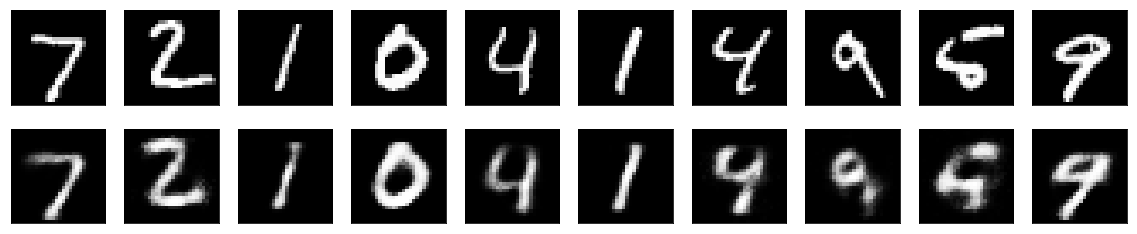

In [10]:
decoded_imgs_deep = autoencoder_deep.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # origin images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_deep[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [15]:
from keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D
from keras.models import Model

input_img_cov = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img_cov)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded_cov = MaxPool2D((2, 2), padding='same')(x)



x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_cov)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded_cov = Conv2D(1, (3, 3), activation='relu', padding='same')(x)

autoencoder_cov = Model(input_img_cov, decoded_cov)

autoencoder_cov.compile(optimizer='adadelta', loss='binary_crossentropy')



In [16]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [17]:
autoencoder_cov.fit(x_train, x_train,
                    epochs=30,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30


  128/60000 [..............................] - ETA: 6:32 - loss: 1.1223

  256/60000 [..............................] - ETA: 3:47 - loss: 0.8344

  384/60000 [..............................] - ETA: 2:51 - loss: 0.7289

  512/60000 [..............................] - ETA: 2:23 - loss: 0.6694

  640/60000 [..............................] - ETA: 2:06 - loss: 0.6279

  768/60000 [..............................] - ETA: 1:55 - loss: 0.5949

  896/60000 [..............................] - ETA: 1:47 - loss: 0.5699

 1024/60000 [..............................] - ETA: 1:41 - loss: 0.5515

 1152/60000 [..............................] - ETA: 1:36 - loss: 0.5335

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.5178

 1408/60000 [..............................] - ETA: 1:29 - loss: 0.5051

 1536/60000 [..............................] - ETA: 1:28 - loss: 0.4928

 1664/60000 [..............................] - ETA: 1:26 - loss: 0.4831

 1792/60000 [..............................] - ETA: 1:24 - loss: 0.4738

 1920/60000 [..............................] - ETA: 1:22 - loss: 0.4653

 2048/60000 [>.............................] - ETA: 1:20 - loss: 0.4574

 2176/60000 [>.............................] - ETA: 1:19 - loss: 0.4510

 2304/60000 [>.............................] - ETA: 1:17 - loss: 0.4449

 2432/60000 [>.............................] - ETA: 1:16 - loss: 0.4398

 2560/60000 [>.............................] - ETA: 1:15 - loss: 0.4345

 2688/60000 [>.............................] - ETA: 1:14 - loss: 0.4301

 2816/60000 [>.............................] - ETA: 1:13 - loss: 0.4263

 2944/60000 [>.............................] - ETA: 1:12 - loss: 0.4225

 3072/60000 [>.............................] - ETA: 1:12 - loss: 0.4184

 3200/60000 [>.............................] - ETA: 1:11 - loss: 0.4150

 3328/60000 [>.............................] - ETA: 1:10 - loss: 0.4117

 3456/60000 [>.............................] - ETA: 1:10 - loss: 0.4086

 3584/60000 [>.............................] - ETA: 1:09 - loss: 0.4057

 3712/60000 [>.............................] - ETA: 1:08 - loss: 0.4034

 3840/60000 [>.............................] - ETA: 1:08 - loss: 0.4005

 3968/60000 [>.............................] - ETA: 1:07 - loss: 0.3978

 4096/60000 [=>............................] - ETA: 1:07 - loss: 0.3951

 4224/60000 [=>............................] - ETA: 1:06 - loss: 0.3925

 4352/60000 [=>............................] - ETA: 1:06 - loss: 0.3903

 4480/60000 [=>............................] - ETA: 1:05 - loss: 0.3880

 4608/60000 [=>............................] - ETA: 1:05 - loss: 0.3855

 4736/60000 [=>............................] - ETA: 1:05 - loss: 0.3832

 4864/60000 [=>............................] - ETA: 1:04 - loss: 0.3810

 4992/60000 [=>............................] - ETA: 1:04 - loss: 0.3789

 5120/60000 [=>............................] - ETA: 1:04 - loss: 0.3767

 5248/60000 [=>............................] - ETA: 1:03 - loss: 0.3746

 5376/60000 [=>............................] - ETA: 1:03 - loss: 0.3724

 5504/60000 [=>............................] - ETA: 1:03 - loss: 0.3703

 5632/60000 [=>............................] - ETA: 1:02 - loss: 0.3684

 5760/60000 [=>............................] - ETA: 1:02 - loss: 0.3665

 5888/60000 [=>............................] - ETA: 1:02 - loss: 0.3645

 6016/60000 [==>...........................] - ETA: 1:01 - loss: 0.3626

 6144/60000 [==>...........................] - ETA: 1:01 - loss: 0.3607

 6272/60000 [==>...........................] - ETA: 1:01 - loss: 0.3591

 6400/60000 [==>...........................] - ETA: 1:01 - loss: 0.3573

 6528/60000 [==>...........................] - ETA: 1:00 - loss: 0.3555

 6656/60000 [==>...........................] - ETA: 1:00 - loss: 0.3539

 6784/60000 [==>...........................] - ETA: 1:00 - loss: 0.3522

 6912/60000 [==>...........................] - ETA: 1:00 - loss: 0.3507

 7040/60000 [==>...........................] - ETA: 59s - loss: 0.3494 

 7168/60000 [==>...........................] - ETA: 59s - loss: 0.3483

 7296/60000 [==>...........................] - ETA: 59s - loss: 0.3467

 7424/60000 [==>...........................] - ETA: 59s - loss: 0.3460

 7552/60000 [==>...........................] - ETA: 58s - loss: 0.3449

 7680/60000 [==>...........................] - ETA: 58s - loss: 0.3438

 7808/60000 [==>...........................] - ETA: 58s - loss: 0.3425

 7936/60000 [==>...........................] - ETA: 58s - loss: 0.3412

 8064/60000 [===>..........................] - ETA: 57s - loss: 0.3398

 8192/60000 [===>..........................] - ETA: 57s - loss: 0.3386

 8320/60000 [===>..........................] - ETA: 57s - loss: 0.3373

 8448/60000 [===>..........................] - ETA: 57s - loss: 0.3361

 8576/60000 [===>..........................] - ETA: 57s - loss: 0.3352

 8704/60000 [===>..........................] - ETA: 56s - loss: 0.3341

 8832/60000 [===>..........................] - ETA: 56s - loss: 0.3329

 8960/60000 [===>..........................] - ETA: 56s - loss: 0.3317

 9088/60000 [===>..........................] - ETA: 56s - loss: 0.3305

 9216/60000 [===>..........................] - ETA: 56s - loss: 0.3294

 9344/60000 [===>..........................] - ETA: 55s - loss: 0.3283

 9472/60000 [===>..........................] - ETA: 55s - loss: 0.3272

 9600/60000 [===>..........................] - ETA: 55s - loss: 0.3261

 9728/60000 [===>..........................] - ETA: 55s - loss: 0.3251

 9856/60000 [===>..........................] - ETA: 55s - loss: 0.3241

 9984/60000 [===>..........................] - ETA: 54s - loss: 0.3232

10112/60000 [====>.........................] - ETA: 54s - loss: 0.3224

10240/60000 [====>.........................] - ETA: 54s - loss: 0.3216

10368/60000 [====>.........................] - ETA: 54s - loss: 0.3211

10496/60000 [====>.........................] - ETA: 54s - loss: 0.3202

10624/60000 [====>.........................] - ETA: 53s - loss: 0.3193

10752/60000 [====>.........................] - ETA: 53s - loss: 0.3185

10880/60000 [====>.........................] - ETA: 53s - loss: 0.3176

11008/60000 [====>.........................] - ETA: 53s - loss: 0.3167

11136/60000 [====>.........................] - ETA: 53s - loss: 0.3160

11264/60000 [====>.........................] - ETA: 53s - loss: 0.3151

11392/60000 [====>.........................] - ETA: 52s - loss: 0.3144

11520/60000 [====>.........................] - ETA: 52s - loss: 0.3136

11648/60000 [====>.........................] - ETA: 52s - loss: 0.3131

11776/60000 [====>.........................] - ETA: 52s - loss: 0.3124

11904/60000 [====>.........................] - ETA: 52s - loss: 0.3118

12032/60000 [=====>........................] - ETA: 51s - loss: 0.3111

12160/60000 [=====>........................] - ETA: 51s - loss: 0.3104

12288/60000 [=====>........................] - ETA: 51s - loss: 0.3097

12416/60000 [=====>........................] - ETA: 51s - loss: 0.3090

12544/60000 [=====>........................] - ETA: 51s - loss: 0.3084

12672/60000 [=====>........................] - ETA: 51s - loss: 0.3080

12800/60000 [=====>........................] - ETA: 50s - loss: 0.3074

12928/60000 [=====>........................] - ETA: 50s - loss: 0.3067

13056/60000 [=====>........................] - ETA: 50s - loss: 0.3061

13184/60000 [=====>........................] - ETA: 50s - loss: 0.3053

13312/60000 [=====>........................] - ETA: 50s - loss: 0.3047

13440/60000 [=====>........................] - ETA: 50s - loss: 0.3039

13568/60000 [=====>........................] - ETA: 49s - loss: 0.3034

13696/60000 [=====>........................] - ETA: 49s - loss: 0.3028

13824/60000 [=====>........................] - ETA: 49s - loss: 0.3021

13952/60000 [=====>........................] - ETA: 49s - loss: 0.3017

14080/60000 [======>.......................] - ETA: 49s - loss: 0.3011

14208/60000 [======>.......................] - ETA: 49s - loss: 0.3006

14336/60000 [======>.......................] - ETA: 48s - loss: 0.3000

14464/60000 [======>.......................] - ETA: 48s - loss: 0.2995

14592/60000 [======>.......................] - ETA: 48s - loss: 0.2989

14720/60000 [======>.......................] - ETA: 48s - loss: 0.2983

14848/60000 [======>.......................] - ETA: 48s - loss: 0.2977

14976/60000 [======>.......................] - ETA: 48s - loss: 0.2971

15104/60000 [======>.......................] - ETA: 47s - loss: 0.2965

15232/60000 [======>.......................] - ETA: 47s - loss: 0.2960

15360/60000 [======>.......................] - ETA: 47s - loss: 0.2954

15488/60000 [======>.......................] - ETA: 47s - loss: 0.2948

15616/60000 [======>.......................] - ETA: 47s - loss: 0.2943

15744/60000 [======>.......................] - ETA: 47s - loss: 0.2939

15872/60000 [======>.......................] - ETA: 47s - loss: 0.2935

16000/60000 [=======>......................] - ETA: 46s - loss: 0.2932

16128/60000 [=======>......................] - ETA: 46s - loss: 0.2928

16256/60000 [=======>......................] - ETA: 46s - loss: 0.2924

16384/60000 [=======>......................] - ETA: 46s - loss: 0.2920

16512/60000 [=======>......................] - ETA: 46s - loss: 0.2918

16640/60000 [=======>......................] - ETA: 46s - loss: 0.2915

16768/60000 [=======>......................] - ETA: 45s - loss: 0.2911

16896/60000 [=======>......................] - ETA: 45s - loss: 0.2907

17024/60000 [=======>......................] - ETA: 45s - loss: 0.2903

17152/60000 [=======>......................] - ETA: 45s - loss: 0.2898

17280/60000 [=======>......................] - ETA: 45s - loss: 0.2893

17408/60000 [=======>......................] - ETA: 45s - loss: 0.2889

17536/60000 [=======>......................] - ETA: 45s - loss: 0.2884

17664/60000 [=======>......................] - ETA: 44s - loss: 0.2879

17792/60000 [=======>......................] - ETA: 44s - loss: 0.2874

17920/60000 [=======>......................] - ETA: 44s - loss: 0.2871

18048/60000 [========>.....................] - ETA: 44s - loss: 0.2869

18176/60000 [========>.....................] - ETA: 44s - loss: 0.2867

18304/60000 [========>.....................] - ETA: 44s - loss: 0.2864

18432/60000 [========>.....................] - ETA: 44s - loss: 0.2861

18560/60000 [========>.....................] - ETA: 43s - loss: 0.2857

18688/60000 [========>.....................] - ETA: 43s - loss: 0.2854

18816/60000 [========>.....................] - ETA: 43s - loss: 0.2849

18944/60000 [========>.....................] - ETA: 43s - loss: 0.2845

19072/60000 [========>.....................] - ETA: 43s - loss: 0.2841

19200/60000 [========>.....................] - ETA: 43s - loss: 0.2838

19328/60000 [========>.....................] - ETA: 42s - loss: 0.2834

19456/60000 [========>.....................] - ETA: 42s - loss: 0.2830

19584/60000 [========>.....................] - ETA: 42s - loss: 0.2826

19712/60000 [========>.....................] - ETA: 42s - loss: 0.2823

19840/60000 [========>.....................] - ETA: 42s - loss: 0.2819

19968/60000 [========>.....................] - ETA: 42s - loss: 0.2815

20096/60000 [=========>....................] - ETA: 42s - loss: 0.2813

20224/60000 [=========>....................] - ETA: 41s - loss: 0.2811

20352/60000 [=========>....................] - ETA: 41s - loss: 0.2808

20480/60000 [=========>....................] - ETA: 41s - loss: 0.2804

20608/60000 [=========>....................] - ETA: 41s - loss: 0.2801

20736/60000 [=========>....................] - ETA: 41s - loss: 0.2798

20864/60000 [=========>....................] - ETA: 41s - loss: 0.2795

20992/60000 [=========>....................] - ETA: 41s - loss: 0.2791

21120/60000 [=========>....................] - ETA: 40s - loss: 0.2787

21248/60000 [=========>....................] - ETA: 40s - loss: 0.2784

21376/60000 [=========>....................] - ETA: 40s - loss: 0.2780

21504/60000 [=========>....................] - ETA: 40s - loss: 0.2777

21632/60000 [=========>....................] - ETA: 40s - loss: 0.2774

21760/60000 [=========>....................] - ETA: 40s - loss: 0.2772

21888/60000 [=========>....................] - ETA: 40s - loss: 0.2769

22016/60000 [==========>...................] - ETA: 39s - loss: 0.2766

22144/60000 [==========>...................] - ETA: 39s - loss: 0.2762

22272/60000 [==========>...................] - ETA: 39s - loss: 0.2759

22400/60000 [==========>...................] - ETA: 39s - loss: 0.2756

22528/60000 [==========>...................] - ETA: 39s - loss: 0.2753

22656/60000 [==========>...................] - ETA: 39s - loss: 0.2750

22784/60000 [==========>...................] - ETA: 39s - loss: 0.2747

22912/60000 [==========>...................] - ETA: 38s - loss: 0.2746

23040/60000 [==========>...................] - ETA: 38s - loss: 0.2744

23168/60000 [==========>...................] - ETA: 38s - loss: 0.2743

23296/60000 [==========>...................] - ETA: 38s - loss: 0.2740

23424/60000 [==========>...................] - ETA: 38s - loss: 0.2737

23552/60000 [==========>...................] - ETA: 38s - loss: 0.2734

23680/60000 [==========>...................] - ETA: 38s - loss: 0.2731

23808/60000 [==========>...................] - ETA: 37s - loss: 0.2727

23936/60000 [==========>...................] - ETA: 37s - loss: 0.2737

24064/60000 [===========>..................] - ETA: 37s - loss: 0.2740

24192/60000 [===========>..................] - ETA: 37s - loss: 0.2738

24320/60000 [===========>..................] - ETA: 37s - loss: 0.2736

24448/60000 [===========>..................] - ETA: 37s - loss: 0.2734

24576/60000 [===========>..................] - ETA: 37s - loss: 0.2732

24704/60000 [===========>..................] - ETA: 37s - loss: 0.2729

24832/60000 [===========>..................] - ETA: 36s - loss: 0.2726

24960/60000 [===========>..................] - ETA: 36s - loss: 0.2723

25088/60000 [===========>..................] - ETA: 36s - loss: 0.2720

25216/60000 [===========>..................] - ETA: 36s - loss: 0.2718

25344/60000 [===========>..................] - ETA: 36s - loss: 0.2727

25472/60000 [===========>..................] - ETA: 36s - loss: 0.2726

25600/60000 [===========>..................] - ETA: 36s - loss: 0.2725

25728/60000 [===========>..................] - ETA: 35s - loss: 0.2724

25856/60000 [===========>..................] - ETA: 35s - loss: 0.2723

25984/60000 [===========>..................] - ETA: 35s - loss: 0.2721

26112/60000 [============>.................] - ETA: 35s - loss: 0.2719

26240/60000 [============>.................] - ETA: 35s - loss: 0.2717

26368/60000 [============>.................] - ETA: 35s - loss: 0.2715

26496/60000 [============>.................] - ETA: 35s - loss: 0.2713

26624/60000 [============>.................] - ETA: 34s - loss: 0.2711

26752/60000 [============>.................] - ETA: 34s - loss: 0.2709

26880/60000 [============>.................] - ETA: 34s - loss: 0.2707

27008/60000 [============>.................] - ETA: 34s - loss: 0.2704

27136/60000 [============>.................] - ETA: 34s - loss: 0.2702

27264/60000 [============>.................] - ETA: 34s - loss: 0.2700

27392/60000 [============>.................] - ETA: 34s - loss: 0.2698

27520/60000 [============>.................] - ETA: 33s - loss: 0.2696

27648/60000 [============>.................] - ETA: 33s - loss: 0.2694

27776/60000 [============>.................] - ETA: 33s - loss: 0.2691

27904/60000 [============>.................] - ETA: 33s - loss: 0.2689

28032/60000 [=============>................] - ETA: 33s - loss: 0.2687

28160/60000 [=============>................] - ETA: 33s - loss: 0.2684

28288/60000 [=============>................] - ETA: 33s - loss: 0.2682

28416/60000 [=============>................] - ETA: 33s - loss: 0.2680

28544/60000 [=============>................] - ETA: 32s - loss: 0.2677

28672/60000 [=============>................] - ETA: 32s - loss: 0.2675

28800/60000 [=============>................] - ETA: 32s - loss: 0.2673

28928/60000 [=============>................] - ETA: 32s - loss: 0.2671

29056/60000 [=============>................] - ETA: 32s - loss: 0.2670

29184/60000 [=============>................] - ETA: 32s - loss: 0.2667

29312/60000 [=============>................] - ETA: 32s - loss: 0.2665

29440/60000 [=============>................] - ETA: 32s - loss: 0.2663

29568/60000 [=============>................] - ETA: 32s - loss: 0.2661

29696/60000 [=============>................] - ETA: 32s - loss: 0.2659

29824/60000 [=============>................] - ETA: 31s - loss: 0.2657

29952/60000 [=============>................] - ETA: 31s - loss: 0.2655

30080/60000 [==============>...............] - ETA: 31s - loss: 0.2653

30208/60000 [==============>...............] - ETA: 31s - loss: 0.2651

30336/60000 [==============>...............] - ETA: 31s - loss: 0.2649

30464/60000 [==============>...............] - ETA: 31s - loss: 0.2647

30592/60000 [==============>...............] - ETA: 31s - loss: 0.2645

30720/60000 [==============>...............] - ETA: 30s - loss: 0.2643

30848/60000 [==============>...............] - ETA: 30s - loss: 0.2640

30976/60000 [==============>...............] - ETA: 30s - loss: 0.2638

31104/60000 [==============>...............] - ETA: 30s - loss: 0.2636

31232/60000 [==============>...............] - ETA: 30s - loss: 0.2635

31360/60000 [==============>...............] - ETA: 30s - loss: 0.2632

31488/60000 [==============>...............] - ETA: 30s - loss: 0.2630

31616/60000 [==============>...............] - ETA: 29s - loss: 0.2628

31744/60000 [==============>...............] - ETA: 29s - loss: 0.2626

31872/60000 [==============>...............] - ETA: 29s - loss: 0.2624

32000/60000 [===============>..............] - ETA: 29s - loss: 0.2622

32128/60000 [===============>..............] - ETA: 29s - loss: 0.2620

32256/60000 [===============>..............] - ETA: 29s - loss: 0.2618

32384/60000 [===============>..............] - ETA: 29s - loss: 0.2617

32512/60000 [===============>..............] - ETA: 29s - loss: 0.2614

32640/60000 [===============>..............] - ETA: 28s - loss: 0.2613

32768/60000 [===============>..............] - ETA: 28s - loss: 0.2610

32896/60000 [===============>..............] - ETA: 28s - loss: 0.2609

33024/60000 [===============>..............] - ETA: 28s - loss: 0.2607

33152/60000 [===============>..............] - ETA: 28s - loss: 0.2605

33280/60000 [===============>..............] - ETA: 28s - loss: 0.2603

33408/60000 [===============>..............] - ETA: 28s - loss: 0.2601

33536/60000 [===============>..............] - ETA: 28s - loss: 0.2599

33664/60000 [===============>..............] - ETA: 27s - loss: 0.2597

33792/60000 [===============>..............] - ETA: 27s - loss: 0.2595

33920/60000 [===============>..............] - ETA: 27s - loss: 0.2593

34048/60000 [================>.............] - ETA: 27s - loss: 0.2591

34176/60000 [================>.............] - ETA: 27s - loss: 0.2590

34304/60000 [================>.............] - ETA: 27s - loss: 0.2588

34432/60000 [================>.............] - ETA: 27s - loss: 0.2586

34560/60000 [================>.............] - ETA: 26s - loss: 0.2584

34688/60000 [================>.............] - ETA: 26s - loss: 0.2582

34816/60000 [================>.............] - ETA: 26s - loss: 0.2580

34944/60000 [================>.............] - ETA: 26s - loss: 0.2578

35072/60000 [================>.............] - ETA: 26s - loss: 0.2576

35200/60000 [================>.............] - ETA: 26s - loss: 0.2574

35328/60000 [================>.............] - ETA: 26s - loss: 0.2572

35456/60000 [================>.............] - ETA: 25s - loss: 0.2570

35584/60000 [================>.............] - ETA: 25s - loss: 0.2568

35712/60000 [================>.............] - ETA: 25s - loss: 0.2566

35840/60000 [================>.............] - ETA: 25s - loss: 0.2564

35968/60000 [================>.............] - ETA: 25s - loss: 0.2563

36096/60000 [=================>............] - ETA: 25s - loss: 0.2561

36224/60000 [=================>............] - ETA: 25s - loss: 0.2559

36352/60000 [=================>............] - ETA: 24s - loss: 0.2557

36480/60000 [=================>............] - ETA: 24s - loss: 0.2556

36608/60000 [=================>............] - ETA: 24s - loss: 0.2554

36736/60000 [=================>............] - ETA: 24s - loss: 0.2552

36864/60000 [=================>............] - ETA: 24s - loss: 0.2550

36992/60000 [=================>............] - ETA: 24s - loss: 0.2548

37120/60000 [=================>............] - ETA: 24s - loss: 0.2546

37248/60000 [=================>............] - ETA: 23s - loss: 0.2545

37376/60000 [=================>............] - ETA: 23s - loss: 0.2543

37504/60000 [=================>............] - ETA: 23s - loss: 0.2542

37632/60000 [=================>............] - ETA: 23s - loss: 0.2540

37760/60000 [=================>............] - ETA: 23s - loss: 0.2539

37888/60000 [=================>............] - ETA: 23s - loss: 0.2537

38016/60000 [==================>...........] - ETA: 23s - loss: 0.2535

38144/60000 [==================>...........] - ETA: 23s - loss: 0.2533

38272/60000 [==================>...........] - ETA: 22s - loss: 0.2532

38400/60000 [==================>...........] - ETA: 22s - loss: 0.2530

38528/60000 [==================>...........] - ETA: 22s - loss: 0.2528

38656/60000 [==================>...........] - ETA: 22s - loss: 0.2527

38784/60000 [==================>...........] - ETA: 22s - loss: 0.2525

38912/60000 [==================>...........] - ETA: 22s - loss: 0.2523

39040/60000 [==================>...........] - ETA: 22s - loss: 0.2521

39168/60000 [==================>...........] - ETA: 21s - loss: 0.2520

39296/60000 [==================>...........] - ETA: 21s - loss: 0.2518

39424/60000 [==================>...........] - ETA: 21s - loss: 0.2517

39552/60000 [==================>...........] - ETA: 21s - loss: 0.2515

39680/60000 [==================>...........] - ETA: 21s - loss: 0.2513

39808/60000 [==================>...........] - ETA: 21s - loss: 0.2512

39936/60000 [==================>...........] - ETA: 21s - loss: 0.2510

40064/60000 [===================>..........] - ETA: 20s - loss: 0.2509

40192/60000 [===================>..........] - ETA: 20s - loss: 0.2507

40320/60000 [===================>..........] - ETA: 20s - loss: 0.2506

40448/60000 [===================>..........] - ETA: 20s - loss: 0.2504

40576/60000 [===================>..........] - ETA: 20s - loss: 0.2502

40704/60000 [===================>..........] - ETA: 20s - loss: 0.2501

40832/60000 [===================>..........] - ETA: 20s - loss: 0.2499

40960/60000 [===================>..........] - ETA: 20s - loss: 0.2498

41088/60000 [===================>..........] - ETA: 19s - loss: 0.2497

41216/60000 [===================>..........] - ETA: 19s - loss: 0.2495

41344/60000 [===================>..........] - ETA: 19s - loss: 0.2494

41472/60000 [===================>..........] - ETA: 19s - loss: 0.2492

41600/60000 [===================>..........] - ETA: 19s - loss: 0.2491

41728/60000 [===================>..........] - ETA: 19s - loss: 0.2490

41856/60000 [===================>..........] - ETA: 19s - loss: 0.2488

41984/60000 [===================>..........] - ETA: 18s - loss: 0.2487

42112/60000 [====================>.........] - ETA: 18s - loss: 0.2485

42240/60000 [====================>.........] - ETA: 18s - loss: 0.2485

42368/60000 [====================>.........] - ETA: 18s - loss: 0.2484

42496/60000 [====================>.........] - ETA: 18s - loss: 0.2483

42624/60000 [====================>.........] - ETA: 18s - loss: 0.2482

42752/60000 [====================>.........] - ETA: 18s - loss: 0.2481

42880/60000 [====================>.........] - ETA: 17s - loss: 0.2480

43008/60000 [====================>.........] - ETA: 17s - loss: 0.2478

43136/60000 [====================>.........] - ETA: 17s - loss: 0.2477

43264/60000 [====================>.........] - ETA: 17s - loss: 0.2475

43392/60000 [====================>.........] - ETA: 17s - loss: 0.2474

43520/60000 [====================>.........] - ETA: 17s - loss: 0.2472

43648/60000 [====================>.........] - ETA: 17s - loss: 0.2471

43776/60000 [====================>.........] - ETA: 17s - loss: 0.2470

43904/60000 [====================>.........] - ETA: 16s - loss: 0.2469

44032/60000 [=====================>........] - ETA: 16s - loss: 0.2467

44160/60000 [=====================>........] - ETA: 16s - loss: 0.2466

44288/60000 [=====================>........] - ETA: 16s - loss: 0.2465

44416/60000 [=====================>........] - ETA: 16s - loss: 0.2463

44544/60000 [=====================>........] - ETA: 16s - loss: 0.2462

44672/60000 [=====================>........] - ETA: 16s - loss: 0.2461

44800/60000 [=====================>........] - ETA: 15s - loss: 0.2459

44928/60000 [=====================>........] - ETA: 15s - loss: 0.2458

45056/60000 [=====================>........] - ETA: 15s - loss: 0.2459

45184/60000 [=====================>........] - ETA: 15s - loss: 0.2457

45312/60000 [=====================>........] - ETA: 15s - loss: 0.2456

45440/60000 [=====================>........] - ETA: 15s - loss: 0.2455

45568/60000 [=====================>........] - ETA: 15s - loss: 0.2453

45696/60000 [=====================>........] - ETA: 14s - loss: 0.2453

45824/60000 [=====================>........] - ETA: 14s - loss: 0.2452

45952/60000 [=====================>........] - ETA: 14s - loss: 0.2451

46080/60000 [======================>.......] - ETA: 14s - loss: 0.2450

46208/60000 [======================>.......] - ETA: 14s - loss: 0.2449

46336/60000 [======================>.......] - ETA: 14s - loss: 0.2448

46464/60000 [======================>.......] - ETA: 14s - loss: 0.2447

46592/60000 [======================>.......] - ETA: 14s - loss: 0.2445

46720/60000 [======================>.......] - ETA: 13s - loss: 0.2444

46848/60000 [======================>.......] - ETA: 13s - loss: 0.2443

46976/60000 [======================>.......] - ETA: 13s - loss: 0.2442

47104/60000 [======================>.......] - ETA: 13s - loss: 0.2441

47232/60000 [======================>.......] - ETA: 13s - loss: 0.2439

47360/60000 [======================>.......] - ETA: 13s - loss: 0.2438

47488/60000 [======================>.......] - ETA: 13s - loss: 0.2437

47616/60000 [======================>.......] - ETA: 12s - loss: 0.2436

47744/60000 [======================>.......] - ETA: 12s - loss: 0.2435

47872/60000 [======================>.......] - ETA: 12s - loss: 0.2434

48000/60000 [=======================>......] - ETA: 12s - loss: 0.2433

48128/60000 [=======================>......] - ETA: 12s - loss: 0.2431

48256/60000 [=======================>......] - ETA: 12s - loss: 0.2430

48384/60000 [=======================>......] - ETA: 12s - loss: 0.2429

48512/60000 [=======================>......] - ETA: 12s - loss: 0.2428

48640/60000 [=======================>......] - ETA: 11s - loss: 0.2427

48768/60000 [=======================>......] - ETA: 11s - loss: 0.2426

48896/60000 [=======================>......] - ETA: 11s - loss: 0.2425

49024/60000 [=======================>......] - ETA: 11s - loss: 0.2424

49152/60000 [=======================>......] - ETA: 11s - loss: 0.2423

49280/60000 [=======================>......] - ETA: 11s - loss: 0.2422

49408/60000 [=======================>......] - ETA: 11s - loss: 0.2420

49536/60000 [=======================>......] - ETA: 10s - loss: 0.2419

49664/60000 [=======================>......] - ETA: 10s - loss: 0.2418

49792/60000 [=======================>......] - ETA: 10s - loss: 0.2417

49920/60000 [=======================>......] - ETA: 10s - loss: 0.2416

50048/60000 [========================>.....] - ETA: 10s - loss: 0.2414

50176/60000 [========================>.....] - ETA: 10s - loss: 0.2413

50304/60000 [========================>.....] - ETA: 10s - loss: 0.2412

50432/60000 [========================>.....] - ETA: 10s - loss: 0.2411

50560/60000 [========================>.....] - ETA: 9s - loss: 0.2410 

50688/60000 [========================>.....] - ETA: 9s - loss: 0.2408

50816/60000 [========================>.....] - ETA: 9s - loss: 0.2407

50944/60000 [========================>.....] - ETA: 9s - loss: 0.2406

51072/60000 [========================>.....] - ETA: 9s - loss: 0.2405

51200/60000 [========================>.....] - ETA: 9s - loss: 0.2404

51328/60000 [========================>.....] - ETA: 9s - loss: 0.2403

51456/60000 [========================>.....] - ETA: 8s - loss: 0.2402

51584/60000 [========================>.....] - ETA: 8s - loss: 0.2401

51712/60000 [========================>.....] - ETA: 8s - loss: 0.2400

51840/60000 [========================>.....] - ETA: 8s - loss: 0.2400

51968/60000 [========================>.....] - ETA: 8s - loss: 0.2399

52096/60000 [=========================>....] - ETA: 8s - loss: 0.2398

52224/60000 [=========================>....] - ETA: 8s - loss: 0.2397

52352/60000 [=========================>....] - ETA: 7s - loss: 0.2396

52480/60000 [=========================>....] - ETA: 7s - loss: 0.2395

52608/60000 [=========================>....] - ETA: 7s - loss: 0.2395

52736/60000 [=========================>....] - ETA: 7s - loss: 0.2394

52864/60000 [=========================>....] - ETA: 7s - loss: 0.2393

52992/60000 [=========================>....] - ETA: 7s - loss: 0.2393

53120/60000 [=========================>....] - ETA: 7s - loss: 0.2393

53248/60000 [=========================>....] - ETA: 7s - loss: 0.2392

53376/60000 [=========================>....] - ETA: 6s - loss: 0.2391

53504/60000 [=========================>....] - ETA: 6s - loss: 0.2390

53632/60000 [=========================>....] - ETA: 6s - loss: 0.2388

53760/60000 [=========================>....] - ETA: 6s - loss: 0.2387

53888/60000 [=========================>....] - ETA: 6s - loss: 0.2386

54016/60000 [==========================>...] - ETA: 6s - loss: 0.2385

54144/60000 [==========================>...] - ETA: 6s - loss: 0.2384

54272/60000 [==========================>...] - ETA: 5s - loss: 0.2383

54400/60000 [==========================>...] - ETA: 5s - loss: 0.2382

54528/60000 [==========================>...] - ETA: 5s - loss: 0.2381

54656/60000 [==========================>...] - ETA: 5s - loss: 0.2380

54784/60000 [==========================>...] - ETA: 5s - loss: 0.2379

54912/60000 [==========================>...] - ETA: 5s - loss: 0.2378

55040/60000 [==========================>...] - ETA: 5s - loss: 0.2377

55168/60000 [==========================>...] - ETA: 5s - loss: 0.2376

55296/60000 [==========================>...] - ETA: 4s - loss: 0.2375

55424/60000 [==========================>...] - ETA: 4s - loss: 0.2374

55552/60000 [==========================>...] - ETA: 4s - loss: 0.2373

55680/60000 [==========================>...] - ETA: 4s - loss: 0.2372

55808/60000 [==========================>...] - ETA: 4s - loss: 0.2372

55936/60000 [==========================>...] - ETA: 4s - loss: 0.2371

56064/60000 [===========================>..] - ETA: 4s - loss: 0.2370

56192/60000 [===========================>..] - ETA: 3s - loss: 0.2369

56320/60000 [===========================>..] - ETA: 3s - loss: 0.2368

56448/60000 [===========================>..] - ETA: 3s - loss: 0.2368

56576/60000 [===========================>..] - ETA: 3s - loss: 0.2366

56704/60000 [===========================>..] - ETA: 3s - loss: 0.2366

56832/60000 [===========================>..] - ETA: 3s - loss: 0.2365

56960/60000 [===========================>..] - ETA: 3s - loss: 0.2363

57088/60000 [===========================>..] - ETA: 3s - loss: 0.2362

57216/60000 [===========================>..] - ETA: 2s - loss: 0.2362

57344/60000 [===========================>..] - ETA: 2s - loss: 0.2361

57472/60000 [===========================>..] - ETA: 2s - loss: 0.2360

57600/60000 [===========================>..] - ETA: 2s - loss: 0.2359

57728/60000 [===========================>..] - ETA: 2s - loss: 0.2358

57856/60000 [===========================>..] - ETA: 2s - loss: 0.2357

57984/60000 [===========================>..] - ETA: 2s - loss: 0.2356

58112/60000 [============================>.] - ETA: 1s - loss: 0.2355

58240/60000 [============================>.] - ETA: 1s - loss: 0.2354

58368/60000 [============================>.] - ETA: 1s - loss: 0.2354

58496/60000 [============================>.] - ETA: 1s - loss: 0.2353

58624/60000 [============================>.] - ETA: 1s - loss: 0.2352

58752/60000 [============================>.] - ETA: 1s - loss: 0.2352

58880/60000 [============================>.] - ETA: 1s - loss: 0.2352

59008/60000 [============================>.] - ETA: 1s - loss: 0.2354

59136/60000 [============================>.] - ETA: 0s - loss: 0.2355

59264/60000 [============================>.] - ETA: 0s - loss: 0.2355

59392/60000 [============================>.] - ETA: 0s - loss: 0.2354

59520/60000 [============================>.] - ETA: 0s - loss: 0.2354

59648/60000 [============================>.] - ETA: 0s - loss: 0.2353

59776/60000 [============================>.] - ETA: 0s - loss: 0.2352

59904/60000 [============================>.] - ETA: 0s - loss: 0.2351

60000/60000 [==============================] - 66s 1ms/step - loss: 0.2351 - val_loss: 0.1933


Epoch 2/30
  128/60000 [..............................] - ETA: 1:01 - loss: 0.1936

  256/60000 [..............................] - ETA: 1:01 - loss: 0.1966

  384/60000 [..............................] - ETA: 1:01 - loss: 0.1953

  512/60000 [..............................] - ETA: 1:00 - loss: 0.1959

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1957

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1945

  896/60000 [..............................] - ETA: 1:00 - loss: 0.1939

 1024/60000 [..............................] - ETA: 1:00 - loss: 0.1934

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1931

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1933

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1935

 1536/60000 [..............................] - ETA: 59s - loss: 0.1933 

 1664/60000 [..............................] - ETA: 59s - loss: 0.1926

 1792/60000 [..............................] - ETA: 59s - loss: 0.1921

 1920/60000 [..............................] - ETA: 59s - loss: 0.1915

 2048/60000 [>.............................] - ETA: 58s - loss: 0.1917

 2176/60000 [>.............................] - ETA: 58s - loss: 0.1917

 2304/60000 [>.............................] - ETA: 58s - loss: 0.1914

 2432/60000 [>.............................] - ETA: 58s - loss: 0.1917

 2560/60000 [>.............................] - ETA: 58s - loss: 0.1916

 2688/60000 [>.............................] - ETA: 58s - loss: 0.1916

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1914

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1914

 3072/60000 [>.............................] - ETA: 57s - loss: 0.1913

 3200/60000 [>.............................] - ETA: 57s - loss: 0.1915

 3328/60000 [>.............................] - ETA: 57s - loss: 0.1915

 3456/60000 [>.............................] - ETA: 57s - loss: 0.1916

 3584/60000 [>.............................] - ETA: 57s - loss: 0.1916

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1916

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1914

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1915

 4096/60000 [=>............................] - ETA: 56s - loss: 0.1915

 4224/60000 [=>............................] - ETA: 56s - loss: 0.1911

 4352/60000 [=>............................] - ETA: 56s - loss: 0.1917

 4480/60000 [=>............................] - ETA: 56s - loss: 0.1917

 4608/60000 [=>............................] - ETA: 56s - loss: 0.1915

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1913

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1914

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1912

 5120/60000 [=>............................] - ETA: 55s - loss: 0.1911

 5248/60000 [=>............................] - ETA: 55s - loss: 0.1910

 5376/60000 [=>............................] - ETA: 55s - loss: 0.1911

 5504/60000 [=>............................] - ETA: 55s - loss: 0.1909

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1910

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1911

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1912

 6016/60000 [==>...........................] - ETA: 54s - loss: 0.1913

 6144/60000 [==>...........................] - ETA: 54s - loss: 0.1913

 6272/60000 [==>...........................] - ETA: 54s - loss: 0.1913

 6400/60000 [==>...........................] - ETA: 54s - loss: 0.1912

 6528/60000 [==>...........................] - ETA: 54s - loss: 0.1912

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1911

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1912

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1912

 7040/60000 [==>...........................] - ETA: 53s - loss: 0.1911

 7168/60000 [==>...........................] - ETA: 53s - loss: 0.1911

 7296/60000 [==>...........................] - ETA: 53s - loss: 0.1911

 7424/60000 [==>...........................] - ETA: 53s - loss: 0.1910

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1910

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1911

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1912

 7936/60000 [==>...........................] - ETA: 52s - loss: 0.1910

 8064/60000 [===>..........................] - ETA: 52s - loss: 0.1909

 8192/60000 [===>..........................] - ETA: 52s - loss: 0.1910

 8320/60000 [===>..........................] - ETA: 52s - loss: 0.1908

 8448/60000 [===>..........................] - ETA: 52s - loss: 0.1908

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1908

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1907

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1909

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1909

 9088/60000 [===>..........................] - ETA: 51s - loss: 0.1910

 9216/60000 [===>..........................] - ETA: 51s - loss: 0.1910

 9344/60000 [===>..........................] - ETA: 51s - loss: 0.1912

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1912

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1912

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1912

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1911

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1910

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1910

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1910

10368/60000 [====>.........................] - ETA: 50s - loss: 0.1909

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1908

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1908

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1908

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1909

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1908

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1908

11264/60000 [====>.........................] - ETA: 49s - loss: 0.1908

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1907

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1908

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1909

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1909

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1910

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1910

12160/60000 [=====>........................] - ETA: 48s - loss: 0.1910

12288/60000 [=====>........................] - ETA: 48s - loss: 0.1909

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1909

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1909

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1910

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1911

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1911

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1912

13184/60000 [=====>........................] - ETA: 47s - loss: 0.1912

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1912

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1912

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1912

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1912

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1912

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1912

14080/60000 [======>.......................] - ETA: 46s - loss: 0.1911

14208/60000 [======>.......................] - ETA: 46s - loss: 0.1912

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1913

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1913

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1914

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1913

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1913

14976/60000 [======>.......................] - ETA: 45s - loss: 0.1913

15104/60000 [======>.......................] - ETA: 45s - loss: 0.1912

15232/60000 [======>.......................] - ETA: 45s - loss: 0.1912

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1911

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1911

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1911

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1910

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1910

16000/60000 [=======>......................] - ETA: 44s - loss: 0.1912

16128/60000 [=======>......................] - ETA: 44s - loss: 0.1911

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1913

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1912

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1912

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1911

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1911

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1911

17024/60000 [=======>......................] - ETA: 43s - loss: 0.1911

17152/60000 [=======>......................] - ETA: 43s - loss: 0.1910

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1909

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1910

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1913

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1914

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1918

17920/60000 [=======>......................] - ETA: 42s - loss: 0.1917

18048/60000 [========>.....................] - ETA: 42s - loss: 0.1917

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1917

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1917

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1916

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1942

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1970

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1971

18944/60000 [========>.....................] - ETA: 41s - loss: 0.1972

19072/60000 [========>.....................] - ETA: 41s - loss: 0.1973

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1973

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1974

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1974

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1973

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1974

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1974

19968/60000 [========>.....................] - ETA: 40s - loss: 0.1973

20096/60000 [=========>....................] - ETA: 40s - loss: 0.1973

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1972

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1972

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1972

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1971

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1970

20864/60000 [=========>....................] - ETA: 39s - loss: 0.1970

20992/60000 [=========>....................] - ETA: 39s - loss: 0.1969

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1969

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1968

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1968

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1967

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1967

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1967

21888/60000 [=========>....................] - ETA: 38s - loss: 0.1966

22016/60000 [==========>...................] - ETA: 38s - loss: 0.1965

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1965

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1964

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1964

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1963

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1964

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1964

22912/60000 [==========>...................] - ETA: 37s - loss: 0.1964

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1964

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1964

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1964

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1964

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1963

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1963

23808/60000 [==========>...................] - ETA: 36s - loss: 0.1963

23936/60000 [==========>...................] - ETA: 36s - loss: 0.1962

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1961

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1960

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1960

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1959

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1959

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1958

24832/60000 [===========>..................] - ETA: 35s - loss: 0.1957

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1956

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1956

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1956

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1955

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1954

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1954

25728/60000 [===========>..................] - ETA: 34s - loss: 0.1953

25856/60000 [===========>..................] - ETA: 34s - loss: 0.1953

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1952

26112/60000 [============>.................] - ETA: 34s - loss: 0.1952

26240/60000 [============>.................] - ETA: 34s - loss: 0.1951

26368/60000 [============>.................] - ETA: 34s - loss: 0.1950

26496/60000 [============>.................] - ETA: 34s - loss: 0.1950

26624/60000 [============>.................] - ETA: 34s - loss: 0.1949

26752/60000 [============>.................] - ETA: 33s - loss: 0.1949

26880/60000 [============>.................] - ETA: 33s - loss: 0.1949

27008/60000 [============>.................] - ETA: 33s - loss: 0.1948

27136/60000 [============>.................] - ETA: 33s - loss: 0.1948

27264/60000 [============>.................] - ETA: 33s - loss: 0.1947

27392/60000 [============>.................] - ETA: 33s - loss: 0.1947

27520/60000 [============>.................] - ETA: 33s - loss: 0.1946

27648/60000 [============>.................] - ETA: 33s - loss: 0.1946

27776/60000 [============>.................] - ETA: 32s - loss: 0.1945

27904/60000 [============>.................] - ETA: 32s - loss: 0.1945

28032/60000 [=============>................] - ETA: 32s - loss: 0.1944

28160/60000 [=============>................] - ETA: 32s - loss: 0.1944

28288/60000 [=============>................] - ETA: 32s - loss: 0.1943

28416/60000 [=============>................] - ETA: 32s - loss: 0.1943

28544/60000 [=============>................] - ETA: 32s - loss: 0.1943

28672/60000 [=============>................] - ETA: 31s - loss: 0.1942

28800/60000 [=============>................] - ETA: 31s - loss: 0.1942

28928/60000 [=============>................] - ETA: 31s - loss: 0.1941

29056/60000 [=============>................] - ETA: 31s - loss: 0.1941

29184/60000 [=============>................] - ETA: 31s - loss: 0.1941

29312/60000 [=============>................] - ETA: 31s - loss: 0.1940

29440/60000 [=============>................] - ETA: 31s - loss: 0.1940

29568/60000 [=============>................] - ETA: 31s - loss: 0.1939

29696/60000 [=============>................] - ETA: 30s - loss: 0.1939

29824/60000 [=============>................] - ETA: 30s - loss: 0.1939

29952/60000 [=============>................] - ETA: 30s - loss: 0.1938

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1937

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1937

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1937

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1937

30592/60000 [==============>...............] - ETA: 29s - loss: 0.1936

30720/60000 [==============>...............] - ETA: 29s - loss: 0.1936

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1936

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1935

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1935

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1937

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1937

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1937

31616/60000 [==============>...............] - ETA: 28s - loss: 0.1937

31744/60000 [==============>...............] - ETA: 28s - loss: 0.1937

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1937

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1937

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1936

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1936

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1936

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1936

32640/60000 [===============>..............] - ETA: 27s - loss: 0.1936

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1936

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1935

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1935

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1934

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1934

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1933

33536/60000 [===============>..............] - ETA: 26s - loss: 0.1933

33664/60000 [===============>..............] - ETA: 26s - loss: 0.1933

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1932

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1932

34048/60000 [================>.............] - ETA: 26s - loss: 0.1932

34176/60000 [================>.............] - ETA: 26s - loss: 0.1931

34304/60000 [================>.............] - ETA: 26s - loss: 0.1931

34432/60000 [================>.............] - ETA: 26s - loss: 0.1931

34560/60000 [================>.............] - ETA: 25s - loss: 0.1930

34688/60000 [================>.............] - ETA: 25s - loss: 0.1930

34816/60000 [================>.............] - ETA: 25s - loss: 0.1930

34944/60000 [================>.............] - ETA: 25s - loss: 0.1930

35072/60000 [================>.............] - ETA: 25s - loss: 0.1929

35200/60000 [================>.............] - ETA: 25s - loss: 0.1929

35328/60000 [================>.............] - ETA: 25s - loss: 0.1929

35456/60000 [================>.............] - ETA: 25s - loss: 0.1928

35584/60000 [================>.............] - ETA: 24s - loss: 0.1928

35712/60000 [================>.............] - ETA: 24s - loss: 0.1927

35840/60000 [================>.............] - ETA: 24s - loss: 0.1927

35968/60000 [================>.............] - ETA: 24s - loss: 0.1927

36096/60000 [=================>............] - ETA: 24s - loss: 0.1926

36224/60000 [=================>............] - ETA: 24s - loss: 0.1926

36352/60000 [=================>............] - ETA: 24s - loss: 0.1926

36480/60000 [=================>............] - ETA: 23s - loss: 0.1925

36608/60000 [=================>............] - ETA: 23s - loss: 0.1925

36736/60000 [=================>............] - ETA: 23s - loss: 0.1924

36864/60000 [=================>............] - ETA: 23s - loss: 0.1924

36992/60000 [=================>............] - ETA: 23s - loss: 0.1923

37120/60000 [=================>............] - ETA: 23s - loss: 0.1923

37248/60000 [=================>............] - ETA: 23s - loss: 0.1922

37376/60000 [=================>............] - ETA: 23s - loss: 0.1922

37504/60000 [=================>............] - ETA: 22s - loss: 0.1922

37632/60000 [=================>............] - ETA: 22s - loss: 0.1921

37760/60000 [=================>............] - ETA: 22s - loss: 0.1921

37888/60000 [=================>............] - ETA: 22s - loss: 0.1921

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1920

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1920

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1920

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1920

38528/60000 [==================>...........] - ETA: 21s - loss: 0.1919

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1919

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1919

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1919

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1919

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1919

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1919

39424/60000 [==================>...........] - ETA: 20s - loss: 0.1919

39552/60000 [==================>...........] - ETA: 20s - loss: 0.1919

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1919

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1919

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1919

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1918

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1918

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1918

40448/60000 [===================>..........] - ETA: 19s - loss: 0.1918

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1918

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1918

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1917

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1917

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1917

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1916

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1916

41472/60000 [===================>..........] - ETA: 18s - loss: 0.1916

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1916

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1916

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1915

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1915

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1914

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1914

42368/60000 [====================>.........] - ETA: 17s - loss: 0.1914

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1913

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1913

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1913

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1913

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1913

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1913

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1912

43392/60000 [====================>.........] - ETA: 16s - loss: 0.1912

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1912

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1912

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1911

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1911

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1911

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1911

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1910

44416/60000 [=====================>........] - ETA: 15s - loss: 0.1910

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1910

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1910

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1909

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1909

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1909

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1909

45312/60000 [=====================>........] - ETA: 14s - loss: 0.1909

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1909

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1908

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1908

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1908

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1907

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1907

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1907

46336/60000 [======================>.......] - ETA: 13s - loss: 0.1907

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1906

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1906

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1906

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1906

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1905

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1905

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1905

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1904

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1904

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1904

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1904

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1904

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1904

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1904

48256/60000 [=======================>......] - ETA: 11s - loss: 0.1903

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1903

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1903

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1903

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1903

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1902

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1902

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1902

49280/60000 [=======================>......] - ETA: 10s - loss: 0.1902

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1901

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1901

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1901

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1901

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1901

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1901

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1901

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1900 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1900

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1900

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1900

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1899

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1899

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1899

51200/60000 [========================>.....] - ETA: 8s - loss: 0.1899

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1899

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1899

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1898

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1898

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1898

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1898

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1898

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1898

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1898

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1898

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1897

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1897

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1897

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1897

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1897

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1897

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1897

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1897

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1896

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1896

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1896

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1896

54144/60000 [==========================>...] - ETA: 5s - loss: 0.1896

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1896

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1896

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1896

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1896

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1895

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1895

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1895

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1894

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1894

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1894

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1894

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1894

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1893

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1893

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1893

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1893

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1893

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1893

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1892

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1892

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1892

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1892

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1892

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1892

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1892

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1892

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1891

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1891

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1891

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1891

58112/60000 [============================>.] - ETA: 1s - loss: 0.1891

58240/60000 [============================>.] - ETA: 1s - loss: 0.1891

58368/60000 [============================>.] - ETA: 1s - loss: 0.1890

58496/60000 [============================>.] - ETA: 1s - loss: 0.1890

58624/60000 [============================>.] - ETA: 1s - loss: 0.1890

58752/60000 [============================>.] - ETA: 1s - loss: 0.1890

58880/60000 [============================>.] - ETA: 1s - loss: 0.1890

59008/60000 [============================>.] - ETA: 1s - loss: 0.1889

59136/60000 [============================>.] - ETA: 0s - loss: 0.1889

59264/60000 [============================>.] - ETA: 0s - loss: 0.1889

59392/60000 [============================>.] - ETA: 0s - loss: 0.1889

59520/60000 [============================>.] - ETA: 0s - loss: 0.1889

59648/60000 [============================>.] - ETA: 0s - loss: 0.1889

59776/60000 [============================>.] - ETA: 0s - loss: 0.1889

59904/60000 [============================>.] - ETA: 0s - loss: 0.1889

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1889 - val_loss: 0.1800


Epoch 3/30
  128/60000 [..............................] - ETA: 1:01 - loss: 0.1785

  256/60000 [..............................] - ETA: 1:01 - loss: 0.1807

  384/60000 [..............................] - ETA: 1:00 - loss: 0.1797

  512/60000 [..............................] - ETA: 1:00 - loss: 0.1809

  640/60000 [..............................] - ETA: 1:00 - loss: 0.1814

  768/60000 [..............................] - ETA: 1:00 - loss: 0.1818

  896/60000 [..............................] - ETA: 1:00 - loss: 0.1816

 1024/60000 [..............................] - ETA: 59s - loss: 0.1819 

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1805

 1280/60000 [..............................] - ETA: 59s - loss: 0.1799 

 1408/60000 [..............................] - ETA: 59s - loss: 0.1800

 1536/60000 [..............................] - ETA: 59s - loss: 0.1806

 1664/60000 [..............................] - ETA: 59s - loss: 0.1807

 1792/60000 [..............................] - ETA: 59s - loss: 0.1810

 1920/60000 [..............................] - ETA: 59s - loss: 0.1815

 2048/60000 [>.............................] - ETA: 58s - loss: 0.1807

 2176/60000 [>.............................] - ETA: 58s - loss: 0.1807

 2304/60000 [>.............................] - ETA: 58s - loss: 0.1808

 2432/60000 [>.............................] - ETA: 58s - loss: 0.1809

 2560/60000 [>.............................] - ETA: 58s - loss: 0.1809

 2688/60000 [>.............................] - ETA: 58s - loss: 0.1809

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1810

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1810

 3072/60000 [>.............................] - ETA: 57s - loss: 0.1809

 3200/60000 [>.............................] - ETA: 57s - loss: 0.1808

 3328/60000 [>.............................] - ETA: 57s - loss: 0.1809

 3456/60000 [>.............................] - ETA: 57s - loss: 0.1805

 3584/60000 [>.............................] - ETA: 57s - loss: 0.1806

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1808

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1806

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1804

 4096/60000 [=>............................] - ETA: 56s - loss: 0.1804

 4224/60000 [=>............................] - ETA: 56s - loss: 0.1804

 4352/60000 [=>............................] - ETA: 56s - loss: 0.1805

 4480/60000 [=>............................] - ETA: 56s - loss: 0.1802

 4608/60000 [=>............................] - ETA: 56s - loss: 0.1800

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1800

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1801

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1802

 5120/60000 [=>............................] - ETA: 55s - loss: 0.1803

 5248/60000 [=>............................] - ETA: 55s - loss: 0.1801

 5376/60000 [=>............................] - ETA: 55s - loss: 0.1801

 5504/60000 [=>............................] - ETA: 55s - loss: 0.1802

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1803

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1804

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1804

 6016/60000 [==>...........................] - ETA: 54s - loss: 0.1804

 6144/60000 [==>...........................] - ETA: 54s - loss: 0.1804

 6272/60000 [==>...........................] - ETA: 54s - loss: 0.1818

 6400/60000 [==>...........................] - ETA: 54s - loss: 0.1820

 6528/60000 [==>...........................] - ETA: 54s - loss: 0.1820

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1822

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1821

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1821

 7040/60000 [==>...........................] - ETA: 53s - loss: 0.1821

 7168/60000 [==>...........................] - ETA: 53s - loss: 0.1820

 7296/60000 [==>...........................] - ETA: 53s - loss: 0.1820

 7424/60000 [==>...........................] - ETA: 53s - loss: 0.1819

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1818

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1819

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1818

 7936/60000 [==>...........................] - ETA: 52s - loss: 0.1819

 8064/60000 [===>..........................] - ETA: 52s - loss: 0.1819

 8192/60000 [===>..........................] - ETA: 52s - loss: 0.1819

 8320/60000 [===>..........................] - ETA: 52s - loss: 0.1818

 8448/60000 [===>..........................] - ETA: 52s - loss: 0.1818

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1817

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1818

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1817

 8960/60000 [===>..........................] - ETA: 51s - loss: 0.1817

 9088/60000 [===>..........................] - ETA: 51s - loss: 0.1817

 9216/60000 [===>..........................] - ETA: 51s - loss: 0.1815

 9344/60000 [===>..........................] - ETA: 51s - loss: 0.1814

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1814

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1814

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1812

 9856/60000 [===>..........................] - ETA: 50s - loss: 0.1813

 9984/60000 [===>..........................] - ETA: 50s - loss: 0.1813

10112/60000 [====>.........................] - ETA: 50s - loss: 0.1813

10240/60000 [====>.........................] - ETA: 50s - loss: 0.1813

10368/60000 [====>.........................] - ETA: 50s - loss: 0.1812

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1813

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1813

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1813

10880/60000 [====>.........................] - ETA: 49s - loss: 0.1812

11008/60000 [====>.........................] - ETA: 49s - loss: 0.1812

11136/60000 [====>.........................] - ETA: 49s - loss: 0.1812

11264/60000 [====>.........................] - ETA: 49s - loss: 0.1812

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1812

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1811

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1810

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1811

11904/60000 [====>.........................] - ETA: 48s - loss: 0.1811

12032/60000 [=====>........................] - ETA: 48s - loss: 0.1810

12160/60000 [=====>........................] - ETA: 48s - loss: 0.1810

12288/60000 [=====>........................] - ETA: 48s - loss: 0.1809

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1810

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1809

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1810

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1809

12928/60000 [=====>........................] - ETA: 47s - loss: 0.1808

13056/60000 [=====>........................] - ETA: 47s - loss: 0.1808

13184/60000 [=====>........................] - ETA: 47s - loss: 0.1809

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1809

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1809

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1813

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1813

13824/60000 [=====>........................] - ETA: 46s - loss: 0.1813

13952/60000 [=====>........................] - ETA: 46s - loss: 0.1813

14080/60000 [======>.......................] - ETA: 46s - loss: 0.1813

14208/60000 [======>.......................] - ETA: 46s - loss: 0.1813

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1813

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1812

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1812

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1812

14848/60000 [======>.......................] - ETA: 45s - loss: 0.1812

14976/60000 [======>.......................] - ETA: 45s - loss: 0.1810

15104/60000 [======>.......................] - ETA: 45s - loss: 0.1811

15232/60000 [======>.......................] - ETA: 45s - loss: 0.1810

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1810

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1811

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1811

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1811

15872/60000 [======>.......................] - ETA: 44s - loss: 0.1811

16000/60000 [=======>......................] - ETA: 44s - loss: 0.1811

16128/60000 [=======>......................] - ETA: 44s - loss: 0.1811

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1811

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1811

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1812

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1812

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1812

16896/60000 [=======>......................] - ETA: 43s - loss: 0.1813

17024/60000 [=======>......................] - ETA: 43s - loss: 0.1812

17152/60000 [=======>......................] - ETA: 43s - loss: 0.1812

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1812

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1812

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1811

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1812

17792/60000 [=======>......................] - ETA: 42s - loss: 0.1811

17920/60000 [=======>......................] - ETA: 42s - loss: 0.1811

18048/60000 [========>.....................] - ETA: 42s - loss: 0.1811

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1811

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1811

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1810

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1810

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1810

18816/60000 [========>.....................] - ETA: 41s - loss: 0.1810

18944/60000 [========>.....................] - ETA: 41s - loss: 0.1810

19072/60000 [========>.....................] - ETA: 41s - loss: 0.1810

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1809

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1809

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1810

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1810

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1811

19840/60000 [========>.....................] - ETA: 40s - loss: 0.1810

19968/60000 [========>.....................] - ETA: 40s - loss: 0.1810

20096/60000 [=========>....................] - ETA: 40s - loss: 0.1810

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1810

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1809

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1809

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1809

20736/60000 [=========>....................] - ETA: 39s - loss: 0.1809

20864/60000 [=========>....................] - ETA: 39s - loss: 0.1808

20992/60000 [=========>....................] - ETA: 39s - loss: 0.1808

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1808

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1808

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1807

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1807

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1807

21760/60000 [=========>....................] - ETA: 38s - loss: 0.1806

21888/60000 [=========>....................] - ETA: 38s - loss: 0.1806

22016/60000 [==========>...................] - ETA: 38s - loss: 0.1806

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1806

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1807

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1806

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1806

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1805

22784/60000 [==========>...................] - ETA: 37s - loss: 0.1805

22912/60000 [==========>...................] - ETA: 37s - loss: 0.1806

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1805

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1805

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1805

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1805

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1805

23680/60000 [==========>...................] - ETA: 36s - loss: 0.1805

23808/60000 [==========>...................] - ETA: 36s - loss: 0.1804

23936/60000 [==========>...................] - ETA: 36s - loss: 0.1803

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1805

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1806

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1806

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1806

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1805

24704/60000 [===========>..................] - ETA: 35s - loss: 0.1805

24832/60000 [===========>..................] - ETA: 35s - loss: 0.1805

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1806

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1806

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1806

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1805

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1805

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1806

25728/60000 [===========>..................] - ETA: 34s - loss: 0.1806

25856/60000 [===========>..................] - ETA: 34s - loss: 0.1806

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1806

26112/60000 [============>.................] - ETA: 34s - loss: 0.1806

26240/60000 [============>.................] - ETA: 34s - loss: 0.1805

26368/60000 [============>.................] - ETA: 34s - loss: 0.1805

26496/60000 [============>.................] - ETA: 34s - loss: 0.1805

26624/60000 [============>.................] - ETA: 34s - loss: 0.1804

26752/60000 [============>.................] - ETA: 33s - loss: 0.1803

26880/60000 [============>.................] - ETA: 33s - loss: 0.1803

27008/60000 [============>.................] - ETA: 33s - loss: 0.1803

27136/60000 [============>.................] - ETA: 33s - loss: 0.1803

27264/60000 [============>.................] - ETA: 33s - loss: 0.1803

27392/60000 [============>.................] - ETA: 33s - loss: 0.1803

27520/60000 [============>.................] - ETA: 33s - loss: 0.1803

27648/60000 [============>.................] - ETA: 32s - loss: 0.1803

27776/60000 [============>.................] - ETA: 32s - loss: 0.1803

27904/60000 [============>.................] - ETA: 32s - loss: 0.1802

28032/60000 [=============>................] - ETA: 32s - loss: 0.1803

28160/60000 [=============>................] - ETA: 32s - loss: 0.1805

28288/60000 [=============>................] - ETA: 32s - loss: 0.1805

28416/60000 [=============>................] - ETA: 32s - loss: 0.1806

28544/60000 [=============>................] - ETA: 32s - loss: 0.1806

28672/60000 [=============>................] - ETA: 31s - loss: 0.1806

28800/60000 [=============>................] - ETA: 31s - loss: 0.1805

28928/60000 [=============>................] - ETA: 31s - loss: 0.1805

29056/60000 [=============>................] - ETA: 31s - loss: 0.1805

29184/60000 [=============>................] - ETA: 31s - loss: 0.1804

29312/60000 [=============>................] - ETA: 31s - loss: 0.1804

29440/60000 [=============>................] - ETA: 31s - loss: 0.1804

29568/60000 [=============>................] - ETA: 31s - loss: 0.1804

29696/60000 [=============>................] - ETA: 30s - loss: 0.1804

29824/60000 [=============>................] - ETA: 30s - loss: 0.1804

29952/60000 [=============>................] - ETA: 30s - loss: 0.1803

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1803

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1803

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1803

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1803

30592/60000 [==============>...............] - ETA: 29s - loss: 0.1803

30720/60000 [==============>...............] - ETA: 29s - loss: 0.1803

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1803

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1803

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1803

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1803

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1803

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1803

31616/60000 [==============>...............] - ETA: 28s - loss: 0.1803

31744/60000 [==============>...............] - ETA: 28s - loss: 0.1803

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1802

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1802

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1802

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1802

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1802

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1802

32640/60000 [===============>..............] - ETA: 27s - loss: 0.1802

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1802

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1802

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1802

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1801

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1801

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1801

33536/60000 [===============>..............] - ETA: 26s - loss: 0.1800

33664/60000 [===============>..............] - ETA: 26s - loss: 0.1800

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1800

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1800

34048/60000 [================>.............] - ETA: 26s - loss: 0.1800

34176/60000 [================>.............] - ETA: 26s - loss: 0.1800

34304/60000 [================>.............] - ETA: 26s - loss: 0.1802

34432/60000 [================>.............] - ETA: 26s - loss: 0.1803

34560/60000 [================>.............] - ETA: 25s - loss: 0.1803

34688/60000 [================>.............] - ETA: 25s - loss: 0.1803

34816/60000 [================>.............] - ETA: 25s - loss: 0.1803

34944/60000 [================>.............] - ETA: 25s - loss: 0.1803

35072/60000 [================>.............] - ETA: 25s - loss: 0.1802

35200/60000 [================>.............] - ETA: 25s - loss: 0.1803

35328/60000 [================>.............] - ETA: 25s - loss: 0.1803

35456/60000 [================>.............] - ETA: 25s - loss: 0.1802

35584/60000 [================>.............] - ETA: 24s - loss: 0.1802

35712/60000 [================>.............] - ETA: 24s - loss: 0.1802

35840/60000 [================>.............] - ETA: 24s - loss: 0.1802

35968/60000 [================>.............] - ETA: 24s - loss: 0.1802

36096/60000 [=================>............] - ETA: 24s - loss: 0.1802

36224/60000 [=================>............] - ETA: 24s - loss: 0.1802

36352/60000 [=================>............] - ETA: 24s - loss: 0.1802

36480/60000 [=================>............] - ETA: 23s - loss: 0.1802

36608/60000 [=================>............] - ETA: 23s - loss: 0.1802

36736/60000 [=================>............] - ETA: 23s - loss: 0.1802

36864/60000 [=================>............] - ETA: 23s - loss: 0.1801

36992/60000 [=================>............] - ETA: 23s - loss: 0.1801

37120/60000 [=================>............] - ETA: 23s - loss: 0.1801

37248/60000 [=================>............] - ETA: 23s - loss: 0.1801

37376/60000 [=================>............] - ETA: 23s - loss: 0.1801

37504/60000 [=================>............] - ETA: 22s - loss: 0.1800

37632/60000 [=================>............] - ETA: 22s - loss: 0.1800

37760/60000 [=================>............] - ETA: 22s - loss: 0.1799

37888/60000 [=================>............] - ETA: 22s - loss: 0.1799

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1799

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1798

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1798

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1798

38528/60000 [==================>...........] - ETA: 21s - loss: 0.1798

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1798

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1798

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1798

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1798

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1798

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1798

39424/60000 [==================>...........] - ETA: 20s - loss: 0.1797

39552/60000 [==================>...........] - ETA: 20s - loss: 0.1797

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1797

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1797

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1797

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1796

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1796

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1796

40448/60000 [===================>..........] - ETA: 19s - loss: 0.1796

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1796

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1796

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1796

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1796

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1796

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1796

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1796

41472/60000 [===================>..........] - ETA: 18s - loss: 0.1795

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1795

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1795

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1795

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1794

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1795

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1795

42368/60000 [====================>.........] - ETA: 17s - loss: 0.1794

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1795

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1794

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1794

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1794

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1794

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1793

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1793

43392/60000 [====================>.........] - ETA: 16s - loss: 0.1793

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1793

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1793

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1793

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1792

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1792

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1792

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1792

44416/60000 [=====================>........] - ETA: 15s - loss: 0.1792

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1792

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1792

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1792

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1792

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1792

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1791

45312/60000 [=====================>........] - ETA: 14s - loss: 0.1791

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1791

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1791

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1791

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1791

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1791

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1791

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1791

46336/60000 [======================>.......] - ETA: 13s - loss: 0.1790

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1790

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1790

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1790

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1790

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1790

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1789

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1789

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1789

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1789

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1789

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1788

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1788

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1788

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1788

48256/60000 [=======================>......] - ETA: 11s - loss: 0.1788

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1788

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1788

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1788

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1788

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1788

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1788

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1789

49280/60000 [=======================>......] - ETA: 10s - loss: 0.1789

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1789

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1789

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1790

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1789

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1789

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1789

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1789

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1789 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1789

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1789

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1789

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1789

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1789

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1789

51200/60000 [========================>.....] - ETA: 8s - loss: 0.1789

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1789

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1789

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1789

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1789

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1790

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1791

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1793

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1796

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1799

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1799

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1799

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1799

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1799

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1799

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1799

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1799

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1799

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1799

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1799

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1798

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1798

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1798

54144/60000 [==========================>...] - ETA: 5s - loss: 0.1798

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1798

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1798

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1798

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1798

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1797

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1797

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1797

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1797

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1797

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1797

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1797

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1797

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1797

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1797

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1797

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1797

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1797

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1796

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1796

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1796

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1796

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1796

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1796

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1796

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1796

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1796

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1795

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1795

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1795

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1795

58112/60000 [============================>.] - ETA: 1s - loss: 0.1795

58240/60000 [============================>.] - ETA: 1s - loss: 0.1795

58368/60000 [============================>.] - ETA: 1s - loss: 0.1795

58496/60000 [============================>.] - ETA: 1s - loss: 0.1795

58624/60000 [============================>.] - ETA: 1s - loss: 0.1794

58752/60000 [============================>.] - ETA: 1s - loss: 0.1794

58880/60000 [============================>.] - ETA: 1s - loss: 0.1794

59008/60000 [============================>.] - ETA: 1s - loss: 0.1794

59136/60000 [============================>.] - ETA: 0s - loss: 0.1794

59264/60000 [============================>.] - ETA: 0s - loss: 0.1794

59392/60000 [============================>.] - ETA: 0s - loss: 0.1794

59520/60000 [============================>.] - ETA: 0s - loss: 0.1794

59648/60000 [============================>.] - ETA: 0s - loss: 0.1793

59776/60000 [============================>.] - ETA: 0s - loss: 0.1793

59904/60000 [============================>.] - ETA: 0s - loss: 0.1793

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1793 - val_loss: 0.1703


Epoch 4/30
  128/60000 [..............................] - ETA: 1:03 - loss: 0.1723

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1712

  384/60000 [..............................] - ETA: 1:01 - loss: 0.1736

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1746

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1733

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1732

  896/60000 [..............................] - ETA: 1:00 - loss: 0.1726

 1024/60000 [..............................] - ETA: 1:00 - loss: 0.1724

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1726

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1719

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1710

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1715

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1751

 1792/60000 [..............................] - ETA: 59s - loss: 0.1758 

 1920/60000 [..............................] - ETA: 59s - loss: 0.1757

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1758

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1763

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1760

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1756

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1796

 2688/60000 [>.............................] - ETA: 58s - loss: 0.1805

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1865

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1869

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1871

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1868

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1868

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1869

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1869

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1868

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1868

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1866

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1865

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1863

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1861

 4480/60000 [=>............................] - ETA: 56s - loss: 0.1862

 4608/60000 [=>............................] - ETA: 56s - loss: 0.1861

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1860

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1861

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1858

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1855

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1853

 5376/60000 [=>............................] - ETA: 55s - loss: 0.1851

 5504/60000 [=>............................] - ETA: 55s - loss: 0.1850

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1848

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1845

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1843

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1842

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1839

 6272/60000 [==>...........................] - ETA: 54s - loss: 0.1839

 6400/60000 [==>...........................] - ETA: 54s - loss: 0.1837

 6528/60000 [==>...........................] - ETA: 54s - loss: 0.1836

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1834

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1833

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1832

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1830

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1828

 7296/60000 [==>...........................] - ETA: 53s - loss: 0.1826

 7424/60000 [==>...........................] - ETA: 53s - loss: 0.1825

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1823

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1822

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1821

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1821

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1820

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1818

 8320/60000 [===>..........................] - ETA: 52s - loss: 0.1816

 8448/60000 [===>..........................] - ETA: 52s - loss: 0.1814

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1813

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1812

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1810

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1809

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1809

 9216/60000 [===>..........................] - ETA: 51s - loss: 0.1807

 9344/60000 [===>..........................] - ETA: 51s - loss: 0.1816

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1816

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1816

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1817

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1816

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1814

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1815

10240/60000 [====>.........................] - ETA: 50s - loss: 0.1814

10368/60000 [====>.........................] - ETA: 50s - loss: 0.1813

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1812

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1811

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1810

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1809

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1808

11136/60000 [====>.........................] - ETA: 49s - loss: 0.1808

11264/60000 [====>.........................] - ETA: 49s - loss: 0.1806

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1804

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1803

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1802

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1801

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1800

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1800

12160/60000 [=====>........................] - ETA: 48s - loss: 0.1800

12288/60000 [=====>........................] - ETA: 48s - loss: 0.1799

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1799

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1798

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1797

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1797

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1797

13056/60000 [=====>........................] - ETA: 47s - loss: 0.1796

13184/60000 [=====>........................] - ETA: 47s - loss: 0.1795

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1795

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1794

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1793

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1793

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1791

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1791

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1791

14208/60000 [======>.......................] - ETA: 46s - loss: 0.1790

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1789

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1788

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1787

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1786

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1785

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1785

15104/60000 [======>.......................] - ETA: 45s - loss: 0.1785

15232/60000 [======>.......................] - ETA: 45s - loss: 0.1785

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1785

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1784

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1785

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1785

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1784

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1785

16128/60000 [=======>......................] - ETA: 44s - loss: 0.1785

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1785

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1784

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1783

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1783

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1783

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1782

17024/60000 [=======>......................] - ETA: 43s - loss: 0.1782

17152/60000 [=======>......................] - ETA: 43s - loss: 0.1781

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1780

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1780

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1779

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1779

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1778

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1778

18048/60000 [========>.....................] - ETA: 42s - loss: 0.1777

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1775

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1775

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1775

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1774

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1774

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1773

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1773

19072/60000 [========>.....................] - ETA: 41s - loss: 0.1773

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1772

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1772

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1771

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1771

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1771

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1771

19968/60000 [========>.....................] - ETA: 40s - loss: 0.1771

20096/60000 [=========>....................] - ETA: 40s - loss: 0.1771

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1770

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1770

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1769

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1769

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1768

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1768

20992/60000 [=========>....................] - ETA: 39s - loss: 0.1767

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1766

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1766

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1766

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1766

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1765

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1764

21888/60000 [=========>....................] - ETA: 38s - loss: 0.1764

22016/60000 [==========>...................] - ETA: 38s - loss: 0.1763

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1763

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1763

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1762

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1762

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1762

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1761

22912/60000 [==========>...................] - ETA: 37s - loss: 0.1761

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1761

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1761

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1761

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1761

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1760

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1760

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1760

23936/60000 [==========>...................] - ETA: 36s - loss: 0.1760

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1759

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1759

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1759

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1759

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1760

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1760

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1760

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1759

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1759

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1759

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1758

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1758

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1757

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1757

25856/60000 [===========>..................] - ETA: 34s - loss: 0.1757

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1757

26112/60000 [============>.................] - ETA: 34s - loss: 0.1757

26240/60000 [============>.................] - ETA: 34s - loss: 0.1757

26368/60000 [============>.................] - ETA: 34s - loss: 0.1757

26496/60000 [============>.................] - ETA: 34s - loss: 0.1758

26624/60000 [============>.................] - ETA: 34s - loss: 0.1758

26752/60000 [============>.................] - ETA: 34s - loss: 0.1759

26880/60000 [============>.................] - ETA: 33s - loss: 0.1758

27008/60000 [============>.................] - ETA: 33s - loss: 0.1759

27136/60000 [============>.................] - ETA: 33s - loss: 0.1759

27264/60000 [============>.................] - ETA: 33s - loss: 0.1760

27392/60000 [============>.................] - ETA: 33s - loss: 0.1760

27520/60000 [============>.................] - ETA: 33s - loss: 0.1760

27648/60000 [============>.................] - ETA: 33s - loss: 0.1760

27776/60000 [============>.................] - ETA: 32s - loss: 0.1759

27904/60000 [============>.................] - ETA: 32s - loss: 0.1759

28032/60000 [=============>................] - ETA: 32s - loss: 0.1758

28160/60000 [=============>................] - ETA: 32s - loss: 0.1758

28288/60000 [=============>................] - ETA: 32s - loss: 0.1758

28416/60000 [=============>................] - ETA: 32s - loss: 0.1757

28544/60000 [=============>................] - ETA: 32s - loss: 0.1758

28672/60000 [=============>................] - ETA: 32s - loss: 0.1758

28800/60000 [=============>................] - ETA: 31s - loss: 0.1758

28928/60000 [=============>................] - ETA: 31s - loss: 0.1758

29056/60000 [=============>................] - ETA: 31s - loss: 0.1757

29184/60000 [=============>................] - ETA: 31s - loss: 0.1757

29312/60000 [=============>................] - ETA: 31s - loss: 0.1757

29440/60000 [=============>................] - ETA: 31s - loss: 0.1757

29568/60000 [=============>................] - ETA: 31s - loss: 0.1757

29696/60000 [=============>................] - ETA: 31s - loss: 0.1757

29824/60000 [=============>................] - ETA: 30s - loss: 0.1757

29952/60000 [=============>................] - ETA: 30s - loss: 0.1756

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1756

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1756

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1755

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1755

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1755

30720/60000 [==============>...............] - ETA: 29s - loss: 0.1755

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1755

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1755

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1755

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1755

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1770

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1771

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1771

31744/60000 [==============>...............] - ETA: 28s - loss: 0.1772

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1772

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1772

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1772

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1772

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1772

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1772

32640/60000 [===============>..............] - ETA: 27s - loss: 0.1772

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1772

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1771

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1771

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1771

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1771

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1771

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1771

33664/60000 [===============>..............] - ETA: 26s - loss: 0.1771

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1771

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1771

34048/60000 [================>.............] - ETA: 26s - loss: 0.1771

34176/60000 [================>.............] - ETA: 26s - loss: 0.1770

34304/60000 [================>.............] - ETA: 26s - loss: 0.1770

34432/60000 [================>.............] - ETA: 26s - loss: 0.1770

34560/60000 [================>.............] - ETA: 26s - loss: 0.1770

34688/60000 [================>.............] - ETA: 25s - loss: 0.1769

34816/60000 [================>.............] - ETA: 25s - loss: 0.1769

34944/60000 [================>.............] - ETA: 25s - loss: 0.1769

35072/60000 [================>.............] - ETA: 25s - loss: 0.1769

35200/60000 [================>.............] - ETA: 25s - loss: 0.1768

35328/60000 [================>.............] - ETA: 25s - loss: 0.1768

35456/60000 [================>.............] - ETA: 25s - loss: 0.1767

35584/60000 [================>.............] - ETA: 24s - loss: 0.1767

35712/60000 [================>.............] - ETA: 24s - loss: 0.1767

35840/60000 [================>.............] - ETA: 24s - loss: 0.1766

35968/60000 [================>.............] - ETA: 24s - loss: 0.1766

36096/60000 [=================>............] - ETA: 24s - loss: 0.1766

36224/60000 [=================>............] - ETA: 24s - loss: 0.1766

36352/60000 [=================>............] - ETA: 24s - loss: 0.1766

36480/60000 [=================>............] - ETA: 24s - loss: 0.1766

36608/60000 [=================>............] - ETA: 23s - loss: 0.1765

36736/60000 [=================>............] - ETA: 23s - loss: 0.1765

36864/60000 [=================>............] - ETA: 23s - loss: 0.1765

36992/60000 [=================>............] - ETA: 23s - loss: 0.1765

37120/60000 [=================>............] - ETA: 23s - loss: 0.1764

37248/60000 [=================>............] - ETA: 23s - loss: 0.1764

37376/60000 [=================>............] - ETA: 23s - loss: 0.1764

37504/60000 [=================>............] - ETA: 23s - loss: 0.1763

37632/60000 [=================>............] - ETA: 22s - loss: 0.1763

37760/60000 [=================>............] - ETA: 22s - loss: 0.1763

37888/60000 [=================>............] - ETA: 22s - loss: 0.1763

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1762

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1762

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1762

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1761

38528/60000 [==================>...........] - ETA: 21s - loss: 0.1761

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1761

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1761

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1761

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1760

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1760

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1760

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1759

39552/60000 [==================>...........] - ETA: 20s - loss: 0.1759

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1759

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1759

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1759

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1759

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1758

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1758

40448/60000 [===================>..........] - ETA: 19s - loss: 0.1758

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1757

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1757

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1757

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1756

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1756

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1756

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1756

41472/60000 [===================>..........] - ETA: 18s - loss: 0.1755

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1755

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1755

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1755

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1754

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1754

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1754

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1753

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1753

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1753

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1752

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1752

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1752

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1752

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1752

43392/60000 [====================>.........] - ETA: 16s - loss: 0.1752

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1751

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1751

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1751

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1750

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1750

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1749

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1749

44416/60000 [=====================>........] - ETA: 15s - loss: 0.1749

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1749

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1749

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1749

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1749

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1748

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1748

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1748

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1748

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1748

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1748

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1748

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1747

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1747

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1748

46336/60000 [======================>.......] - ETA: 13s - loss: 0.1748

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1748

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1748

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1748

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1748

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1748

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1748

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1747

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1747

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1747

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1747

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1747

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1746

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1746

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1746

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1746

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1746

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1746

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1746

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1745

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1746

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1745

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1745

49280/60000 [=======================>......] - ETA: 10s - loss: 0.1745

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1745

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1745

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1745

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1745

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1745

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1745

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1744

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1744 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1744

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1744

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1744

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1743

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1743

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1743

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1743

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1743

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1742

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1743

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1742

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1742

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1742

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1741

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1741

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1741

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1741

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1741

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1740

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1740

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1740

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1740

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1740

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1740

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1740

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1740

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1740

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1740

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1739

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1739

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1739

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1739

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1739

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1739

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1738

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1738

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1738

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1738

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1738

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1737

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1737

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1737

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1737

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1737

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1737

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1737

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1737

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1736

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1736

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1736

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1736

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1735

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1736

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1737

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1737

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1737

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1737

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1736

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1736

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1736

58112/60000 [============================>.] - ETA: 1s - loss: 0.1736

58240/60000 [============================>.] - ETA: 1s - loss: 0.1736

58368/60000 [============================>.] - ETA: 1s - loss: 0.1736

58496/60000 [============================>.] - ETA: 1s - loss: 0.1735

58624/60000 [============================>.] - ETA: 1s - loss: 0.1735

58752/60000 [============================>.] - ETA: 1s - loss: 0.1735

58880/60000 [============================>.] - ETA: 1s - loss: 0.1735

59008/60000 [============================>.] - ETA: 1s - loss: 0.1735

59136/60000 [============================>.] - ETA: 0s - loss: 0.1735

59264/60000 [============================>.] - ETA: 0s - loss: 0.1734

59392/60000 [============================>.] - ETA: 0s - loss: 0.1734

59520/60000 [============================>.] - ETA: 0s - loss: 0.1734

59648/60000 [============================>.] - ETA: 0s - loss: 0.1734

59776/60000 [============================>.] - ETA: 0s - loss: 0.1734

59904/60000 [============================>.] - ETA: 0s - loss: 0.1733

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1733 - val_loss: 0.1670


Epoch 5/30
  128/60000 [..............................] - ETA: 1:04 - loss: 0.1700

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1667

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1659

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1654

  640/60000 [..............................] - ETA: 1:02 - loss: 0.1643

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1648

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1653

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1658

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1657

 1280/60000 [..............................] - ETA: 1:01 - loss: 0.1654

 1408/60000 [..............................] - ETA: 1:01 - loss: 0.1652

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1646

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1643

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1647

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1654

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1658 

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1655

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1659

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1657

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1652

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1653

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1654

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1655

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1653

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1654

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1657

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1656

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1658

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1656

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1658

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1659

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1662

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1663

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1662

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1663

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1663

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1663

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1662

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1661

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1661

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1662

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1662

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1662

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1663

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1665

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1666

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1667

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1666

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1664

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1664

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1664

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1663

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1662

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1662

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1661

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1662

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1662

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1661

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1661

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1663

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1664

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1665

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1665

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1665

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1665

 8448/60000 [===>..........................] - ETA: 52s - loss: 0.1664

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1664

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1664

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1663

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1664

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1664

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1665

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1665

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1665

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1665

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1665

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1665

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1665

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1665

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1665

10368/60000 [====>.........................] - ETA: 50s - loss: 0.1665

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1665

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1666

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1665

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1665

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1665

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1665

11264/60000 [====>.........................] - ETA: 49s - loss: 0.1666

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1666

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1667

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1668

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1668

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1668

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1669

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1668

12288/60000 [=====>........................] - ETA: 48s - loss: 0.1668

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1672

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1676

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1676

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1676

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1675

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1675

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1675

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1674

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1674

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1674

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1674

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1673

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1673

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1674

14208/60000 [======>.......................] - ETA: 46s - loss: 0.1673

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1674

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1675

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1677

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1677

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1677

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1676

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1676

15232/60000 [======>.......................] - ETA: 45s - loss: 0.1676

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1675

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1675

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1674

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1674

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1674

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1674

16128/60000 [=======>......................] - ETA: 44s - loss: 0.1673

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1672

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1672

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1672

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1671

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1672

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1672

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1672

17152/60000 [=======>......................] - ETA: 43s - loss: 0.1672

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1672

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1675

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1677

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1677

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1677

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1677

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1677

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1676

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1676

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1676

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1675

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1675

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1675

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1675

19072/60000 [========>.....................] - ETA: 41s - loss: 0.1674

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1673

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1673

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1673

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1674

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1673

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1673

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1673

20096/60000 [=========>....................] - ETA: 40s - loss: 0.1673

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1674

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1673

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1673

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1673

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1673

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1672

20992/60000 [=========>....................] - ETA: 39s - loss: 0.1672

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1672

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1672

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1671

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1671

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1677

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1677

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1677

22016/60000 [==========>...................] - ETA: 38s - loss: 0.1677

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1677

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1677

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1677

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1677

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1678

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1677

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1677

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1676

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1677

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1676

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1676

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1676

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1676

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1675

23936/60000 [==========>...................] - ETA: 36s - loss: 0.1675

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1675

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1675

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1674

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1674

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1674

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1674

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1673

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1673

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1673

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1673

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1673

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1672

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1672

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1672

25856/60000 [===========>..................] - ETA: 34s - loss: 0.1671

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1671

26112/60000 [============>.................] - ETA: 34s - loss: 0.1671

26240/60000 [============>.................] - ETA: 34s - loss: 0.1671

26368/60000 [============>.................] - ETA: 34s - loss: 0.1671

26496/60000 [============>.................] - ETA: 34s - loss: 0.1671

26624/60000 [============>.................] - ETA: 34s - loss: 0.1671

26752/60000 [============>.................] - ETA: 34s - loss: 0.1671

26880/60000 [============>.................] - ETA: 33s - loss: 0.1671

27008/60000 [============>.................] - ETA: 33s - loss: 0.1670

27136/60000 [============>.................] - ETA: 33s - loss: 0.1670

27264/60000 [============>.................] - ETA: 33s - loss: 0.1670

27392/60000 [============>.................] - ETA: 33s - loss: 0.1670

27520/60000 [============>.................] - ETA: 33s - loss: 0.1669

27648/60000 [============>.................] - ETA: 33s - loss: 0.1669

27776/60000 [============>.................] - ETA: 33s - loss: 0.1668

27904/60000 [============>.................] - ETA: 32s - loss: 0.1668

28032/60000 [=============>................] - ETA: 32s - loss: 0.1668

28160/60000 [=============>................] - ETA: 32s - loss: 0.1669

28288/60000 [=============>................] - ETA: 32s - loss: 0.1670

28416/60000 [=============>................] - ETA: 32s - loss: 0.1670

28544/60000 [=============>................] - ETA: 32s - loss: 0.1670

28672/60000 [=============>................] - ETA: 32s - loss: 0.1670

28800/60000 [=============>................] - ETA: 31s - loss: 0.1670

28928/60000 [=============>................] - ETA: 31s - loss: 0.1669

29056/60000 [=============>................] - ETA: 31s - loss: 0.1669

29184/60000 [=============>................] - ETA: 31s - loss: 0.1669

29312/60000 [=============>................] - ETA: 31s - loss: 0.1668

29440/60000 [=============>................] - ETA: 31s - loss: 0.1668

29568/60000 [=============>................] - ETA: 31s - loss: 0.1668

29696/60000 [=============>................] - ETA: 31s - loss: 0.1668

29824/60000 [=============>................] - ETA: 30s - loss: 0.1668

29952/60000 [=============>................] - ETA: 30s - loss: 0.1667

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1667

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1667

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1667

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1667

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1666

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1666

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1666

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1666

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1666

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1665

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1665

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1665

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1665

31744/60000 [==============>...............] - ETA: 28s - loss: 0.1664

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1664

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1664

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1664

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1664

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1664

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1663

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1663

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1663

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1663

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1662

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1662

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1662

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1662

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1662

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1662

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1661

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1661

34048/60000 [================>.............] - ETA: 26s - loss: 0.1663

34176/60000 [================>.............] - ETA: 26s - loss: 0.1665

34304/60000 [================>.............] - ETA: 26s - loss: 0.1665

34432/60000 [================>.............] - ETA: 26s - loss: 0.1665

34560/60000 [================>.............] - ETA: 26s - loss: 0.1665

34688/60000 [================>.............] - ETA: 25s - loss: 0.1664

34816/60000 [================>.............] - ETA: 25s - loss: 0.1664

34944/60000 [================>.............] - ETA: 25s - loss: 0.1664

35072/60000 [================>.............] - ETA: 25s - loss: 0.1664

35200/60000 [================>.............] - ETA: 25s - loss: 0.1664

35328/60000 [================>.............] - ETA: 25s - loss: 0.1664

35456/60000 [================>.............] - ETA: 25s - loss: 0.1664

35584/60000 [================>.............] - ETA: 25s - loss: 0.1663

35712/60000 [================>.............] - ETA: 24s - loss: 0.1663

35840/60000 [================>.............] - ETA: 24s - loss: 0.1663

35968/60000 [================>.............] - ETA: 24s - loss: 0.1663

36096/60000 [=================>............] - ETA: 24s - loss: 0.1662

36224/60000 [=================>............] - ETA: 24s - loss: 0.1662

36352/60000 [=================>............] - ETA: 24s - loss: 0.1662

36480/60000 [=================>............] - ETA: 24s - loss: 0.1662

36608/60000 [=================>............] - ETA: 23s - loss: 0.1662

36736/60000 [=================>............] - ETA: 23s - loss: 0.1662

36864/60000 [=================>............] - ETA: 23s - loss: 0.1661

36992/60000 [=================>............] - ETA: 23s - loss: 0.1661

37120/60000 [=================>............] - ETA: 23s - loss: 0.1661

37248/60000 [=================>............] - ETA: 23s - loss: 0.1661

37376/60000 [=================>............] - ETA: 23s - loss: 0.1661

37504/60000 [=================>............] - ETA: 23s - loss: 0.1661

37632/60000 [=================>............] - ETA: 22s - loss: 0.1661

37760/60000 [=================>............] - ETA: 22s - loss: 0.1660

37888/60000 [=================>............] - ETA: 22s - loss: 0.1660

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1660

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1660

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1660

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1660

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1660

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1660

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1660

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1661

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1660

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1660

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1660

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1660

39552/60000 [==================>...........] - ETA: 20s - loss: 0.1660

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1660

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1659

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1659

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1659

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1659

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1660

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1660

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1660

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1660

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1660

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1661

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1662

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1662

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1662

41472/60000 [===================>..........] - ETA: 18s - loss: 0.1662

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1662

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1661

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1661

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1661

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1661

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1661

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1661

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1661

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1661

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1660

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1660

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1660

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1660

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1660

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1660

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1660

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1660

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1660

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1660

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1660

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1660

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1660

44416/60000 [=====================>........] - ETA: 15s - loss: 0.1659

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1659

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1659

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1659

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1659

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1659

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1659

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1658

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1660

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1660

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1660

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1660

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1659

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1659

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1659

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1659

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1658

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1658

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1658

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1658

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1658

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1658

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1658

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1658

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1657

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1657

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1657

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1657

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1657

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1657

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1657

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1657

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1657

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1657

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1657

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1657

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1657

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1656

49280/60000 [=======================>......] - ETA: 10s - loss: 0.1656

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1656

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1656

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1656

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1656

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1656

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1656

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1656

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1655 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1655

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1655

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1655

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1655

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1655

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1655

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1656

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1655

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1656

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1655

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1655

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1656

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1656

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1655

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1655

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1655

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1655

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1655

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1655

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1655

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1655

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1656

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1655

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1655

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1657

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1658

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1659

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1659

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1659

54144/60000 [==========================>...] - ETA: 5s - loss: 0.1659

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1659

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1659

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1659

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1658

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1658

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1658

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1658

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1658

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1658

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1658

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1658

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1658

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1658

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1657

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1657

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1658

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1658

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1657

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1657

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1657

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1657

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1657

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1657

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1657

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1656

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1657

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1657

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1657

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1657

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1657

58112/60000 [============================>.] - ETA: 1s - loss: 0.1657

58240/60000 [============================>.] - ETA: 1s - loss: 0.1657

58368/60000 [============================>.] - ETA: 1s - loss: 0.1657

58496/60000 [============================>.] - ETA: 1s - loss: 0.1657

58624/60000 [============================>.] - ETA: 1s - loss: 0.1658

58752/60000 [============================>.] - ETA: 1s - loss: 0.1657

58880/60000 [============================>.] - ETA: 1s - loss: 0.1657

59008/60000 [============================>.] - ETA: 1s - loss: 0.1657

59136/60000 [============================>.] - ETA: 0s - loss: 0.1657

59264/60000 [============================>.] - ETA: 0s - loss: 0.1657

59392/60000 [============================>.] - ETA: 0s - loss: 0.1657

59520/60000 [============================>.] - ETA: 0s - loss: 0.1657

59648/60000 [============================>.] - ETA: 0s - loss: 0.1657

59776/60000 [============================>.] - ETA: 0s - loss: 0.1657

59904/60000 [============================>.] - ETA: 0s - loss: 0.1657

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1657 - val_loss: 0.1620


Epoch 6/30
  128/60000 [..............................] - ETA: 1:01 - loss: 0.1691

  256/60000 [..............................] - ETA: 1:02 - loss: 0.1596

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1608

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1605

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1602

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1609

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1602

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1596

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1597

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1600

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1606

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1614

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1611

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1609

 1920/60000 [..............................] - ETA: 59s - loss: 0.1607 

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1607

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1610

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1612

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1615

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1616

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1620

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1616

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1617

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1616

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1617

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1617

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1617

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1617

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1617

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1615

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1614

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1616

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1615

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1615

 4480/60000 [=>............................] - ETA: 56s - loss: 0.1614

 4608/60000 [=>............................] - ETA: 56s - loss: 0.1614

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1614

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1615

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1616

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1639

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1644

 5376/60000 [=>............................] - ETA: 55s - loss: 0.1645

 5504/60000 [=>............................] - ETA: 55s - loss: 0.1644

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1643

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1650

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1651

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1649

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1647

 6272/60000 [==>...........................] - ETA: 54s - loss: 0.1647

 6400/60000 [==>...........................] - ETA: 54s - loss: 0.1648

 6528/60000 [==>...........................] - ETA: 54s - loss: 0.1649

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1650

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1649

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1648

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1647

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1645

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1644

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1644

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1644

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1643

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1643

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1642

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1642

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1641

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1642

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1642

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1641

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1641

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1642

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1643

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1646

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1647

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1646

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1646

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1646

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1646

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1646

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1646

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1644

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1643

10368/60000 [====>.........................] - ETA: 50s - loss: 0.1642

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1641

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1640

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1639

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1638

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1638

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1639

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1638

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1637

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1637

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1637

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1636

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1637

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1636

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1636

12288/60000 [=====>........................] - ETA: 48s - loss: 0.1636

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1635

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1635

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1634

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1634

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1633

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1633

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1633

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1633

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1633

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1633

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1632

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1632

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1631

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1630

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1630

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1629

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1628

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1628

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1628

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1628

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1627

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1626

15232/60000 [======>.......................] - ETA: 45s - loss: 0.1626

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1630

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1631

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1632

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1631

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1630

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1630

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1629

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1628

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1628

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1627

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1627

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1627

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1626

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1627

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1627

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1626

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1626

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1627

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1627

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1627

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1627

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1626

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1626

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1626

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1625

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1625

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1624

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1623

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1623

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1623

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1623

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1623

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1622

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1622

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1622

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1622

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1622

20096/60000 [=========>....................] - ETA: 40s - loss: 0.1622

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1622

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1623

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1622

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1622

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1622

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1621

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1621

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1621

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1621

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1621

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1622

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1623

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1622

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1622

22016/60000 [==========>...................] - ETA: 38s - loss: 0.1622

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1622

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1622

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1622

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1622

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1622

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1621

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1621

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1621

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1621

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1620

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1620

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1621

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1620

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1620

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1620

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1619

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1619

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1619

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1619

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1619

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1619

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1618

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1618

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1617

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1617

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1617

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1617

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1616

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1616

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1616

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1621

26112/60000 [============>.................] - ETA: 34s - loss: 0.1621

26240/60000 [============>.................] - ETA: 34s - loss: 0.1622

26368/60000 [============>.................] - ETA: 34s - loss: 0.1622

26496/60000 [============>.................] - ETA: 34s - loss: 0.1621

26624/60000 [============>.................] - ETA: 34s - loss: 0.1621

26752/60000 [============>.................] - ETA: 34s - loss: 0.1621

26880/60000 [============>.................] - ETA: 33s - loss: 0.1620

27008/60000 [============>.................] - ETA: 33s - loss: 0.1620

27136/60000 [============>.................] - ETA: 33s - loss: 0.1620

27264/60000 [============>.................] - ETA: 33s - loss: 0.1620

27392/60000 [============>.................] - ETA: 33s - loss: 0.1620

27520/60000 [============>.................] - ETA: 33s - loss: 0.1620

27648/60000 [============>.................] - ETA: 33s - loss: 0.1619

27776/60000 [============>.................] - ETA: 33s - loss: 0.1619

27904/60000 [============>.................] - ETA: 32s - loss: 0.1619

28032/60000 [=============>................] - ETA: 32s - loss: 0.1619

28160/60000 [=============>................] - ETA: 32s - loss: 0.1628

28288/60000 [=============>................] - ETA: 32s - loss: 0.1629

28416/60000 [=============>................] - ETA: 32s - loss: 0.1629

28544/60000 [=============>................] - ETA: 32s - loss: 0.1629

28672/60000 [=============>................] - ETA: 32s - loss: 0.1629

28800/60000 [=============>................] - ETA: 31s - loss: 0.1629

28928/60000 [=============>................] - ETA: 31s - loss: 0.1630

29056/60000 [=============>................] - ETA: 31s - loss: 0.1630

29184/60000 [=============>................] - ETA: 31s - loss: 0.1629

29312/60000 [=============>................] - ETA: 31s - loss: 0.1630

29440/60000 [=============>................] - ETA: 31s - loss: 0.1629

29568/60000 [=============>................] - ETA: 31s - loss: 0.1629

29696/60000 [=============>................] - ETA: 31s - loss: 0.1629

29824/60000 [=============>................] - ETA: 30s - loss: 0.1629

29952/60000 [=============>................] - ETA: 30s - loss: 0.1629

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1629

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1628

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1628

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1628

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1628

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1627

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1627

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1627

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1627

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1627

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1627

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1627

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1627

31744/60000 [==============>...............] - ETA: 28s - loss: 0.1626

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1626

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1626

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1626

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1626

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1626

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1626

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1625

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1625

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1625

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1625

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1625

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1624

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1624

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1624

33664/60000 [===============>..............] - ETA: 26s - loss: 0.1624

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1623

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1623

34048/60000 [================>.............] - ETA: 26s - loss: 0.1623

34176/60000 [================>.............] - ETA: 26s - loss: 0.1623

34304/60000 [================>.............] - ETA: 26s - loss: 0.1623

34432/60000 [================>.............] - ETA: 26s - loss: 0.1623

34560/60000 [================>.............] - ETA: 26s - loss: 0.1622

34688/60000 [================>.............] - ETA: 25s - loss: 0.1622

34816/60000 [================>.............] - ETA: 25s - loss: 0.1622

34944/60000 [================>.............] - ETA: 25s - loss: 0.1622

35072/60000 [================>.............] - ETA: 25s - loss: 0.1622

35200/60000 [================>.............] - ETA: 25s - loss: 0.1622

35328/60000 [================>.............] - ETA: 25s - loss: 0.1625

35456/60000 [================>.............] - ETA: 25s - loss: 0.1624

35584/60000 [================>.............] - ETA: 25s - loss: 0.1625

35712/60000 [================>.............] - ETA: 24s - loss: 0.1625

35840/60000 [================>.............] - ETA: 24s - loss: 0.1625

35968/60000 [================>.............] - ETA: 24s - loss: 0.1625

36096/60000 [=================>............] - ETA: 24s - loss: 0.1625

36224/60000 [=================>............] - ETA: 24s - loss: 0.1625

36352/60000 [=================>............] - ETA: 24s - loss: 0.1624

36480/60000 [=================>............] - ETA: 24s - loss: 0.1624

36608/60000 [=================>............] - ETA: 23s - loss: 0.1625

36736/60000 [=================>............] - ETA: 23s - loss: 0.1625

36864/60000 [=================>............] - ETA: 23s - loss: 0.1626

36992/60000 [=================>............] - ETA: 23s - loss: 0.1626

37120/60000 [=================>............] - ETA: 23s - loss: 0.1626

37248/60000 [=================>............] - ETA: 23s - loss: 0.1626

37376/60000 [=================>............] - ETA: 23s - loss: 0.1626

37504/60000 [=================>............] - ETA: 23s - loss: 0.1626

37632/60000 [=================>............] - ETA: 22s - loss: 0.1626

37760/60000 [=================>............] - ETA: 22s - loss: 0.1626

37888/60000 [=================>............] - ETA: 22s - loss: 0.1626

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1626

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1626

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1626

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1625

38528/60000 [==================>...........] - ETA: 21s - loss: 0.1625

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1625

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1625

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1625

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1625

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1625

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1625

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1624

39552/60000 [==================>...........] - ETA: 20s - loss: 0.1624

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1624

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1624

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1623

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1623

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1623

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1623

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1623

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1623

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1622

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1622

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1622

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1622

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1622

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1622

41472/60000 [===================>..........] - ETA: 18s - loss: 0.1621

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1621

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1621

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1621

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1621

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1621

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1621

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1621

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1621

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1621

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1621

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1621

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1621

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1621

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1620

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1620

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1620

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1620

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1620

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1620

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1621

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1621

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1620

44416/60000 [=====================>........] - ETA: 15s - loss: 0.1620

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1620

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1620

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1619

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1619

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1619

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1619

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1619

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1618

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1618

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1618

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1618

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1618

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1618

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1617

46336/60000 [======================>.......] - ETA: 13s - loss: 0.1617

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1617

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1617

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1617

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1617

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1617

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1617

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1617

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1619

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1619

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1619

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1620

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1620

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1619

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1619

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1619

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1619

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1619

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1619

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1619

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1619

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1619

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1619

49280/60000 [=======================>......] - ETA: 10s - loss: 0.1618

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1618

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1618

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1618

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1618

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1618

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1617

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1617

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1617 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1617

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1617

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1617

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1617

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1616

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1616

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1616

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1616

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1616

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1615

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1615

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1615

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1615

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1615

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1615

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1615

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1615

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1615

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1615

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1615

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1615

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1615

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1614

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1615

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1615

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1615

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1615

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1615

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1615

54144/60000 [==========================>...] - ETA: 5s - loss: 0.1615

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1615

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1615

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1615

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1615

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1614

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1614

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1614

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1614

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1614

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1614

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1614

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1613

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1613

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1613

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1613

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1613

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1613

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1613

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1612

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1612

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1612

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1612

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1612

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1612

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1612

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1612

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1613

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1612

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1612

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1612

58112/60000 [============================>.] - ETA: 1s - loss: 0.1612

58240/60000 [============================>.] - ETA: 1s - loss: 0.1612

58368/60000 [============================>.] - ETA: 1s - loss: 0.1612

58496/60000 [============================>.] - ETA: 1s - loss: 0.1612

58624/60000 [============================>.] - ETA: 1s - loss: 0.1612

58752/60000 [============================>.] - ETA: 1s - loss: 0.1612

58880/60000 [============================>.] - ETA: 1s - loss: 0.1613

59008/60000 [============================>.] - ETA: 1s - loss: 0.1613

59136/60000 [============================>.] - ETA: 0s - loss: 0.1613

59264/60000 [============================>.] - ETA: 0s - loss: 0.1612

59392/60000 [============================>.] - ETA: 0s - loss: 0.1612

59520/60000 [============================>.] - ETA: 0s - loss: 0.1612

59648/60000 [============================>.] - ETA: 0s - loss: 0.1612

59776/60000 [============================>.] - ETA: 0s - loss: 0.1612

59904/60000 [============================>.] - ETA: 0s - loss: 0.1614

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1614 - val_loss: 0.1876


Epoch 7/30
  128/60000 [..............................] - ETA: 1:03 - loss: 0.1810

  256/60000 [..............................] - ETA: 1:02 - loss: 0.1788

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1761

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1741

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1717

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1689

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1685

 1024/60000 [..............................] - ETA: 1:00 - loss: 0.1661

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1649

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1644

 1408/60000 [..............................] - ETA: 59s - loss: 0.1638 

 1536/60000 [..............................] - ETA: 59s - loss: 0.1635

 1664/60000 [..............................] - ETA: 59s - loss: 0.1629

 1792/60000 [..............................] - ETA: 59s - loss: 0.1622

 1920/60000 [..............................] - ETA: 59s - loss: 0.1615

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1612

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1604

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1602

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1600

 2560/60000 [>.............................] - ETA: 58s - loss: 0.1598

 2688/60000 [>.............................] - ETA: 58s - loss: 0.1601

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1601

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1600

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1603

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1603

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1604

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1601

 3584/60000 [>.............................] - ETA: 57s - loss: 0.1603

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1602

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1601

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1602

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1600

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1598

 4352/60000 [=>............................] - ETA: 56s - loss: 0.1596

 4480/60000 [=>............................] - ETA: 56s - loss: 0.1596

 4608/60000 [=>............................] - ETA: 56s - loss: 0.1595

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1595

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1595

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1595

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1593

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1592

 5376/60000 [=>............................] - ETA: 55s - loss: 0.1592

 5504/60000 [=>............................] - ETA: 55s - loss: 0.1591

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1590

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1590

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1591

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1589

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1587

 6272/60000 [==>...........................] - ETA: 54s - loss: 0.1585

 6400/60000 [==>...........................] - ETA: 54s - loss: 0.1586

 6528/60000 [==>...........................] - ETA: 54s - loss: 0.1584

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1585

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1585

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1588

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1588

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1593

 7296/60000 [==>...........................] - ETA: 53s - loss: 0.1596

 7424/60000 [==>...........................] - ETA: 53s - loss: 0.1596

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1595

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1595

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1594

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1594

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1593

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1593

 8320/60000 [===>..........................] - ETA: 52s - loss: 0.1593

 8448/60000 [===>..........................] - ETA: 52s - loss: 0.1593

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1592

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1591

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1593

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1593

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1593

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1593

 9344/60000 [===>..........................] - ETA: 51s - loss: 0.1592

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1591

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1591

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1591

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1591

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1591

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1596

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1599

10368/60000 [====>.........................] - ETA: 50s - loss: 0.1600

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1600

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1601

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1600

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1600

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1600

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1600

11264/60000 [====>.........................] - ETA: 49s - loss: 0.1600

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1599

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1598

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1597

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1596

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1595

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1595

12160/60000 [=====>........................] - ETA: 48s - loss: 0.1594

12288/60000 [=====>........................] - ETA: 48s - loss: 0.1594

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1593

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1592

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1591

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1591

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1590

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1589

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1590

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1589

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1589

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1589

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1588

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1588

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1587

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1587

14208/60000 [======>.......................] - ETA: 46s - loss: 0.1587

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1586

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1585

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1585

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1585

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1585

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1584

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1583

15232/60000 [======>.......................] - ETA: 45s - loss: 0.1583

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1584

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1584

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1583

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1584

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1584

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1584

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1588

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1589

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1589

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1589

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1588

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1588

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1588

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1588

17152/60000 [=======>......................] - ETA: 43s - loss: 0.1588

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1588

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1587

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1588

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1588

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1587

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1587

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1587

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1586

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1586

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1586

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1586

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1586

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1585

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1585

19072/60000 [========>.....................] - ETA: 41s - loss: 0.1585

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1585

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1585

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1585

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1584

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1587

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1588

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1588

20096/60000 [=========>....................] - ETA: 40s - loss: 0.1588

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1588

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1588

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1588

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1588

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1588

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1588

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1588

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1590

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1592

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1592

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1592

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1591

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1591

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1591

22016/60000 [==========>...................] - ETA: 38s - loss: 0.1591

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1591

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1591

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1591

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1590

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1590

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1590

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1590

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1591

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1590

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1590

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1590

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1589

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1589

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1589

23936/60000 [==========>...................] - ETA: 36s - loss: 0.1589

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1589

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1589

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1589

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1588

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1588

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1588

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1588

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1588

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1588

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1588

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1591

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1591

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1591

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1591

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1591

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1591

26112/60000 [============>.................] - ETA: 34s - loss: 0.1596

26240/60000 [============>.................] - ETA: 34s - loss: 0.1597

26368/60000 [============>.................] - ETA: 34s - loss: 0.1597

26496/60000 [============>.................] - ETA: 34s - loss: 0.1597

26624/60000 [============>.................] - ETA: 34s - loss: 0.1597

26752/60000 [============>.................] - ETA: 34s - loss: 0.1597

26880/60000 [============>.................] - ETA: 33s - loss: 0.1597

27008/60000 [============>.................] - ETA: 33s - loss: 0.1597

27136/60000 [============>.................] - ETA: 33s - loss: 0.1597

27264/60000 [============>.................] - ETA: 33s - loss: 0.1597

27392/60000 [============>.................] - ETA: 33s - loss: 0.1597

27520/60000 [============>.................] - ETA: 33s - loss: 0.1597

27648/60000 [============>.................] - ETA: 33s - loss: 0.1596

27776/60000 [============>.................] - ETA: 33s - loss: 0.1596

27904/60000 [============>.................] - ETA: 32s - loss: 0.1596

28032/60000 [=============>................] - ETA: 32s - loss: 0.1596

28160/60000 [=============>................] - ETA: 32s - loss: 0.1596

28288/60000 [=============>................] - ETA: 32s - loss: 0.1596

28416/60000 [=============>................] - ETA: 32s - loss: 0.1596

28544/60000 [=============>................] - ETA: 32s - loss: 0.1595

28672/60000 [=============>................] - ETA: 32s - loss: 0.1595

28800/60000 [=============>................] - ETA: 32s - loss: 0.1595

28928/60000 [=============>................] - ETA: 31s - loss: 0.1595

29056/60000 [=============>................] - ETA: 31s - loss: 0.1595

29184/60000 [=============>................] - ETA: 31s - loss: 0.1595

29312/60000 [=============>................] - ETA: 31s - loss: 0.1595

29440/60000 [=============>................] - ETA: 31s - loss: 0.1595

29568/60000 [=============>................] - ETA: 31s - loss: 0.1595

29696/60000 [=============>................] - ETA: 31s - loss: 0.1595

29824/60000 [=============>................] - ETA: 30s - loss: 0.1594

29952/60000 [=============>................] - ETA: 30s - loss: 0.1594

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1594

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1594

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1594

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1594

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1594

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1593

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1593

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1593

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1592

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1593

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1592

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1592

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1592

31744/60000 [==============>...............] - ETA: 28s - loss: 0.1592

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1592

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1592

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1591

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1591

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1591

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1591

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1591

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1591

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1590

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1590

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1590

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1590

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1590

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1589

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1589

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1589

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1589

34048/60000 [================>.............] - ETA: 26s - loss: 0.1589

34176/60000 [================>.............] - ETA: 26s - loss: 0.1589

34304/60000 [================>.............] - ETA: 26s - loss: 0.1589

34432/60000 [================>.............] - ETA: 26s - loss: 0.1588

34560/60000 [================>.............] - ETA: 26s - loss: 0.1588

34688/60000 [================>.............] - ETA: 25s - loss: 0.1589

34816/60000 [================>.............] - ETA: 25s - loss: 0.1589

34944/60000 [================>.............] - ETA: 25s - loss: 0.1588

35072/60000 [================>.............] - ETA: 25s - loss: 0.1588

35200/60000 [================>.............] - ETA: 25s - loss: 0.1588

35328/60000 [================>.............] - ETA: 25s - loss: 0.1588

35456/60000 [================>.............] - ETA: 25s - loss: 0.1588

35584/60000 [================>.............] - ETA: 25s - loss: 0.1587

35712/60000 [================>.............] - ETA: 24s - loss: 0.1587

35840/60000 [================>.............] - ETA: 24s - loss: 0.1587

35968/60000 [================>.............] - ETA: 24s - loss: 0.1587

36096/60000 [=================>............] - ETA: 24s - loss: 0.1587

36224/60000 [=================>............] - ETA: 24s - loss: 0.1587

36352/60000 [=================>............] - ETA: 24s - loss: 0.1587

36480/60000 [=================>............] - ETA: 24s - loss: 0.1586

36608/60000 [=================>............] - ETA: 23s - loss: 0.1587

36736/60000 [=================>............] - ETA: 23s - loss: 0.1587

36864/60000 [=================>............] - ETA: 23s - loss: 0.1587

36992/60000 [=================>............] - ETA: 23s - loss: 0.1587

37120/60000 [=================>............] - ETA: 23s - loss: 0.1587

37248/60000 [=================>............] - ETA: 23s - loss: 0.1587

37376/60000 [=================>............] - ETA: 23s - loss: 0.1587

37504/60000 [=================>............] - ETA: 23s - loss: 0.1587

37632/60000 [=================>............] - ETA: 22s - loss: 0.1587

37760/60000 [=================>............] - ETA: 22s - loss: 0.1587

37888/60000 [=================>............] - ETA: 22s - loss: 0.1587

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1587

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1587

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1587

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1587

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1586

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1586

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1586

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1586

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1586

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1586

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1586

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1586

39552/60000 [==================>...........] - ETA: 20s - loss: 0.1587

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1587

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1587

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1586

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1586

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1586

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1586

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1586

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1587

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1586

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1586

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1586

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1587

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1587

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1587

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1587

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1587

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1587

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1587

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1587

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1587

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1587

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1587

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1593

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1593

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1594

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1594

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1594

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1594

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1594

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1594

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1594

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1594

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1594

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1594

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1594

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1593

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1594

44416/60000 [=====================>........] - ETA: 15s - loss: 0.1593

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1593

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1593

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1593

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1593

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1593

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1593

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1592

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1592

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1592

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1592

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1591

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1591

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1591

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1591

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1591

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1591

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1591

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1591

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1591

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1591

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1590

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1591

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1591

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1591

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1591

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1591

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1590

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1591

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1590

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1590

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1590

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1590

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1590

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1590

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1589

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1589

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1589

49280/60000 [=======================>......] - ETA: 10s - loss: 0.1589

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1589

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1589

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1588

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1588

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1588

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1588

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1588

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1588 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1588

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1588

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1588

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1587

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1587

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1587

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1587

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1587

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1587

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1587

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1587

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1587

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1587

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1586

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1586

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1586

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1588

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1588

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1589

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1589

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1589

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1589

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1589

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1589

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1588

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1588

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1588

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1588

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1588

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1588

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1588

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1588

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1588

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1588

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1588

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1587

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1587

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1587

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1587

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1587

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1587

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1587

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1586

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1586

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1586

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1586

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1586

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1586

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1585

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1585

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1585

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1585

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1585

58112/60000 [============================>.] - ETA: 1s - loss: 0.1585

58240/60000 [============================>.] - ETA: 1s - loss: 0.1585

58368/60000 [============================>.] - ETA: 1s - loss: 0.1584

58496/60000 [============================>.] - ETA: 1s - loss: 0.1584

58624/60000 [============================>.] - ETA: 1s - loss: 0.1584

58752/60000 [============================>.] - ETA: 1s - loss: 0.1584

58880/60000 [============================>.] - ETA: 1s - loss: 0.1584

59008/60000 [============================>.] - ETA: 1s - loss: 0.1584

59136/60000 [============================>.] - ETA: 0s - loss: 0.1584

59264/60000 [============================>.] - ETA: 0s - loss: 0.1583

59392/60000 [============================>.] - ETA: 0s - loss: 0.1583

59520/60000 [============================>.] - ETA: 0s - loss: 0.1583

59648/60000 [============================>.] - ETA: 0s - loss: 0.1583

59776/60000 [============================>.] - ETA: 0s - loss: 0.1583

59904/60000 [============================>.] - ETA: 0s - loss: 0.1583

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1583 - val_loss: 0.1523


Epoch 8/30
  128/60000 [..............................] - ETA: 1:05 - loss: 0.1558

  256/60000 [..............................] - ETA: 1:04 - loss: 0.1530

  384/60000 [..............................] - ETA: 1:03 - loss: 0.1523

  512/60000 [..............................] - ETA: 1:04 - loss: 0.1525

  640/60000 [..............................] - ETA: 1:03 - loss: 0.1541

  768/60000 [..............................] - ETA: 1:03 - loss: 0.1531

  896/60000 [..............................] - ETA: 1:02 - loss: 0.1525

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1513

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1519

 1280/60000 [..............................] - ETA: 1:01 - loss: 0.1514

 1408/60000 [..............................] - ETA: 1:01 - loss: 0.1526

 1536/60000 [..............................] - ETA: 1:01 - loss: 0.1525

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1527

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1531

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1531

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1533

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1532 

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1530

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1534

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1536

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1533

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1529

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1529

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1531

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1534

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1531

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1532

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1531

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1532

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1530

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1528

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1529

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1528

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1527

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1527

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1528

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1528

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1527

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1526

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1526

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1527

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1526

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1526

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1528

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1527

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1528

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1528

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1528

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1527

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1527

 6528/60000 [==>...........................] - ETA: 54s - loss: 0.1527

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1530

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1530

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1529

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1529

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1533

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1534

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1534

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1533

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1531

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1532

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1532

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1535

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1535

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1536

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1536

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1536

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1535

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1534

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1534

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1534

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1535

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1535

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1535

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1535

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1535

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1535

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1535

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1537

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1538

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1539

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1540

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1540

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1542

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1550

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1551

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1551

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1551

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1551

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1551

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1551

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1550

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1549

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1549

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1548

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1548

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1548

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1547

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1548

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1547

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1547

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1548

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1548

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1548

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1548

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1548

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1548

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1548

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1548

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1548

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1547

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1547

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1547

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1548

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1548

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1548

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1548

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1547

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1548

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1548

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1548

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1548

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1548

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1547

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1547

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1546

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1546

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1547

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1548

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1547

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1548

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1548

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1547

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1547

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1547

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1547

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1547

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1547

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1548

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1549

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1550

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1549

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1549

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1549

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1549

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1549

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1548

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1549

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1549

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1551

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1552

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1552

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1552

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1552

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1551

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1551

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1551

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1551

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1552

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1552

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1552

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1552

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1552

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1552

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1552

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1551

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1551

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1552

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1552

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1552

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1551

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1552

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1551

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1552

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1552

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1552

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1552

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1552

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1551

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1552

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1552

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1552

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1552

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1553

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1555

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1557

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1560

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1571

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1584

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1584

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1584

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1584

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1584

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1584

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1583

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1583

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1583

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1582

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1583

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1583

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1582

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1582

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1582

26112/60000 [============>.................] - ETA: 34s - loss: 0.1582

26240/60000 [============>.................] - ETA: 34s - loss: 0.1583

26368/60000 [============>.................] - ETA: 34s - loss: 0.1583

26496/60000 [============>.................] - ETA: 34s - loss: 0.1582

26624/60000 [============>.................] - ETA: 34s - loss: 0.1582

26752/60000 [============>.................] - ETA: 34s - loss: 0.1582

26880/60000 [============>.................] - ETA: 34s - loss: 0.1582

27008/60000 [============>.................] - ETA: 33s - loss: 0.1582

27136/60000 [============>.................] - ETA: 33s - loss: 0.1582

27264/60000 [============>.................] - ETA: 33s - loss: 0.1581

27392/60000 [============>.................] - ETA: 33s - loss: 0.1587

27520/60000 [============>.................] - ETA: 33s - loss: 0.1588

27648/60000 [============>.................] - ETA: 33s - loss: 0.1588

27776/60000 [============>.................] - ETA: 33s - loss: 0.1588

27904/60000 [============>.................] - ETA: 32s - loss: 0.1588

28032/60000 [=============>................] - ETA: 32s - loss: 0.1588

28160/60000 [=============>................] - ETA: 32s - loss: 0.1588

28288/60000 [=============>................] - ETA: 32s - loss: 0.1588

28416/60000 [=============>................] - ETA: 32s - loss: 0.1587

28544/60000 [=============>................] - ETA: 32s - loss: 0.1587

28672/60000 [=============>................] - ETA: 32s - loss: 0.1587

28800/60000 [=============>................] - ETA: 32s - loss: 0.1587

28928/60000 [=============>................] - ETA: 31s - loss: 0.1586

29056/60000 [=============>................] - ETA: 31s - loss: 0.1587

29184/60000 [=============>................] - ETA: 31s - loss: 0.1589

29312/60000 [=============>................] - ETA: 31s - loss: 0.1589

29440/60000 [=============>................] - ETA: 31s - loss: 0.1589

29568/60000 [=============>................] - ETA: 31s - loss: 0.1589

29696/60000 [=============>................] - ETA: 31s - loss: 0.1589

29824/60000 [=============>................] - ETA: 30s - loss: 0.1589

29952/60000 [=============>................] - ETA: 30s - loss: 0.1589

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1589

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1589

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1588

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1588

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1588

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1588

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1588

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1587

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1587

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1587

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1586

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1586

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1586

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1586

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1587

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1587

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1587

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1586

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1586

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1586

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1585

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1585

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1584

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1584

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1584

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1584

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1584

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1584

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1583

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1583

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1583

34048/60000 [================>.............] - ETA: 26s - loss: 0.1582

34176/60000 [================>.............] - ETA: 26s - loss: 0.1583

34304/60000 [================>.............] - ETA: 26s - loss: 0.1583

34432/60000 [================>.............] - ETA: 26s - loss: 0.1583

34560/60000 [================>.............] - ETA: 26s - loss: 0.1582

34688/60000 [================>.............] - ETA: 26s - loss: 0.1582

34816/60000 [================>.............] - ETA: 25s - loss: 0.1582

34944/60000 [================>.............] - ETA: 25s - loss: 0.1582

35072/60000 [================>.............] - ETA: 25s - loss: 0.1582

35200/60000 [================>.............] - ETA: 25s - loss: 0.1582

35328/60000 [================>.............] - ETA: 25s - loss: 0.1582

35456/60000 [================>.............] - ETA: 25s - loss: 0.1582

35584/60000 [================>.............] - ETA: 25s - loss: 0.1582

35712/60000 [================>.............] - ETA: 25s - loss: 0.1582

35840/60000 [================>.............] - ETA: 24s - loss: 0.1581

35968/60000 [================>.............] - ETA: 24s - loss: 0.1581

36096/60000 [=================>............] - ETA: 24s - loss: 0.1580

36224/60000 [=================>............] - ETA: 24s - loss: 0.1580

36352/60000 [=================>............] - ETA: 24s - loss: 0.1580

36480/60000 [=================>............] - ETA: 24s - loss: 0.1581

36608/60000 [=================>............] - ETA: 24s - loss: 0.1581

36736/60000 [=================>............] - ETA: 23s - loss: 0.1581

36864/60000 [=================>............] - ETA: 23s - loss: 0.1580

36992/60000 [=================>............] - ETA: 23s - loss: 0.1580

37120/60000 [=================>............] - ETA: 23s - loss: 0.1580

37248/60000 [=================>............] - ETA: 23s - loss: 0.1580

37376/60000 [=================>............] - ETA: 23s - loss: 0.1580

37504/60000 [=================>............] - ETA: 23s - loss: 0.1579

37632/60000 [=================>............] - ETA: 23s - loss: 0.1579

37760/60000 [=================>............] - ETA: 22s - loss: 0.1579

37888/60000 [=================>............] - ETA: 22s - loss: 0.1578

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1578

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1578

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1578

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1577

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1577

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1577

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1576

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1576

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1576

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1576

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1575

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1575

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1575

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1575

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1575

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1575

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1574

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1574

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1574

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1574

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1574

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1574

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1573

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1573

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1573

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1573

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1573

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1573

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1573

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1574

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1574

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1573

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1573

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1573

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1573

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1573

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1573

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1573

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1573

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1572

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1572

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1572

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1573

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1573

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1573

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1573

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1573

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1573

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1573

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1573

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1572

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1572

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1572

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1572

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1571

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1571

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1571

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1571

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1571

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1571

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1570

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1570

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1570

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1571

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1571

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1570

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1571

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1571

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1571

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1571

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1571

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1571

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1571

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1571

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1571

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1571

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1571

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1571

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1571

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1570

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1570

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1570

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1570

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1570

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1569

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1569

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1569

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1569

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1569

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1569

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1569

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1569

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1569

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1568

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1568

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1570

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1570 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1570

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1570

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1570

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1570

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1570

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1570

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1570

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1569

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1570

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1571

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1571

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1570

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1570

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1570

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1570

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1570

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1570

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1570

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1570

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1570

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1570

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1570

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1570

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1570

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1570

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1570

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1569

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1569

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1570

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1571

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1571

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1571

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1571

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1571

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1571

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1571

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1582

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1585

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1585

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1585

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1585

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1585

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1586

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1586

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1586

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1586

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1586

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1586

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1586

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1586

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1586

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1586

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1586

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1586

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1586

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1585

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1585

58112/60000 [============================>.] - ETA: 1s - loss: 0.1585

58240/60000 [============================>.] - ETA: 1s - loss: 0.1585

58368/60000 [============================>.] - ETA: 1s - loss: 0.1585

58496/60000 [============================>.] - ETA: 1s - loss: 0.1585

58624/60000 [============================>.] - ETA: 1s - loss: 0.1585

58752/60000 [============================>.] - ETA: 1s - loss: 0.1585

58880/60000 [============================>.] - ETA: 1s - loss: 0.1585

59008/60000 [============================>.] - ETA: 1s - loss: 0.1585

59136/60000 [============================>.] - ETA: 0s - loss: 0.1584

59264/60000 [============================>.] - ETA: 0s - loss: 0.1584

59392/60000 [============================>.] - ETA: 0s - loss: 0.1584

59520/60000 [============================>.] - ETA: 0s - loss: 0.1584

59648/60000 [============================>.] - ETA: 0s - loss: 0.1584

59776/60000 [============================>.] - ETA: 0s - loss: 0.1584

59904/60000 [============================>.] - ETA: 0s - loss: 0.1584

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1584 - val_loss: 0.1503


Epoch 9/30
  128/60000 [..............................] - ETA: 1:02 - loss: 0.1488

  256/60000 [..............................] - ETA: 1:02 - loss: 0.1516

  384/60000 [..............................] - ETA: 1:01 - loss: 0.1501

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1514

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1530

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1524

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1514

 1024/60000 [..............................] - ETA: 1:00 - loss: 0.1498

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1498

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1510

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1505

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1504

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1508

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1506

 1920/60000 [..............................] - ETA: 59s - loss: 0.1502 

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1505

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1508

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1511

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1510

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1510

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1511

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1510

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1508

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1508

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1511

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1512

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1509

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1509

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1506

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1506

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1506

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1508

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1508

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1506

 4480/60000 [=>............................] - ETA: 56s - loss: 0.1507

 4608/60000 [=>............................] - ETA: 56s - loss: 0.1506

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1503

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1503

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1501

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1501

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1501

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1501

 5504/60000 [=>............................] - ETA: 55s - loss: 0.1503

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1500

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1501

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1499

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1500

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1499

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1499

 6400/60000 [==>...........................] - ETA: 54s - loss: 0.1499

 6528/60000 [==>...........................] - ETA: 54s - loss: 0.1500

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1498

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1500

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1499

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1500

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1500

 7296/60000 [==>...........................] - ETA: 53s - loss: 0.1500

 7424/60000 [==>...........................] - ETA: 53s - loss: 0.1500

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1499

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1501

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1502

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1503

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1503

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1502

 8320/60000 [===>..........................] - ETA: 52s - loss: 0.1502

 8448/60000 [===>..........................] - ETA: 52s - loss: 0.1505

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1506

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1507

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1507

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1507

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1507

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1507

 9344/60000 [===>..........................] - ETA: 51s - loss: 0.1508

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1507

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1507

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1507

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1506

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1506

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1506

10240/60000 [====>.........................] - ETA: 50s - loss: 0.1506

10368/60000 [====>.........................] - ETA: 50s - loss: 0.1506

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1506

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1505

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1507

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1507

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1508

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1508

11264/60000 [====>.........................] - ETA: 49s - loss: 0.1508

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1507

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1508

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1508

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1518

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1521

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1523

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1523

12288/60000 [=====>........................] - ETA: 48s - loss: 0.1523

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1524

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1523

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1523

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1522

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1522

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1522

13184/60000 [=====>........................] - ETA: 47s - loss: 0.1521

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1522

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1522

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1521

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1521

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1522

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1521

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1521

14208/60000 [======>.......................] - ETA: 46s - loss: 0.1521

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1521

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1520

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1520

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1520

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1520

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1520

15104/60000 [======>.......................] - ETA: 45s - loss: 0.1520

15232/60000 [======>.......................] - ETA: 45s - loss: 0.1520

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1519

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1519

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1518

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1518

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1518

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1518

16128/60000 [=======>......................] - ETA: 44s - loss: 0.1518

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1518

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1519

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1519

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1519

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1518

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1518

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1518

17152/60000 [=======>......................] - ETA: 43s - loss: 0.1519

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1519

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1518

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1518

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1517

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1517

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1516

18048/60000 [========>.....................] - ETA: 42s - loss: 0.1516

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1516

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1515

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1516

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1517

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1516

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1516

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1515

19072/60000 [========>.....................] - ETA: 41s - loss: 0.1515

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1516

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1515

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1515

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1515

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1514

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1514

19968/60000 [========>.....................] - ETA: 40s - loss: 0.1514

20096/60000 [=========>....................] - ETA: 40s - loss: 0.1514

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1514

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1513

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1513

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1513

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1513

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1513

20992/60000 [=========>....................] - ETA: 39s - loss: 0.1515

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1516

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1522

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1522

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1523

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1523

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1524

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1524

22016/60000 [==========>...................] - ETA: 38s - loss: 0.1524

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1524

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1525

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1525

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1524

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1524

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1524

22912/60000 [==========>...................] - ETA: 37s - loss: 0.1524

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1523

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1523

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1523

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1523

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1523

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1523

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1523

23936/60000 [==========>...................] - ETA: 36s - loss: 0.1523

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1523

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1523

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1522

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1523

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1522

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1523

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1523

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1521

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1521

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1521

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1521

25856/60000 [===========>..................] - ETA: 34s - loss: 0.1521

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1521

26112/60000 [============>.................] - ETA: 34s - loss: 0.1521

26240/60000 [============>.................] - ETA: 34s - loss: 0.1521

26368/60000 [============>.................] - ETA: 34s - loss: 0.1521

26496/60000 [============>.................] - ETA: 34s - loss: 0.1521

26624/60000 [============>.................] - ETA: 34s - loss: 0.1521

26752/60000 [============>.................] - ETA: 34s - loss: 0.1522

26880/60000 [============>.................] - ETA: 33s - loss: 0.1522

27008/60000 [============>.................] - ETA: 33s - loss: 0.1522

27136/60000 [============>.................] - ETA: 33s - loss: 0.1522

27264/60000 [============>.................] - ETA: 33s - loss: 0.1522

27392/60000 [============>.................] - ETA: 33s - loss: 0.1522

27520/60000 [============>.................] - ETA: 33s - loss: 0.1522

27648/60000 [============>.................] - ETA: 33s - loss: 0.1522

27776/60000 [============>.................] - ETA: 33s - loss: 0.1522

27904/60000 [============>.................] - ETA: 32s - loss: 0.1521

28032/60000 [=============>................] - ETA: 32s - loss: 0.1521

28160/60000 [=============>................] - ETA: 32s - loss: 0.1521

28288/60000 [=============>................] - ETA: 32s - loss: 0.1521

28416/60000 [=============>................] - ETA: 32s - loss: 0.1521

28544/60000 [=============>................] - ETA: 32s - loss: 0.1521

28672/60000 [=============>................] - ETA: 32s - loss: 0.1521

28800/60000 [=============>................] - ETA: 31s - loss: 0.1521

28928/60000 [=============>................] - ETA: 31s - loss: 0.1520

29056/60000 [=============>................] - ETA: 31s - loss: 0.1522

29184/60000 [=============>................] - ETA: 31s - loss: 0.1522

29312/60000 [=============>................] - ETA: 31s - loss: 0.1522

29440/60000 [=============>................] - ETA: 31s - loss: 0.1522

29568/60000 [=============>................] - ETA: 31s - loss: 0.1522

29696/60000 [=============>................] - ETA: 31s - loss: 0.1522

29824/60000 [=============>................] - ETA: 30s - loss: 0.1522

29952/60000 [=============>................] - ETA: 30s - loss: 0.1522

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1522

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1522

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1523

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1523

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1523

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1523

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1524

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1523

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1523

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1523

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1523

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1523

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1523

31744/60000 [==============>...............] - ETA: 28s - loss: 0.1523

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1523

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1523

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1522

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1522

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1522

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1522

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1522

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1522

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1522

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1522

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1522

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1522

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1522

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1522

33664/60000 [===============>..............] - ETA: 26s - loss: 0.1522

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1521

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1521

34048/60000 [================>.............] - ETA: 26s - loss: 0.1521

34176/60000 [================>.............] - ETA: 26s - loss: 0.1521

34304/60000 [================>.............] - ETA: 26s - loss: 0.1521

34432/60000 [================>.............] - ETA: 26s - loss: 0.1520

34560/60000 [================>.............] - ETA: 26s - loss: 0.1520

34688/60000 [================>.............] - ETA: 25s - loss: 0.1520

34816/60000 [================>.............] - ETA: 25s - loss: 0.1520

34944/60000 [================>.............] - ETA: 25s - loss: 0.1520

35072/60000 [================>.............] - ETA: 25s - loss: 0.1520

35200/60000 [================>.............] - ETA: 25s - loss: 0.1520

35328/60000 [================>.............] - ETA: 25s - loss: 0.1520

35456/60000 [================>.............] - ETA: 25s - loss: 0.1519

35584/60000 [================>.............] - ETA: 25s - loss: 0.1519

35712/60000 [================>.............] - ETA: 24s - loss: 0.1519

35840/60000 [================>.............] - ETA: 24s - loss: 0.1519

35968/60000 [================>.............] - ETA: 24s - loss: 0.1519

36096/60000 [=================>............] - ETA: 24s - loss: 0.1519

36224/60000 [=================>............] - ETA: 24s - loss: 0.1519

36352/60000 [=================>............] - ETA: 24s - loss: 0.1518

36480/60000 [=================>............] - ETA: 24s - loss: 0.1518

36608/60000 [=================>............] - ETA: 23s - loss: 0.1518

36736/60000 [=================>............] - ETA: 23s - loss: 0.1518

36864/60000 [=================>............] - ETA: 23s - loss: 0.1518

36992/60000 [=================>............] - ETA: 23s - loss: 0.1518

37120/60000 [=================>............] - ETA: 23s - loss: 0.1518

37248/60000 [=================>............] - ETA: 23s - loss: 0.1518

37376/60000 [=================>............] - ETA: 23s - loss: 0.1518

37504/60000 [=================>............] - ETA: 23s - loss: 0.1518

37632/60000 [=================>............] - ETA: 22s - loss: 0.1518

37760/60000 [=================>............] - ETA: 22s - loss: 0.1518

37888/60000 [=================>............] - ETA: 22s - loss: 0.1518

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1517

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1517

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1517

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1517

38528/60000 [==================>...........] - ETA: 21s - loss: 0.1517

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1517

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1517

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1517

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1518

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1518

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1518

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1518

39552/60000 [==================>...........] - ETA: 20s - loss: 0.1518

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1518

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1518

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1518

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1518

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1518

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1518

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1518

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1517

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1517

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1517

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1517

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1517

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1516

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1516

41472/60000 [===================>..........] - ETA: 18s - loss: 0.1516

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1516

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1517

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1517

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1517

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1517

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1517

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1517

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1517

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1517

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1516

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1516

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1516

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1516

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1516

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1516

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1516

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1516

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1516

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1516

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1516

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1516

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1516

44416/60000 [=====================>........] - ETA: 15s - loss: 0.1516

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1515

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1515

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1515

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1515

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1515

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1515

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1515

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1515

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1515

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1515

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1515

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1515

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1515

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1515

46336/60000 [======================>.......] - ETA: 13s - loss: 0.1514

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1515

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1515

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1515

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1515

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1515

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1515

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1515

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1515

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1521

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1522

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1522

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1522

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1522

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1522

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1522

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1522

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1522

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1522

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1522

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1523

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1523

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1523

49280/60000 [=======================>......] - ETA: 10s - loss: 0.1523

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1522

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1522

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1523

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1523

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1523

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1523

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1523

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1523 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1523

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1523

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1523

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1523

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1523

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1523

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1523

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1523

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1523

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1523

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1523

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1523

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1523

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1522

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1522

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1522

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1522

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1522

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1522

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1522

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1522

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1522

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1522

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1522

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1522

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1522

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1522

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1522

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1522

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1522

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1522

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1522

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1522

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1521

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1521

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1521

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1521

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1521

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1521

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1521

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1520

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1520

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1520

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1521

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1521

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1521

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1521

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1521

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1521

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1521

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1521

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1521

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1521

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1521

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1521

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1521

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1521

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1520

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1520

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1520

58112/60000 [============================>.] - ETA: 1s - loss: 0.1520

58240/60000 [============================>.] - ETA: 1s - loss: 0.1520

58368/60000 [============================>.] - ETA: 1s - loss: 0.1520

58496/60000 [============================>.] - ETA: 1s - loss: 0.1520

58624/60000 [============================>.] - ETA: 1s - loss: 0.1520

58752/60000 [============================>.] - ETA: 1s - loss: 0.1520

58880/60000 [============================>.] - ETA: 1s - loss: 0.1520

59008/60000 [============================>.] - ETA: 1s - loss: 0.1520

59136/60000 [============================>.] - ETA: 0s - loss: 0.1520

59264/60000 [============================>.] - ETA: 0s - loss: 0.1520

59392/60000 [============================>.] - ETA: 0s - loss: 0.1520

59520/60000 [============================>.] - ETA: 0s - loss: 0.1520

59648/60000 [============================>.] - ETA: 0s - loss: 0.1520

59776/60000 [============================>.] - ETA: 0s - loss: 0.1519

59904/60000 [============================>.] - ETA: 0s - loss: 0.1519

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1519 - val_loss: 0.1473


Epoch 10/30
  128/60000 [..............................] - ETA: 1:02 - loss: 0.1450

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1474

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1478

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1486

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1477

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1495

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1500

 1024/60000 [..............................] - ETA: 1:00 - loss: 0.1493

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1482

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1481

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1479

 1536/60000 [..............................] - ETA: 59s - loss: 0.1481 

 1664/60000 [..............................] - ETA: 59s - loss: 0.1493

 1792/60000 [..............................] - ETA: 59s - loss: 0.1500

 1920/60000 [..............................] - ETA: 59s - loss: 0.1504

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1506

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1502

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1503

 2432/60000 [>.............................] - ETA: 58s - loss: 0.1502

 2560/60000 [>.............................] - ETA: 58s - loss: 0.1504

 2688/60000 [>.............................] - ETA: 58s - loss: 0.1503

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1506

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1503

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1534

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1546

 3328/60000 [>.............................] - ETA: 57s - loss: 0.1553

 3456/60000 [>.............................] - ETA: 57s - loss: 0.1556

 3584/60000 [>.............................] - ETA: 57s - loss: 0.1557

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1556

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1556

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1557

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1556

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1555

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1551

 4480/60000 [=>............................] - ETA: 56s - loss: 0.1550

 4608/60000 [=>............................] - ETA: 56s - loss: 0.1546

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1544

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1545

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1544

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1543

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1542

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1542

 5504/60000 [=>............................] - ETA: 55s - loss: 0.1540

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1538

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1537

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1535

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1535

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1535

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1533

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1532

 6528/60000 [==>...........................] - ETA: 54s - loss: 0.1532

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1531

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1530

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1529

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1528

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1527

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1526

 7424/60000 [==>...........................] - ETA: 53s - loss: 0.1525

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1525

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1524

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1523

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1523

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1522

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1522

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1521

 8448/60000 [===>..........................] - ETA: 52s - loss: 0.1522

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1522

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1521

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1520

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1519

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1519

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1519

 9344/60000 [===>..........................] - ETA: 51s - loss: 0.1518

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1518

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1518

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1516

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1515

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1514

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1514

10240/60000 [====>.........................] - ETA: 50s - loss: 0.1513

10368/60000 [====>.........................] - ETA: 50s - loss: 0.1513

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1511

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1510

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1510

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1510

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1510

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1509

11264/60000 [====>.........................] - ETA: 49s - loss: 0.1509

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1509

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1509

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1511

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1511

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1510

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1510

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1509

12288/60000 [=====>........................] - ETA: 48s - loss: 0.1519

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1524

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1525

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1526

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1527

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1528

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1529

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1528

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1529

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1529

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1529

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1530

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1530

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1530

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1530

14208/60000 [======>.......................] - ETA: 46s - loss: 0.1529

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1529

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1530

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1529

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1529

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1530

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1531

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1531

15232/60000 [======>.......................] - ETA: 45s - loss: 0.1532

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1532

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1532

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1532

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1533

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1533

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1532

16128/60000 [=======>......................] - ETA: 44s - loss: 0.1533

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1533

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1533

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1533

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1532

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1532

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1532

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1532

17152/60000 [=======>......................] - ETA: 43s - loss: 0.1532

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1532

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1532

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1532

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1532

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1532

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1532

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1532

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1532

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1532

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1532

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1532

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1531

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1531

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1531

19072/60000 [========>.....................] - ETA: 41s - loss: 0.1530

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1530

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1530

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1529

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1529

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1529

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1529

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1529

20096/60000 [=========>....................] - ETA: 40s - loss: 0.1529

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1529

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1528

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1528

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1528

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1528

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1528

20992/60000 [=========>....................] - ETA: 39s - loss: 0.1527

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1527

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1527

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1527

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1527

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1527

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1526

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1526

22016/60000 [==========>...................] - ETA: 38s - loss: 0.1526

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1526

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1526

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1526

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1526

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1525

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1525

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1525

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1524

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1525

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1524

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1524

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1524

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1524

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1524

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1524

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1524

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1523

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1523

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1523

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1523

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1523

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1522

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1522

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1522

26112/60000 [============>.................] - ETA: 34s - loss: 0.1522

26240/60000 [============>.................] - ETA: 34s - loss: 0.1522

26368/60000 [============>.................] - ETA: 34s - loss: 0.1522

26496/60000 [============>.................] - ETA: 34s - loss: 0.1522

26624/60000 [============>.................] - ETA: 34s - loss: 0.1521

26752/60000 [============>.................] - ETA: 34s - loss: 0.1521

26880/60000 [============>.................] - ETA: 33s - loss: 0.1521

27008/60000 [============>.................] - ETA: 33s - loss: 0.1523

27136/60000 [============>.................] - ETA: 33s - loss: 0.1524

27264/60000 [============>.................] - ETA: 33s - loss: 0.1524

27392/60000 [============>.................] - ETA: 33s - loss: 0.1523

27520/60000 [============>.................] - ETA: 33s - loss: 0.1523

27648/60000 [============>.................] - ETA: 33s - loss: 0.1523

27776/60000 [============>.................] - ETA: 33s - loss: 0.1523

27904/60000 [============>.................] - ETA: 32s - loss: 0.1523

28032/60000 [=============>................] - ETA: 32s - loss: 0.1523

28160/60000 [=============>................] - ETA: 32s - loss: 0.1523

28288/60000 [=============>................] - ETA: 32s - loss: 0.1522

28416/60000 [=============>................] - ETA: 32s - loss: 0.1522

28544/60000 [=============>................] - ETA: 32s - loss: 0.1522

28672/60000 [=============>................] - ETA: 32s - loss: 0.1523

28800/60000 [=============>................] - ETA: 32s - loss: 0.1522

28928/60000 [=============>................] - ETA: 31s - loss: 0.1522

29056/60000 [=============>................] - ETA: 31s - loss: 0.1522

29184/60000 [=============>................] - ETA: 31s - loss: 0.1522

29312/60000 [=============>................] - ETA: 31s - loss: 0.1522

29440/60000 [=============>................] - ETA: 31s - loss: 0.1522

29568/60000 [=============>................] - ETA: 31s - loss: 0.1522

29696/60000 [=============>................] - ETA: 31s - loss: 0.1521

29824/60000 [=============>................] - ETA: 30s - loss: 0.1521

29952/60000 [=============>................] - ETA: 30s - loss: 0.1521

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1521

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1520

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1520

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1520

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1520

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1520

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1520

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1519

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1519

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1519

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1519

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1519

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1519

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1518

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1518

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1518

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1518

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1519

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1518

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1519

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1519

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1519

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1518

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1518

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1518

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1518

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1518

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1517

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1517

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1518

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1518

34048/60000 [================>.............] - ETA: 26s - loss: 0.1518

34176/60000 [================>.............] - ETA: 26s - loss: 0.1517

34304/60000 [================>.............] - ETA: 26s - loss: 0.1517

34432/60000 [================>.............] - ETA: 26s - loss: 0.1517

34560/60000 [================>.............] - ETA: 26s - loss: 0.1517

34688/60000 [================>.............] - ETA: 25s - loss: 0.1517

34816/60000 [================>.............] - ETA: 25s - loss: 0.1517

34944/60000 [================>.............] - ETA: 25s - loss: 0.1517

35072/60000 [================>.............] - ETA: 25s - loss: 0.1516

35200/60000 [================>.............] - ETA: 25s - loss: 0.1516

35328/60000 [================>.............] - ETA: 25s - loss: 0.1515

35456/60000 [================>.............] - ETA: 25s - loss: 0.1515

35584/60000 [================>.............] - ETA: 25s - loss: 0.1515

35712/60000 [================>.............] - ETA: 24s - loss: 0.1515

35840/60000 [================>.............] - ETA: 24s - loss: 0.1515

35968/60000 [================>.............] - ETA: 24s - loss: 0.1514

36096/60000 [=================>............] - ETA: 24s - loss: 0.1514

36224/60000 [=================>............] - ETA: 24s - loss: 0.1514

36352/60000 [=================>............] - ETA: 24s - loss: 0.1514

36480/60000 [=================>............] - ETA: 24s - loss: 0.1514

36608/60000 [=================>............] - ETA: 23s - loss: 0.1515

36736/60000 [=================>............] - ETA: 23s - loss: 0.1516

36864/60000 [=================>............] - ETA: 23s - loss: 0.1516

36992/60000 [=================>............] - ETA: 23s - loss: 0.1515

37120/60000 [=================>............] - ETA: 23s - loss: 0.1515

37248/60000 [=================>............] - ETA: 23s - loss: 0.1515

37376/60000 [=================>............] - ETA: 23s - loss: 0.1515

37504/60000 [=================>............] - ETA: 23s - loss: 0.1515

37632/60000 [=================>............] - ETA: 22s - loss: 0.1515

37760/60000 [=================>............] - ETA: 22s - loss: 0.1515

37888/60000 [=================>............] - ETA: 22s - loss: 0.1515

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1515

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1515

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1514

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1514

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1514

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1514

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1514

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1514

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1514

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1514

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1514

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1514

39552/60000 [==================>...........] - ETA: 20s - loss: 0.1514

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1514

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1514

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1514

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1513

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1513

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1513

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1513

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1513

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1513

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1513

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1513

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1514

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1514

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1513

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1513

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1513

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1513

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1513

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1513

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1513

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1513

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1513

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1513

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1512

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1512

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1512

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1512

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1512

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1511

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1511

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1512

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1513

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1513

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1513

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1513

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1512

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1512

44416/60000 [=====================>........] - ETA: 15s - loss: 0.1512

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1512

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1512

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1512

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1512

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1512

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1512

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1512

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1512

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1512

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1512

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1512

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1512

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1512

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1512

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1512

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1512

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1512

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1512

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1512

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1512

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1511

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1511

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1511

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1511

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1511

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1511

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1510

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1510

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1510

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1510

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1510

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1510

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1510

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1510

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1510

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1510

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1510

49280/60000 [=======================>......] - ETA: 10s - loss: 0.1510

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1511

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1511

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1511

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1511

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1510

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1510

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1510

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1510 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1510

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1510

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1510

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1510

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1510

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1510

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1510

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1509

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1509

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1509

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1509

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1509

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1508

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1509

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1509

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1509

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1510

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1510

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1510

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1510

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1510

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1510

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1510

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1510

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1510

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1510

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1510

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1509

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1509

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1509

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1509

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1509

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1509

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1509

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1508

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1508

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1508

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1508

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1508

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1508

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1508

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1508

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1508

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1508

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1508

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1508

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1508

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1508

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1508

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1507

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1507

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1507

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1507

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1507

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1507

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1507

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1509

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1509

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1509

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1509

58112/60000 [============================>.] - ETA: 1s - loss: 0.1509

58240/60000 [============================>.] - ETA: 1s - loss: 0.1511

58368/60000 [============================>.] - ETA: 1s - loss: 0.1512

58496/60000 [============================>.] - ETA: 1s - loss: 0.1512

58624/60000 [============================>.] - ETA: 1s - loss: 0.1513

58752/60000 [============================>.] - ETA: 1s - loss: 0.1513

58880/60000 [============================>.] - ETA: 1s - loss: 0.1513

59008/60000 [============================>.] - ETA: 1s - loss: 0.1513

59136/60000 [============================>.] - ETA: 0s - loss: 0.1513

59264/60000 [============================>.] - ETA: 0s - loss: 0.1513

59392/60000 [============================>.] - ETA: 0s - loss: 0.1513

59520/60000 [============================>.] - ETA: 0s - loss: 0.1513

59648/60000 [============================>.] - ETA: 0s - loss: 0.1513

59776/60000 [============================>.] - ETA: 0s - loss: 0.1513

59904/60000 [============================>.] - ETA: 0s - loss: 0.1513

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1513 - val_loss: 0.1506


Epoch 11/30
  128/60000 [..............................] - ETA: 1:04 - loss: 0.1587

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1535

  384/60000 [..............................] - ETA: 1:01 - loss: 0.1531

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1525

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1531

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1518

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1516

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1510

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1506

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1514

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1515

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1518

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1511

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1513

 1920/60000 [..............................] - ETA: 59s - loss: 0.1512 

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1510

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1510

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1509

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1509

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1511

 2688/60000 [>.............................] - ETA: 58s - loss: 0.1509

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1506

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1503

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1499

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1501

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1501

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1498

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1497

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1494

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1492

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1492

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1491

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1492

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1492

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1492

 4608/60000 [=>............................] - ETA: 56s - loss: 0.1489

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1488

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1488

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1488

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1486

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1485

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1486

 5504/60000 [=>............................] - ETA: 55s - loss: 0.1484

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1484

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1482

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1483

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1483

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1484

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1485

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1483

 6528/60000 [==>...........................] - ETA: 54s - loss: 0.1483

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1487

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1486

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1485

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1484

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1485

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1485

 7424/60000 [==>...........................] - ETA: 53s - loss: 0.1487

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1489

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1489

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1491

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1492

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1491

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1490

 8320/60000 [===>..........................] - ETA: 52s - loss: 0.1490

 8448/60000 [===>..........................] - ETA: 52s - loss: 0.1492

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1491

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1492

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1491

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1490

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1491

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1492

 9344/60000 [===>..........................] - ETA: 51s - loss: 0.1491

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1491

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1492

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1492

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1493

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1493

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1493

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1493

10368/60000 [====>.........................] - ETA: 50s - loss: 0.1492

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1492

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1491

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1494

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1494

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1494

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1494

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1494

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1494

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1493

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1492

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1493

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1492

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1493

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1493

12288/60000 [=====>........................] - ETA: 48s - loss: 0.1493

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1493

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1493

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1492

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1493

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1493

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1493

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1492

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1493

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1492

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1492

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1492

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1492

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1492

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1492

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1493

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1493

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1493

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1493

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1492

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1492

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1491

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1492

15232/60000 [======>.......................] - ETA: 45s - loss: 0.1491

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1491

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1491

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1491

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1490

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1490

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1490

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1489

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1489

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1489

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1488

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1489

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1489

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1488

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1488

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1488

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1488

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1488

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1488

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1488

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1487

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1487

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1487

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1487

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1488

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1488

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1487

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1487

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1488

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1488

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1488

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1494

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1496

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1496

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1496

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1495

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1496

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1496

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1497

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1497

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1497

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1496

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1496

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1496

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1496

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1496

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1495

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1495

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1495

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1495

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1495

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1495

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1494

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1494

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1494

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1494

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1494

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1494

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1493

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1494

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1493

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1493

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1493

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1493

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1493

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1493

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1492

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1492

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1493

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1493

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1493

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1493

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1493

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1496

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1497

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1498

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1498

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1498

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1498

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1498

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1498

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1498

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1498

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1498

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1497

26112/60000 [============>.................] - ETA: 34s - loss: 0.1497

26240/60000 [============>.................] - ETA: 34s - loss: 0.1497

26368/60000 [============>.................] - ETA: 34s - loss: 0.1497

26496/60000 [============>.................] - ETA: 34s - loss: 0.1497

26624/60000 [============>.................] - ETA: 34s - loss: 0.1497

26752/60000 [============>.................] - ETA: 34s - loss: 0.1497

26880/60000 [============>.................] - ETA: 34s - loss: 0.1497

27008/60000 [============>.................] - ETA: 33s - loss: 0.1496

27136/60000 [============>.................] - ETA: 33s - loss: 0.1496

27264/60000 [============>.................] - ETA: 33s - loss: 0.1496

27392/60000 [============>.................] - ETA: 33s - loss: 0.1496

27520/60000 [============>.................] - ETA: 33s - loss: 0.1496

27648/60000 [============>.................] - ETA: 33s - loss: 0.1496

27776/60000 [============>.................] - ETA: 33s - loss: 0.1499

27904/60000 [============>.................] - ETA: 32s - loss: 0.1500

28032/60000 [=============>................] - ETA: 32s - loss: 0.1501

28160/60000 [=============>................] - ETA: 32s - loss: 0.1501

28288/60000 [=============>................] - ETA: 32s - loss: 0.1502

28416/60000 [=============>................] - ETA: 32s - loss: 0.1502

28544/60000 [=============>................] - ETA: 32s - loss: 0.1502

28672/60000 [=============>................] - ETA: 32s - loss: 0.1502

28800/60000 [=============>................] - ETA: 32s - loss: 0.1503

28928/60000 [=============>................] - ETA: 31s - loss: 0.1503

29056/60000 [=============>................] - ETA: 31s - loss: 0.1503

29184/60000 [=============>................] - ETA: 31s - loss: 0.1503

29312/60000 [=============>................] - ETA: 31s - loss: 0.1503

29440/60000 [=============>................] - ETA: 31s - loss: 0.1503

29568/60000 [=============>................] - ETA: 31s - loss: 0.1503

29696/60000 [=============>................] - ETA: 31s - loss: 0.1502

29824/60000 [=============>................] - ETA: 30s - loss: 0.1502

29952/60000 [=============>................] - ETA: 30s - loss: 0.1501

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1501

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1501

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1501

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1501

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1501

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1501

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1501

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1501

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1501

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1501

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1501

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1500

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1500

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1500

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1500

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1500

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1500

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1499

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1499

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1499

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1499

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1499

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1499

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1499

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1499

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1499

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1499

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1498

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1498

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1498

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1498

34048/60000 [================>.............] - ETA: 26s - loss: 0.1498

34176/60000 [================>.............] - ETA: 26s - loss: 0.1497

34304/60000 [================>.............] - ETA: 26s - loss: 0.1497

34432/60000 [================>.............] - ETA: 26s - loss: 0.1497

34560/60000 [================>.............] - ETA: 26s - loss: 0.1497

34688/60000 [================>.............] - ETA: 25s - loss: 0.1497

34816/60000 [================>.............] - ETA: 25s - loss: 0.1497

34944/60000 [================>.............] - ETA: 25s - loss: 0.1497

35072/60000 [================>.............] - ETA: 25s - loss: 0.1497

35200/60000 [================>.............] - ETA: 25s - loss: 0.1496

35328/60000 [================>.............] - ETA: 25s - loss: 0.1496

35456/60000 [================>.............] - ETA: 25s - loss: 0.1497

35584/60000 [================>.............] - ETA: 25s - loss: 0.1496

35712/60000 [================>.............] - ETA: 24s - loss: 0.1496

35840/60000 [================>.............] - ETA: 24s - loss: 0.1496

35968/60000 [================>.............] - ETA: 24s - loss: 0.1496

36096/60000 [=================>............] - ETA: 24s - loss: 0.1496

36224/60000 [=================>............] - ETA: 24s - loss: 0.1496

36352/60000 [=================>............] - ETA: 24s - loss: 0.1496

36480/60000 [=================>............] - ETA: 24s - loss: 0.1496

36608/60000 [=================>............] - ETA: 24s - loss: 0.1496

36736/60000 [=================>............] - ETA: 23s - loss: 0.1496

36864/60000 [=================>............] - ETA: 23s - loss: 0.1496

36992/60000 [=================>............] - ETA: 23s - loss: 0.1495

37120/60000 [=================>............] - ETA: 23s - loss: 0.1495

37248/60000 [=================>............] - ETA: 23s - loss: 0.1495

37376/60000 [=================>............] - ETA: 23s - loss: 0.1495

37504/60000 [=================>............] - ETA: 23s - loss: 0.1495

37632/60000 [=================>............] - ETA: 22s - loss: 0.1495

37760/60000 [=================>............] - ETA: 22s - loss: 0.1494

37888/60000 [=================>............] - ETA: 22s - loss: 0.1494

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1494

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1494

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1494

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1493

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1493

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1493

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1493

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1493

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1493

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1493

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1493

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1493

39552/60000 [==================>...........] - ETA: 20s - loss: 0.1493

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1493

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1494

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1494

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1494

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1494

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1495

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1494

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1495

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1495

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1495

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1494

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1494

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1494

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1494

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1494

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1494

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1494

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1494

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1493

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1495

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1495

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1495

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1494

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1494

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1494

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1494

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1494

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1494

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1494

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1494

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1494

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1494

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1494

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1494

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1494

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1494

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1494

44416/60000 [=====================>........] - ETA: 15s - loss: 0.1494

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1494

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1493

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1493

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1493

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1493

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1493

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1493

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1493

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1493

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1493

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1492

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1492

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1492

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1492

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1492

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1492

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1492

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1492

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1492

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1491

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1491

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1491

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1491

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1494

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1494

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1494

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1494

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1494

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1494

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1494

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1494

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1494

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1494

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1494

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1494

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1495

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1495

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1495

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1495

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1496

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1496

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1496

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1496

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1495

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1495

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1495 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1495

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1495

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1495

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1495

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1495

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1495

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1495

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1495

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1495

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1495

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1495

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1495

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1495

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1495

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1494

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1494

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1494

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1494

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1494

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1494

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1494

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1494

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1494

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1494

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1494

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1494

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1494

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1494

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1494

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1494

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1493

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1493

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1493

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1493

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1493

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1493

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1493

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1493

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1493

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1492

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1492

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1492

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1492

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1492

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1492

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1491

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1491

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1492

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1492

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1492

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1492

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1492

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1492

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1492

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1491

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1491

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1491

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1491

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1491

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1491

58112/60000 [============================>.] - ETA: 1s - loss: 0.1490

58240/60000 [============================>.] - ETA: 1s - loss: 0.1490

58368/60000 [============================>.] - ETA: 1s - loss: 0.1490

58496/60000 [============================>.] - ETA: 1s - loss: 0.1490

58624/60000 [============================>.] - ETA: 1s - loss: 0.1490

58752/60000 [============================>.] - ETA: 1s - loss: 0.1490

58880/60000 [============================>.] - ETA: 1s - loss: 0.1490

59008/60000 [============================>.] - ETA: 1s - loss: 0.1490

59136/60000 [============================>.] - ETA: 0s - loss: 0.1490

59264/60000 [============================>.] - ETA: 0s - loss: 0.1490

59392/60000 [============================>.] - ETA: 0s - loss: 0.1490

59520/60000 [============================>.] - ETA: 0s - loss: 0.1490

59648/60000 [============================>.] - ETA: 0s - loss: 0.1490

59776/60000 [============================>.] - ETA: 0s - loss: 0.1489

59904/60000 [============================>.] - ETA: 0s - loss: 0.1489

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1489 - val_loss: 0.1598


Epoch 12/30
  128/60000 [..............................] - ETA: 1:04 - loss: 0.1615

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1534

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1513

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1515

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1489

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1485

  896/60000 [..............................] - ETA: 1:00 - loss: 0.1481

 1024/60000 [..............................] - ETA: 1:00 - loss: 0.1465

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1465

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1462

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1467

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1465

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1466

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1465

 1920/60000 [..............................] - ETA: 59s - loss: 0.1464 

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1460

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1461

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1464

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1467

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1469

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1472

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1473

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1474

 3072/60000 [>.............................] - ETA: 59s - loss: 0.1473

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1471

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1471

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1472

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1475

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1474

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1472

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1474

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1475

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1472

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1472

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1478

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1489

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1491

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1493

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1491

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1491

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1489

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1488

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1487

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1486

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1485

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1486

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1485

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1483

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1483

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1483

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1480

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1479

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1479

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1479

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1478

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1487

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1490

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1489

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1489

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1489

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1489

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1489

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1488

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1487

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1487

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1487

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1486

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1485

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1485

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1485

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1484

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1485

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1483

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1484

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1483

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1483

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1482

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1482

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1482

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1482

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1485

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1486

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1485

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1485

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1484

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1484

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1485

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1484

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1484

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1484

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1483

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1482

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1483

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1484

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1483

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1483

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1483

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1483

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1483

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1483

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1483

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1483

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1483

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1484

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1484

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1484

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1483

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1483

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1483

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1483

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1482

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1482

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1481

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1481

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1480

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1480

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1480

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1480

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1480

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1479

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1479

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1479

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1479

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1478

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1478

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1478

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1477

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1477

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1477

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1476

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1476

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1476

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1475

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1476

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1477

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1482

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1483

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1483

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1482

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1482

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1482

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1481

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1482

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1482

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1481

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1484

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1485

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1485

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1486

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1485

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1485

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1485

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1484

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1484

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1486

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1486

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1486

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1486

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1486

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1486

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1486

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1485

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1485

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1485

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1485

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1485

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1484

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1483

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1483

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1482

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1482

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1482

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1481

22272/60000 [==========>...................] - ETA: 39s - loss: 0.1481

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1481

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1481

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1480

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1480

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1480

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1480

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1479

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1479

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1479

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1479

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1478

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1478

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1478

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1478

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1479

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1480

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1480

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1481

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1481

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1481

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1481

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1481

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1481

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1481

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1480

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1480

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1480

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1481

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1482

26112/60000 [============>.................] - ETA: 35s - loss: 0.1483

26240/60000 [============>.................] - ETA: 34s - loss: 0.1484

26368/60000 [============>.................] - ETA: 34s - loss: 0.1484

26496/60000 [============>.................] - ETA: 34s - loss: 0.1484

26624/60000 [============>.................] - ETA: 34s - loss: 0.1484

26752/60000 [============>.................] - ETA: 34s - loss: 0.1484

26880/60000 [============>.................] - ETA: 34s - loss: 0.1484

27008/60000 [============>.................] - ETA: 34s - loss: 0.1483

27136/60000 [============>.................] - ETA: 33s - loss: 0.1483

27264/60000 [============>.................] - ETA: 33s - loss: 0.1483

27392/60000 [============>.................] - ETA: 33s - loss: 0.1483

27520/60000 [============>.................] - ETA: 33s - loss: 0.1483

27648/60000 [============>.................] - ETA: 33s - loss: 0.1487

27776/60000 [============>.................] - ETA: 33s - loss: 0.1490

27904/60000 [============>.................] - ETA: 33s - loss: 0.1490

28032/60000 [=============>................] - ETA: 33s - loss: 0.1490

28160/60000 [=============>................] - ETA: 32s - loss: 0.1490

28288/60000 [=============>................] - ETA: 32s - loss: 0.1491

28416/60000 [=============>................] - ETA: 32s - loss: 0.1490

28544/60000 [=============>................] - ETA: 32s - loss: 0.1490

28672/60000 [=============>................] - ETA: 32s - loss: 0.1490

28800/60000 [=============>................] - ETA: 32s - loss: 0.1489

28928/60000 [=============>................] - ETA: 32s - loss: 0.1489

29056/60000 [=============>................] - ETA: 31s - loss: 0.1489

29184/60000 [=============>................] - ETA: 31s - loss: 0.1489

29312/60000 [=============>................] - ETA: 31s - loss: 0.1489

29440/60000 [=============>................] - ETA: 31s - loss: 0.1488

29568/60000 [=============>................] - ETA: 31s - loss: 0.1488

29696/60000 [=============>................] - ETA: 31s - loss: 0.1488

29824/60000 [=============>................] - ETA: 31s - loss: 0.1488

29952/60000 [=============>................] - ETA: 31s - loss: 0.1488

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1488

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1488

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1488

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1487

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1487

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1487

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1486

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1486

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1486

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1485

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1485

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1486

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1486

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1486

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1485

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1485

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1485

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1486

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1487

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1487

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1487

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1487

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1487

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1491

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1492

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1492

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1492

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1492

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1492

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1492

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1492

34048/60000 [================>.............] - ETA: 26s - loss: 0.1492

34176/60000 [================>.............] - ETA: 26s - loss: 0.1492

34304/60000 [================>.............] - ETA: 26s - loss: 0.1492

34432/60000 [================>.............] - ETA: 26s - loss: 0.1491

34560/60000 [================>.............] - ETA: 26s - loss: 0.1491

34688/60000 [================>.............] - ETA: 26s - loss: 0.1491

34816/60000 [================>.............] - ETA: 25s - loss: 0.1491

34944/60000 [================>.............] - ETA: 25s - loss: 0.1491

35072/60000 [================>.............] - ETA: 25s - loss: 0.1491

35200/60000 [================>.............] - ETA: 25s - loss: 0.1491

35328/60000 [================>.............] - ETA: 25s - loss: 0.1490

35456/60000 [================>.............] - ETA: 25s - loss: 0.1490

35584/60000 [================>.............] - ETA: 25s - loss: 0.1490

35712/60000 [================>.............] - ETA: 25s - loss: 0.1490

35840/60000 [================>.............] - ETA: 24s - loss: 0.1490

35968/60000 [================>.............] - ETA: 24s - loss: 0.1489

36096/60000 [=================>............] - ETA: 24s - loss: 0.1489

36224/60000 [=================>............] - ETA: 24s - loss: 0.1489

36352/60000 [=================>............] - ETA: 24s - loss: 0.1489

36480/60000 [=================>............] - ETA: 24s - loss: 0.1489

36608/60000 [=================>............] - ETA: 24s - loss: 0.1489

36736/60000 [=================>............] - ETA: 24s - loss: 0.1488

36864/60000 [=================>............] - ETA: 23s - loss: 0.1489

36992/60000 [=================>............] - ETA: 23s - loss: 0.1488

37120/60000 [=================>............] - ETA: 23s - loss: 0.1488

37248/60000 [=================>............] - ETA: 23s - loss: 0.1488

37376/60000 [=================>............] - ETA: 23s - loss: 0.1488

37504/60000 [=================>............] - ETA: 23s - loss: 0.1488

37632/60000 [=================>............] - ETA: 23s - loss: 0.1488

37760/60000 [=================>............] - ETA: 22s - loss: 0.1488

37888/60000 [=================>............] - ETA: 22s - loss: 0.1487

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1487

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1487

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1487

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1486

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1486

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1486

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1486

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1486

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1486

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1485

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1485

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1485

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1485

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1485

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1485

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1485

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1485

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1484

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1484

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1484

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1484

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1484

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1484

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1483

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1483

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1483

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1483

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1483

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1483

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1483

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1483

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1483

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1483

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1483

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1483

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1482

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1482

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1483

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1482

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1483

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1483

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1484

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1485

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1486

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1486

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1486

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1486

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1486

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1485

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1485

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1485

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1485

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1485

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1485

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1485

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1485

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1487

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1487

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1487

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1487

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1487

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1487

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1487

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1487

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1487

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1487

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1487

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1487

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1487

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1487

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1487

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1487

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1487

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1487

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1487

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1487

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1487

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1487

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1487

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1487

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1487

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1487

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1487

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1487

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1487

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1487

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1486

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1486

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1486

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1486

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1486

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1487

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1487

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1488

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1488

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1488

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1488

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1488 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1487

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1487

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1487

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1487

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1487

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1487

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1487

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1487

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1487

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1487

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1487

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1487

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1488

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1488

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1488

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1489

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1489

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1490

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1489

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1489

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1489

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1489

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1489

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1489

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1489

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1488

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1488

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1488

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1488

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1488

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1488

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1488

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1488

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1487

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1488

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1489

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1490

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1490

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1490

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1490

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1490

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1490

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1511

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1518

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1521

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1522

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1523

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1523

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1524

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1524

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1524

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1524

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1525

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1525

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1525

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1525

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1525

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1525

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1525

58112/60000 [============================>.] - ETA: 1s - loss: 0.1525

58240/60000 [============================>.] - ETA: 1s - loss: 0.1525

58368/60000 [============================>.] - ETA: 1s - loss: 0.1525

58496/60000 [============================>.] - ETA: 1s - loss: 0.1525

58624/60000 [============================>.] - ETA: 1s - loss: 0.1525

58752/60000 [============================>.] - ETA: 1s - loss: 0.1525

58880/60000 [============================>.] - ETA: 1s - loss: 0.1525

59008/60000 [============================>.] - ETA: 1s - loss: 0.1525

59136/60000 [============================>.] - ETA: 0s - loss: 0.1525

59264/60000 [============================>.] - ETA: 0s - loss: 0.1525

59392/60000 [============================>.] - ETA: 0s - loss: 0.1525

59520/60000 [============================>.] - ETA: 0s - loss: 0.1525

59648/60000 [============================>.] - ETA: 0s - loss: 0.1525

59776/60000 [============================>.] - ETA: 0s - loss: 0.1525

59904/60000 [============================>.] - ETA: 0s - loss: 0.1525

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1525 - val_loss: 0.1488


Epoch 13/30
  128/60000 [..............................] - ETA: 1:01 - loss: 0.1519

  256/60000 [..............................] - ETA: 1:02 - loss: 0.1521

  384/60000 [..............................] - ETA: 1:01 - loss: 0.1507

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1508

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1505

  768/60000 [..............................] - ETA: 1:00 - loss: 0.1489

  896/60000 [..............................] - ETA: 1:00 - loss: 0.1492

 1024/60000 [..............................] - ETA: 1:00 - loss: 0.1488

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1490

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1494

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1488

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1484

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1486

 1792/60000 [..............................] - ETA: 59s - loss: 0.1488 

 1920/60000 [..............................] - ETA: 59s - loss: 0.1485

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1487

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1484

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1481

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1479

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1476

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1476

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1478

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1478

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1479

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1477

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1476

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1477

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1478

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1482

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1484

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1484

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1485

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1484

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1482

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1482

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1483

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1481

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1481

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1479

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1478

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1478

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1478

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1477

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1476

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1476

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1476

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1476

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1476

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1476

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1476

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1476

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1476

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1475

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1474

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1474

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1473

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1472

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1471

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1471

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1470

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1470

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1469

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1469

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1469

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1469

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1467

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1468

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1467

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1467

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1467

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1467

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1467

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1465

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1464

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1466

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1466

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1468

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1468

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1468

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1468

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1467

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1467

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1467

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1467

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1467

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1466

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1466

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1465

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1464

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1465

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1464

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1464

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1465

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1465

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1465

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1464

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1464

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1464

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1464

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1463

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1463

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1463

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1463

13312/60000 [=====>........................] - ETA: 47s - loss: 0.1463

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1462

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1461

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1462

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1462

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1462

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1462

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1461

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1461

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1461

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1461

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1461

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1461

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1461

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1460

15232/60000 [======>.......................] - ETA: 45s - loss: 0.1459

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1459

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1459

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1459

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1459

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1458

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1459

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1458

16256/60000 [=======>......................] - ETA: 44s - loss: 0.1458

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1458

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1458

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1459

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1459

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1459

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1458

17152/60000 [=======>......................] - ETA: 43s - loss: 0.1459

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1458

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1458

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1458

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1458

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1458

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1457

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1457

18176/60000 [========>.....................] - ETA: 42s - loss: 0.1460

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1461

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1461

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1461

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1461

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1461

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1461

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1461

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1460

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1460

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1460

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1460

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1460

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1460

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1460

20096/60000 [=========>....................] - ETA: 40s - loss: 0.1460

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1460

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1460

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1460

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1459

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1459

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1459

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1459

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1459

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1459

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1459

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1461

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1462

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1463

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1464

22016/60000 [==========>...................] - ETA: 38s - loss: 0.1464

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1465

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1466

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1466

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1466

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1466

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1466

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1467

23040/60000 [==========>...................] - ETA: 37s - loss: 0.1467

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1466

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1467

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1467

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1467

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1468

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1467

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1467

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1467

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1467

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1467

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1467

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1467

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1467

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1467

24960/60000 [===========>..................] - ETA: 35s - loss: 0.1467

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1467

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1467

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1467

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1467

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1467

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1467

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1467

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1467

26112/60000 [============>.................] - ETA: 34s - loss: 0.1467

26240/60000 [============>.................] - ETA: 34s - loss: 0.1467

26368/60000 [============>.................] - ETA: 34s - loss: 0.1466

26496/60000 [============>.................] - ETA: 34s - loss: 0.1466

26624/60000 [============>.................] - ETA: 34s - loss: 0.1466

26752/60000 [============>.................] - ETA: 34s - loss: 0.1466

26880/60000 [============>.................] - ETA: 33s - loss: 0.1466

27008/60000 [============>.................] - ETA: 33s - loss: 0.1466

27136/60000 [============>.................] - ETA: 33s - loss: 0.1466

27264/60000 [============>.................] - ETA: 33s - loss: 0.1466

27392/60000 [============>.................] - ETA: 33s - loss: 0.1465

27520/60000 [============>.................] - ETA: 33s - loss: 0.1465

27648/60000 [============>.................] - ETA: 33s - loss: 0.1465

27776/60000 [============>.................] - ETA: 33s - loss: 0.1465

27904/60000 [============>.................] - ETA: 32s - loss: 0.1465

28032/60000 [=============>................] - ETA: 32s - loss: 0.1465

28160/60000 [=============>................] - ETA: 32s - loss: 0.1464

28288/60000 [=============>................] - ETA: 32s - loss: 0.1464

28416/60000 [=============>................] - ETA: 32s - loss: 0.1464

28544/60000 [=============>................] - ETA: 32s - loss: 0.1463

28672/60000 [=============>................] - ETA: 32s - loss: 0.1463

28800/60000 [=============>................] - ETA: 32s - loss: 0.1464

28928/60000 [=============>................] - ETA: 31s - loss: 0.1463

29056/60000 [=============>................] - ETA: 31s - loss: 0.1463

29184/60000 [=============>................] - ETA: 31s - loss: 0.1463

29312/60000 [=============>................] - ETA: 31s - loss: 0.1463

29440/60000 [=============>................] - ETA: 31s - loss: 0.1463

29568/60000 [=============>................] - ETA: 31s - loss: 0.1463

29696/60000 [=============>................] - ETA: 31s - loss: 0.1463

29824/60000 [=============>................] - ETA: 30s - loss: 0.1463

29952/60000 [=============>................] - ETA: 30s - loss: 0.1462

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1462

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1462

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1462

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1461

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1461

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1461

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1461

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1461

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1461

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1461

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1461

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1461

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1461

31744/60000 [==============>...............] - ETA: 28s - loss: 0.1460

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1460

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1460

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1460

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1460

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1460

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1460

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1459

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1459

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1459

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1459

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1459

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1459

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1465

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1468

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1469

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1469

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1470

34048/60000 [================>.............] - ETA: 26s - loss: 0.1470

34176/60000 [================>.............] - ETA: 26s - loss: 0.1471

34304/60000 [================>.............] - ETA: 26s - loss: 0.1471

34432/60000 [================>.............] - ETA: 26s - loss: 0.1471

34560/60000 [================>.............] - ETA: 26s - loss: 0.1471

34688/60000 [================>.............] - ETA: 25s - loss: 0.1471

34816/60000 [================>.............] - ETA: 25s - loss: 0.1471

34944/60000 [================>.............] - ETA: 25s - loss: 0.1471

35072/60000 [================>.............] - ETA: 25s - loss: 0.1471

35200/60000 [================>.............] - ETA: 25s - loss: 0.1471

35328/60000 [================>.............] - ETA: 25s - loss: 0.1471

35456/60000 [================>.............] - ETA: 25s - loss: 0.1471

35584/60000 [================>.............] - ETA: 25s - loss: 0.1471

35712/60000 [================>.............] - ETA: 24s - loss: 0.1471

35840/60000 [================>.............] - ETA: 24s - loss: 0.1471

35968/60000 [================>.............] - ETA: 24s - loss: 0.1471

36096/60000 [=================>............] - ETA: 24s - loss: 0.1471

36224/60000 [=================>............] - ETA: 24s - loss: 0.1471

36352/60000 [=================>............] - ETA: 24s - loss: 0.1471

36480/60000 [=================>............] - ETA: 24s - loss: 0.1471

36608/60000 [=================>............] - ETA: 24s - loss: 0.1471

36736/60000 [=================>............] - ETA: 23s - loss: 0.1471

36864/60000 [=================>............] - ETA: 23s - loss: 0.1471

36992/60000 [=================>............] - ETA: 23s - loss: 0.1471

37120/60000 [=================>............] - ETA: 23s - loss: 0.1470

37248/60000 [=================>............] - ETA: 23s - loss: 0.1471

37376/60000 [=================>............] - ETA: 23s - loss: 0.1470

37504/60000 [=================>............] - ETA: 23s - loss: 0.1470

37632/60000 [=================>............] - ETA: 22s - loss: 0.1470

37760/60000 [=================>............] - ETA: 22s - loss: 0.1470

37888/60000 [=================>............] - ETA: 22s - loss: 0.1470

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1470

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1470

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1470

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1470

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1470

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1470

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1470

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1470

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1470

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1470

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1470

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1470

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1469

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1469

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1469

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1469

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1469

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1469

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1469

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1469

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1468

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1469

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1469

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1469

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1468

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1468

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1468

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1468

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1468

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1468

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1468

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1468

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1468

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1468

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1467

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1467

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1467

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1467

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1467

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1467

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1467

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1467

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1467

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1467

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1466

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1466

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1466

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1466

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1466

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1465

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1465

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1465

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1465

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1465

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1465

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1465

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1465

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1465

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1465

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1464

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1464

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1464

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1464

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1464

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1464

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1464

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1464

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1464

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1463

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1463

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1463

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1463

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1463

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1463

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1462

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1462

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1462

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1462

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1462

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1462

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1462

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1462

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1462

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1461

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1461

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1461

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1461

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1461

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1461

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1461

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1461

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1461

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1461

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1461

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1461

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1461

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1461 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1461

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1461

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1461

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1460

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1460

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1460

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1461

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1461

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1461

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1461

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1461

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1461

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1460

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1460

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1460

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1460

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1460

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1460

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1460

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1460

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1460

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1459

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1459

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1459

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1459

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1459

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1459

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1459

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1458

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1458

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1458

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1459

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1459

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1460

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1460

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1460

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1460

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1460

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1460

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1459

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1459

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1459

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1459

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1459

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1459

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1459

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1459

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1459

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1459

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1459

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1459

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1459

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1459

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1459

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1459

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1458

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1458

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1458

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1459

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1459

58112/60000 [============================>.] - ETA: 1s - loss: 0.1459

58240/60000 [============================>.] - ETA: 1s - loss: 0.1459

58368/60000 [============================>.] - ETA: 1s - loss: 0.1461

58496/60000 [============================>.] - ETA: 1s - loss: 0.1462

58624/60000 [============================>.] - ETA: 1s - loss: 0.1462

58752/60000 [============================>.] - ETA: 1s - loss: 0.1462

58880/60000 [============================>.] - ETA: 1s - loss: 0.1462

59008/60000 [============================>.] - ETA: 1s - loss: 0.1462

59136/60000 [============================>.] - ETA: 0s - loss: 0.1462

59264/60000 [============================>.] - ETA: 0s - loss: 0.1462

59392/60000 [============================>.] - ETA: 0s - loss: 0.1462

59520/60000 [============================>.] - ETA: 0s - loss: 0.1462

59648/60000 [============================>.] - ETA: 0s - loss: 0.1462

59776/60000 [============================>.] - ETA: 0s - loss: 0.1462

59904/60000 [============================>.] - ETA: 0s - loss: 0.1462

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1462 - val_loss: 0.1428


Epoch 14/30
  128/60000 [..............................] - ETA: 1:04 - loss: 0.1484

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1461

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1455

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1446

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1420

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1425

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1430

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1419

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1420

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1421

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1416

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1416

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1415

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1422

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1420

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1424

 2176/60000 [>.............................] - ETA: 1:00 - loss: 0.1425

 2304/60000 [>.............................] - ETA: 1:00 - loss: 0.1425

 2432/60000 [>.............................] - ETA: 1:00 - loss: 0.1430

 2560/60000 [>.............................] - ETA: 1:00 - loss: 0.1432

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1432 

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1448

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1454

 3072/60000 [>.............................] - ETA: 59s - loss: 0.1457

 3200/60000 [>.............................] - ETA: 59s - loss: 0.1457

 3328/60000 [>.............................] - ETA: 59s - loss: 0.1458

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1458

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1460

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1459

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1461

 3968/60000 [>.............................] - ETA: 58s - loss: 0.1461

 4096/60000 [=>............................] - ETA: 58s - loss: 0.1460

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1460

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1459

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1459

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1457

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1463

 4864/60000 [=>............................] - ETA: 57s - loss: 0.1462

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1462

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1462

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1462

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1460

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1460

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1459

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1457

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1456

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1456

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1454

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1452

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1451

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1451

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1455

 6784/60000 [==>...........................] - ETA: 55s - loss: 0.1457

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1457

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1457

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1457

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1457

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1456

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1454

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1453

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1453

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1452

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1452

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1452

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1451

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1450

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1450

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1450

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1448

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1448

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1447

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1447

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1447

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1447

 9600/60000 [===>..........................] - ETA: 52s - loss: 0.1446

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1447

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1447

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1447

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1447

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1447

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1446

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1446

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1446

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1446

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1445

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1445

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1445

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1446

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1446

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1445

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1444

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1444

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1443

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1443

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1444

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1444

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1444

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1444

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1443

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1443

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1443

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1443

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1443

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1442

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1444

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1444

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1444

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1444

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1444

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1444

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1444

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1443

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1443

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1443

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1442

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1443

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1443

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1443

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1442

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1441

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1441

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1440

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1440

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1440

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1440

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1439

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1438

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1438

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1437

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1437

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1437

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1438

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1438

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1438

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1445

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1446

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1446

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1446

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1446

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1446

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1445

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1445

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1445

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1444

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1444

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1444

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1444

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1444

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1444

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1444

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1444

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1444

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1443

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1443

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1443

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1443

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1443

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1443

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1443

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1442

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1441

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1441

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1441

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1442

21120/60000 [=========>....................] - ETA: 39s - loss: 0.1441

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1442

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1442

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1441

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1441

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1441

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1441

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1441

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1441

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1441

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1441

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1440

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1441

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1440

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1440

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1440

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1440

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1440

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1440

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1440

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1440

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1440

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1439

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1439

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1440

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1440

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1440

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1440

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1440

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1440

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1440

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1440

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1440

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1440

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1440

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1441

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1442

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1443

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1443

26112/60000 [============>.................] - ETA: 34s - loss: 0.1443

26240/60000 [============>.................] - ETA: 34s - loss: 0.1443

26368/60000 [============>.................] - ETA: 34s - loss: 0.1442

26496/60000 [============>.................] - ETA: 34s - loss: 0.1442

26624/60000 [============>.................] - ETA: 34s - loss: 0.1442

26752/60000 [============>.................] - ETA: 34s - loss: 0.1442

26880/60000 [============>.................] - ETA: 34s - loss: 0.1442

27008/60000 [============>.................] - ETA: 33s - loss: 0.1442

27136/60000 [============>.................] - ETA: 33s - loss: 0.1442

27264/60000 [============>.................] - ETA: 33s - loss: 0.1442

27392/60000 [============>.................] - ETA: 33s - loss: 0.1442

27520/60000 [============>.................] - ETA: 33s - loss: 0.1442

27648/60000 [============>.................] - ETA: 33s - loss: 0.1442

27776/60000 [============>.................] - ETA: 33s - loss: 0.1443

27904/60000 [============>.................] - ETA: 33s - loss: 0.1444

28032/60000 [=============>................] - ETA: 32s - loss: 0.1444

28160/60000 [=============>................] - ETA: 32s - loss: 0.1444

28288/60000 [=============>................] - ETA: 32s - loss: 0.1444

28416/60000 [=============>................] - ETA: 32s - loss: 0.1444

28544/60000 [=============>................] - ETA: 32s - loss: 0.1443

28672/60000 [=============>................] - ETA: 32s - loss: 0.1443

28800/60000 [=============>................] - ETA: 32s - loss: 0.1443

28928/60000 [=============>................] - ETA: 31s - loss: 0.1442

29056/60000 [=============>................] - ETA: 31s - loss: 0.1443

29184/60000 [=============>................] - ETA: 31s - loss: 0.1442

29312/60000 [=============>................] - ETA: 31s - loss: 0.1442

29440/60000 [=============>................] - ETA: 31s - loss: 0.1442

29568/60000 [=============>................] - ETA: 31s - loss: 0.1442

29696/60000 [=============>................] - ETA: 31s - loss: 0.1443

29824/60000 [=============>................] - ETA: 31s - loss: 0.1443

29952/60000 [=============>................] - ETA: 30s - loss: 0.1442

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1442

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1443

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1443

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1443

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1443

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1443

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1444

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1444

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1444

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1444

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1443

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1443

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1444

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1445

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1445

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1445

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1444

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1445

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1444

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1445

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1444

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1445

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1445

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1445

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1444

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1445

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1444

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1446

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1447

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1447

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1447

34048/60000 [================>.............] - ETA: 26s - loss: 0.1447

34176/60000 [================>.............] - ETA: 26s - loss: 0.1447

34304/60000 [================>.............] - ETA: 26s - loss: 0.1447

34432/60000 [================>.............] - ETA: 26s - loss: 0.1448

34560/60000 [================>.............] - ETA: 26s - loss: 0.1449

34688/60000 [================>.............] - ETA: 26s - loss: 0.1448

34816/60000 [================>.............] - ETA: 25s - loss: 0.1449

34944/60000 [================>.............] - ETA: 25s - loss: 0.1448

35072/60000 [================>.............] - ETA: 25s - loss: 0.1448

35200/60000 [================>.............] - ETA: 25s - loss: 0.1448

35328/60000 [================>.............] - ETA: 25s - loss: 0.1449

35456/60000 [================>.............] - ETA: 25s - loss: 0.1448

35584/60000 [================>.............] - ETA: 25s - loss: 0.1449

35712/60000 [================>.............] - ETA: 24s - loss: 0.1449

35840/60000 [================>.............] - ETA: 24s - loss: 0.1449

35968/60000 [================>.............] - ETA: 24s - loss: 0.1449

36096/60000 [=================>............] - ETA: 24s - loss: 0.1448

36224/60000 [=================>............] - ETA: 24s - loss: 0.1448

36352/60000 [=================>............] - ETA: 24s - loss: 0.1448

36480/60000 [=================>............] - ETA: 24s - loss: 0.1448

36608/60000 [=================>............] - ETA: 24s - loss: 0.1448

36736/60000 [=================>............] - ETA: 23s - loss: 0.1448

36864/60000 [=================>............] - ETA: 23s - loss: 0.1448

36992/60000 [=================>............] - ETA: 23s - loss: 0.1448

37120/60000 [=================>............] - ETA: 23s - loss: 0.1448

37248/60000 [=================>............] - ETA: 23s - loss: 0.1448

37376/60000 [=================>............] - ETA: 23s - loss: 0.1448

37504/60000 [=================>............] - ETA: 23s - loss: 0.1448

37632/60000 [=================>............] - ETA: 23s - loss: 0.1448

37760/60000 [=================>............] - ETA: 22s - loss: 0.1448

37888/60000 [=================>............] - ETA: 22s - loss: 0.1448

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1448

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1448

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1448

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1448

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1448

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1448

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1449

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1448

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1449

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1448

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1448

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1448

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1448

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1448

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1448

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1447

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1448

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1448

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1448

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1448

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1448

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1448

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1448

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1448

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1449

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1449

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1449

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1449

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1449

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1449

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1449

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1450

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1450

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1450

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1450

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1450

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1450

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1450

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1450

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1450

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1450

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1450

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1450

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1451

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1451

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1452

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1452

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1452

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1451

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1451

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1451

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1451

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1451

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1452

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1452

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1453

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1453

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1452

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1452

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1452

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1452

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1452

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1453

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1455

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1455

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1455

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1455

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1455

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1455

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1455

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1455

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1455

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1455

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1456

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1456

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1456

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1456

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1456

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1456

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1456

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1455

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1455

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1456

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1456

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1455

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1455

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1455

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1455

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1455

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1455

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1455

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1456

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1458

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1458

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1458

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1458

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1457 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1457

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1457

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1457

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1457

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1457

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1457

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1456

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1456

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1456

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1456

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1456

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1456

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1456

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1456

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1455

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1455

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1455

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1455

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1455

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1455

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1455

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1455

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1457

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1461

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1462

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1462

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1462

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1462

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1462

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1461

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1461

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1461

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1461

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1461

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1461

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1461

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1462

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1462

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1462

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1461

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1462

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1464

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1464

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1464

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1465

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1465

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1465

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1465

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1465

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1465

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1465

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1465

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1464

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1464

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1464

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1464

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1464

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1464

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1464

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1464

58112/60000 [============================>.] - ETA: 1s - loss: 0.1464

58240/60000 [============================>.] - ETA: 1s - loss: 0.1464

58368/60000 [============================>.] - ETA: 1s - loss: 0.1464

58496/60000 [============================>.] - ETA: 1s - loss: 0.1464

58624/60000 [============================>.] - ETA: 1s - loss: 0.1464

58752/60000 [============================>.] - ETA: 1s - loss: 0.1464

58880/60000 [============================>.] - ETA: 1s - loss: 0.1464

59008/60000 [============================>.] - ETA: 1s - loss: 0.1463

59136/60000 [============================>.] - ETA: 0s - loss: 0.1463

59264/60000 [============================>.] - ETA: 0s - loss: 0.1463

59392/60000 [============================>.] - ETA: 0s - loss: 0.1463

59520/60000 [============================>.] - ETA: 0s - loss: 0.1463

59648/60000 [============================>.] - ETA: 0s - loss: 0.1464

59776/60000 [============================>.] - ETA: 0s - loss: 0.1464

59904/60000 [============================>.] - ETA: 0s - loss: 0.1464

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1464 - val_loss: 0.1418


Epoch 15/30
  128/60000 [..............................] - ETA: 1:03 - loss: 0.1454

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1421

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1432

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1423

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1420

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1414

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1416

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1403

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1399

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1399

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1398

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1397

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1397

 1792/60000 [..............................] - ETA: 59s - loss: 0.1393 

 1920/60000 [..............................] - ETA: 59s - loss: 0.1395

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1409

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1411

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1415

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1416

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1418

 2688/60000 [>.............................] - ETA: 58s - loss: 0.1419

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1420

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1420

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1418

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1417

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1416

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1417

 3584/60000 [>.............................] - ETA: 57s - loss: 0.1417

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1415

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1414

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1416

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1415

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1416

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1417

 4480/60000 [=>............................] - ETA: 56s - loss: 0.1417

 4608/60000 [=>............................] - ETA: 56s - loss: 0.1418

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1417

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1418

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1417

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1415

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1415

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1417

 5504/60000 [=>............................] - ETA: 55s - loss: 0.1416

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1415

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1416

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1417

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1415

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1415

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1416

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1417

 6528/60000 [==>...........................] - ETA: 54s - loss: 0.1417

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1417

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1417

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1416

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1415

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1415

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1415

 7424/60000 [==>...........................] - ETA: 53s - loss: 0.1415

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1414

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1414

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1414

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1416

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1416

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1416

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1416

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1416

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1417

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1417

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1417

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1417

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1417

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1418

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1419

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1420

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1420

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1421

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1421

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1421

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1422

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1422

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1423

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1423

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1423

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1423

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1423

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1423

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1422

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1421

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1421

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1420

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1420

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1421

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1425

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1425

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1426

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1427

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1426

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1425

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1425

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1424

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1426

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1426

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1426

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1427

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1426

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1425

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1425

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1425

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1425

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1425

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1425

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1426

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1426

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1426

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1425

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1425

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1444

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1445

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1445

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1445

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1446

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1446

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1446

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1445

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1445

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1471

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1477

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1481

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1484

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1487

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1489

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1491

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1494

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1496

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1498

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1499

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1500

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1501

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1502

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1503

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1504

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1505

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1505

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1505

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1505

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1505

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1505

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1505

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1506

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1505

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1506

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1507

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1507

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1507

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1506

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1506

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1506

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1506

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1506

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1505

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1505

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1505

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1504

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1504

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1503

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1503

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1502

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1502

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1502

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1502

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1501

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1501

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1500

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1500

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1500

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1500

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1500

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1499

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1499

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1499

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1499

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1498

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1498

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1497

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1497

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1497

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1496

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1496

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1495

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1495

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1494

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1494

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1494

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1493

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1493

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1493

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1493

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1492

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1491

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1491

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1491

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1490

25984/60000 [===========>..................] - ETA: 34s - loss: 0.1490

26112/60000 [============>.................] - ETA: 34s - loss: 0.1490

26240/60000 [============>.................] - ETA: 34s - loss: 0.1490

26368/60000 [============>.................] - ETA: 34s - loss: 0.1489

26496/60000 [============>.................] - ETA: 34s - loss: 0.1489

26624/60000 [============>.................] - ETA: 34s - loss: 0.1489

26752/60000 [============>.................] - ETA: 34s - loss: 0.1489

26880/60000 [============>.................] - ETA: 34s - loss: 0.1488

27008/60000 [============>.................] - ETA: 33s - loss: 0.1488

27136/60000 [============>.................] - ETA: 33s - loss: 0.1488

27264/60000 [============>.................] - ETA: 33s - loss: 0.1487

27392/60000 [============>.................] - ETA: 33s - loss: 0.1487

27520/60000 [============>.................] - ETA: 33s - loss: 0.1487

27648/60000 [============>.................] - ETA: 33s - loss: 0.1487

27776/60000 [============>.................] - ETA: 33s - loss: 0.1487

27904/60000 [============>.................] - ETA: 32s - loss: 0.1486

28032/60000 [=============>................] - ETA: 32s - loss: 0.1486

28160/60000 [=============>................] - ETA: 32s - loss: 0.1485

28288/60000 [=============>................] - ETA: 32s - loss: 0.1485

28416/60000 [=============>................] - ETA: 32s - loss: 0.1485

28544/60000 [=============>................] - ETA: 32s - loss: 0.1485

28672/60000 [=============>................] - ETA: 32s - loss: 0.1485

28800/60000 [=============>................] - ETA: 32s - loss: 0.1484

28928/60000 [=============>................] - ETA: 31s - loss: 0.1484

29056/60000 [=============>................] - ETA: 31s - loss: 0.1483

29184/60000 [=============>................] - ETA: 31s - loss: 0.1483

29312/60000 [=============>................] - ETA: 31s - loss: 0.1483

29440/60000 [=============>................] - ETA: 31s - loss: 0.1483

29568/60000 [=============>................] - ETA: 31s - loss: 0.1482

29696/60000 [=============>................] - ETA: 31s - loss: 0.1482

29824/60000 [=============>................] - ETA: 31s - loss: 0.1482

29952/60000 [=============>................] - ETA: 30s - loss: 0.1482

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1481

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1481

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1481

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1481

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1481

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1481

30848/60000 [==============>...............] - ETA: 29s - loss: 0.1481

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1481

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1480

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1480

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1479

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1479

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1479

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1478

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1478

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1478

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1478

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1481

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1482

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1482

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1482

32768/60000 [===============>..............] - ETA: 27s - loss: 0.1482

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1482

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1481

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1481

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1481

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1480

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1480

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1480

33792/60000 [===============>..............] - ETA: 26s - loss: 0.1480

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1480

34048/60000 [================>.............] - ETA: 26s - loss: 0.1479

34176/60000 [================>.............] - ETA: 26s - loss: 0.1479

34304/60000 [================>.............] - ETA: 26s - loss: 0.1479

34432/60000 [================>.............] - ETA: 26s - loss: 0.1479

34560/60000 [================>.............] - ETA: 26s - loss: 0.1479

34688/60000 [================>.............] - ETA: 26s - loss: 0.1478

34816/60000 [================>.............] - ETA: 25s - loss: 0.1478

34944/60000 [================>.............] - ETA: 25s - loss: 0.1478

35072/60000 [================>.............] - ETA: 25s - loss: 0.1478

35200/60000 [================>.............] - ETA: 25s - loss: 0.1478

35328/60000 [================>.............] - ETA: 25s - loss: 0.1478

35456/60000 [================>.............] - ETA: 25s - loss: 0.1477

35584/60000 [================>.............] - ETA: 25s - loss: 0.1477

35712/60000 [================>.............] - ETA: 24s - loss: 0.1477

35840/60000 [================>.............] - ETA: 24s - loss: 0.1476

35968/60000 [================>.............] - ETA: 24s - loss: 0.1476

36096/60000 [=================>............] - ETA: 24s - loss: 0.1475

36224/60000 [=================>............] - ETA: 24s - loss: 0.1475

36352/60000 [=================>............] - ETA: 24s - loss: 0.1475

36480/60000 [=================>............] - ETA: 24s - loss: 0.1474

36608/60000 [=================>............] - ETA: 24s - loss: 0.1474

36736/60000 [=================>............] - ETA: 23s - loss: 0.1474

36864/60000 [=================>............] - ETA: 23s - loss: 0.1474

36992/60000 [=================>............] - ETA: 23s - loss: 0.1473

37120/60000 [=================>............] - ETA: 23s - loss: 0.1473

37248/60000 [=================>............] - ETA: 23s - loss: 0.1473

37376/60000 [=================>............] - ETA: 23s - loss: 0.1472

37504/60000 [=================>............] - ETA: 23s - loss: 0.1472

37632/60000 [=================>............] - ETA: 22s - loss: 0.1472

37760/60000 [=================>............] - ETA: 22s - loss: 0.1471

37888/60000 [=================>............] - ETA: 22s - loss: 0.1471

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1471

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1471

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1471

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1471

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1470

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1470

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1470

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1470

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1469

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1469

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1469

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1469

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1468

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1468

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1468

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1468

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1467

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1468

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1467

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1467

40576/60000 [===================>..........] - ETA: 19s - loss: 0.1467

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1467

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1466

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1466

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1466

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1466

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1466

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1466

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1465

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1465

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1465

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1465

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1465

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1464

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1465

42496/60000 [====================>.........] - ETA: 17s - loss: 0.1465

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1466

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1466

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1466

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1466

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1465

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1465

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1465

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1465

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1465

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1465

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1465

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1465

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1465

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1464

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1464

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1464

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1464

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1464

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1464

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1463

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1463

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1463

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1463

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1463

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1463

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1463

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1463

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1462

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1462

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1462

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1462

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1462

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1462

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1461

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1461

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1461

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1461

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1460

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1460

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1460

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1460

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1460

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1460

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1460

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1459

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1459

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1459

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1459

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1459

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1459

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1458

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1458

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1458

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1458

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1458

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1458

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1458

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1457

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1457

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1457

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1457 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1457

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1456

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1456

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1458

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1458

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1458

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1458

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1458

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1458

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1459

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1458

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1458

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1458

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1458

52224/60000 [=========================>....] - ETA: 7s - loss: 0.1458

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1458

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1458

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1458

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1458

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1457

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1457

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1457

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1457

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1457

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1457

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1457

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1456

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1457

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1456

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1456

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1456

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1456

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1456

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1456

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1456

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1455

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1455

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1455

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1455

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1455

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1455

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1455

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1455

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1455

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1455

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1455

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1454

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1454

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1454

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1454

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1454

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1454

57088/60000 [===========================>..] - ETA: 2s - loss: 0.1454

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1453

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1453

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1453

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1453

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1453

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1453

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1453

58112/60000 [============================>.] - ETA: 1s - loss: 0.1453

58240/60000 [============================>.] - ETA: 1s - loss: 0.1453

58368/60000 [============================>.] - ETA: 1s - loss: 0.1452

58496/60000 [============================>.] - ETA: 1s - loss: 0.1452

58624/60000 [============================>.] - ETA: 1s - loss: 0.1452

58752/60000 [============================>.] - ETA: 1s - loss: 0.1452

58880/60000 [============================>.] - ETA: 1s - loss: 0.1452

59008/60000 [============================>.] - ETA: 1s - loss: 0.1452

59136/60000 [============================>.] - ETA: 0s - loss: 0.1452

59264/60000 [============================>.] - ETA: 0s - loss: 0.1452

59392/60000 [============================>.] - ETA: 0s - loss: 0.1452

59520/60000 [============================>.] - ETA: 0s - loss: 0.1451

59648/60000 [============================>.] - ETA: 0s - loss: 0.1451

59776/60000 [============================>.] - ETA: 0s - loss: 0.1451

59904/60000 [============================>.] - ETA: 0s - loss: 0.1451

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1451 - val_loss: 0.1388


Epoch 16/30
  128/60000 [..............................] - ETA: 1:01 - loss: 0.1416

  256/60000 [..............................] - ETA: 1:01 - loss: 0.1405

  384/60000 [..............................] - ETA: 1:01 - loss: 0.1405

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1419

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1470

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1457

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1449

 1024/60000 [..............................] - ETA: 1:00 - loss: 0.1438

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1433

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1434

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1429

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1426

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1423

 1792/60000 [..............................] - ETA: 59s - loss: 0.1420 

 1920/60000 [..............................] - ETA: 59s - loss: 0.1423

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1424

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1422

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1417

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1412

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1409

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1408

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1406

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1406

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1401

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1402

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1404

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1405

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1408

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1413

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1410

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1409

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1407

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1407

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1404

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1404

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1405

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1405

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1405

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1405

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1404

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1405

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1405

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1405

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1404

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1404

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1405

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1407

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1407

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1406

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1406

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1406

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1407

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1408

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1408

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1409

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1410

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1409

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1409

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1409

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1409

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1408

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1410

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1407

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1408

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1408

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1409

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1409

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1409

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1409

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1409

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1409

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1409

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1408

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1408

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1407

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1420

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1423

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1423

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1423

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1423

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1423

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1423

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1422

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1426

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1426

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1436

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1437

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1438

11392/60000 [====>.........................] - ETA: 49s - loss: 0.1438

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1438

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1437

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1437

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1436

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1436

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1436

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1434

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1435

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1434

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1432

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1431

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1431

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1431

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1431

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1430

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1429

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1429

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1429

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1428

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1428

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1428

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1439

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1441

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1441

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1442

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1442

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1443

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1443

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1444

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1444

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1444

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1444

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1444

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1443

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1443

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1443

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1442

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1442

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1441

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1441

16640/60000 [=======>......................] - ETA: 45s - loss: 0.1441

16768/60000 [=======>......................] - ETA: 45s - loss: 0.1441

16896/60000 [=======>......................] - ETA: 45s - loss: 0.1442

17024/60000 [=======>......................] - ETA: 45s - loss: 0.1443

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1443

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1443

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1443

17536/60000 [=======>......................] - ETA: 44s - loss: 0.1443

17664/60000 [=======>......................] - ETA: 44s - loss: 0.1443

17792/60000 [=======>......................] - ETA: 44s - loss: 0.1443

17920/60000 [=======>......................] - ETA: 44s - loss: 0.1443

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1442

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1442

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1442

18432/60000 [========>.....................] - ETA: 43s - loss: 0.1441

18560/60000 [========>.....................] - ETA: 43s - loss: 0.1441

18688/60000 [========>.....................] - ETA: 43s - loss: 0.1440

18816/60000 [========>.....................] - ETA: 43s - loss: 0.1440

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1440

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1439

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1439

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1439

19456/60000 [========>.....................] - ETA: 42s - loss: 0.1438

19584/60000 [========>.....................] - ETA: 42s - loss: 0.1438

19712/60000 [========>.....................] - ETA: 42s - loss: 0.1437

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1437

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1436

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1436

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1436

20352/60000 [=========>....................] - ETA: 41s - loss: 0.1436

20480/60000 [=========>....................] - ETA: 41s - loss: 0.1436

20608/60000 [=========>....................] - ETA: 41s - loss: 0.1435

20736/60000 [=========>....................] - ETA: 41s - loss: 0.1436

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1436

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1436

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1435

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1435

21376/60000 [=========>....................] - ETA: 40s - loss: 0.1436

21504/60000 [=========>....................] - ETA: 40s - loss: 0.1435

21632/60000 [=========>....................] - ETA: 40s - loss: 0.1434

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1434

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1434

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1434

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1434

22272/60000 [==========>...................] - ETA: 39s - loss: 0.1434

22400/60000 [==========>...................] - ETA: 39s - loss: 0.1434

22528/60000 [==========>...................] - ETA: 39s - loss: 0.1434

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1434

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1434

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1434

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1433

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1433

23296/60000 [==========>...................] - ETA: 38s - loss: 0.1433

23424/60000 [==========>...................] - ETA: 38s - loss: 0.1433

23552/60000 [==========>...................] - ETA: 38s - loss: 0.1433

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1432

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1432

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1431

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1431

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1430

24320/60000 [===========>..................] - ETA: 37s - loss: 0.1430

24448/60000 [===========>..................] - ETA: 37s - loss: 0.1433

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1434

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1434

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1434

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1434

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1433

25216/60000 [===========>..................] - ETA: 36s - loss: 0.1435

25344/60000 [===========>..................] - ETA: 36s - loss: 0.1437

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1438

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1438

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1439

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1439

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1439

26112/60000 [============>.................] - ETA: 35s - loss: 0.1439

26240/60000 [============>.................] - ETA: 35s - loss: 0.1439

26368/60000 [============>.................] - ETA: 35s - loss: 0.1439

26496/60000 [============>.................] - ETA: 34s - loss: 0.1439

26624/60000 [============>.................] - ETA: 34s - loss: 0.1439

26752/60000 [============>.................] - ETA: 34s - loss: 0.1438

26880/60000 [============>.................] - ETA: 34s - loss: 0.1438

27008/60000 [============>.................] - ETA: 34s - loss: 0.1439

27136/60000 [============>.................] - ETA: 34s - loss: 0.1439

27264/60000 [============>.................] - ETA: 34s - loss: 0.1439

27392/60000 [============>.................] - ETA: 33s - loss: 0.1439

27520/60000 [============>.................] - ETA: 33s - loss: 0.1439

27648/60000 [============>.................] - ETA: 33s - loss: 0.1438

27776/60000 [============>.................] - ETA: 33s - loss: 0.1438

27904/60000 [============>.................] - ETA: 33s - loss: 0.1437

28032/60000 [=============>................] - ETA: 33s - loss: 0.1438

28160/60000 [=============>................] - ETA: 33s - loss: 0.1437

28288/60000 [=============>................] - ETA: 33s - loss: 0.1438

28416/60000 [=============>................] - ETA: 32s - loss: 0.1438

28544/60000 [=============>................] - ETA: 32s - loss: 0.1437

28672/60000 [=============>................] - ETA: 32s - loss: 0.1437

28800/60000 [=============>................] - ETA: 32s - loss: 0.1437

28928/60000 [=============>................] - ETA: 32s - loss: 0.1436

29056/60000 [=============>................] - ETA: 32s - loss: 0.1437

29184/60000 [=============>................] - ETA: 32s - loss: 0.1437

29312/60000 [=============>................] - ETA: 31s - loss: 0.1437

29440/60000 [=============>................] - ETA: 31s - loss: 0.1437

29568/60000 [=============>................] - ETA: 31s - loss: 0.1437

29696/60000 [=============>................] - ETA: 31s - loss: 0.1437

29824/60000 [=============>................] - ETA: 31s - loss: 0.1437

29952/60000 [=============>................] - ETA: 31s - loss: 0.1436

30080/60000 [==============>...............] - ETA: 31s - loss: 0.1436

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1435

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1435

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1436

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1435

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1435

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1435

30976/60000 [==============>...............] - ETA: 30s - loss: 0.1435

31104/60000 [==============>...............] - ETA: 30s - loss: 0.1435

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1434

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1434

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1434

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1434

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1434

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1434

32000/60000 [===============>..............] - ETA: 29s - loss: 0.1434

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1433

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1433

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1433

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1433

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1433

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1432

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1432

33024/60000 [===============>..............] - ETA: 28s - loss: 0.1432

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1432

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1432

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1432

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1432

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1432

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1432

33920/60000 [===============>..............] - ETA: 27s - loss: 0.1433

34048/60000 [================>.............] - ETA: 26s - loss: 0.1433

34176/60000 [================>.............] - ETA: 26s - loss: 0.1433

34304/60000 [================>.............] - ETA: 26s - loss: 0.1432

34432/60000 [================>.............] - ETA: 26s - loss: 0.1432

34560/60000 [================>.............] - ETA: 26s - loss: 0.1432

34688/60000 [================>.............] - ETA: 26s - loss: 0.1437

34816/60000 [================>.............] - ETA: 26s - loss: 0.1437

34944/60000 [================>.............] - ETA: 26s - loss: 0.1437

35072/60000 [================>.............] - ETA: 25s - loss: 0.1437

35200/60000 [================>.............] - ETA: 25s - loss: 0.1437

35328/60000 [================>.............] - ETA: 25s - loss: 0.1438

35456/60000 [================>.............] - ETA: 25s - loss: 0.1438

35584/60000 [================>.............] - ETA: 25s - loss: 0.1438

35712/60000 [================>.............] - ETA: 25s - loss: 0.1438

35840/60000 [================>.............] - ETA: 25s - loss: 0.1438

35968/60000 [================>.............] - ETA: 24s - loss: 0.1438

36096/60000 [=================>............] - ETA: 24s - loss: 0.1437

36224/60000 [=================>............] - ETA: 24s - loss: 0.1437

36352/60000 [=================>............] - ETA: 24s - loss: 0.1437

36480/60000 [=================>............] - ETA: 24s - loss: 0.1436

36608/60000 [=================>............] - ETA: 24s - loss: 0.1436

36736/60000 [=================>............] - ETA: 24s - loss: 0.1436

36864/60000 [=================>............] - ETA: 24s - loss: 0.1436

36992/60000 [=================>............] - ETA: 23s - loss: 0.1440

37120/60000 [=================>............] - ETA: 23s - loss: 0.1441

37248/60000 [=================>............] - ETA: 23s - loss: 0.1441

37376/60000 [=================>............] - ETA: 23s - loss: 0.1440

37504/60000 [=================>............] - ETA: 23s - loss: 0.1441

37632/60000 [=================>............] - ETA: 23s - loss: 0.1441

37760/60000 [=================>............] - ETA: 23s - loss: 0.1441

37888/60000 [=================>............] - ETA: 22s - loss: 0.1441

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1441

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1440

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1440

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1440

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1440

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1440

38784/60000 [==================>...........] - ETA: 22s - loss: 0.1440

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1440

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1440

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1439

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1439

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1439

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1439

39680/60000 [==================>...........] - ETA: 21s - loss: 0.1439

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1439

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1438

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1438

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1438

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1438

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1438

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1438

40704/60000 [===================>..........] - ETA: 20s - loss: 0.1437

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1437

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1437

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1437

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1437

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1437

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1437

41600/60000 [===================>..........] - ETA: 19s - loss: 0.1437

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1437

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1437

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1436

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1436

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1436

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1436

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1436

42624/60000 [====================>.........] - ETA: 18s - loss: 0.1436

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1435

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1435

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1436

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1436

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1436

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1436

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1436

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1436

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1436

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1436

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1436

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1436

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1436

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1436

44544/60000 [=====================>........] - ETA: 16s - loss: 0.1436

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1436

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1435

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1435

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1435

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1435

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1435

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1435

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1435

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1434

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1434

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1434

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1434

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1434

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1434

46464/60000 [======================>.......] - ETA: 14s - loss: 0.1434

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1434

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1434

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1434

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1434

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1433

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1433

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1433

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1433

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1433

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1433

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1432

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1432

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1432

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1432

48384/60000 [=======================>......] - ETA: 12s - loss: 0.1432

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1432

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1432

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1432

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1432

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1432

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1432

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1433

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1434

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1435

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1435

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1434

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1434

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1434

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1434

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1434

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1434 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1434

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1434

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1434

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1434

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1436

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1436

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1436

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1436

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1436

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1436

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1436

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1436

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1436

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1436

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1436

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1436

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1436

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1436

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1436

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1436

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1436

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1436

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1436

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1435

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1435

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1435

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1437

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1437

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1437

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1437

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1437

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1437

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1437

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1437

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1437

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1437

55168/60000 [==========================>...] - ETA: 5s - loss: 0.1436

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1436

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1436

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1436

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1436

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1436

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1436

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1437

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1437

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1437

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1437

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1437

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1437

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1437

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1437

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1437

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1437

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1436

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1437

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1437

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1437

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1436

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1436

58112/60000 [============================>.] - ETA: 1s - loss: 0.1436

58240/60000 [============================>.] - ETA: 1s - loss: 0.1436

58368/60000 [============================>.] - ETA: 1s - loss: 0.1436

58496/60000 [============================>.] - ETA: 1s - loss: 0.1436

58624/60000 [============================>.] - ETA: 1s - loss: 0.1436

58752/60000 [============================>.] - ETA: 1s - loss: 0.1436

58880/60000 [============================>.] - ETA: 1s - loss: 0.1436

59008/60000 [============================>.] - ETA: 1s - loss: 0.1435

59136/60000 [============================>.] - ETA: 0s - loss: 0.1435

59264/60000 [============================>.] - ETA: 0s - loss: 0.1435

59392/60000 [============================>.] - ETA: 0s - loss: 0.1435

59520/60000 [============================>.] - ETA: 0s - loss: 0.1435

59648/60000 [============================>.] - ETA: 0s - loss: 0.1435

59776/60000 [============================>.] - ETA: 0s - loss: 0.1435

59904/60000 [============================>.] - ETA: 0s - loss: 0.1435

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1435 - val_loss: 0.1375


Epoch 17/30
  128/60000 [..............................] - ETA: 1:05 - loss: 0.1336

  256/60000 [..............................] - ETA: 1:04 - loss: 0.1351

  384/60000 [..............................] - ETA: 1:03 - loss: 0.1362

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1363

  640/60000 [..............................] - ETA: 1:02 - loss: 0.1361

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1363

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1367

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1380

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1384

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1378

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1379

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1381

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1384

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1389

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1388

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1392

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1390 

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1393

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1395

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1394

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1393

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1390

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1388

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1388

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1407

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1411

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1411

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1413

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1411

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1409

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1410

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1408

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1407

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1405

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1406

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1407

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1407

 4864/60000 [=>............................] - ETA: 57s - loss: 0.1407

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1405

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1407

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1407

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1408

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1408

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1408

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1407

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1406

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1405

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1404

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1404

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1404

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1404

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1404

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1404

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1404

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1402

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1402

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1403

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1403

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1401

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1401

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1402

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1400

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1399

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1400

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1400

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1401

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1400

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1400

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1406

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1409

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1410

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1410

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1411

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1411

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1410

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1409

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1409

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1408

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1408

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1409

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1410

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1410

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1409

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1408

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1408

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1408

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1408

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1408

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1407

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1407

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1407

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1407

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1407

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1407

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1406

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1406

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1406

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1405

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1405

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1406

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1405

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1404

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1404

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1404

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1405

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1405

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1405

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1409

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1412

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1413

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1413

14336/60000 [======>.......................] - ETA: 46s - loss: 0.1415

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1415

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1415

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1415

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1414

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1414

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1413

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1416

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1416

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1416

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1416

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1416

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1416

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1416

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1415

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1414

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1414

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1414

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1414

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1414

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1414

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1415

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1415

17280/60000 [=======>......................] - ETA: 43s - loss: 0.1414

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1421

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1424

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1424

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1423

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1423

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1424

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1424

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1424

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1423

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1426

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1427

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1427

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1428

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1427

19200/60000 [========>.....................] - ETA: 41s - loss: 0.1427

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1427

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1427

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1427

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1427

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1426

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1426

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1426

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1425

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1425

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1425

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1424

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1424

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1424

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1424

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1423

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1423

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1422

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1422

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1422

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1422

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1422

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1422

22144/60000 [==========>...................] - ETA: 38s - loss: 0.1422

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1421

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1422

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1422

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1422

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1422

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1422

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1422

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1421

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1421

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1421

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1420

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1420

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1420

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1420

24064/60000 [===========>..................] - ETA: 36s - loss: 0.1420

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1424

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1425

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1426

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1426

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1426

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1427

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1426

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1426

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1427

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1430

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1430

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1430

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1430

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1430

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1430

26112/60000 [============>.................] - ETA: 34s - loss: 0.1430

26240/60000 [============>.................] - ETA: 34s - loss: 0.1431

26368/60000 [============>.................] - ETA: 34s - loss: 0.1431

26496/60000 [============>.................] - ETA: 34s - loss: 0.1430

26624/60000 [============>.................] - ETA: 34s - loss: 0.1430

26752/60000 [============>.................] - ETA: 34s - loss: 0.1430

26880/60000 [============>.................] - ETA: 34s - loss: 0.1430

27008/60000 [============>.................] - ETA: 33s - loss: 0.1430

27136/60000 [============>.................] - ETA: 33s - loss: 0.1430

27264/60000 [============>.................] - ETA: 33s - loss: 0.1430

27392/60000 [============>.................] - ETA: 33s - loss: 0.1430

27520/60000 [============>.................] - ETA: 33s - loss: 0.1430

27648/60000 [============>.................] - ETA: 33s - loss: 0.1430

27776/60000 [============>.................] - ETA: 33s - loss: 0.1429

27904/60000 [============>.................] - ETA: 33s - loss: 0.1429

28032/60000 [=============>................] - ETA: 32s - loss: 0.1429

28160/60000 [=============>................] - ETA: 32s - loss: 0.1429

28288/60000 [=============>................] - ETA: 32s - loss: 0.1429

28416/60000 [=============>................] - ETA: 32s - loss: 0.1429

28544/60000 [=============>................] - ETA: 32s - loss: 0.1429

28672/60000 [=============>................] - ETA: 32s - loss: 0.1429

28800/60000 [=============>................] - ETA: 32s - loss: 0.1428

28928/60000 [=============>................] - ETA: 32s - loss: 0.1428

29056/60000 [=============>................] - ETA: 31s - loss: 0.1428

29184/60000 [=============>................] - ETA: 31s - loss: 0.1428

29312/60000 [=============>................] - ETA: 31s - loss: 0.1428

29440/60000 [=============>................] - ETA: 31s - loss: 0.1427

29568/60000 [=============>................] - ETA: 31s - loss: 0.1427

29696/60000 [=============>................] - ETA: 31s - loss: 0.1427

29824/60000 [=============>................] - ETA: 31s - loss: 0.1427

29952/60000 [=============>................] - ETA: 30s - loss: 0.1426

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1426

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1426

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1425

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1425

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1424

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1424

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1424

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1424

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1424

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1424

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1423

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1423

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1423

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1423

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1423

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1422

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1422

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1422

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1422

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1422

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1422

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1422

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1422

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1422

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1422

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1422

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1422

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1423

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1422

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1422

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1422

34048/60000 [================>.............] - ETA: 26s - loss: 0.1422

34176/60000 [================>.............] - ETA: 26s - loss: 0.1422

34304/60000 [================>.............] - ETA: 26s - loss: 0.1422

34432/60000 [================>.............] - ETA: 26s - loss: 0.1422

34560/60000 [================>.............] - ETA: 26s - loss: 0.1421

34688/60000 [================>.............] - ETA: 26s - loss: 0.1421

34816/60000 [================>.............] - ETA: 25s - loss: 0.1421

34944/60000 [================>.............] - ETA: 25s - loss: 0.1421

35072/60000 [================>.............] - ETA: 25s - loss: 0.1421

35200/60000 [================>.............] - ETA: 25s - loss: 0.1421

35328/60000 [================>.............] - ETA: 25s - loss: 0.1421

35456/60000 [================>.............] - ETA: 25s - loss: 0.1421

35584/60000 [================>.............] - ETA: 25s - loss: 0.1421

35712/60000 [================>.............] - ETA: 25s - loss: 0.1421

35840/60000 [================>.............] - ETA: 24s - loss: 0.1421

35968/60000 [================>.............] - ETA: 24s - loss: 0.1420

36096/60000 [=================>............] - ETA: 24s - loss: 0.1420

36224/60000 [=================>............] - ETA: 24s - loss: 0.1420

36352/60000 [=================>............] - ETA: 24s - loss: 0.1420

36480/60000 [=================>............] - ETA: 24s - loss: 0.1420

36608/60000 [=================>............] - ETA: 24s - loss: 0.1420

36736/60000 [=================>............] - ETA: 23s - loss: 0.1420

36864/60000 [=================>............] - ETA: 23s - loss: 0.1420

36992/60000 [=================>............] - ETA: 23s - loss: 0.1419

37120/60000 [=================>............] - ETA: 23s - loss: 0.1419

37248/60000 [=================>............] - ETA: 23s - loss: 0.1419

37376/60000 [=================>............] - ETA: 23s - loss: 0.1419

37504/60000 [=================>............] - ETA: 23s - loss: 0.1419

37632/60000 [=================>............] - ETA: 23s - loss: 0.1419

37760/60000 [=================>............] - ETA: 22s - loss: 0.1419

37888/60000 [=================>............] - ETA: 22s - loss: 0.1419

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1418

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1418

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1418

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1418

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1418

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1417

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1417

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1417

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1417

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1417

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1417

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1417

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1417

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1417

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1418

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1418

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1418

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1418

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1418

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1418

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1418

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1418

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1418

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1417

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1418

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1418

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1418

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1418

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1418

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1417

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1417

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1417

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1417

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1417

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1417

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1417

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1417

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1416

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1419

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1420

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1420

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1420

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1420

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1420

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1420

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1419

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1419

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1419

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1419

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1419

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1419

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1419

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1419

45440/60000 [=====================>........] - ETA: 14s - loss: 0.1420

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1420

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1420

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1420

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1420

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1422

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1422

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1423

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1423

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1423

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1424

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1424

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1424

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1424

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1424

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1424

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1424

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1424

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1424

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1424

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1424

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1424

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1424

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1424

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1424

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1424

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1424

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1423

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1424

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1424

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1424

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1424

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1423

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1424

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1424

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1424

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1424

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1424

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1424 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1424

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1424

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1424

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1423

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1423

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1423

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1423

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1423

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1423

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1423

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1423

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1423

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1422

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1422

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1422

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1422

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1422

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1422

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1422

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1421

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1421

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1421

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1421

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1421

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1421

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1421

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1421

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1422

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1423

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1423

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1423

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1424

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1424

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1424

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1424

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1424

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1424

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1424

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1424

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1424

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1424

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1424

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1424

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1423

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1424

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1424

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1424

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1425

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1426

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1426

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1427

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1427

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1427

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1427

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1427

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1427

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1427

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1427

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1427

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1427

58112/60000 [============================>.] - ETA: 1s - loss: 0.1427

58240/60000 [============================>.] - ETA: 1s - loss: 0.1427

58368/60000 [============================>.] - ETA: 1s - loss: 0.1427

58496/60000 [============================>.] - ETA: 1s - loss: 0.1427

58624/60000 [============================>.] - ETA: 1s - loss: 0.1427

58752/60000 [============================>.] - ETA: 1s - loss: 0.1427

58880/60000 [============================>.] - ETA: 1s - loss: 0.1427

59008/60000 [============================>.] - ETA: 1s - loss: 0.1427

59136/60000 [============================>.] - ETA: 0s - loss: 0.1427

59264/60000 [============================>.] - ETA: 0s - loss: 0.1427

59392/60000 [============================>.] - ETA: 0s - loss: 0.1427

59520/60000 [============================>.] - ETA: 0s - loss: 0.1427

59648/60000 [============================>.] - ETA: 0s - loss: 0.1427

59776/60000 [============================>.] - ETA: 0s - loss: 0.1427

59904/60000 [============================>.] - ETA: 0s - loss: 0.1427

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1427 - val_loss: 0.1381


Epoch 18/30
  128/60000 [..............................] - ETA: 1:02 - loss: 0.1436

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1386

  384/60000 [..............................] - ETA: 1:03 - loss: 0.1396

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1390

  640/60000 [..............................] - ETA: 1:02 - loss: 0.1387

  768/60000 [..............................] - ETA: 1:02 - loss: 0.1388

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1388

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1393

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1389

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1387

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1388

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1387

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1389

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1386

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1385

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1388 

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1390

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1391

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1389

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1392

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1390

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1391

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1390

 3072/60000 [>.............................] - ETA: 59s - loss: 0.1392

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1392

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1394

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1392

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1391

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1390

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1388

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1388

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1385

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1386

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1387

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1386

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1388

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1388

 4864/60000 [=>............................] - ETA: 57s - loss: 0.1386

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1386

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1386

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1385

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1383

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1382

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1382

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1382

 5888/60000 [=>............................] - ETA: 56s - loss: 0.1382

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1383

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1384

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1384

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1384

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1385

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1383

 6784/60000 [==>...........................] - ETA: 55s - loss: 0.1383

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1383

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1382

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1382

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1383

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1383

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1383

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1383

 7808/60000 [==>...........................] - ETA: 54s - loss: 0.1383

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1382

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1382

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1383

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1383

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1384

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1385

 8704/60000 [===>..........................] - ETA: 53s - loss: 0.1387

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1387

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1387

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1390

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1394

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1394

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1392

 9600/60000 [===>..........................] - ETA: 52s - loss: 0.1392

 9728/60000 [===>..........................] - ETA: 52s - loss: 0.1392

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1392

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1395

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1395

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1395

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1395

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1395

10624/60000 [====>.........................] - ETA: 51s - loss: 0.1394

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1393

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1393

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1393

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1393

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1393

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1393

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1393

11648/60000 [====>.........................] - ETA: 50s - loss: 0.1393

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1392

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1394

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1394

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1394

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1394

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1394

12544/60000 [=====>........................] - ETA: 49s - loss: 0.1394

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1393

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1392

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1392

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1393

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1392

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1391

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1391

13568/60000 [=====>........................] - ETA: 48s - loss: 0.1391

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1390

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1390

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1390

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1391

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1391

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1391

14464/60000 [======>.......................] - ETA: 47s - loss: 0.1390

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1390

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1391

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1390

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1390

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1390

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1389

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1390

15488/60000 [======>.......................] - ETA: 46s - loss: 0.1392

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1393

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1392

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1392

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1392

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1392

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1392

16384/60000 [=======>......................] - ETA: 45s - loss: 0.1392

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1392

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1392

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1391

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1391

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1391

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1391

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1391

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1392

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1392

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1391

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1391

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1393

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1393

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1393

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1393

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1395

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1396

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1396

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1396

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1396

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1395

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1395

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1395

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1395

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1395

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1395

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1395

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1396

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1395

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1395

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1395

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1395

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1396

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1396

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1397

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1397

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1397

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1397

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1397

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1397

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1398

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1400

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1400

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1400

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1400

22272/60000 [==========>...................] - ETA: 39s - loss: 0.1399

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1399

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1401

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1407

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1410

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1412

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1412

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1412

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1412

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1412

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1412

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1412

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1412

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1412

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1412

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1412

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1412

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1412

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1412

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1412

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1411

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1411

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1411

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1411

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1410

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1410

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1410

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1410

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1409

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1409

26112/60000 [============>.................] - ETA: 35s - loss: 0.1410

26240/60000 [============>.................] - ETA: 34s - loss: 0.1410

26368/60000 [============>.................] - ETA: 34s - loss: 0.1410

26496/60000 [============>.................] - ETA: 34s - loss: 0.1410

26624/60000 [============>.................] - ETA: 34s - loss: 0.1410

26752/60000 [============>.................] - ETA: 34s - loss: 0.1410

26880/60000 [============>.................] - ETA: 34s - loss: 0.1409

27008/60000 [============>.................] - ETA: 34s - loss: 0.1409

27136/60000 [============>.................] - ETA: 33s - loss: 0.1409

27264/60000 [============>.................] - ETA: 33s - loss: 0.1408

27392/60000 [============>.................] - ETA: 33s - loss: 0.1408

27520/60000 [============>.................] - ETA: 33s - loss: 0.1408

27648/60000 [============>.................] - ETA: 33s - loss: 0.1408

27776/60000 [============>.................] - ETA: 33s - loss: 0.1407

27904/60000 [============>.................] - ETA: 33s - loss: 0.1407

28032/60000 [=============>................] - ETA: 33s - loss: 0.1407

28160/60000 [=============>................] - ETA: 32s - loss: 0.1407

28288/60000 [=============>................] - ETA: 32s - loss: 0.1407

28416/60000 [=============>................] - ETA: 32s - loss: 0.1406

28544/60000 [=============>................] - ETA: 32s - loss: 0.1406

28672/60000 [=============>................] - ETA: 32s - loss: 0.1406

28800/60000 [=============>................] - ETA: 32s - loss: 0.1406

28928/60000 [=============>................] - ETA: 32s - loss: 0.1406

29056/60000 [=============>................] - ETA: 31s - loss: 0.1406

29184/60000 [=============>................] - ETA: 31s - loss: 0.1406

29312/60000 [=============>................] - ETA: 31s - loss: 0.1406

29440/60000 [=============>................] - ETA: 31s - loss: 0.1406

29568/60000 [=============>................] - ETA: 31s - loss: 0.1406

29696/60000 [=============>................] - ETA: 31s - loss: 0.1405

29824/60000 [=============>................] - ETA: 31s - loss: 0.1405

29952/60000 [=============>................] - ETA: 31s - loss: 0.1405

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1405

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1406

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1407

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1407

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1407

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1406

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1406

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1406

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1406

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1406

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1406

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1406

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1406

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1405

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1406

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1405

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1405

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1405

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1405

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1404

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1404

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1404

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1405

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1405

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1405

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1405

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1405

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1405

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1405

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1405

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1405

34048/60000 [================>.............] - ETA: 26s - loss: 0.1405

34176/60000 [================>.............] - ETA: 26s - loss: 0.1405

34304/60000 [================>.............] - ETA: 26s - loss: 0.1405

34432/60000 [================>.............] - ETA: 26s - loss: 0.1405

34560/60000 [================>.............] - ETA: 26s - loss: 0.1404

34688/60000 [================>.............] - ETA: 26s - loss: 0.1404

34816/60000 [================>.............] - ETA: 26s - loss: 0.1404

34944/60000 [================>.............] - ETA: 25s - loss: 0.1404

35072/60000 [================>.............] - ETA: 25s - loss: 0.1404

35200/60000 [================>.............] - ETA: 25s - loss: 0.1404

35328/60000 [================>.............] - ETA: 25s - loss: 0.1405

35456/60000 [================>.............] - ETA: 25s - loss: 0.1406

35584/60000 [================>.............] - ETA: 25s - loss: 0.1406

35712/60000 [================>.............] - ETA: 25s - loss: 0.1406

35840/60000 [================>.............] - ETA: 24s - loss: 0.1407

35968/60000 [================>.............] - ETA: 24s - loss: 0.1407

36096/60000 [=================>............] - ETA: 24s - loss: 0.1407

36224/60000 [=================>............] - ETA: 24s - loss: 0.1407

36352/60000 [=================>............] - ETA: 24s - loss: 0.1407

36480/60000 [=================>............] - ETA: 24s - loss: 0.1407

36608/60000 [=================>............] - ETA: 24s - loss: 0.1407

36736/60000 [=================>............] - ETA: 24s - loss: 0.1411

36864/60000 [=================>............] - ETA: 23s - loss: 0.1416

36992/60000 [=================>............] - ETA: 23s - loss: 0.1416

37120/60000 [=================>............] - ETA: 23s - loss: 0.1416

37248/60000 [=================>............] - ETA: 23s - loss: 0.1416

37376/60000 [=================>............] - ETA: 23s - loss: 0.1416

37504/60000 [=================>............] - ETA: 23s - loss: 0.1416

37632/60000 [=================>............] - ETA: 23s - loss: 0.1416

37760/60000 [=================>............] - ETA: 22s - loss: 0.1416

37888/60000 [=================>............] - ETA: 22s - loss: 0.1417

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1418

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1418

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1418

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1418

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1417

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1417

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1417

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1417

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1417

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1416

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1416

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1416

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1416

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1416

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1416

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1416

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1415

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1415

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1416

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1416

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1416

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1416

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1416

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1416

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1415

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1415

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1415

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1415

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1415

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1415

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1416

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1416

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1416

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1416

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1416

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1416

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1416

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1415

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1416

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1416

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1416

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1416

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1415

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1416

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1417

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1417

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1417

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1417

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1417

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1417

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1416

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1420

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1421

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1421

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1421

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1421

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1421

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1421

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1421

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1421

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1421

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1421

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1421

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1421

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1421

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1420

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1420

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1420

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1420

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1420

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1420

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1420

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1420

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1419

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1419

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1419

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1419

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1419

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1419

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1419

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1419

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1419

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1419

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1419

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1419

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1419

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1419

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1419

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1419

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1419

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1419

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1419

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1418 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1418

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1418

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1418

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1418

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1418

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1418

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1418

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1418

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1418

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1418

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1418

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1417

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1417

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1417

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1417

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1417

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1417

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1416

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1416

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1416

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1416

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1416

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1416

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1416

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1416

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1416

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1416

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1416

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1416

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1416

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1416

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1416

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1416

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1415

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1415

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1415

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1415

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1415

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1415

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1415

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1415

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1414

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1414

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1414

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1414

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1414

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1414

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1414

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1414

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1414

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1414

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1415

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1415

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1415

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1415

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1415

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1414

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1414

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1414

58112/60000 [============================>.] - ETA: 1s - loss: 0.1414

58240/60000 [============================>.] - ETA: 1s - loss: 0.1414

58368/60000 [============================>.] - ETA: 1s - loss: 0.1414

58496/60000 [============================>.] - ETA: 1s - loss: 0.1414

58624/60000 [============================>.] - ETA: 1s - loss: 0.1414

58752/60000 [============================>.] - ETA: 1s - loss: 0.1414

58880/60000 [============================>.] - ETA: 1s - loss: 0.1414

59008/60000 [============================>.] - ETA: 1s - loss: 0.1414

59136/60000 [============================>.] - ETA: 0s - loss: 0.1414

59264/60000 [============================>.] - ETA: 0s - loss: 0.1414

59392/60000 [============================>.] - ETA: 0s - loss: 0.1414

59520/60000 [============================>.] - ETA: 0s - loss: 0.1414

59648/60000 [============================>.] - ETA: 0s - loss: 0.1414

59776/60000 [============================>.] - ETA: 0s - loss: 0.1414

59904/60000 [============================>.] - ETA: 0s - loss: 0.1414

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1414 - val_loss: 0.1383


Epoch 19/30
  128/60000 [..............................] - ETA: 1:01 - loss: 0.1392

  256/60000 [..............................] - ETA: 1:02 - loss: 0.1346

  384/60000 [..............................] - ETA: 1:01 - loss: 0.1359

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1454

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1508

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1500

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1482

 1024/60000 [..............................] - ETA: 1:00 - loss: 0.1473

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1469

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1466

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1465

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1457

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1460

 1792/60000 [..............................] - ETA: 59s - loss: 0.1455 

 1920/60000 [..............................] - ETA: 59s - loss: 0.1451

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1446

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1641

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1658

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1651

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1642

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1632

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1627

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1620

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1612

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1609

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1603

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1598

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1594

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1589

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1581

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1577

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1571

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1567

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1562

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1557

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1554

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1549

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1547

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1542

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1539

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1534

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1530

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1526

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1522

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1518

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1514

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1511

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1508

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1504

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1502

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1500

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1498

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1496

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1494

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1491

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1503

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1502

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1501

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1499

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1498

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1495

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1493

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1491

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1489

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1487

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1486

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1485

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1483

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1481

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1479

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1478

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1476

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1475

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1474

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1474

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1472

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1471

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1469

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1468

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1467

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1466

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1465

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1463

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1461

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1461

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1460

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1459

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1458

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1457

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1456

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1455

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1455

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1454

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1453

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1452

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1452

12416/60000 [=====>........................] - ETA: 48s - loss: 0.1451

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1449

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1448

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1447

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1447

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1446

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1446

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1445

13440/60000 [=====>........................] - ETA: 47s - loss: 0.1444

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1443

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1442

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1442

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1441

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1441

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1440

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1439

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1439

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1438

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1438

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1437

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1436

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1436

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1437

15360/60000 [======>.......................] - ETA: 45s - loss: 0.1436

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1435

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1434

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1433

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1432

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1431

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1431

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1430

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1429

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1429

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1429

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1428

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1427

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1427

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1427

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1426

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1427

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1427

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1426

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1426

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1425

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1424

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1424

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1423

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1423

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1422

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1423

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1423

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1422

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1422

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1421

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1421

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1421

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1421

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1423

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1425

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1433

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1435

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1436

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1436

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1436

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1436

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1435

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1435

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1434

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1434

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1434

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1434

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1434

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1433

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1434

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1433

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1433

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1433

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1434

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1434

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1433

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1433

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1432

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1432

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1434

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1434

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1434

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1434

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1433

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1433

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1433

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1432

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1432

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1432

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1431

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1430

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1430

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1430

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1433

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1433

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1433

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1433

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1432

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1432

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1433

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1432

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1432

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1432

26112/60000 [============>.................] - ETA: 34s - loss: 0.1432

26240/60000 [============>.................] - ETA: 34s - loss: 0.1432

26368/60000 [============>.................] - ETA: 34s - loss: 0.1431

26496/60000 [============>.................] - ETA: 34s - loss: 0.1431

26624/60000 [============>.................] - ETA: 34s - loss: 0.1430

26752/60000 [============>.................] - ETA: 34s - loss: 0.1430

26880/60000 [============>.................] - ETA: 34s - loss: 0.1430

27008/60000 [============>.................] - ETA: 34s - loss: 0.1429

27136/60000 [============>.................] - ETA: 33s - loss: 0.1429

27264/60000 [============>.................] - ETA: 33s - loss: 0.1429

27392/60000 [============>.................] - ETA: 33s - loss: 0.1429

27520/60000 [============>.................] - ETA: 33s - loss: 0.1429

27648/60000 [============>.................] - ETA: 33s - loss: 0.1429

27776/60000 [============>.................] - ETA: 33s - loss: 0.1429

27904/60000 [============>.................] - ETA: 33s - loss: 0.1429

28032/60000 [=============>................] - ETA: 32s - loss: 0.1428

28160/60000 [=============>................] - ETA: 32s - loss: 0.1428

28288/60000 [=============>................] - ETA: 32s - loss: 0.1428

28416/60000 [=============>................] - ETA: 32s - loss: 0.1427

28544/60000 [=============>................] - ETA: 32s - loss: 0.1427

28672/60000 [=============>................] - ETA: 32s - loss: 0.1427

28800/60000 [=============>................] - ETA: 32s - loss: 0.1427

28928/60000 [=============>................] - ETA: 32s - loss: 0.1426

29056/60000 [=============>................] - ETA: 31s - loss: 0.1426

29184/60000 [=============>................] - ETA: 31s - loss: 0.1426

29312/60000 [=============>................] - ETA: 31s - loss: 0.1425

29440/60000 [=============>................] - ETA: 31s - loss: 0.1425

29568/60000 [=============>................] - ETA: 31s - loss: 0.1424

29696/60000 [=============>................] - ETA: 31s - loss: 0.1424

29824/60000 [=============>................] - ETA: 31s - loss: 0.1425

29952/60000 [=============>................] - ETA: 31s - loss: 0.1424

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1424

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1424

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1423

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1423

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1423

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1423

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1422

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1422

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1422

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1421

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1421

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1421

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1420

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1421

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1421

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1420

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1420

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1420

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1420

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1419

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1419

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1419

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1419

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1418

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1418

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1418

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1420

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1420

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1420

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1420

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1419

34048/60000 [================>.............] - ETA: 26s - loss: 0.1420

34176/60000 [================>.............] - ETA: 26s - loss: 0.1420

34304/60000 [================>.............] - ETA: 26s - loss: 0.1420

34432/60000 [================>.............] - ETA: 26s - loss: 0.1419

34560/60000 [================>.............] - ETA: 26s - loss: 0.1419

34688/60000 [================>.............] - ETA: 26s - loss: 0.1419

34816/60000 [================>.............] - ETA: 25s - loss: 0.1419

34944/60000 [================>.............] - ETA: 25s - loss: 0.1419

35072/60000 [================>.............] - ETA: 25s - loss: 0.1418

35200/60000 [================>.............] - ETA: 25s - loss: 0.1418

35328/60000 [================>.............] - ETA: 25s - loss: 0.1418

35456/60000 [================>.............] - ETA: 25s - loss: 0.1417

35584/60000 [================>.............] - ETA: 25s - loss: 0.1417

35712/60000 [================>.............] - ETA: 25s - loss: 0.1417

35840/60000 [================>.............] - ETA: 24s - loss: 0.1417

35968/60000 [================>.............] - ETA: 24s - loss: 0.1417

36096/60000 [=================>............] - ETA: 24s - loss: 0.1417

36224/60000 [=================>............] - ETA: 24s - loss: 0.1416

36352/60000 [=================>............] - ETA: 24s - loss: 0.1416

36480/60000 [=================>............] - ETA: 24s - loss: 0.1416

36608/60000 [=================>............] - ETA: 24s - loss: 0.1416

36736/60000 [=================>............] - ETA: 24s - loss: 0.1416

36864/60000 [=================>............] - ETA: 23s - loss: 0.1416

36992/60000 [=================>............] - ETA: 23s - loss: 0.1416

37120/60000 [=================>............] - ETA: 23s - loss: 0.1415

37248/60000 [=================>............] - ETA: 23s - loss: 0.1415

37376/60000 [=================>............] - ETA: 23s - loss: 0.1415

37504/60000 [=================>............] - ETA: 23s - loss: 0.1415

37632/60000 [=================>............] - ETA: 23s - loss: 0.1415

37760/60000 [=================>............] - ETA: 22s - loss: 0.1414

37888/60000 [=================>............] - ETA: 22s - loss: 0.1414

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1414

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1414

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1414

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1414

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1414

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1414

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1413

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1413

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1413

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1415

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1417

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1418

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1418

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1417

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1417

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1417

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1417

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1417

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1417

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1416

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1416

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1417

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1417

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1417

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1416

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1416

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1416

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1416

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1416

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1416

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1415

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1415

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1415

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1415

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1415

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1414

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1414

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1414

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1414

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1414

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1414

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1413

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1413

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1413

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1413

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1412

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1412

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1412

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1412

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1412

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1411

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1411

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1411

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1411

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1411

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1411

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1410

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1410

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1410

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1410

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1410

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1409

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1409

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1409

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1408

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1409

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1409

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1408

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1408

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1408

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1408

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1408

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1407

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1407

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1407

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1407

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1407

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1410

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1410

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1410

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1410

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1410

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1410

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1409

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1409

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1409

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1409

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1409

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1409

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1409

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1409

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1409

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1408

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1408

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1408

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1408

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1408

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1407 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1407

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1407

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1407

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1407

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1407

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1407

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1407

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1406

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1406

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1406

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1406

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1406

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1406

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1406

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1406

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1406

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1406

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1405

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1405

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1405

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1406

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1406

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1406

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1406

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1405

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1405

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1405

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1405

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1405

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1405

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1405

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1405

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1405

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1405

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1405

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1405

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1405

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1404

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1405

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1405

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1405

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1405

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1405

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1405

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1405

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1405

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1405

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1405

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1405

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1405

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1405

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1404

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1404

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1404

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1404

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1404

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1404

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1404

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1404

58112/60000 [============================>.] - ETA: 1s - loss: 0.1404

58240/60000 [============================>.] - ETA: 1s - loss: 0.1404

58368/60000 [============================>.] - ETA: 1s - loss: 0.1405

58496/60000 [============================>.] - ETA: 1s - loss: 0.1405

58624/60000 [============================>.] - ETA: 1s - loss: 0.1405

58752/60000 [============================>.] - ETA: 1s - loss: 0.1404

58880/60000 [============================>.] - ETA: 1s - loss: 0.1404

59008/60000 [============================>.] - ETA: 1s - loss: 0.1404

59136/60000 [============================>.] - ETA: 0s - loss: 0.1404

59264/60000 [============================>.] - ETA: 0s - loss: 0.1404

59392/60000 [============================>.] - ETA: 0s - loss: 0.1404

59520/60000 [============================>.] - ETA: 0s - loss: 0.1404

59648/60000 [============================>.] - ETA: 0s - loss: 0.1404

59776/60000 [============================>.] - ETA: 0s - loss: 0.1404

59904/60000 [============================>.] - ETA: 0s - loss: 0.1404

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1404 - val_loss: 0.1336


Epoch 20/30
  128/60000 [..............................] - ETA: 1:02 - loss: 0.1343

  256/60000 [..............................] - ETA: 1:04 - loss: 0.1347

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1344

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1339

  640/60000 [..............................] - ETA: 1:02 - loss: 0.1342

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1343

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1348

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1345

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1345

 1280/60000 [..............................] - ETA: 1:01 - loss: 0.1340

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1462

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1494

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1491

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1482

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1471

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1462

 2176/60000 [>.............................] - ETA: 1:00 - loss: 0.1457

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1450 

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1444

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1438

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1435

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1429

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1421

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1417

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1413

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1410

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1409

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1407

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1404

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1403

 3968/60000 [>.............................] - ETA: 58s - loss: 0.1400

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1399

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1398

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1395

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1395

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1393

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1402

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1406

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1407

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1407

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1407

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1407

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1406

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1405

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1405

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1406

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1406

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1405

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1405

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1404

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1404

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1401

 6784/60000 [==>...........................] - ETA: 55s - loss: 0.1400

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1399

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1397

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1396

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1396

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1395

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1394

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1393

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1391

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1391

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1391

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1391

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1390

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1389

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1387

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1388

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1388

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1389

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1388

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1396

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1398

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1399

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1403

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1404

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1404

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1404

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1403

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1403

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1403

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1403

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1401

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1401

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1400

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1399

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1399

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1398

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1398

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1397

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1396

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1397

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1396

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1396

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1395

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1394

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1394

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1393

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1393

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1392

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1391

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1391

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1390

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1390

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1388

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1388

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1389

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1388

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1388

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1387

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1386

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1385

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1385

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1385

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1384

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1384

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1384

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1384

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1383

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1383

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1383

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1383

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1383

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1383

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1383

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1383

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1383

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1383

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1383

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1382

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1382

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1382

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1382

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1382

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1382

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1381

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1381

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1381

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1380

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1380

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1379

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1384

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1387

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1387

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1386

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1386

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1386

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1387

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1387

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1387

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1387

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1387

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1386

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1386

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1386

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1386

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1385

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1385

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1385

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1385

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1385

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1385

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1384

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1384

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1384

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1384

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1384

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1384

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1383

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1383

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1383

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1383

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1383

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1382

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1382

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1382

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1382

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1382

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1382

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1381

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1381

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1380

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1380

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1380

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1380

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1380

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1380

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1380

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1380

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1379

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1379

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1379

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1379

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1379

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1379

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1379

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1379

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1379

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1379

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1378

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1378

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1378

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1378

26112/60000 [============>.................] - ETA: 34s - loss: 0.1378

26240/60000 [============>.................] - ETA: 34s - loss: 0.1378

26368/60000 [============>.................] - ETA: 34s - loss: 0.1377

26496/60000 [============>.................] - ETA: 34s - loss: 0.1377

26624/60000 [============>.................] - ETA: 34s - loss: 0.1377

26752/60000 [============>.................] - ETA: 34s - loss: 0.1377

26880/60000 [============>.................] - ETA: 34s - loss: 0.1377

27008/60000 [============>.................] - ETA: 34s - loss: 0.1376

27136/60000 [============>.................] - ETA: 33s - loss: 0.1376

27264/60000 [============>.................] - ETA: 33s - loss: 0.1376

27392/60000 [============>.................] - ETA: 33s - loss: 0.1375

27520/60000 [============>.................] - ETA: 33s - loss: 0.1375

27648/60000 [============>.................] - ETA: 33s - loss: 0.1375

27776/60000 [============>.................] - ETA: 33s - loss: 0.1375

27904/60000 [============>.................] - ETA: 33s - loss: 0.1375

28032/60000 [=============>................] - ETA: 32s - loss: 0.1375

28160/60000 [=============>................] - ETA: 32s - loss: 0.1375

28288/60000 [=============>................] - ETA: 32s - loss: 0.1375

28416/60000 [=============>................] - ETA: 32s - loss: 0.1375

28544/60000 [=============>................] - ETA: 32s - loss: 0.1375

28672/60000 [=============>................] - ETA: 32s - loss: 0.1375

28800/60000 [=============>................] - ETA: 32s - loss: 0.1375

28928/60000 [=============>................] - ETA: 32s - loss: 0.1375

29056/60000 [=============>................] - ETA: 31s - loss: 0.1375

29184/60000 [=============>................] - ETA: 31s - loss: 0.1374

29312/60000 [=============>................] - ETA: 31s - loss: 0.1375

29440/60000 [=============>................] - ETA: 31s - loss: 0.1375

29568/60000 [=============>................] - ETA: 31s - loss: 0.1374

29696/60000 [=============>................] - ETA: 31s - loss: 0.1374

29824/60000 [=============>................] - ETA: 31s - loss: 0.1374

29952/60000 [=============>................] - ETA: 30s - loss: 0.1374

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1374

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1374

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1374

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1374

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1374

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1375

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1375

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1375

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1375

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1375

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1375

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1375

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1375

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1376

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1376

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1376

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1376

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1376

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1375

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1375

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1375

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1376

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1376

34048/60000 [================>.............] - ETA: 26s - loss: 0.1376

34176/60000 [================>.............] - ETA: 26s - loss: 0.1376

34304/60000 [================>.............] - ETA: 26s - loss: 0.1376

34432/60000 [================>.............] - ETA: 26s - loss: 0.1377

34560/60000 [================>.............] - ETA: 26s - loss: 0.1377

34688/60000 [================>.............] - ETA: 26s - loss: 0.1377

34816/60000 [================>.............] - ETA: 25s - loss: 0.1378

34944/60000 [================>.............] - ETA: 25s - loss: 0.1379

35072/60000 [================>.............] - ETA: 25s - loss: 0.1379

35200/60000 [================>.............] - ETA: 25s - loss: 0.1379

35328/60000 [================>.............] - ETA: 25s - loss: 0.1380

35456/60000 [================>.............] - ETA: 25s - loss: 0.1380

35584/60000 [================>.............] - ETA: 25s - loss: 0.1379

35712/60000 [================>.............] - ETA: 25s - loss: 0.1379

35840/60000 [================>.............] - ETA: 24s - loss: 0.1379

35968/60000 [================>.............] - ETA: 24s - loss: 0.1379

36096/60000 [=================>............] - ETA: 24s - loss: 0.1379

36224/60000 [=================>............] - ETA: 24s - loss: 0.1379

36352/60000 [=================>............] - ETA: 24s - loss: 0.1380

36480/60000 [=================>............] - ETA: 24s - loss: 0.1380

36608/60000 [=================>............] - ETA: 24s - loss: 0.1381

36736/60000 [=================>............] - ETA: 23s - loss: 0.1381

36864/60000 [=================>............] - ETA: 23s - loss: 0.1381

36992/60000 [=================>............] - ETA: 23s - loss: 0.1382

37120/60000 [=================>............] - ETA: 23s - loss: 0.1382

37248/60000 [=================>............] - ETA: 23s - loss: 0.1382

37376/60000 [=================>............] - ETA: 23s - loss: 0.1382

37504/60000 [=================>............] - ETA: 23s - loss: 0.1382

37632/60000 [=================>............] - ETA: 23s - loss: 0.1382

37760/60000 [=================>............] - ETA: 22s - loss: 0.1382

37888/60000 [=================>............] - ETA: 22s - loss: 0.1382

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1382

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1382

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1382

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1382

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1382

38656/60000 [==================>...........] - ETA: 21s - loss: 0.1382

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1381

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1381

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1381

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1381

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1381

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1381

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1382

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1382

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1382

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1381

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1382

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1382

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1382

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1382

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1383

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1384

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1384

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1394

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1397

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1398

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1399

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1399

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1399

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1400

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1400

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1400

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1400

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1401

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1401

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1401

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1401

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1401

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1401

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1401

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1401

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1401

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1402

43520/60000 [====================>.........] - ETA: 16s - loss: 0.1402

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1402

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1402

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1402

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1402

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1402

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1402

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1402

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1402

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1402

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1402

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1402

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1402

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1402

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1402

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1401

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1401

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1401

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1401

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1401

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1401

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1401

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1401

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1401

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1401

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1401

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1401

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1401

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1401

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1401

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1401

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1401

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1401

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1401

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1400

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1400

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1400

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1400

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1400

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1400

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1400

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1400

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1400

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1400

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1400

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1400

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1400

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1400

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1400

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1400

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1400

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1400

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1400

50304/60000 [========================>.....] - ETA: 9s - loss: 0.1399 

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1399

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1399

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1399

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1399

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1399

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1398

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1398

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1398

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1398

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1398

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1398

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1398

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1398

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1398

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1398

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1397

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1397

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1398

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1398

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1398

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1398

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1398

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1398

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1398

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1398

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1398

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1397

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1397

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1397

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1397

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1397

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1397

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1397

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1397

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1397

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1397

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1397

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1397

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1397

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1397

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1397

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1397

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1397

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1397

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1396

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1396

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1396

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1396

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1396

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1396

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1396

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1396

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1395

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1395

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1395

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1395

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1395

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1395

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1395

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1395

58112/60000 [============================>.] - ETA: 1s - loss: 0.1394

58240/60000 [============================>.] - ETA: 1s - loss: 0.1394

58368/60000 [============================>.] - ETA: 1s - loss: 0.1394

58496/60000 [============================>.] - ETA: 1s - loss: 0.1394

58624/60000 [============================>.] - ETA: 1s - loss: 0.1394

58752/60000 [============================>.] - ETA: 1s - loss: 0.1393

58880/60000 [============================>.] - ETA: 1s - loss: 0.1393

59008/60000 [============================>.] - ETA: 1s - loss: 0.1394

59136/60000 [============================>.] - ETA: 0s - loss: 0.1394

59264/60000 [============================>.] - ETA: 0s - loss: 0.1393

59392/60000 [============================>.] - ETA: 0s - loss: 0.1393

59520/60000 [============================>.] - ETA: 0s - loss: 0.1393

59648/60000 [============================>.] - ETA: 0s - loss: 0.1393

59776/60000 [============================>.] - ETA: 0s - loss: 0.1393

59904/60000 [============================>.] - ETA: 0s - loss: 0.1393

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1393 - val_loss: 0.1345


Epoch 21/30
  128/60000 [..............................] - ETA: 1:02 - loss: 0.1341

  256/60000 [..............................] - ETA: 1:04 - loss: 0.1291

  384/60000 [..............................] - ETA: 1:03 - loss: 0.1317

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1315

  640/60000 [..............................] - ETA: 1:02 - loss: 0.1319

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1313

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1315

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1319

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1326

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1331

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1331

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1331

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1328

 1792/60000 [..............................] - ETA: 59s - loss: 0.1326 

 1920/60000 [..............................] - ETA: 59s - loss: 0.1335

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1337

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1335

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1335

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1339

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1339

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1350

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1350

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1349

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1351

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1350

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1352

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1363

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1367

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1368

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1367

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1368

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1369

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1368

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1366

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1366

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1367

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1365

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1364

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1368

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1367

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1368

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1369

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1368

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1395

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1398

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1399

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1399

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1402

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1403

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1403

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1402

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1400

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1402

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1401

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1400

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1399

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1400

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1399

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1400

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1399

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1399

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1398

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1397

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1397

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1397

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1395

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1395

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1396

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1395

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1395

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1395

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1394

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1394

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1394

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1394

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1406

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1411

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1413

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1414

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1415

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1416

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1416

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1416

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1415

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1415

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1416

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1416

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1417

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1418

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1417

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1418

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1418

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1417

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1416

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1415

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1415

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1414

12544/60000 [=====>........................] - ETA: 49s - loss: 0.1414

12672/60000 [=====>........................] - ETA: 49s - loss: 0.1414

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1415

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1414

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1414

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1414

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1413

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1413

13568/60000 [=====>........................] - ETA: 48s - loss: 0.1412

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1412

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1411

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1411

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1410

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1409

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1409

14464/60000 [======>.......................] - ETA: 47s - loss: 0.1408

14592/60000 [======>.......................] - ETA: 47s - loss: 0.1408

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1407

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1407

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1406

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1405

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1405

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1405

15488/60000 [======>.......................] - ETA: 46s - loss: 0.1405

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1404

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1404

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1404

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1403

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1403

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1403

16384/60000 [=======>......................] - ETA: 45s - loss: 0.1402

16512/60000 [=======>......................] - ETA: 45s - loss: 0.1402

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1401

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1401

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1400

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1400

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1399

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1399

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1400

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1401

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1402

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1402

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1402

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1403

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1403

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1403

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1402

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1402

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1402

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1401

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1400

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1400

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1400

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1400

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1400

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1400

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1399

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1399

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1399

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1398

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1398

20352/60000 [=========>....................] - ETA: 41s - loss: 0.1397

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1397

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1397

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1396

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1396

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1396

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1396

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1395

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1395

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1395

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1394

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1394

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1394

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1394

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1394

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1394

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1394

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1394

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1393

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1393

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1393

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1393

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1392

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1392

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1391

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1391

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1393

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1393

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1393

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1393

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1393

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1393

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1392

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1392

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1392

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1392

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1391

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1391

25216/60000 [===========>..................] - ETA: 36s - loss: 0.1391

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1391

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1391

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1391

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1390

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1390

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1390

26112/60000 [============>.................] - ETA: 35s - loss: 0.1390

26240/60000 [============>.................] - ETA: 34s - loss: 0.1389

26368/60000 [============>.................] - ETA: 34s - loss: 0.1390

26496/60000 [============>.................] - ETA: 34s - loss: 0.1389

26624/60000 [============>.................] - ETA: 34s - loss: 0.1389

26752/60000 [============>.................] - ETA: 34s - loss: 0.1389

26880/60000 [============>.................] - ETA: 34s - loss: 0.1388

27008/60000 [============>.................] - ETA: 34s - loss: 0.1388

27136/60000 [============>.................] - ETA: 34s - loss: 0.1388

27264/60000 [============>.................] - ETA: 33s - loss: 0.1387

27392/60000 [============>.................] - ETA: 33s - loss: 0.1387

27520/60000 [============>.................] - ETA: 33s - loss: 0.1387

27648/60000 [============>.................] - ETA: 33s - loss: 0.1387

27776/60000 [============>.................] - ETA: 33s - loss: 0.1387

27904/60000 [============>.................] - ETA: 33s - loss: 0.1386

28032/60000 [=============>................] - ETA: 33s - loss: 0.1386

28160/60000 [=============>................] - ETA: 32s - loss: 0.1386

28288/60000 [=============>................] - ETA: 32s - loss: 0.1386

28416/60000 [=============>................] - ETA: 32s - loss: 0.1385

28544/60000 [=============>................] - ETA: 32s - loss: 0.1385

28672/60000 [=============>................] - ETA: 32s - loss: 0.1385

28800/60000 [=============>................] - ETA: 32s - loss: 0.1384

28928/60000 [=============>................] - ETA: 32s - loss: 0.1384

29056/60000 [=============>................] - ETA: 32s - loss: 0.1384

29184/60000 [=============>................] - ETA: 31s - loss: 0.1383

29312/60000 [=============>................] - ETA: 31s - loss: 0.1384

29440/60000 [=============>................] - ETA: 31s - loss: 0.1384

29568/60000 [=============>................] - ETA: 31s - loss: 0.1384

29696/60000 [=============>................] - ETA: 31s - loss: 0.1384

29824/60000 [=============>................] - ETA: 31s - loss: 0.1384

29952/60000 [=============>................] - ETA: 31s - loss: 0.1383

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1383

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1383

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1383

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1382

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1382

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1382

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1382

30976/60000 [==============>...............] - ETA: 30s - loss: 0.1382

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1382

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1381

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1381

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1381

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1381

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1380

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1380

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1380

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1380

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1380

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1380

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1380

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1380

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1380

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1380

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1379

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1379

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1379

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1379

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1379

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1379

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1378

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1378

34048/60000 [================>.............] - ETA: 26s - loss: 0.1378

34176/60000 [================>.............] - ETA: 26s - loss: 0.1378

34304/60000 [================>.............] - ETA: 26s - loss: 0.1378

34432/60000 [================>.............] - ETA: 26s - loss: 0.1378

34560/60000 [================>.............] - ETA: 26s - loss: 0.1380

34688/60000 [================>.............] - ETA: 26s - loss: 0.1380

34816/60000 [================>.............] - ETA: 26s - loss: 0.1380

34944/60000 [================>.............] - ETA: 25s - loss: 0.1380

35072/60000 [================>.............] - ETA: 25s - loss: 0.1380

35200/60000 [================>.............] - ETA: 25s - loss: 0.1380

35328/60000 [================>.............] - ETA: 25s - loss: 0.1380

35456/60000 [================>.............] - ETA: 25s - loss: 0.1380

35584/60000 [================>.............] - ETA: 25s - loss: 0.1379

35712/60000 [================>.............] - ETA: 25s - loss: 0.1379

35840/60000 [================>.............] - ETA: 24s - loss: 0.1379

35968/60000 [================>.............] - ETA: 24s - loss: 0.1379

36096/60000 [=================>............] - ETA: 24s - loss: 0.1379

36224/60000 [=================>............] - ETA: 24s - loss: 0.1379

36352/60000 [=================>............] - ETA: 24s - loss: 0.1378

36480/60000 [=================>............] - ETA: 24s - loss: 0.1378

36608/60000 [=================>............] - ETA: 24s - loss: 0.1378

36736/60000 [=================>............] - ETA: 24s - loss: 0.1378

36864/60000 [=================>............] - ETA: 23s - loss: 0.1378

36992/60000 [=================>............] - ETA: 23s - loss: 0.1378

37120/60000 [=================>............] - ETA: 23s - loss: 0.1378

37248/60000 [=================>............] - ETA: 23s - loss: 0.1377

37376/60000 [=================>............] - ETA: 23s - loss: 0.1377

37504/60000 [=================>............] - ETA: 23s - loss: 0.1377

37632/60000 [=================>............] - ETA: 23s - loss: 0.1377

37760/60000 [=================>............] - ETA: 22s - loss: 0.1376

37888/60000 [=================>............] - ETA: 22s - loss: 0.1376

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1376

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1376

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1376

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1376

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1376

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1376

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1376

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1375

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1375

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1375

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1375

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1375

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1375

39680/60000 [==================>...........] - ETA: 21s - loss: 0.1376

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1376

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1376

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1376

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1375

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1375

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1375

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1375

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1374

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1374

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1374

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1374

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1374

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1374

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1375

41600/60000 [===================>..........] - ETA: 19s - loss: 0.1375

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1375

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1375

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1375

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1375

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1375

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1375

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1375

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1375

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1375

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1374

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1374

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1374

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1374

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1375

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1374

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1374

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1374

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1374

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1374

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1374

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1374

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1374

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1375

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1375

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1375

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1375

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1375

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1375

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1375

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1375

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1375

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1375

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1375

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1375

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1374

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1375

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1375

46464/60000 [======================>.......] - ETA: 14s - loss: 0.1375

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1375

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1375

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1376

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1376

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1376

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1377

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1377

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1377

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1378

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1378

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1378

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1378

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1378

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1378

48384/60000 [=======================>......] - ETA: 12s - loss: 0.1378

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1377

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1377

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1377

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1377

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1377

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1377

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1377

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1377

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1378

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1378

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1378

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1378

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1378

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1378

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1378

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1378 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1378

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1378

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1378

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1378

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1378

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1378

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1379

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1379

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1379

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1383

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1385

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1385

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1385

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1385

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1385

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1385

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1385

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1385

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1385

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1385

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1385

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1385

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1385

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1385

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1385

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1384

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1384

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1384

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1384

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1384

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1384

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1384

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1384

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1384

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1384

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1384

55168/60000 [==========================>...] - ETA: 5s - loss: 0.1384

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1384

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1384

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1384

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1384

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1384

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1384

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1384

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1384

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1384

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1384

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1384

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1383

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1383

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1383

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1383

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1383

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1383

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1383

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1383

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1383

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1382

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1382

58112/60000 [============================>.] - ETA: 1s - loss: 0.1382

58240/60000 [============================>.] - ETA: 1s - loss: 0.1382

58368/60000 [============================>.] - ETA: 1s - loss: 0.1382

58496/60000 [============================>.] - ETA: 1s - loss: 0.1382

58624/60000 [============================>.] - ETA: 1s - loss: 0.1382

58752/60000 [============================>.] - ETA: 1s - loss: 0.1382

58880/60000 [============================>.] - ETA: 1s - loss: 0.1381

59008/60000 [============================>.] - ETA: 1s - loss: 0.1381

59136/60000 [============================>.] - ETA: 0s - loss: 0.1381

59264/60000 [============================>.] - ETA: 0s - loss: 0.1381

59392/60000 [============================>.] - ETA: 0s - loss: 0.1381

59520/60000 [============================>.] - ETA: 0s - loss: 0.1381

59648/60000 [============================>.] - ETA: 0s - loss: 0.1382

59776/60000 [============================>.] - ETA: 0s - loss: 0.1383

59904/60000 [============================>.] - ETA: 0s - loss: 0.1383

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1383 - val_loss: 0.1338


Epoch 22/30
  128/60000 [..............................] - ETA: 1:03 - loss: 0.1330

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1370

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1349

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1353

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1356

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1365

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1362

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1360

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1363

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1358

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1352

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1352

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1346

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1344

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1344

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1341 

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1362

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1361

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1362

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1363

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1363

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1362

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1359

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1358

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1357

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1360

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1357

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1356

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1358

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1355

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1354

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1356

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1355

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1354

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1353

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1353

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1353

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1354

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1354

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1353

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1354

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1354

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1353

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1351

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1351

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1351

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1351

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1352

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1352

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1352

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1354

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1354

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1355

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1355

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1354

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1355

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1363

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1365

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1366

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1369

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1370

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1369

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1369

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1369

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1369

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1369

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1368

 8704/60000 [===>..........................] - ETA: 53s - loss: 0.1368

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1367

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1367

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1367

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1366

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1366

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1365

 9600/60000 [===>..........................] - ETA: 52s - loss: 0.1366

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1374

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1377

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1377

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1377

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1377

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1378

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1377

10624/60000 [====>.........................] - ETA: 51s - loss: 0.1376

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1376

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1375

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1375

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1374

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1374

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1374

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1373

11648/60000 [====>.........................] - ETA: 50s - loss: 0.1372

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1371

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1371

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1371

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1370

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1370

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1370

12544/60000 [=====>........................] - ETA: 49s - loss: 0.1369

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1369

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1369

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1369

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1370

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1369

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1369

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1369

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1368

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1374

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1375

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1375

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1374

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1374

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1374

14464/60000 [======>.......................] - ETA: 47s - loss: 0.1373

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1373

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1372

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1371

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1371

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1370

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1370

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1369

15488/60000 [======>.......................] - ETA: 46s - loss: 0.1369

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1369

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1368

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1368

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1368

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1368

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1367

16384/60000 [=======>......................] - ETA: 45s - loss: 0.1367

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1366

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1367

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1367

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1367

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1366

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1366

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1366

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1366

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1366

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1365

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1365

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1365

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1365

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1365

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1365

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1369

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1369

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1369

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1368

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1368

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1368

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1368

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1367

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1369

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1370

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1370

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1392

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1393

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1393

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1394

20352/60000 [=========>....................] - ETA: 41s - loss: 0.1395

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1395

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1395

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1395

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1396

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1396

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1395

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1395

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1395

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1394

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1394

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1394

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1393

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1392

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1393

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1392

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1392

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1392

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1392

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1391

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1391

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1391

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1390

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1390

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1391

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1390

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1390

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1389

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1389

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1389

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1389

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1389

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1388

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1388

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1388

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1388

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1387

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1387

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1386

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1386

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1386

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1386

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1386

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1386

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1385

26112/60000 [============>.................] - ETA: 34s - loss: 0.1385

26240/60000 [============>.................] - ETA: 34s - loss: 0.1385

26368/60000 [============>.................] - ETA: 34s - loss: 0.1385

26496/60000 [============>.................] - ETA: 34s - loss: 0.1387

26624/60000 [============>.................] - ETA: 34s - loss: 0.1388

26752/60000 [============>.................] - ETA: 34s - loss: 0.1389

26880/60000 [============>.................] - ETA: 34s - loss: 0.1389

27008/60000 [============>.................] - ETA: 34s - loss: 0.1390

27136/60000 [============>.................] - ETA: 33s - loss: 0.1390

27264/60000 [============>.................] - ETA: 33s - loss: 0.1390

27392/60000 [============>.................] - ETA: 33s - loss: 0.1390

27520/60000 [============>.................] - ETA: 33s - loss: 0.1390

27648/60000 [============>.................] - ETA: 33s - loss: 0.1391

27776/60000 [============>.................] - ETA: 33s - loss: 0.1392

27904/60000 [============>.................] - ETA: 33s - loss: 0.1393

28032/60000 [=============>................] - ETA: 33s - loss: 0.1393

28160/60000 [=============>................] - ETA: 32s - loss: 0.1393

28288/60000 [=============>................] - ETA: 32s - loss: 0.1394

28416/60000 [=============>................] - ETA: 32s - loss: 0.1394

28544/60000 [=============>................] - ETA: 32s - loss: 0.1394

28672/60000 [=============>................] - ETA: 32s - loss: 0.1394

28800/60000 [=============>................] - ETA: 32s - loss: 0.1394

28928/60000 [=============>................] - ETA: 32s - loss: 0.1395

29056/60000 [=============>................] - ETA: 31s - loss: 0.1395

29184/60000 [=============>................] - ETA: 31s - loss: 0.1395

29312/60000 [=============>................] - ETA: 31s - loss: 0.1395

29440/60000 [=============>................] - ETA: 31s - loss: 0.1395

29568/60000 [=============>................] - ETA: 31s - loss: 0.1395

29696/60000 [=============>................] - ETA: 31s - loss: 0.1396

29824/60000 [=============>................] - ETA: 31s - loss: 0.1396

29952/60000 [=============>................] - ETA: 31s - loss: 0.1396

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1396

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1396

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1396

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1395

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1396

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1396

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1396

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1395

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1395

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1395

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1395

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1395

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1395

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1395

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1395

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1395

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1395

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1395

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1394

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1394

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1394

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1394

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1394

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1394

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1394

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1394

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1394

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1393

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1393

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1393

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1393

34048/60000 [================>.............] - ETA: 26s - loss: 0.1393

34176/60000 [================>.............] - ETA: 26s - loss: 0.1393

34304/60000 [================>.............] - ETA: 26s - loss: 0.1392

34432/60000 [================>.............] - ETA: 26s - loss: 0.1392

34560/60000 [================>.............] - ETA: 26s - loss: 0.1392

34688/60000 [================>.............] - ETA: 26s - loss: 0.1392

34816/60000 [================>.............] - ETA: 26s - loss: 0.1392

34944/60000 [================>.............] - ETA: 25s - loss: 0.1391

35072/60000 [================>.............] - ETA: 25s - loss: 0.1391

35200/60000 [================>.............] - ETA: 25s - loss: 0.1391

35328/60000 [================>.............] - ETA: 25s - loss: 0.1391

35456/60000 [================>.............] - ETA: 25s - loss: 0.1391

35584/60000 [================>.............] - ETA: 25s - loss: 0.1391

35712/60000 [================>.............] - ETA: 25s - loss: 0.1391

35840/60000 [================>.............] - ETA: 24s - loss: 0.1391

35968/60000 [================>.............] - ETA: 24s - loss: 0.1390

36096/60000 [=================>............] - ETA: 24s - loss: 0.1390

36224/60000 [=================>............] - ETA: 24s - loss: 0.1390

36352/60000 [=================>............] - ETA: 24s - loss: 0.1390

36480/60000 [=================>............] - ETA: 24s - loss: 0.1390

36608/60000 [=================>............] - ETA: 24s - loss: 0.1390

36736/60000 [=================>............] - ETA: 24s - loss: 0.1389

36864/60000 [=================>............] - ETA: 23s - loss: 0.1389

36992/60000 [=================>............] - ETA: 23s - loss: 0.1389

37120/60000 [=================>............] - ETA: 23s - loss: 0.1389

37248/60000 [=================>............] - ETA: 23s - loss: 0.1389

37376/60000 [=================>............] - ETA: 23s - loss: 0.1389

37504/60000 [=================>............] - ETA: 23s - loss: 0.1389

37632/60000 [=================>............] - ETA: 23s - loss: 0.1388

37760/60000 [=================>............] - ETA: 22s - loss: 0.1388

37888/60000 [=================>............] - ETA: 22s - loss: 0.1388

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1388

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1388

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1388

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1388

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1388

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1387

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1387

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1387

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1387

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1387

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1387

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1386

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1386

39680/60000 [==================>...........] - ETA: 21s - loss: 0.1386

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1386

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1386

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1386

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1386

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1385

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1385

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1385

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1385

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1385

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1385

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1385

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1385

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1385

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1385

41600/60000 [===================>..........] - ETA: 19s - loss: 0.1384

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1384

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1384

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1384

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1384

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1384

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1384

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1384

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1384

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1383

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1383

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1383

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1383

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1383

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1383

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1382

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1382

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1382

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1382

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1382

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1382

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1382

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1382

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1381

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1381

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1381

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1381

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1381

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1380

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1380

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1380

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1380

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1380

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1380

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1380

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1380

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1380

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1380

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1380

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1380

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1380

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1380

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1380

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1380

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1379

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1379

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1379

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1379

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1379

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1378

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1379

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1378

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1378

48384/60000 [=======================>......] - ETA: 12s - loss: 0.1378

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1378

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1378

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1377

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1377

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1377

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1377

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1378

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1378

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1379

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1379

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1379

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1379

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1379

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1379

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1379

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1379 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1379

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1379

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1379

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1379

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1379

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1379

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1379

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1379

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1379

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1378

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1378

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1378

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1378

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1378

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1378

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1378

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1381

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1381

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1381

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1381

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1381

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1381

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1381

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1381

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1381

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1381

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1381

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1380

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1380

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1380

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1380

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1380

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1380

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1380

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1380

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1380

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1380

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1379

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1379

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1379

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1379

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1379

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1379

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1379

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1379

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1379

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1379

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1379

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1379

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1378

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1378

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1379

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1379

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1379

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1379

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1378

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1378

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1378

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1378

58112/60000 [============================>.] - ETA: 1s - loss: 0.1378

58240/60000 [============================>.] - ETA: 1s - loss: 0.1378

58368/60000 [============================>.] - ETA: 1s - loss: 0.1378

58496/60000 [============================>.] - ETA: 1s - loss: 0.1378

58624/60000 [============================>.] - ETA: 1s - loss: 0.1378

58752/60000 [============================>.] - ETA: 1s - loss: 0.1378

58880/60000 [============================>.] - ETA: 1s - loss: 0.1378

59008/60000 [============================>.] - ETA: 1s - loss: 0.1378

59136/60000 [============================>.] - ETA: 0s - loss: 0.1378

59264/60000 [============================>.] - ETA: 0s - loss: 0.1377

59392/60000 [============================>.] - ETA: 0s - loss: 0.1377

59520/60000 [============================>.] - ETA: 0s - loss: 0.1377

59648/60000 [============================>.] - ETA: 0s - loss: 0.1377

59776/60000 [============================>.] - ETA: 0s - loss: 0.1377

59904/60000 [============================>.] - ETA: 0s - loss: 0.1377

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1377 - val_loss: 0.1317


Epoch 23/30
  128/60000 [..............................] - ETA: 1:02 - loss: 0.1329

  256/60000 [..............................] - ETA: 1:02 - loss: 0.1355

  384/60000 [..............................] - ETA: 1:01 - loss: 0.1322

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1324

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1328

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1322

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1329

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1325

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1315

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1316

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1313

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1313

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1321

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1321

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1325

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1327

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1324 

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1325

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1325

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1323

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1331

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1335

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1339

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1339

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1342

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1345

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1349

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1348

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1348

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1348

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1349

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1350

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1350

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1348

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1348

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1351

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1355

 4864/60000 [=>............................] - ETA: 57s - loss: 0.1361

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1361

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1362

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1361

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1363

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1362

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1363

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1363

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1362

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1360

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1359

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1359

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1358

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1357

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1356

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1355

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1355

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1354

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1354

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1355

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1356

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1356

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1356

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1361

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1372

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1393

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1394

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1394

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1394

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1393

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1392

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1392

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1391

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1390

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1389

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1388

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1388

 9600/60000 [===>..........................] - ETA: 52s - loss: 0.1387

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1387

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1386

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1386

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1386

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1387

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1387

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1386

10624/60000 [====>.........................] - ETA: 51s - loss: 0.1386

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1384

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1385

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1384

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1384

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1383

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1382

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1381

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1381

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1380

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1379

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1378

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1378

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1378

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1378

12544/60000 [=====>........................] - ETA: 49s - loss: 0.1378

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1377

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1377

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1379

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1378

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1378

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1378

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1378

13568/60000 [=====>........................] - ETA: 48s - loss: 0.1377

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1377

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1376

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1376

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1376

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1376

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1375

14464/60000 [======>.......................] - ETA: 47s - loss: 0.1375

14592/60000 [======>.......................] - ETA: 47s - loss: 0.1375

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1375

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1374

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1373

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1373

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1372

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1372

15488/60000 [======>.......................] - ETA: 46s - loss: 0.1372

15616/60000 [======>.......................] - ETA: 46s - loss: 0.1371

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1371

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1370

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1370

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1370

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1369

16384/60000 [=======>......................] - ETA: 45s - loss: 0.1368

16512/60000 [=======>......................] - ETA: 45s - loss: 0.1368

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1368

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1367

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1367

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1367

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1367

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1367

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1366

17536/60000 [=======>......................] - ETA: 44s - loss: 0.1366

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1365

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1365

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1365

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1364

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1364

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1363

18432/60000 [========>.....................] - ETA: 43s - loss: 0.1364

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1363

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1363

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1363

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1362

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1364

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1365

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1365

19456/60000 [========>.....................] - ETA: 42s - loss: 0.1365

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1366

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1365

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1365

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1365

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1369

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1371

20352/60000 [=========>....................] - ETA: 41s - loss: 0.1374

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1375

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1376

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1377

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1377

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1378

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1379

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1379

21376/60000 [=========>....................] - ETA: 40s - loss: 0.1379

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1379

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1379

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1380

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1380

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1380

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1380

22272/60000 [==========>...................] - ETA: 39s - loss: 0.1381

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1382

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1382

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1382

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1383

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1383

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1382

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1382

23296/60000 [==========>...................] - ETA: 38s - loss: 0.1382

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1383

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1383

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1383

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1382

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1382

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1382

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1381

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1381

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1381

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1381

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1381

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1380

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1380

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1380

25216/60000 [===========>..................] - ETA: 36s - loss: 0.1379

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1379

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1379

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1379

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1379

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1379

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1379

26112/60000 [============>.................] - ETA: 35s - loss: 0.1379

26240/60000 [============>.................] - ETA: 34s - loss: 0.1378

26368/60000 [============>.................] - ETA: 34s - loss: 0.1378

26496/60000 [============>.................] - ETA: 34s - loss: 0.1378

26624/60000 [============>.................] - ETA: 34s - loss: 0.1377

26752/60000 [============>.................] - ETA: 34s - loss: 0.1377

26880/60000 [============>.................] - ETA: 34s - loss: 0.1377

27008/60000 [============>.................] - ETA: 34s - loss: 0.1377

27136/60000 [============>.................] - ETA: 34s - loss: 0.1377

27264/60000 [============>.................] - ETA: 33s - loss: 0.1377

27392/60000 [============>.................] - ETA: 33s - loss: 0.1376

27520/60000 [============>.................] - ETA: 33s - loss: 0.1376

27648/60000 [============>.................] - ETA: 33s - loss: 0.1376

27776/60000 [============>.................] - ETA: 33s - loss: 0.1376

27904/60000 [============>.................] - ETA: 33s - loss: 0.1375

28032/60000 [=============>................] - ETA: 33s - loss: 0.1375

28160/60000 [=============>................] - ETA: 32s - loss: 0.1375

28288/60000 [=============>................] - ETA: 32s - loss: 0.1375

28416/60000 [=============>................] - ETA: 32s - loss: 0.1374

28544/60000 [=============>................] - ETA: 32s - loss: 0.1374

28672/60000 [=============>................] - ETA: 32s - loss: 0.1374

28800/60000 [=============>................] - ETA: 32s - loss: 0.1374

28928/60000 [=============>................] - ETA: 32s - loss: 0.1374

29056/60000 [=============>................] - ETA: 32s - loss: 0.1373

29184/60000 [=============>................] - ETA: 31s - loss: 0.1373

29312/60000 [=============>................] - ETA: 31s - loss: 0.1373

29440/60000 [=============>................] - ETA: 31s - loss: 0.1373

29568/60000 [=============>................] - ETA: 31s - loss: 0.1373

29696/60000 [=============>................] - ETA: 31s - loss: 0.1372

29824/60000 [=============>................] - ETA: 31s - loss: 0.1372

29952/60000 [=============>................] - ETA: 31s - loss: 0.1372

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1372

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1372

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1374

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1374

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1374

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1375

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1378

30976/60000 [==============>...............] - ETA: 30s - loss: 0.1378

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1378

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1378

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1378

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1378

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1378

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1377

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1377

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1377

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1377

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1377

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1377

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1377

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1377

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1377

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1377

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1376

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1377

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1378

34048/60000 [================>.............] - ETA: 26s - loss: 0.1378

34176/60000 [================>.............] - ETA: 26s - loss: 0.1378

34304/60000 [================>.............] - ETA: 26s - loss: 0.1378

34432/60000 [================>.............] - ETA: 26s - loss: 0.1378

34560/60000 [================>.............] - ETA: 26s - loss: 0.1378

34688/60000 [================>.............] - ETA: 26s - loss: 0.1378

34816/60000 [================>.............] - ETA: 26s - loss: 0.1378

34944/60000 [================>.............] - ETA: 25s - loss: 0.1378

35072/60000 [================>.............] - ETA: 25s - loss: 0.1377

35200/60000 [================>.............] - ETA: 25s - loss: 0.1378

35328/60000 [================>.............] - ETA: 25s - loss: 0.1378

35456/60000 [================>.............] - ETA: 25s - loss: 0.1377

35584/60000 [================>.............] - ETA: 25s - loss: 0.1377

35712/60000 [================>.............] - ETA: 25s - loss: 0.1377

35840/60000 [================>.............] - ETA: 24s - loss: 0.1377

35968/60000 [================>.............] - ETA: 24s - loss: 0.1377

36096/60000 [=================>............] - ETA: 24s - loss: 0.1377

36224/60000 [=================>............] - ETA: 24s - loss: 0.1377

36352/60000 [=================>............] - ETA: 24s - loss: 0.1376

36480/60000 [=================>............] - ETA: 24s - loss: 0.1376

36608/60000 [=================>............] - ETA: 24s - loss: 0.1376

36736/60000 [=================>............] - ETA: 24s - loss: 0.1376

36864/60000 [=================>............] - ETA: 23s - loss: 0.1376

36992/60000 [=================>............] - ETA: 23s - loss: 0.1376

37120/60000 [=================>............] - ETA: 23s - loss: 0.1376

37248/60000 [=================>............] - ETA: 23s - loss: 0.1375

37376/60000 [=================>............] - ETA: 23s - loss: 0.1375

37504/60000 [=================>............] - ETA: 23s - loss: 0.1375

37632/60000 [=================>............] - ETA: 23s - loss: 0.1375

37760/60000 [=================>............] - ETA: 23s - loss: 0.1374

37888/60000 [=================>............] - ETA: 22s - loss: 0.1375

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1375

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1375

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1374

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1374

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1374

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1374

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1374

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1374

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1374

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1373

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1373

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1373

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1373

39680/60000 [==================>...........] - ETA: 21s - loss: 0.1373

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1373

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1372

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1372

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1372

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1372

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1372

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1372

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1372

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1372

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1372

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1372

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1372

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1372

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1372

41600/60000 [===================>..........] - ETA: 19s - loss: 0.1371

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1371

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1371

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1371

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1371

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1371

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1371

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1370

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1370

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1370

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1370

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1370

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1370

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1370

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1370

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1370

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1370

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1370

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1370

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1370

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1370

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1370

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1370

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1370

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1370

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1370

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1370

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1370

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1370

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1370

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1369

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1369

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1369

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1369

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1369

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1369

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1369

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1369

46464/60000 [======================>.......] - ETA: 14s - loss: 0.1368

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1368

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1368

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1368

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1369

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1370

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1370

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1370

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1370

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1370

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1370

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1370

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1370

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1370

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1370

48384/60000 [=======================>......] - ETA: 12s - loss: 0.1370

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1370

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1370

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1370

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1369

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1369

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1369

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1369

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1369

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1369

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1369

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1368

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1368

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1368

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1368

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1368

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1371 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1371

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1371

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1371

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1371

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1371

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1372

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1372

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1371

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1371

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1371

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1371

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1371

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1371

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1371

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1371

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1371

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1371

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1371

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1371

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1371

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1371

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1370

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1370

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1370

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1370

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1371

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1371

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1371

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1370

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1370

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1370

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1370

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1370

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1370

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1370

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1370

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1369

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1369

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1369

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1369

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1369

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1369

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1369

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1369

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1369

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1369

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1368

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1368

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1369

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1370

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1370

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1370

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1370

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1370

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1370

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1370

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1370

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1369

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1369

58112/60000 [============================>.] - ETA: 1s - loss: 0.1369

58240/60000 [============================>.] - ETA: 1s - loss: 0.1369

58368/60000 [============================>.] - ETA: 1s - loss: 0.1369

58496/60000 [============================>.] - ETA: 1s - loss: 0.1369

58624/60000 [============================>.] - ETA: 1s - loss: 0.1369

58752/60000 [============================>.] - ETA: 1s - loss: 0.1369

58880/60000 [============================>.] - ETA: 1s - loss: 0.1368

59008/60000 [============================>.] - ETA: 1s - loss: 0.1368

59136/60000 [============================>.] - ETA: 0s - loss: 0.1368

59264/60000 [============================>.] - ETA: 0s - loss: 0.1368

59392/60000 [============================>.] - ETA: 0s - loss: 0.1369

59520/60000 [============================>.] - ETA: 0s - loss: 0.1369

59648/60000 [============================>.] - ETA: 0s - loss: 0.1369

59776/60000 [============================>.] - ETA: 0s - loss: 0.1369

59904/60000 [============================>.] - ETA: 0s - loss: 0.1369

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1369 - val_loss: 0.1308


Epoch 24/30
  128/60000 [..............................] - ETA: 1:04 - loss: 0.1315

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1320

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1304

  512/60000 [..............................] - ETA: 1:01 - loss: 0.1307

  640/60000 [..............................] - ETA: 1:01 - loss: 0.1302

  768/60000 [..............................] - ETA: 1:01 - loss: 0.1315

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1372

 1024/60000 [..............................] - ETA: 1:00 - loss: 0.1373

 1152/60000 [..............................] - ETA: 1:00 - loss: 0.1374

 1280/60000 [..............................] - ETA: 1:00 - loss: 0.1369

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1367

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1364

 1664/60000 [..............................] - ETA: 59s - loss: 0.1361 

 1792/60000 [..............................] - ETA: 59s - loss: 0.1360

 1920/60000 [..............................] - ETA: 59s - loss: 0.1362

 2048/60000 [>.............................] - ETA: 59s - loss: 0.1356

 2176/60000 [>.............................] - ETA: 59s - loss: 0.1352

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1352

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1352

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1351

 2688/60000 [>.............................] - ETA: 58s - loss: 0.1362

 2816/60000 [>.............................] - ETA: 58s - loss: 0.1362

 2944/60000 [>.............................] - ETA: 58s - loss: 0.1363

 3072/60000 [>.............................] - ETA: 58s - loss: 0.1361

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1358

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1355

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1356

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1354

 3712/60000 [>.............................] - ETA: 57s - loss: 0.1356

 3840/60000 [>.............................] - ETA: 57s - loss: 0.1354

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1354

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1354

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1354

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1352

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1352

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1350

 4736/60000 [=>............................] - ETA: 56s - loss: 0.1349

 4864/60000 [=>............................] - ETA: 56s - loss: 0.1347

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1346

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1345

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1344

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1344

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1347

 5632/60000 [=>............................] - ETA: 55s - loss: 0.1348

 5760/60000 [=>............................] - ETA: 55s - loss: 0.1350

 5888/60000 [=>............................] - ETA: 55s - loss: 0.1351

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1351

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1360

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1363

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1366

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1394

 6656/60000 [==>...........................] - ETA: 54s - loss: 0.1402

 6784/60000 [==>...........................] - ETA: 54s - loss: 0.1406

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1408

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1409

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1410

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1409

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1408

 7552/60000 [==>...........................] - ETA: 53s - loss: 0.1407

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.1407

 7808/60000 [==>...........................] - ETA: 53s - loss: 0.1405

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1404

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1403

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1403

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1401

 8448/60000 [===>..........................] - ETA: 52s - loss: 0.1401

 8576/60000 [===>..........................] - ETA: 52s - loss: 0.1400

 8704/60000 [===>..........................] - ETA: 52s - loss: 0.1399

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1397

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1395

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1395

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1394

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1394

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.1394

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.1393

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.1392

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1390

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1391

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1391

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1392

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1391

10496/60000 [====>.........................] - ETA: 50s - loss: 0.1391

10624/60000 [====>.........................] - ETA: 50s - loss: 0.1390

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1391

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1389

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1389

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1388

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1387

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1385

11520/60000 [====>.........................] - ETA: 49s - loss: 0.1385

11648/60000 [====>.........................] - ETA: 49s - loss: 0.1384

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1383

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1382

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1382

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1381

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1381

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1380

12544/60000 [=====>........................] - ETA: 48s - loss: 0.1380

12672/60000 [=====>........................] - ETA: 48s - loss: 0.1379

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1378

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1377

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1377

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1376

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1375

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1374

13568/60000 [=====>........................] - ETA: 47s - loss: 0.1374

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1374

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1374

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1373

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1373

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1373

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1372

14464/60000 [======>.......................] - ETA: 46s - loss: 0.1375

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1377

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1376

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1376

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1376

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1376

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1376

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1375

15488/60000 [======>.......................] - ETA: 45s - loss: 0.1374

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1374

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1374

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1373

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1373

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1372

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1371

16384/60000 [=======>......................] - ETA: 44s - loss: 0.1371

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1371

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1371

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1372

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1371

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1370

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1370

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1369

17408/60000 [=======>......................] - ETA: 43s - loss: 0.1368

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1368

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1368

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1368

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1368

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1367

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1367

18304/60000 [========>.....................] - ETA: 42s - loss: 0.1366

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1366

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1366

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1365

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1365

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1365

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1365

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1366

19328/60000 [========>.....................] - ETA: 41s - loss: 0.1367

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1366

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1366

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1366

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1366

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1366

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1366

20224/60000 [=========>....................] - ETA: 40s - loss: 0.1365

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1365

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1365

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1365

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1364

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1364

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1363

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1363

21248/60000 [=========>....................] - ETA: 39s - loss: 0.1363

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1363

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1362

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1362

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1362

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1363

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1363

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1362

22272/60000 [==========>...................] - ETA: 38s - loss: 0.1362

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1362

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1361

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1361

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1361

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1361

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1360

23168/60000 [==========>...................] - ETA: 37s - loss: 0.1360

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1360

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1360

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1360

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1360

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1360

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1359

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1359

24192/60000 [===========>..................] - ETA: 36s - loss: 0.1359

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1359

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1359

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1359

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1359

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1359

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1359

25088/60000 [===========>..................] - ETA: 35s - loss: 0.1360

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1361

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1361

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1363

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1365

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1365

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1365

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1365

26112/60000 [============>.................] - ETA: 34s - loss: 0.1364

26240/60000 [============>.................] - ETA: 34s - loss: 0.1364

26368/60000 [============>.................] - ETA: 34s - loss: 0.1364

26496/60000 [============>.................] - ETA: 34s - loss: 0.1363

26624/60000 [============>.................] - ETA: 34s - loss: 0.1363

26752/60000 [============>.................] - ETA: 34s - loss: 0.1363

26880/60000 [============>.................] - ETA: 34s - loss: 0.1362

27008/60000 [============>.................] - ETA: 34s - loss: 0.1362

27136/60000 [============>.................] - ETA: 33s - loss: 0.1362

27264/60000 [============>.................] - ETA: 33s - loss: 0.1362

27392/60000 [============>.................] - ETA: 33s - loss: 0.1363

27520/60000 [============>.................] - ETA: 33s - loss: 0.1363

27648/60000 [============>.................] - ETA: 33s - loss: 0.1362

27776/60000 [============>.................] - ETA: 33s - loss: 0.1362

27904/60000 [============>.................] - ETA: 33s - loss: 0.1362

28032/60000 [=============>................] - ETA: 32s - loss: 0.1362

28160/60000 [=============>................] - ETA: 32s - loss: 0.1362

28288/60000 [=============>................] - ETA: 32s - loss: 0.1362

28416/60000 [=============>................] - ETA: 32s - loss: 0.1361

28544/60000 [=============>................] - ETA: 32s - loss: 0.1361

28672/60000 [=============>................] - ETA: 32s - loss: 0.1361

28800/60000 [=============>................] - ETA: 32s - loss: 0.1361

28928/60000 [=============>................] - ETA: 32s - loss: 0.1361

29056/60000 [=============>................] - ETA: 31s - loss: 0.1360

29184/60000 [=============>................] - ETA: 31s - loss: 0.1363

29312/60000 [=============>................] - ETA: 31s - loss: 0.1364

29440/60000 [=============>................] - ETA: 31s - loss: 0.1366

29568/60000 [=============>................] - ETA: 31s - loss: 0.1366

29696/60000 [=============>................] - ETA: 31s - loss: 0.1366

29824/60000 [=============>................] - ETA: 31s - loss: 0.1367

29952/60000 [=============>................] - ETA: 30s - loss: 0.1367

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1367

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1367

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1367

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1366

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1366

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1366

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1367

30976/60000 [==============>...............] - ETA: 29s - loss: 0.1367

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1367

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1367

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1367

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1367

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1367

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1366

31872/60000 [==============>...............] - ETA: 28s - loss: 0.1366

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1366

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1366

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1366

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1365

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1365

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1365

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1365

32896/60000 [===============>..............] - ETA: 27s - loss: 0.1365

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1365

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1365

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1365

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1365

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1365

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1365

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1364

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1364

34048/60000 [================>.............] - ETA: 26s - loss: 0.1364

34176/60000 [================>.............] - ETA: 26s - loss: 0.1364

34304/60000 [================>.............] - ETA: 26s - loss: 0.1364

34432/60000 [================>.............] - ETA: 26s - loss: 0.1364

34560/60000 [================>.............] - ETA: 26s - loss: 0.1363

34688/60000 [================>.............] - ETA: 26s - loss: 0.1363

34816/60000 [================>.............] - ETA: 25s - loss: 0.1363

34944/60000 [================>.............] - ETA: 25s - loss: 0.1363

35072/60000 [================>.............] - ETA: 25s - loss: 0.1363

35200/60000 [================>.............] - ETA: 25s - loss: 0.1363

35328/60000 [================>.............] - ETA: 25s - loss: 0.1363

35456/60000 [================>.............] - ETA: 25s - loss: 0.1362

35584/60000 [================>.............] - ETA: 25s - loss: 0.1362

35712/60000 [================>.............] - ETA: 25s - loss: 0.1362

35840/60000 [================>.............] - ETA: 24s - loss: 0.1361

35968/60000 [================>.............] - ETA: 24s - loss: 0.1361

36096/60000 [=================>............] - ETA: 24s - loss: 0.1361

36224/60000 [=================>............] - ETA: 24s - loss: 0.1361

36352/60000 [=================>............] - ETA: 24s - loss: 0.1361

36480/60000 [=================>............] - ETA: 24s - loss: 0.1361

36608/60000 [=================>............] - ETA: 24s - loss: 0.1361

36736/60000 [=================>............] - ETA: 23s - loss: 0.1360

36864/60000 [=================>............] - ETA: 23s - loss: 0.1360

36992/60000 [=================>............] - ETA: 23s - loss: 0.1360

37120/60000 [=================>............] - ETA: 23s - loss: 0.1360

37248/60000 [=================>............] - ETA: 23s - loss: 0.1360

37376/60000 [=================>............] - ETA: 23s - loss: 0.1360

37504/60000 [=================>............] - ETA: 23s - loss: 0.1360

37632/60000 [=================>............] - ETA: 23s - loss: 0.1360

37760/60000 [=================>............] - ETA: 22s - loss: 0.1360

37888/60000 [=================>............] - ETA: 22s - loss: 0.1359

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1359

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1359

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1359

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1359

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1359

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1359

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1362

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1363

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1363

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1363

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1363

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1363

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1363

39680/60000 [==================>...........] - ETA: 20s - loss: 0.1363

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1363

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1363

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1363

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1363

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1362

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1362

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1362

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1362

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1362

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1362

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1362

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1362

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1363

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1363

41600/60000 [===================>..........] - ETA: 18s - loss: 0.1363

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1363

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1363

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1362

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1362

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1362

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1362

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1362

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1362

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1362

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1362

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1361

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1361

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1361

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1361

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1360

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1360

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1360

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1360

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1360

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1360

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1360

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1359

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1359

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1359

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1359

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1359

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1359

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1359

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1359

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1358

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1359

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1359

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1359

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1359

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1359

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1359

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1359

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1359

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1358

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1358

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1358

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1358

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1358

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1357

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1357

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1362

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1363

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1363

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1363

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1363

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1363

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1363

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1363

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1363

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1363

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1363

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1363

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1363

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1363

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1363

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1363

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1362

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1362

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1362

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1362

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1362

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1362

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1362

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1362 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1362

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1362

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1362

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1362

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1361

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1361

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1361

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1361

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1361

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1360

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1360

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1360

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1360

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1360

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1360

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1360

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1360

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1360

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1360

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1359

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1359

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1359

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1359

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1359

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1359

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1359

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1358

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1358

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1358

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1358

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1358

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1358

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1358

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1358

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1358

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1358

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1358

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1358

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1358

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1357

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1357

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1357

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1357

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1357

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1357

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1357

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1356

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1356

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1356

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1356

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1356

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1355

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1355

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1355

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1355

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1355

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1355

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1355

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1355

58112/60000 [============================>.] - ETA: 1s - loss: 0.1354

58240/60000 [============================>.] - ETA: 1s - loss: 0.1354

58368/60000 [============================>.] - ETA: 1s - loss: 0.1354

58496/60000 [============================>.] - ETA: 1s - loss: 0.1354

58624/60000 [============================>.] - ETA: 1s - loss: 0.1354

58752/60000 [============================>.] - ETA: 1s - loss: 0.1354

58880/60000 [============================>.] - ETA: 1s - loss: 0.1354

59008/60000 [============================>.] - ETA: 1s - loss: 0.1354

59136/60000 [============================>.] - ETA: 0s - loss: 0.1354

59264/60000 [============================>.] - ETA: 0s - loss: 0.1354

59392/60000 [============================>.] - ETA: 0s - loss: 0.1354

59520/60000 [============================>.] - ETA: 0s - loss: 0.1354

59648/60000 [============================>.] - ETA: 0s - loss: 0.1354

59776/60000 [============================>.] - ETA: 0s - loss: 0.1354

59904/60000 [============================>.] - ETA: 0s - loss: 0.1354

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1353 - val_loss: 0.1303


Epoch 25/30
  128/60000 [..............................] - ETA: 1:03 - loss: 0.1282

  256/60000 [..............................] - ETA: 1:02 - loss: 0.1303

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1304

  512/60000 [..............................] - ETA: 1:03 - loss: 0.1298

  640/60000 [..............................] - ETA: 1:02 - loss: 0.1302

  768/60000 [..............................] - ETA: 1:02 - loss: 0.1307

  896/60000 [..............................] - ETA: 1:02 - loss: 0.1301

 1024/60000 [..............................] - ETA: 1:02 - loss: 0.1301

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1305

 1280/60000 [..............................] - ETA: 1:01 - loss: 0.1317

 1408/60000 [..............................] - ETA: 1:01 - loss: 0.1311

 1536/60000 [..............................] - ETA: 1:01 - loss: 0.1314

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1312

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1314

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1316

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1315

 2176/60000 [>.............................] - ETA: 1:00 - loss: 0.1314

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1316 

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1314

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1313

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1320

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1324

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1325

 3072/60000 [>.............................] - ETA: 59s - loss: 0.1326

 3200/60000 [>.............................] - ETA: 59s - loss: 0.1327

 3328/60000 [>.............................] - ETA: 59s - loss: 0.1327

 3456/60000 [>.............................] - ETA: 59s - loss: 0.1334

 3584/60000 [>.............................] - ETA: 59s - loss: 0.1337

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1337

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1334

 3968/60000 [>.............................] - ETA: 58s - loss: 0.1335

 4096/60000 [=>............................] - ETA: 58s - loss: 0.1334

 4224/60000 [=>............................] - ETA: 58s - loss: 0.1331

 4352/60000 [=>............................] - ETA: 58s - loss: 0.1331

 4480/60000 [=>............................] - ETA: 58s - loss: 0.1333

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1339

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1342

 4864/60000 [=>............................] - ETA: 57s - loss: 0.1341

 4992/60000 [=>............................] - ETA: 57s - loss: 0.1342

 5120/60000 [=>............................] - ETA: 57s - loss: 0.1341

 5248/60000 [=>............................] - ETA: 57s - loss: 0.1339

 5376/60000 [=>............................] - ETA: 57s - loss: 0.1340

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1339

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1340

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1340

 5888/60000 [=>............................] - ETA: 56s - loss: 0.1340

 6016/60000 [==>...........................] - ETA: 56s - loss: 0.1339

 6144/60000 [==>...........................] - ETA: 56s - loss: 0.1339

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1338

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1337

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1348

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1352

 6784/60000 [==>...........................] - ETA: 55s - loss: 0.1353

 6912/60000 [==>...........................] - ETA: 55s - loss: 0.1353

 7040/60000 [==>...........................] - ETA: 55s - loss: 0.1353

 7168/60000 [==>...........................] - ETA: 55s - loss: 0.1352

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1351

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1351

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1351

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1357

 7808/60000 [==>...........................] - ETA: 54s - loss: 0.1361

 7936/60000 [==>...........................] - ETA: 54s - loss: 0.1360

 8064/60000 [===>..........................] - ETA: 54s - loss: 0.1360

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1358

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1358

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1359

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1358

 8704/60000 [===>..........................] - ETA: 53s - loss: 0.1359

 8832/60000 [===>..........................] - ETA: 53s - loss: 0.1358

 8960/60000 [===>..........................] - ETA: 53s - loss: 0.1357

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1356

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1356

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1355

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1355

 9600/60000 [===>..........................] - ETA: 52s - loss: 0.1354

 9728/60000 [===>..........................] - ETA: 52s - loss: 0.1353

 9856/60000 [===>..........................] - ETA: 52s - loss: 0.1353

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1352

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1352

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1350

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1354

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1358

10624/60000 [====>.........................] - ETA: 51s - loss: 0.1361

10752/60000 [====>.........................] - ETA: 51s - loss: 0.1362

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1363

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1364

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1363

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1363

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1363

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1363

11648/60000 [====>.........................] - ETA: 50s - loss: 0.1369

11776/60000 [====>.........................] - ETA: 50s - loss: 0.1370

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1370

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1370

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1370

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1370

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1370

12544/60000 [=====>........................] - ETA: 49s - loss: 0.1369

12672/60000 [=====>........................] - ETA: 49s - loss: 0.1369

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1368

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1368

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1367

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1367

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1366

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1365

13568/60000 [=====>........................] - ETA: 48s - loss: 0.1364

13696/60000 [=====>........................] - ETA: 48s - loss: 0.1363

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1363

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1362

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1361

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1360

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1360

14464/60000 [======>.......................] - ETA: 47s - loss: 0.1359

14592/60000 [======>.......................] - ETA: 47s - loss: 0.1358

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1358

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1362

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1362

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1362

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1362

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1362

15488/60000 [======>.......................] - ETA: 46s - loss: 0.1361

15616/60000 [======>.......................] - ETA: 46s - loss: 0.1360

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1359

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1359

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1358

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1357

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1357

16384/60000 [=======>......................] - ETA: 45s - loss: 0.1357

16512/60000 [=======>......................] - ETA: 45s - loss: 0.1357

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1356

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1356

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1355

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1354

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1354

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1354

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1354

17536/60000 [=======>......................] - ETA: 44s - loss: 0.1354

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1353

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1353

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1353

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1352

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1352

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1351

18432/60000 [========>.....................] - ETA: 43s - loss: 0.1351

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1352

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1351

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1351

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1351

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1351

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1351

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1350

19456/60000 [========>.....................] - ETA: 42s - loss: 0.1351

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1350

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1350

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1350

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1351

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1350

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1350

20352/60000 [=========>....................] - ETA: 41s - loss: 0.1349

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1349

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1348

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1348

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1348

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1348

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1347

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1347

21376/60000 [=========>....................] - ETA: 40s - loss: 0.1347

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1347

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1347

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1346

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1346

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1346

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1346

22272/60000 [==========>...................] - ETA: 39s - loss: 0.1345

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1345

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1345

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1344

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1344

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1344

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1344

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1343

23296/60000 [==========>...................] - ETA: 38s - loss: 0.1343

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1343

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1343

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1345

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1346

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1347

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1347

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1347

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1348

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1348

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1348

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1348

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1348

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1348

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1347

25216/60000 [===========>..................] - ETA: 36s - loss: 0.1347

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1349

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1350

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1350

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1351

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1351

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1350

26112/60000 [============>.................] - ETA: 35s - loss: 0.1351

26240/60000 [============>.................] - ETA: 34s - loss: 0.1352

26368/60000 [============>.................] - ETA: 34s - loss: 0.1352

26496/60000 [============>.................] - ETA: 34s - loss: 0.1352

26624/60000 [============>.................] - ETA: 34s - loss: 0.1352

26752/60000 [============>.................] - ETA: 34s - loss: 0.1352

26880/60000 [============>.................] - ETA: 34s - loss: 0.1352

27008/60000 [============>.................] - ETA: 34s - loss: 0.1352

27136/60000 [============>.................] - ETA: 34s - loss: 0.1357

27264/60000 [============>.................] - ETA: 33s - loss: 0.1357

27392/60000 [============>.................] - ETA: 33s - loss: 0.1357

27520/60000 [============>.................] - ETA: 33s - loss: 0.1357

27648/60000 [============>.................] - ETA: 33s - loss: 0.1357

27776/60000 [============>.................] - ETA: 33s - loss: 0.1357

27904/60000 [============>.................] - ETA: 33s - loss: 0.1357

28032/60000 [=============>................] - ETA: 33s - loss: 0.1358

28160/60000 [=============>................] - ETA: 32s - loss: 0.1358

28288/60000 [=============>................] - ETA: 32s - loss: 0.1358

28416/60000 [=============>................] - ETA: 32s - loss: 0.1358

28544/60000 [=============>................] - ETA: 32s - loss: 0.1358

28672/60000 [=============>................] - ETA: 32s - loss: 0.1358

28800/60000 [=============>................] - ETA: 32s - loss: 0.1357

28928/60000 [=============>................] - ETA: 32s - loss: 0.1357

29056/60000 [=============>................] - ETA: 32s - loss: 0.1357

29184/60000 [=============>................] - ETA: 31s - loss: 0.1356

29312/60000 [=============>................] - ETA: 31s - loss: 0.1357

29440/60000 [=============>................] - ETA: 31s - loss: 0.1357

29568/60000 [=============>................] - ETA: 31s - loss: 0.1356

29696/60000 [=============>................] - ETA: 31s - loss: 0.1356

29824/60000 [=============>................] - ETA: 31s - loss: 0.1356

29952/60000 [=============>................] - ETA: 31s - loss: 0.1356

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1356

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1356

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1356

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1355

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1355

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1355

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1355

30976/60000 [==============>...............] - ETA: 30s - loss: 0.1355

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1355

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1355

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1355

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1355

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1355

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1356

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1357

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1358

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1359

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1359

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1359

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1359

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1360

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1361

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1361

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1361

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1361

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1361

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1361

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1360

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1360

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1360

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1360

34048/60000 [================>.............] - ETA: 26s - loss: 0.1359

34176/60000 [================>.............] - ETA: 26s - loss: 0.1359

34304/60000 [================>.............] - ETA: 26s - loss: 0.1359

34432/60000 [================>.............] - ETA: 26s - loss: 0.1358

34560/60000 [================>.............] - ETA: 26s - loss: 0.1358

34688/60000 [================>.............] - ETA: 26s - loss: 0.1358

34816/60000 [================>.............] - ETA: 26s - loss: 0.1358

34944/60000 [================>.............] - ETA: 25s - loss: 0.1358

35072/60000 [================>.............] - ETA: 25s - loss: 0.1358

35200/60000 [================>.............] - ETA: 25s - loss: 0.1358

35328/60000 [================>.............] - ETA: 25s - loss: 0.1358

35456/60000 [================>.............] - ETA: 25s - loss: 0.1358

35584/60000 [================>.............] - ETA: 25s - loss: 0.1358

35712/60000 [================>.............] - ETA: 25s - loss: 0.1358

35840/60000 [================>.............] - ETA: 24s - loss: 0.1357

35968/60000 [================>.............] - ETA: 24s - loss: 0.1357

36096/60000 [=================>............] - ETA: 24s - loss: 0.1357

36224/60000 [=================>............] - ETA: 24s - loss: 0.1357

36352/60000 [=================>............] - ETA: 24s - loss: 0.1357

36480/60000 [=================>............] - ETA: 24s - loss: 0.1358

36608/60000 [=================>............] - ETA: 24s - loss: 0.1359

36736/60000 [=================>............] - ETA: 24s - loss: 0.1360

36864/60000 [=================>............] - ETA: 23s - loss: 0.1361

36992/60000 [=================>............] - ETA: 23s - loss: 0.1360

37120/60000 [=================>............] - ETA: 23s - loss: 0.1360

37248/60000 [=================>............] - ETA: 23s - loss: 0.1360

37376/60000 [=================>............] - ETA: 23s - loss: 0.1362

37504/60000 [=================>............] - ETA: 23s - loss: 0.1362

37632/60000 [=================>............] - ETA: 23s - loss: 0.1362

37760/60000 [=================>............] - ETA: 22s - loss: 0.1362

37888/60000 [=================>............] - ETA: 22s - loss: 0.1362

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1362

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1362

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1362

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1362

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1361

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1361

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1361

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1361

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1361

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1360

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1360

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1360

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1360

39680/60000 [==================>...........] - ETA: 21s - loss: 0.1360

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1359

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1360

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1360

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1360

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1360

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1359

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1359

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1359

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1359

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1359

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1359

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1359

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1359

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1359

41600/60000 [===================>..........] - ETA: 19s - loss: 0.1359

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1358

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1358

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1358

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1358

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1358

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1358

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1358

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1358

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1358

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1358

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1358

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1357

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1357

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1357

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1357

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1357

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1357

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1357

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1357

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1357

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1357

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1357

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1358

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1358

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1358

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1358

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1358

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1357

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1357

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1357

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1358

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1358

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1358

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1358

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1358

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1358

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1358

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1358

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1358

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1358

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1358

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1358

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1358

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1357

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1358

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1357

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1358

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1358

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1358

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1358

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1358

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1358

48384/60000 [=======================>......] - ETA: 12s - loss: 0.1358

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1358

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1358

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1358

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1358

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1358

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1358

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1358

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1358

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1358

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1358

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1357

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1357

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1357

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1357

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1356

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1356 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1356

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1356

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1357

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1358

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1358

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1358

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1359

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1359

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1359

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1359

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1359

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1359

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1358

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1358

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1360

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1360

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1360

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1360

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1361

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1361

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1361

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1363

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1365

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1365

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1365

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1365

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1365

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1364

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1364

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1364

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1364

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1364

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1364

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1364

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1363

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1363

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1363

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1363

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1363

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1362

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1363

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1363

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1363

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1363

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1363

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1363

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1363

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1362

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1362

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1362

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1362

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1362

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1362

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1362

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1362

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1362

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1362

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1362

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1361

58112/60000 [============================>.] - ETA: 1s - loss: 0.1361

58240/60000 [============================>.] - ETA: 1s - loss: 0.1361

58368/60000 [============================>.] - ETA: 1s - loss: 0.1361

58496/60000 [============================>.] - ETA: 1s - loss: 0.1361

58624/60000 [============================>.] - ETA: 1s - loss: 0.1361

58752/60000 [============================>.] - ETA: 1s - loss: 0.1361

58880/60000 [============================>.] - ETA: 1s - loss: 0.1360

59008/60000 [============================>.] - ETA: 1s - loss: 0.1360

59136/60000 [============================>.] - ETA: 0s - loss: 0.1360

59264/60000 [============================>.] - ETA: 0s - loss: 0.1360

59392/60000 [============================>.] - ETA: 0s - loss: 0.1360

59520/60000 [============================>.] - ETA: 0s - loss: 0.1360

59648/60000 [============================>.] - ETA: 0s - loss: 0.1360

59776/60000 [============================>.] - ETA: 0s - loss: 0.1360

59904/60000 [============================>.] - ETA: 0s - loss: 0.1360

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1360 - val_loss: 0.1456


Epoch 26/30
  128/60000 [..............................] - ETA: 1:04 - loss: 0.1513

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1769

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1763

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1649

  640/60000 [..............................] - ETA: 1:02 - loss: 0.1575

  768/60000 [..............................] - ETA: 1:02 - loss: 0.1533

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1501

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1469

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1450

 1280/60000 [..............................] - ETA: 1:01 - loss: 0.1436

 1408/60000 [..............................] - ETA: 1:01 - loss: 0.1426

 1536/60000 [..............................] - ETA: 1:01 - loss: 0.1409

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1398

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1390

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1383

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1372

 2176/60000 [>.............................] - ETA: 1:00 - loss: 0.1372

 2304/60000 [>.............................] - ETA: 1:00 - loss: 0.1368

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1368 

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1365

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1363

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1364

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1358

 3072/60000 [>.............................] - ETA: 59s - loss: 0.1356

 3200/60000 [>.............................] - ETA: 59s - loss: 0.1353

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1349

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1350

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1348

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1348

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1345

 3968/60000 [>.............................] - ETA: 58s - loss: 0.1344

 4096/60000 [=>............................] - ETA: 58s - loss: 0.1341

 4224/60000 [=>............................] - ETA: 58s - loss: 0.1349

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1351

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1349

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1348

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1347

 4864/60000 [=>............................] - ETA: 57s - loss: 0.1345

 4992/60000 [=>............................] - ETA: 57s - loss: 0.1343

 5120/60000 [=>............................] - ETA: 57s - loss: 0.1342

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1340

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1341

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1340

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1338

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1338

 5888/60000 [=>............................] - ETA: 56s - loss: 0.1346

 6016/60000 [==>...........................] - ETA: 56s - loss: 0.1352

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1352

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1351

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1350

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1350

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1349

 6784/60000 [==>...........................] - ETA: 55s - loss: 0.1349

 6912/60000 [==>...........................] - ETA: 55s - loss: 0.1348

 7040/60000 [==>...........................] - ETA: 55s - loss: 0.1347

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1347

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1347

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1346

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1346

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1347

 7808/60000 [==>...........................] - ETA: 54s - loss: 0.1346

 7936/60000 [==>...........................] - ETA: 54s - loss: 0.1346

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1344

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1344

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1344

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1350

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1349

 8704/60000 [===>..........................] - ETA: 53s - loss: 0.1349

 8832/60000 [===>..........................] - ETA: 53s - loss: 0.1349

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1349

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1348

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1348

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1348

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1347

 9600/60000 [===>..........................] - ETA: 52s - loss: 0.1361

 9728/60000 [===>..........................] - ETA: 52s - loss: 0.1365

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1367

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1368

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1368

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1369

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1368

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1369

10624/60000 [====>.........................] - ETA: 51s - loss: 0.1368

10752/60000 [====>.........................] - ETA: 51s - loss: 0.1368

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1368

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1368

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1368

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1367

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1366

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1366

11648/60000 [====>.........................] - ETA: 50s - loss: 0.1365

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1364

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1364

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1363

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1362

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1362

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1362

12544/60000 [=====>........................] - ETA: 49s - loss: 0.1361

12672/60000 [=====>........................] - ETA: 49s - loss: 0.1361

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1361

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1361

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1360

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1359

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1360

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1359

13568/60000 [=====>........................] - ETA: 48s - loss: 0.1359

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1359

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1358

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1357

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1357

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1357

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1356

14464/60000 [======>.......................] - ETA: 47s - loss: 0.1355

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1355

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1355

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1354

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1354

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1354

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1354

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1354

15488/60000 [======>.......................] - ETA: 46s - loss: 0.1354

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1353

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1353

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1351

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1351

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1351

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1350

16384/60000 [=======>......................] - ETA: 45s - loss: 0.1349

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1348

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1348

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1348

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1347

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1347

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1347

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1347

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1346

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1346

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1345

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1345

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1345

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1345

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1345

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1344

18432/60000 [========>.....................] - ETA: 42s - loss: 0.1343

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1343

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1343

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1343

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1342

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1342

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1342

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1342

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1343

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1344

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1343

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1343

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1342

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1342

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1342

20352/60000 [=========>....................] - ETA: 40s - loss: 0.1342

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1342

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1341

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1341

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1341

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1341

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1341

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1340

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1340

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1340

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1339

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1339

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1339

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1339

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1338

22272/60000 [==========>...................] - ETA: 39s - loss: 0.1338

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1338

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1338

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1338

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1338

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1339

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1339

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1338

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1338

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1338

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1338

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1339

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1338

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1338

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1338

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1338

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1337

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1337

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1337

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1336

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1336

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1338

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1338

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1338

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1338

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1338

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1338

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1338

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1339

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1339

26112/60000 [============>.................] - ETA: 35s - loss: 0.1339

26240/60000 [============>.................] - ETA: 34s - loss: 0.1339

26368/60000 [============>.................] - ETA: 34s - loss: 0.1338

26496/60000 [============>.................] - ETA: 34s - loss: 0.1339

26624/60000 [============>.................] - ETA: 34s - loss: 0.1339

26752/60000 [============>.................] - ETA: 34s - loss: 0.1339

26880/60000 [============>.................] - ETA: 34s - loss: 0.1339

27008/60000 [============>.................] - ETA: 34s - loss: 0.1339

27136/60000 [============>.................] - ETA: 33s - loss: 0.1338

27264/60000 [============>.................] - ETA: 33s - loss: 0.1338

27392/60000 [============>.................] - ETA: 33s - loss: 0.1338

27520/60000 [============>.................] - ETA: 33s - loss: 0.1338

27648/60000 [============>.................] - ETA: 33s - loss: 0.1338

27776/60000 [============>.................] - ETA: 33s - loss: 0.1338

27904/60000 [============>.................] - ETA: 33s - loss: 0.1338

28032/60000 [=============>................] - ETA: 33s - loss: 0.1338

28160/60000 [=============>................] - ETA: 32s - loss: 0.1337

28288/60000 [=============>................] - ETA: 32s - loss: 0.1338

28416/60000 [=============>................] - ETA: 32s - loss: 0.1338

28544/60000 [=============>................] - ETA: 32s - loss: 0.1338

28672/60000 [=============>................] - ETA: 32s - loss: 0.1337

28800/60000 [=============>................] - ETA: 32s - loss: 0.1337

28928/60000 [=============>................] - ETA: 32s - loss: 0.1337

29056/60000 [=============>................] - ETA: 32s - loss: 0.1336

29184/60000 [=============>................] - ETA: 31s - loss: 0.1336

29312/60000 [=============>................] - ETA: 31s - loss: 0.1336

29440/60000 [=============>................] - ETA: 31s - loss: 0.1336

29568/60000 [=============>................] - ETA: 31s - loss: 0.1336

29696/60000 [=============>................] - ETA: 31s - loss: 0.1336

29824/60000 [=============>................] - ETA: 31s - loss: 0.1336

29952/60000 [=============>................] - ETA: 31s - loss: 0.1336

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1336

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1336

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1337

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1337

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1337

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1337

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1337

30976/60000 [==============>...............] - ETA: 30s - loss: 0.1338

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1337

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1337

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1337

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1337

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1337

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1337

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1340

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1341

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1342

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1342

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1341

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1341

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1341

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1341

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1341

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1340

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1340

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1340

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1340

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1340

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1339

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1339

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1340

34048/60000 [================>.............] - ETA: 26s - loss: 0.1340

34176/60000 [================>.............] - ETA: 26s - loss: 0.1340

34304/60000 [================>.............] - ETA: 26s - loss: 0.1340

34432/60000 [================>.............] - ETA: 26s - loss: 0.1340

34560/60000 [================>.............] - ETA: 26s - loss: 0.1340

34688/60000 [================>.............] - ETA: 26s - loss: 0.1340

34816/60000 [================>.............] - ETA: 26s - loss: 0.1340

34944/60000 [================>.............] - ETA: 25s - loss: 0.1339

35072/60000 [================>.............] - ETA: 25s - loss: 0.1339

35200/60000 [================>.............] - ETA: 25s - loss: 0.1339

35328/60000 [================>.............] - ETA: 25s - loss: 0.1339

35456/60000 [================>.............] - ETA: 25s - loss: 0.1338

35584/60000 [================>.............] - ETA: 25s - loss: 0.1338

35712/60000 [================>.............] - ETA: 25s - loss: 0.1338

35840/60000 [================>.............] - ETA: 24s - loss: 0.1338

35968/60000 [================>.............] - ETA: 24s - loss: 0.1338

36096/60000 [=================>............] - ETA: 24s - loss: 0.1338

36224/60000 [=================>............] - ETA: 24s - loss: 0.1338

36352/60000 [=================>............] - ETA: 24s - loss: 0.1338

36480/60000 [=================>............] - ETA: 24s - loss: 0.1338

36608/60000 [=================>............] - ETA: 24s - loss: 0.1338

36736/60000 [=================>............] - ETA: 24s - loss: 0.1338

36864/60000 [=================>............] - ETA: 23s - loss: 0.1338

36992/60000 [=================>............] - ETA: 23s - loss: 0.1338

37120/60000 [=================>............] - ETA: 23s - loss: 0.1338

37248/60000 [=================>............] - ETA: 23s - loss: 0.1338

37376/60000 [=================>............] - ETA: 23s - loss: 0.1338

37504/60000 [=================>............] - ETA: 23s - loss: 0.1338

37632/60000 [=================>............] - ETA: 23s - loss: 0.1338

37760/60000 [=================>............] - ETA: 22s - loss: 0.1338

37888/60000 [=================>............] - ETA: 22s - loss: 0.1338

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1338

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1338

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1338

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1338

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1338

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1338

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1337

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1337

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1337

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1337

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1337

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1337

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1342

39680/60000 [==================>...........] - ETA: 21s - loss: 0.1343

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1343

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1344

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1344

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1344

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1344

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1344

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1343

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1343

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1343

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1343

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1343

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1343

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1343

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1343

41600/60000 [===================>..........] - ETA: 19s - loss: 0.1342

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1342

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1342

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1342

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1342

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1342

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1342

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1342

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1341

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1341

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1345

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1345

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1345

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1345

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1345

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1346

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1346

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1346

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1346

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1346

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1346

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1345

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1346

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1345

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1345

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1345

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1345

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1345

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1345

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1345

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1345

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1345

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1345

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1344

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1344

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1344

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1344

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1344

46464/60000 [======================>.......] - ETA: 13s - loss: 0.1344

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1343

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1343

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1343

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1343

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1343

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1343

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1343

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1343

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1343

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1343

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1342

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1342

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1342

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1342

48384/60000 [=======================>......] - ETA: 12s - loss: 0.1342

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1342

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1342

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1341

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1341

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1341

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1341

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1341

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1341

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1341

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1341

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1341

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1341

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1340

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1340

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1340

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1340 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1340

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1340

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1340

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1340

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1340

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1340

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1340

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1340

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1339

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1339

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1340

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1339

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1339

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1339

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1339

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1339

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1339

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1339

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1339

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1339

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1339

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1339

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1339

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1338

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1338

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1338

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1338

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1338

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1338

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1338

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1338

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1338

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1338

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1338

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1338

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1338

55168/60000 [==========================>...] - ETA: 5s - loss: 0.1338

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1338

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1338

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1338

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1338

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1338

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1338

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1337

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1337

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1337

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1337

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1338

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1338

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1338

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1338

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1338

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1338

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1338

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1338

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1338

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1338

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1338

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1338

58112/60000 [============================>.] - ETA: 1s - loss: 0.1338

58240/60000 [============================>.] - ETA: 1s - loss: 0.1338

58368/60000 [============================>.] - ETA: 1s - loss: 0.1337

58496/60000 [============================>.] - ETA: 1s - loss: 0.1338

58624/60000 [============================>.] - ETA: 1s - loss: 0.1338

58752/60000 [============================>.] - ETA: 1s - loss: 0.1337

58880/60000 [============================>.] - ETA: 1s - loss: 0.1337

59008/60000 [============================>.] - ETA: 1s - loss: 0.1337

59136/60000 [============================>.] - ETA: 0s - loss: 0.1337

59264/60000 [============================>.] - ETA: 0s - loss: 0.1337

59392/60000 [============================>.] - ETA: 0s - loss: 0.1337

59520/60000 [============================>.] - ETA: 0s - loss: 0.1337

59648/60000 [============================>.] - ETA: 0s - loss: 0.1339

59776/60000 [============================>.] - ETA: 0s - loss: 0.1339

59904/60000 [============================>.] - ETA: 0s - loss: 0.1338

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1338 - val_loss: 0.1298


Epoch 27/30
  128/60000 [..............................] - ETA: 1:01 - loss: 0.1277

  256/60000 [..............................] - ETA: 1:03 - loss: 0.1316

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1320

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1310

  640/60000 [..............................] - ETA: 1:02 - loss: 0.1312

  768/60000 [..............................] - ETA: 1:02 - loss: 0.1299

  896/60000 [..............................] - ETA: 1:02 - loss: 0.1299

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1289

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1290

 1280/60000 [..............................] - ETA: 1:01 - loss: 0.1287

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1283

 1536/60000 [..............................] - ETA: 1:00 - loss: 0.1282

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1285

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1287

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1286

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1288

 2176/60000 [>.............................] - ETA: 1:00 - loss: 0.1288

 2304/60000 [>.............................] - ETA: 1:00 - loss: 0.1289

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1288 

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1289

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1287

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1288

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1287

 3072/60000 [>.............................] - ETA: 59s - loss: 0.1285

 3200/60000 [>.............................] - ETA: 59s - loss: 0.1287

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1289

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1289

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1289

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1289

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1289

 3968/60000 [>.............................] - ETA: 58s - loss: 0.1289

 4096/60000 [=>............................] - ETA: 58s - loss: 0.1291

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1290

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1291

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1288

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1288

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1289

 4864/60000 [=>............................] - ETA: 57s - loss: 0.1291

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1292

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1292

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1292

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1290

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1290

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1289

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1291

 5888/60000 [=>............................] - ETA: 56s - loss: 0.1292

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1292

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1292

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1292

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1292

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1292

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1292

 6784/60000 [==>...........................] - ETA: 55s - loss: 0.1292

 6912/60000 [==>...........................] - ETA: 55s - loss: 0.1293

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1293

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1294

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1295

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1295

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1296

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1298

 7808/60000 [==>...........................] - ETA: 54s - loss: 0.1299

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1300

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1302

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1302

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1302

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1305

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1305

 8704/60000 [===>..........................] - ETA: 53s - loss: 0.1304

 8832/60000 [===>..........................] - ETA: 52s - loss: 0.1305

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1304

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1304

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1306

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1308

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1307

 9600/60000 [===>..........................] - ETA: 52s - loss: 0.1308

 9728/60000 [===>..........................] - ETA: 52s - loss: 0.1307

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1307

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1307

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1308

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1307

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1308

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1307

10624/60000 [====>.........................] - ETA: 51s - loss: 0.1307

10752/60000 [====>.........................] - ETA: 50s - loss: 0.1307

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1307

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1307

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1307

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1307

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1307

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1307

11648/60000 [====>.........................] - ETA: 50s - loss: 0.1306

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1305

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1305

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1305

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1305

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1305

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1304

12544/60000 [=====>........................] - ETA: 49s - loss: 0.1306

12672/60000 [=====>........................] - ETA: 49s - loss: 0.1307

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1308

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1309

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1310

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1311

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1311

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1310

13568/60000 [=====>........................] - ETA: 48s - loss: 0.1311

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1310

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1310

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1310

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1310

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1310

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1310

14464/60000 [======>.......................] - ETA: 47s - loss: 0.1310

14592/60000 [======>.......................] - ETA: 47s - loss: 0.1311

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1313

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1313

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1313

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1313

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1313

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1313

15488/60000 [======>.......................] - ETA: 46s - loss: 0.1314

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1314

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1314

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1314

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1314

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1314

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1314

16384/60000 [=======>......................] - ETA: 45s - loss: 0.1314

16512/60000 [=======>......................] - ETA: 45s - loss: 0.1314

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1314

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1314

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1314

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1313

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1314

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1313

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1313

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1313

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1313

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1313

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1314

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1314

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1315

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1316

18432/60000 [========>.....................] - ETA: 43s - loss: 0.1318

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1320

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1323

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1323

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1324

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1323

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1323

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1324

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1329

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1331

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1335

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1335

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1335

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1335

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1335

20352/60000 [=========>....................] - ETA: 41s - loss: 0.1334

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1334

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1334

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1334

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1334

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1334

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1334

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1334

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1334

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1333

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1333

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1332

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1332

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1332

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1332

22272/60000 [==========>...................] - ETA: 39s - loss: 0.1332

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1331

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1331

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1333

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1334

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1334

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1335

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1337

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1338

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1338

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1337

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1337

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1337

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1337

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1337

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1337

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1336

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1336

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1335

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1335

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1335

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1334

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1335

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1337

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1338

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1338

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1337

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1337

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1337

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1337

26112/60000 [============>.................] - ETA: 35s - loss: 0.1337

26240/60000 [============>.................] - ETA: 34s - loss: 0.1337

26368/60000 [============>.................] - ETA: 34s - loss: 0.1337

26496/60000 [============>.................] - ETA: 34s - loss: 0.1336

26624/60000 [============>.................] - ETA: 34s - loss: 0.1336

26752/60000 [============>.................] - ETA: 34s - loss: 0.1336

26880/60000 [============>.................] - ETA: 34s - loss: 0.1336

27008/60000 [============>.................] - ETA: 34s - loss: 0.1335

27136/60000 [============>.................] - ETA: 34s - loss: 0.1335

27264/60000 [============>.................] - ETA: 33s - loss: 0.1335

27392/60000 [============>.................] - ETA: 33s - loss: 0.1337

27520/60000 [============>.................] - ETA: 33s - loss: 0.1337

27648/60000 [============>.................] - ETA: 33s - loss: 0.1337

27776/60000 [============>.................] - ETA: 33s - loss: 0.1337

27904/60000 [============>.................] - ETA: 33s - loss: 0.1341

28032/60000 [=============>................] - ETA: 33s - loss: 0.1353

28160/60000 [=============>................] - ETA: 32s - loss: 0.1354

28288/60000 [=============>................] - ETA: 32s - loss: 0.1355

28416/60000 [=============>................] - ETA: 32s - loss: 0.1355

28544/60000 [=============>................] - ETA: 32s - loss: 0.1355

28672/60000 [=============>................] - ETA: 32s - loss: 0.1355

28800/60000 [=============>................] - ETA: 32s - loss: 0.1355

28928/60000 [=============>................] - ETA: 32s - loss: 0.1355

29056/60000 [=============>................] - ETA: 32s - loss: 0.1355

29184/60000 [=============>................] - ETA: 31s - loss: 0.1355

29312/60000 [=============>................] - ETA: 31s - loss: 0.1355

29440/60000 [=============>................] - ETA: 31s - loss: 0.1355

29568/60000 [=============>................] - ETA: 31s - loss: 0.1354

29696/60000 [=============>................] - ETA: 31s - loss: 0.1354

29824/60000 [=============>................] - ETA: 31s - loss: 0.1354

29952/60000 [=============>................] - ETA: 31s - loss: 0.1354

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1354

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1354

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1353

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1353

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1353

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1353

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1353

30976/60000 [==============>...............] - ETA: 30s - loss: 0.1353

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1352

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1352

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1352

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1352

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1352

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1352

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1352

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1351

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1351

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1351

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1351

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1350

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1350

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1350

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1349

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1349

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1349

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1349

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1350

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1350

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1350

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1350

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1350

34048/60000 [================>.............] - ETA: 26s - loss: 0.1350

34176/60000 [================>.............] - ETA: 26s - loss: 0.1350

34304/60000 [================>.............] - ETA: 26s - loss: 0.1349

34432/60000 [================>.............] - ETA: 26s - loss: 0.1349

34560/60000 [================>.............] - ETA: 26s - loss: 0.1349

34688/60000 [================>.............] - ETA: 26s - loss: 0.1349

34816/60000 [================>.............] - ETA: 26s - loss: 0.1349

34944/60000 [================>.............] - ETA: 25s - loss: 0.1349

35072/60000 [================>.............] - ETA: 25s - loss: 0.1348

35200/60000 [================>.............] - ETA: 25s - loss: 0.1348

35328/60000 [================>.............] - ETA: 25s - loss: 0.1348

35456/60000 [================>.............] - ETA: 25s - loss: 0.1348

35584/60000 [================>.............] - ETA: 25s - loss: 0.1348

35712/60000 [================>.............] - ETA: 25s - loss: 0.1348

35840/60000 [================>.............] - ETA: 24s - loss: 0.1348

35968/60000 [================>.............] - ETA: 24s - loss: 0.1348

36096/60000 [=================>............] - ETA: 24s - loss: 0.1348

36224/60000 [=================>............] - ETA: 24s - loss: 0.1347

36352/60000 [=================>............] - ETA: 24s - loss: 0.1347

36480/60000 [=================>............] - ETA: 24s - loss: 0.1347

36608/60000 [=================>............] - ETA: 24s - loss: 0.1346

36736/60000 [=================>............] - ETA: 24s - loss: 0.1346

36864/60000 [=================>............] - ETA: 23s - loss: 0.1346

36992/60000 [=================>............] - ETA: 23s - loss: 0.1346

37120/60000 [=================>............] - ETA: 23s - loss: 0.1346

37248/60000 [=================>............] - ETA: 23s - loss: 0.1345

37376/60000 [=================>............] - ETA: 23s - loss: 0.1345

37504/60000 [=================>............] - ETA: 23s - loss: 0.1345

37632/60000 [=================>............] - ETA: 23s - loss: 0.1345

37760/60000 [=================>............] - ETA: 23s - loss: 0.1344

37888/60000 [=================>............] - ETA: 22s - loss: 0.1344

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1344

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1344

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1343

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1343

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1343

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1343

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1343

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1342

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1342

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1342

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1342

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1342

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1341

39680/60000 [==================>...........] - ETA: 21s - loss: 0.1341

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1341

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1341

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1340

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1340

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1340

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1340

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1340

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1339

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1339

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1339

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1340

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1339

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1339

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1339

41600/60000 [===================>..........] - ETA: 19s - loss: 0.1339

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1339

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1339

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1339

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1339

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1338

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1338

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1338

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1339

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1339

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1339

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1339

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1338

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1338

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1338

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1338

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1338

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1338

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1337

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1337

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1337

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1337

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1337

44544/60000 [=====================>........] - ETA: 15s - loss: 0.1337

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1337

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1337

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1337

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1336

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1336

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1336

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1336

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1336

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1336

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1336

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1336

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1335

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1335

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1335

46464/60000 [======================>.......] - ETA: 14s - loss: 0.1335

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1334

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1334

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1334

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1334

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1334

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1334

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1334

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1334

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1334

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1333

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1334

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1333

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1333

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1333

48384/60000 [=======================>......] - ETA: 12s - loss: 0.1333

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1333

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1333

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1333

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1333

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1333

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1333

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1333

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1332

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1333

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1332

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1332

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1332

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1332

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1332

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1332

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1332 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1331

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1331

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1331

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1331

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1332

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1333

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1333

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1333

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1333

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1333

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1333

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1333

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1333

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1333

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1333

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1333

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1333

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1333

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1333

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1333

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1333

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1333

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1333

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1332

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1332

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1332

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1332

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1332

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1332

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1332

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1332

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1332

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1332

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1332

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1332

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1332

55168/60000 [==========================>...] - ETA: 4s - loss: 0.1332

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1332

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1332

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1332

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1331

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1331

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1331

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1331

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1331

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1331

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1331

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1331

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1331

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1331

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1331

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1330

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1330

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1330

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1330

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1330

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1330

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1330

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1330

58112/60000 [============================>.] - ETA: 1s - loss: 0.1330

58240/60000 [============================>.] - ETA: 1s - loss: 0.1330

58368/60000 [============================>.] - ETA: 1s - loss: 0.1331

58496/60000 [============================>.] - ETA: 1s - loss: 0.1330

58624/60000 [============================>.] - ETA: 1s - loss: 0.1330

58752/60000 [============================>.] - ETA: 1s - loss: 0.1330

58880/60000 [============================>.] - ETA: 1s - loss: 0.1330

59008/60000 [============================>.] - ETA: 1s - loss: 0.1330

59136/60000 [============================>.] - ETA: 0s - loss: 0.1330

59264/60000 [============================>.] - ETA: 0s - loss: 0.1330

59392/60000 [============================>.] - ETA: 0s - loss: 0.1330

59520/60000 [============================>.] - ETA: 0s - loss: 0.1329

59648/60000 [============================>.] - ETA: 0s - loss: 0.1329

59776/60000 [============================>.] - ETA: 0s - loss: 0.1329

59904/60000 [============================>.] - ETA: 0s - loss: 0.1329

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1329 - val_loss: 0.1281


Epoch 28/30
  128/60000 [..............................] - ETA: 1:05 - loss: 0.1325

  256/60000 [..............................] - ETA: 1:04 - loss: 0.1302

  384/60000 [..............................] - ETA: 1:02 - loss: 0.1279

  512/60000 [..............................] - ETA: 1:02 - loss: 0.1287

  640/60000 [..............................] - ETA: 1:02 - loss: 0.1282

  768/60000 [..............................] - ETA: 1:02 - loss: 0.1277

  896/60000 [..............................] - ETA: 1:01 - loss: 0.1279

 1024/60000 [..............................] - ETA: 1:01 - loss: 0.1272

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1265

 1280/60000 [..............................] - ETA: 1:01 - loss: 0.1268

 1408/60000 [..............................] - ETA: 1:00 - loss: 0.1271

 1536/60000 [..............................] - ETA: 1:01 - loss: 0.1279

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1278

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1284

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1285

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1282

 2176/60000 [>.............................] - ETA: 1:00 - loss: 0.1286

 2304/60000 [>.............................] - ETA: 1:00 - loss: 0.1294

 2432/60000 [>.............................] - ETA: 1:00 - loss: 0.1296

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1298 

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1301

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1302

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1303

 3072/60000 [>.............................] - ETA: 59s - loss: 0.1314

 3200/60000 [>.............................] - ETA: 59s - loss: 0.1319

 3328/60000 [>.............................] - ETA: 59s - loss: 0.1318

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1323

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1323

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1323

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1321

 3968/60000 [>.............................] - ETA: 58s - loss: 0.1318

 4096/60000 [=>............................] - ETA: 58s - loss: 0.1317

 4224/60000 [=>............................] - ETA: 58s - loss: 0.1317

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1316

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1319

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1321

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1320

 4864/60000 [=>............................] - ETA: 57s - loss: 0.1319

 4992/60000 [=>............................] - ETA: 57s - loss: 0.1318

 5120/60000 [=>............................] - ETA: 57s - loss: 0.1316

 5248/60000 [=>............................] - ETA: 57s - loss: 0.1319

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1321

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1322

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1321

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1320

 5888/60000 [=>............................] - ETA: 56s - loss: 0.1319

 6016/60000 [==>...........................] - ETA: 56s - loss: 0.1319

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1320

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1319

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1318

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1340

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1340

 6784/60000 [==>...........................] - ETA: 55s - loss: 0.1340

 6912/60000 [==>...........................] - ETA: 55s - loss: 0.1339

 7040/60000 [==>...........................] - ETA: 55s - loss: 0.1337

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1336

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1336

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1334

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1333

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1332

 7808/60000 [==>...........................] - ETA: 54s - loss: 0.1331

 7936/60000 [==>...........................] - ETA: 54s - loss: 0.1331

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1331

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1330

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1329

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1328

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1328

 8704/60000 [===>..........................] - ETA: 53s - loss: 0.1327

 8832/60000 [===>..........................] - ETA: 53s - loss: 0.1327

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1326

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1327

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1326

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1325

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1325

 9600/60000 [===>..........................] - ETA: 52s - loss: 0.1325

 9728/60000 [===>..........................] - ETA: 52s - loss: 0.1325

 9856/60000 [===>..........................] - ETA: 52s - loss: 0.1325

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1325

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1324

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1324

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1323

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1323

10624/60000 [====>.........................] - ETA: 51s - loss: 0.1323

10752/60000 [====>.........................] - ETA: 51s - loss: 0.1322

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1332

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1338

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1342

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1345

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1348

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1349

11648/60000 [====>.........................] - ETA: 50s - loss: 0.1350

11776/60000 [====>.........................] - ETA: 50s - loss: 0.1351

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1351

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1352

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1352

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1353

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1353

12544/60000 [=====>........................] - ETA: 49s - loss: 0.1353

12672/60000 [=====>........................] - ETA: 49s - loss: 0.1353

12800/60000 [=====>........................] - ETA: 49s - loss: 0.1353

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1353

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1353

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1353

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1353

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1353

13568/60000 [=====>........................] - ETA: 48s - loss: 0.1353

13696/60000 [=====>........................] - ETA: 48s - loss: 0.1353

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1353

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1352

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1352

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1352

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1352

14464/60000 [======>.......................] - ETA: 47s - loss: 0.1351

14592/60000 [======>.......................] - ETA: 47s - loss: 0.1351

14720/60000 [======>.......................] - ETA: 47s - loss: 0.1351

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1351

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1351

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1350

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1350

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1349

15488/60000 [======>.......................] - ETA: 46s - loss: 0.1349

15616/60000 [======>.......................] - ETA: 46s - loss: 0.1349

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1348

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1348

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1348

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1347

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1347

16384/60000 [=======>......................] - ETA: 45s - loss: 0.1347

16512/60000 [=======>......................] - ETA: 45s - loss: 0.1347

16640/60000 [=======>......................] - ETA: 45s - loss: 0.1346

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1346

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1346

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1345

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1345

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1345

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1345

17536/60000 [=======>......................] - ETA: 44s - loss: 0.1345

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1344

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1344

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1343

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1343

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1343

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1342

18432/60000 [========>.....................] - ETA: 43s - loss: 0.1342

18560/60000 [========>.....................] - ETA: 43s - loss: 0.1341

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1341

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1341

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1341

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1340

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1340

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1340

19456/60000 [========>.....................] - ETA: 42s - loss: 0.1339

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1339

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1339

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1339

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1338

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1338

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1337

20352/60000 [=========>....................] - ETA: 41s - loss: 0.1337

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1337

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1336

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1336

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1336

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1335

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1335

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1335

21376/60000 [=========>....................] - ETA: 40s - loss: 0.1335

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1335

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1335

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1335

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1335

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1335

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1334

22272/60000 [==========>...................] - ETA: 39s - loss: 0.1334

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1333

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1333

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1333

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1333

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1332

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1332

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1333

23296/60000 [==========>...................] - ETA: 38s - loss: 0.1332

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1332

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1332

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1331

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1331

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1331

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1331

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1330

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1330

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1330

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1329

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1329

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1329

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1328

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1328

25216/60000 [===========>..................] - ETA: 36s - loss: 0.1328

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1327

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1327

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1327

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1326

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1326

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1326

26112/60000 [============>.................] - ETA: 35s - loss: 0.1326

26240/60000 [============>.................] - ETA: 34s - loss: 0.1325

26368/60000 [============>.................] - ETA: 34s - loss: 0.1325

26496/60000 [============>.................] - ETA: 34s - loss: 0.1325

26624/60000 [============>.................] - ETA: 34s - loss: 0.1324

26752/60000 [============>.................] - ETA: 34s - loss: 0.1324

26880/60000 [============>.................] - ETA: 34s - loss: 0.1324

27008/60000 [============>.................] - ETA: 34s - loss: 0.1324

27136/60000 [============>.................] - ETA: 34s - loss: 0.1323

27264/60000 [============>.................] - ETA: 33s - loss: 0.1325

27392/60000 [============>.................] - ETA: 33s - loss: 0.1325

27520/60000 [============>.................] - ETA: 33s - loss: 0.1325

27648/60000 [============>.................] - ETA: 33s - loss: 0.1325

27776/60000 [============>.................] - ETA: 33s - loss: 0.1325

27904/60000 [============>.................] - ETA: 33s - loss: 0.1324

28032/60000 [=============>................] - ETA: 33s - loss: 0.1324

28160/60000 [=============>................] - ETA: 33s - loss: 0.1324

28288/60000 [=============>................] - ETA: 32s - loss: 0.1324

28416/60000 [=============>................] - ETA: 32s - loss: 0.1324

28544/60000 [=============>................] - ETA: 32s - loss: 0.1324

28672/60000 [=============>................] - ETA: 32s - loss: 0.1324

28800/60000 [=============>................] - ETA: 32s - loss: 0.1324

28928/60000 [=============>................] - ETA: 32s - loss: 0.1324

29056/60000 [=============>................] - ETA: 32s - loss: 0.1324

29184/60000 [=============>................] - ETA: 31s - loss: 0.1324

29312/60000 [=============>................] - ETA: 31s - loss: 0.1323

29440/60000 [=============>................] - ETA: 31s - loss: 0.1323

29568/60000 [=============>................] - ETA: 31s - loss: 0.1323

29696/60000 [=============>................] - ETA: 31s - loss: 0.1323

29824/60000 [=============>................] - ETA: 31s - loss: 0.1323

29952/60000 [=============>................] - ETA: 31s - loss: 0.1323

30080/60000 [==============>...............] - ETA: 31s - loss: 0.1323

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1324

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1324

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1324

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1324

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1323

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1323

30976/60000 [==============>...............] - ETA: 30s - loss: 0.1323

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1323

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1323

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1323

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1323

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1323

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1323

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1323

32000/60000 [===============>..............] - ETA: 29s - loss: 0.1323

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1323

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1323

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1323

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1323

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1322

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1322

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1322

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1322

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1324

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1325

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1325

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1324

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1324

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1324

33920/60000 [===============>..............] - ETA: 27s - loss: 0.1324

34048/60000 [================>.............] - ETA: 26s - loss: 0.1327

34176/60000 [================>.............] - ETA: 26s - loss: 0.1329

34304/60000 [================>.............] - ETA: 26s - loss: 0.1329

34432/60000 [================>.............] - ETA: 26s - loss: 0.1329

34560/60000 [================>.............] - ETA: 26s - loss: 0.1329

34688/60000 [================>.............] - ETA: 26s - loss: 0.1329

34816/60000 [================>.............] - ETA: 26s - loss: 0.1329

34944/60000 [================>.............] - ETA: 25s - loss: 0.1330

35072/60000 [================>.............] - ETA: 25s - loss: 0.1332

35200/60000 [================>.............] - ETA: 25s - loss: 0.1332

35328/60000 [================>.............] - ETA: 25s - loss: 0.1332

35456/60000 [================>.............] - ETA: 25s - loss: 0.1332

35584/60000 [================>.............] - ETA: 25s - loss: 0.1332

35712/60000 [================>.............] - ETA: 25s - loss: 0.1331

35840/60000 [================>.............] - ETA: 25s - loss: 0.1331

35968/60000 [================>.............] - ETA: 24s - loss: 0.1331

36096/60000 [=================>............] - ETA: 24s - loss: 0.1331

36224/60000 [=================>............] - ETA: 24s - loss: 0.1331

36352/60000 [=================>............] - ETA: 24s - loss: 0.1331

36480/60000 [=================>............] - ETA: 24s - loss: 0.1330

36608/60000 [=================>............] - ETA: 24s - loss: 0.1330

36736/60000 [=================>............] - ETA: 24s - loss: 0.1330

36864/60000 [=================>............] - ETA: 23s - loss: 0.1330

36992/60000 [=================>............] - ETA: 23s - loss: 0.1330

37120/60000 [=================>............] - ETA: 23s - loss: 0.1330

37248/60000 [=================>............] - ETA: 23s - loss: 0.1330

37376/60000 [=================>............] - ETA: 23s - loss: 0.1330

37504/60000 [=================>............] - ETA: 23s - loss: 0.1330

37632/60000 [=================>............] - ETA: 23s - loss: 0.1330

37760/60000 [=================>............] - ETA: 23s - loss: 0.1330

37888/60000 [=================>............] - ETA: 22s - loss: 0.1330

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1330

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1330

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1329

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1329

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1329

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1329

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1329

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1328

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1328

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1328

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1328

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1328

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1328

39680/60000 [==================>...........] - ETA: 21s - loss: 0.1327

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1327

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1327

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1327

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1327

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1327

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1327

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1327

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1327

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1326

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1326

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1326

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1326

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1326

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1326

41600/60000 [===================>..........] - ETA: 19s - loss: 0.1326

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1326

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1325

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1325

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1325

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1325

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1325

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1325

42624/60000 [====================>.........] - ETA: 18s - loss: 0.1325

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1324

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1324

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1324

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1324

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1324

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1324

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1323

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1323

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1324

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1324

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1324

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1324

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1324

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1324

44544/60000 [=====================>........] - ETA: 16s - loss: 0.1323

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1323

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1323

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1323

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1323

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1323

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1323

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1322

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1322

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1322

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1322

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1322

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1322

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1322

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1322

46464/60000 [======================>.......] - ETA: 14s - loss: 0.1322

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1321

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1321

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1321

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1321

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1321

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1321

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1320

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1320

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1320

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1320

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1320

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1320

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1321

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1322

48384/60000 [=======================>......] - ETA: 12s - loss: 0.1322

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1322

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1322

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1322

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1322

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1322

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1322

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1321

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1321

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1321

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1321

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1321

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1321

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1322

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1322

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1322

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1322 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1322

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1322

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1322

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1322

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1322

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1322

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1322

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1322

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1322

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1322

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1322

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1322

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1322

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1322

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1322

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1322

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1322

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1321

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1321

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1322

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1323

53248/60000 [=========================>....] - ETA: 7s - loss: 0.1325

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1326

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1327

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1328

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1329

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1330

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1331

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1331

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1332

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1333

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1334

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1335

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1335

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1336

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1336

55168/60000 [==========================>...] - ETA: 5s - loss: 0.1337

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1337

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1338

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1338

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1338

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1339

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1339

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1339

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1340

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1340

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1341

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1341

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1342

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1342

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1342

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1343

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1343

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1343

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1343

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1344

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1344

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1344

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1344

58112/60000 [============================>.] - ETA: 1s - loss: 0.1344

58240/60000 [============================>.] - ETA: 1s - loss: 0.1345

58368/60000 [============================>.] - ETA: 1s - loss: 0.1345

58496/60000 [============================>.] - ETA: 1s - loss: 0.1345

58624/60000 [============================>.] - ETA: 1s - loss: 0.1345

58752/60000 [============================>.] - ETA: 1s - loss: 0.1345

58880/60000 [============================>.] - ETA: 1s - loss: 0.1346

59008/60000 [============================>.] - ETA: 1s - loss: 0.1346

59136/60000 [============================>.] - ETA: 0s - loss: 0.1346

59264/60000 [============================>.] - ETA: 0s - loss: 0.1346

59392/60000 [============================>.] - ETA: 0s - loss: 0.1346

59520/60000 [============================>.] - ETA: 0s - loss: 0.1346

59648/60000 [============================>.] - ETA: 0s - loss: 0.1346

59776/60000 [============================>.] - ETA: 0s - loss: 0.1346

59904/60000 [============================>.] - ETA: 0s - loss: 0.1346

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1347 - val_loss: 0.1369


Epoch 29/30
  128/60000 [..............................] - ETA: 1:05 - loss: 0.1320

  256/60000 [..............................] - ETA: 1:05 - loss: 0.1333

  384/60000 [..............................] - ETA: 1:03 - loss: 0.1338

  512/60000 [..............................] - ETA: 1:03 - loss: 0.1364

  640/60000 [..............................] - ETA: 1:02 - loss: 0.1368

  768/60000 [..............................] - ETA: 1:02 - loss: 0.1365

  896/60000 [..............................] - ETA: 1:02 - loss: 0.1368

 1024/60000 [..............................] - ETA: 1:02 - loss: 0.1369

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1364

 1280/60000 [..............................] - ETA: 1:01 - loss: 0.1362

 1408/60000 [..............................] - ETA: 1:01 - loss: 0.1368

 1536/60000 [..............................] - ETA: 1:01 - loss: 0.1370

 1664/60000 [..............................] - ETA: 1:00 - loss: 0.1367

 1792/60000 [..............................] - ETA: 1:00 - loss: 0.1368

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1365

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1364

 2176/60000 [>.............................] - ETA: 1:00 - loss: 0.1360

 2304/60000 [>.............................] - ETA: 59s - loss: 0.1361 

 2432/60000 [>.............................] - ETA: 59s - loss: 0.1359

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1361

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1362

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1359

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1359

 3072/60000 [>.............................] - ETA: 59s - loss: 0.1359

 3200/60000 [>.............................] - ETA: 58s - loss: 0.1359

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1358

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1359

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1360

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1360

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1359

 3968/60000 [>.............................] - ETA: 57s - loss: 0.1362

 4096/60000 [=>............................] - ETA: 57s - loss: 0.1362

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1360

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1360

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1357

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1356

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1355

 4864/60000 [=>............................] - ETA: 57s - loss: 0.1356

 4992/60000 [=>............................] - ETA: 56s - loss: 0.1355

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1354

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1353

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1353

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1353

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1354

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1355

 5888/60000 [=>............................] - ETA: 56s - loss: 0.1355

 6016/60000 [==>...........................] - ETA: 56s - loss: 0.1355

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1356

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1355

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1356

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1356

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1356

 6784/60000 [==>...........................] - ETA: 55s - loss: 0.1355

 6912/60000 [==>...........................] - ETA: 55s - loss: 0.1354

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1354

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1353

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1353

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1352

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1351

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1351

 7808/60000 [==>...........................] - ETA: 54s - loss: 0.1351

 7936/60000 [==>...........................] - ETA: 54s - loss: 0.1351

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1351

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1350

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1349

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1348

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1349

 8704/60000 [===>..........................] - ETA: 53s - loss: 0.1349

 8832/60000 [===>..........................] - ETA: 53s - loss: 0.1348

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1348

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1347

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1347

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1345

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1344

 9600/60000 [===>..........................] - ETA: 52s - loss: 0.1342

 9728/60000 [===>..........................] - ETA: 52s - loss: 0.1342

 9856/60000 [===>..........................] - ETA: 52s - loss: 0.1340

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1340

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1339

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1339

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1339

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1338

10624/60000 [====>.........................] - ETA: 51s - loss: 0.1338

10752/60000 [====>.........................] - ETA: 51s - loss: 0.1337

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1336

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1337

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1337

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1336

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1335

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1334

11648/60000 [====>.........................] - ETA: 50s - loss: 0.1334

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1334

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1335

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1335

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1335

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1334

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1333

12544/60000 [=====>........................] - ETA: 49s - loss: 0.1333

12672/60000 [=====>........................] - ETA: 49s - loss: 0.1332

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1332

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1332

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1332

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1331

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1331

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1331

13568/60000 [=====>........................] - ETA: 48s - loss: 0.1331

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1330

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1331

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1330

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1330

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1330

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1330

14464/60000 [======>.......................] - ETA: 47s - loss: 0.1329

14592/60000 [======>.......................] - ETA: 47s - loss: 0.1329

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1329

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1328

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1328

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1328

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1327

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1326

15488/60000 [======>.......................] - ETA: 46s - loss: 0.1326

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1326

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1325

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1325

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1324

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1324

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1324

16384/60000 [=======>......................] - ETA: 45s - loss: 0.1324

16512/60000 [=======>......................] - ETA: 45s - loss: 0.1323

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1323

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1322

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1322

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1322

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1322

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1322

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1321

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1322

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1322

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1321

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1321

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1321

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1321

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1321

18432/60000 [========>.....................] - ETA: 43s - loss: 0.1323

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1324

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1324

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1324

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1324

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1323

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1324

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1323

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1323

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1322

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1322

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1322

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1322

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1322

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1322

20352/60000 [=========>....................] - ETA: 41s - loss: 0.1322

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1322

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1322

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1321

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1321

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1321

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1320

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1320

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1321

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1321

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1321

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1320

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1321

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1320

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1320

22272/60000 [==========>...................] - ETA: 39s - loss: 0.1320

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1320

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1320

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1320

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1320

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1320

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1319

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1319

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1319

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1319

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1318

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1318

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1319

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1320

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1320

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1320

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1320

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1320

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1319

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1319

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1318

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1318

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1318

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1318

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1318

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1317

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1317

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1319

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1319

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1319

26112/60000 [============>.................] - ETA: 35s - loss: 0.1318

26240/60000 [============>.................] - ETA: 34s - loss: 0.1318

26368/60000 [============>.................] - ETA: 34s - loss: 0.1318

26496/60000 [============>.................] - ETA: 34s - loss: 0.1318

26624/60000 [============>.................] - ETA: 34s - loss: 0.1319

26752/60000 [============>.................] - ETA: 34s - loss: 0.1319

26880/60000 [============>.................] - ETA: 34s - loss: 0.1319

27008/60000 [============>.................] - ETA: 34s - loss: 0.1319

27136/60000 [============>.................] - ETA: 33s - loss: 0.1319

27264/60000 [============>.................] - ETA: 33s - loss: 0.1319

27392/60000 [============>.................] - ETA: 33s - loss: 0.1320

27520/60000 [============>.................] - ETA: 33s - loss: 0.1319

27648/60000 [============>.................] - ETA: 33s - loss: 0.1319

27776/60000 [============>.................] - ETA: 33s - loss: 0.1319

27904/60000 [============>.................] - ETA: 33s - loss: 0.1319

28032/60000 [=============>................] - ETA: 33s - loss: 0.1319

28160/60000 [=============>................] - ETA: 32s - loss: 0.1319

28288/60000 [=============>................] - ETA: 32s - loss: 0.1319

28416/60000 [=============>................] - ETA: 32s - loss: 0.1319

28544/60000 [=============>................] - ETA: 32s - loss: 0.1318

28672/60000 [=============>................] - ETA: 32s - loss: 0.1318

28800/60000 [=============>................] - ETA: 32s - loss: 0.1318

28928/60000 [=============>................] - ETA: 32s - loss: 0.1318

29056/60000 [=============>................] - ETA: 32s - loss: 0.1318

29184/60000 [=============>................] - ETA: 31s - loss: 0.1317

29312/60000 [=============>................] - ETA: 31s - loss: 0.1317

29440/60000 [=============>................] - ETA: 31s - loss: 0.1317

29568/60000 [=============>................] - ETA: 31s - loss: 0.1317

29696/60000 [=============>................] - ETA: 31s - loss: 0.1317

29824/60000 [=============>................] - ETA: 31s - loss: 0.1317

29952/60000 [=============>................] - ETA: 31s - loss: 0.1317

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1317

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1317

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1317

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1317

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1317

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1317

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1316

30976/60000 [==============>...............] - ETA: 30s - loss: 0.1316

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1316

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1317

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1317

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1316

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1316

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1316

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1316

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1315

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1315

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1315

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1315

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1315

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1315

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1314

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1314

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1314

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1314

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1315

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1315

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1315

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1315

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1315

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1315

34048/60000 [================>.............] - ETA: 26s - loss: 0.1315

34176/60000 [================>.............] - ETA: 26s - loss: 0.1315

34304/60000 [================>.............] - ETA: 26s - loss: 0.1315

34432/60000 [================>.............] - ETA: 26s - loss: 0.1315

34560/60000 [================>.............] - ETA: 26s - loss: 0.1314

34688/60000 [================>.............] - ETA: 26s - loss: 0.1314

34816/60000 [================>.............] - ETA: 26s - loss: 0.1314

34944/60000 [================>.............] - ETA: 25s - loss: 0.1314

35072/60000 [================>.............] - ETA: 25s - loss: 0.1314

35200/60000 [================>.............] - ETA: 25s - loss: 0.1314

35328/60000 [================>.............] - ETA: 25s - loss: 0.1314

35456/60000 [================>.............] - ETA: 25s - loss: 0.1314

35584/60000 [================>.............] - ETA: 25s - loss: 0.1314

35712/60000 [================>.............] - ETA: 25s - loss: 0.1314

35840/60000 [================>.............] - ETA: 25s - loss: 0.1314

35968/60000 [================>.............] - ETA: 24s - loss: 0.1314

36096/60000 [=================>............] - ETA: 24s - loss: 0.1314

36224/60000 [=================>............] - ETA: 24s - loss: 0.1314

36352/60000 [=================>............] - ETA: 24s - loss: 0.1314

36480/60000 [=================>............] - ETA: 24s - loss: 0.1314

36608/60000 [=================>............] - ETA: 24s - loss: 0.1314

36736/60000 [=================>............] - ETA: 24s - loss: 0.1314

36864/60000 [=================>............] - ETA: 23s - loss: 0.1314

36992/60000 [=================>............] - ETA: 23s - loss: 0.1314

37120/60000 [=================>............] - ETA: 23s - loss: 0.1314

37248/60000 [=================>............] - ETA: 23s - loss: 0.1313

37376/60000 [=================>............] - ETA: 23s - loss: 0.1313

37504/60000 [=================>............] - ETA: 23s - loss: 0.1313

37632/60000 [=================>............] - ETA: 23s - loss: 0.1313

37760/60000 [=================>............] - ETA: 23s - loss: 0.1313

37888/60000 [=================>............] - ETA: 22s - loss: 0.1316

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1316

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1316

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1316

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1316

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1316

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1316

38784/60000 [==================>...........] - ETA: 21s - loss: 0.1316

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1316

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1315

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1315

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1315

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1316

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1315

39680/60000 [==================>...........] - ETA: 21s - loss: 0.1315

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1315

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1315

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1315

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1315

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1315

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1315

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1315

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1315

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1314

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1315

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1315

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1315

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1315

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1315

41600/60000 [===================>..........] - ETA: 19s - loss: 0.1315

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1315

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1315

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1315

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1314

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1314

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1314

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1315

42624/60000 [====================>.........] - ETA: 17s - loss: 0.1316

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1316

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1316

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1316

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1316

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1315

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1315

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1315

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1315

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1315

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1315

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1315

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1315

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1315

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1315

44544/60000 [=====================>........] - ETA: 16s - loss: 0.1315

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1314

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1318

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1320

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1320

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1320

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1320

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1320

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1320

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1320

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1320

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1320

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1320

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1320

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1320

46464/60000 [======================>.......] - ETA: 14s - loss: 0.1319

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1319

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1319

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1319

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1319

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1319

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1319

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1318

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1318

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1318

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1318

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1320

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1320

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1320

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1320

48384/60000 [=======================>......] - ETA: 12s - loss: 0.1320

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1320

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1320

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1319

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1319

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1319

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1319

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1319

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1319

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1319

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1319

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1319

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1319

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1319

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1319

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1319

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1318 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1319

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1318

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1318

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1319

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1319

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1319

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1319

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1321

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1322

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1323

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1323

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1323

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1323

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1323

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1323

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1323

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1323

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1323

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1323

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1323

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1323

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1323

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1323

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1324

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1325

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1325

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1326

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1326

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1327

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1327

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1327

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1327

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1327

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1327

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1327

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1327

55168/60000 [==========================>...] - ETA: 5s - loss: 0.1327

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1328

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1328

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1327

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1327

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1327

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1327

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1327

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1327

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1327

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1327

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1327

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1327

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1327

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1327

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1327

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1326

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1326

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1326

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1326

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1326

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1326

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1326

58112/60000 [============================>.] - ETA: 1s - loss: 0.1326

58240/60000 [============================>.] - ETA: 1s - loss: 0.1326

58368/60000 [============================>.] - ETA: 1s - loss: 0.1326

58496/60000 [============================>.] - ETA: 1s - loss: 0.1326

58624/60000 [============================>.] - ETA: 1s - loss: 0.1325

58752/60000 [============================>.] - ETA: 1s - loss: 0.1325

58880/60000 [============================>.] - ETA: 1s - loss: 0.1325

59008/60000 [============================>.] - ETA: 1s - loss: 0.1325

59136/60000 [============================>.] - ETA: 0s - loss: 0.1325

59264/60000 [============================>.] - ETA: 0s - loss: 0.1325

59392/60000 [============================>.] - ETA: 0s - loss: 0.1325

59520/60000 [============================>.] - ETA: 0s - loss: 0.1325

59648/60000 [============================>.] - ETA: 0s - loss: 0.1325

59776/60000 [============================>.] - ETA: 0s - loss: 0.1324

59904/60000 [============================>.] - ETA: 0s - loss: 0.1324

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1324 - val_loss: 0.1268


Epoch 30/30
  128/60000 [..............................] - ETA: 1:03 - loss: 0.1277

  256/60000 [..............................] - ETA: 1:05 - loss: 0.1261

  384/60000 [..............................] - ETA: 1:04 - loss: 0.1269

  512/60000 [..............................] - ETA: 1:03 - loss: 0.1276

  640/60000 [..............................] - ETA: 1:03 - loss: 0.1271

  768/60000 [..............................] - ETA: 1:02 - loss: 0.1282

  896/60000 [..............................] - ETA: 1:02 - loss: 0.1281

 1024/60000 [..............................] - ETA: 1:02 - loss: 0.1283

 1152/60000 [..............................] - ETA: 1:01 - loss: 0.1281

 1280/60000 [..............................] - ETA: 1:01 - loss: 0.1284

 1408/60000 [..............................] - ETA: 1:01 - loss: 0.1285

 1536/60000 [..............................] - ETA: 1:01 - loss: 0.1282

 1664/60000 [..............................] - ETA: 1:01 - loss: 0.1283

 1792/60000 [..............................] - ETA: 1:01 - loss: 0.1284

 1920/60000 [..............................] - ETA: 1:00 - loss: 0.1280

 2048/60000 [>.............................] - ETA: 1:00 - loss: 0.1277

 2176/60000 [>.............................] - ETA: 1:00 - loss: 0.1278

 2304/60000 [>.............................] - ETA: 1:00 - loss: 0.1278

 2432/60000 [>.............................] - ETA: 1:00 - loss: 0.1278

 2560/60000 [>.............................] - ETA: 59s - loss: 0.1279 

 2688/60000 [>.............................] - ETA: 59s - loss: 0.1279

 2816/60000 [>.............................] - ETA: 59s - loss: 0.1280

 2944/60000 [>.............................] - ETA: 59s - loss: 0.1280

 3072/60000 [>.............................] - ETA: 59s - loss: 0.1279

 3200/60000 [>.............................] - ETA: 59s - loss: 0.1276

 3328/60000 [>.............................] - ETA: 58s - loss: 0.1274

 3456/60000 [>.............................] - ETA: 58s - loss: 0.1279

 3584/60000 [>.............................] - ETA: 58s - loss: 0.1281

 3712/60000 [>.............................] - ETA: 58s - loss: 0.1281

 3840/60000 [>.............................] - ETA: 58s - loss: 0.1280

 3968/60000 [>.............................] - ETA: 58s - loss: 0.1279

 4096/60000 [=>............................] - ETA: 58s - loss: 0.1278

 4224/60000 [=>............................] - ETA: 57s - loss: 0.1278

 4352/60000 [=>............................] - ETA: 57s - loss: 0.1279

 4480/60000 [=>............................] - ETA: 57s - loss: 0.1278

 4608/60000 [=>............................] - ETA: 57s - loss: 0.1278

 4736/60000 [=>............................] - ETA: 57s - loss: 0.1278

 4864/60000 [=>............................] - ETA: 57s - loss: 0.1278

 4992/60000 [=>............................] - ETA: 57s - loss: 0.1279

 5120/60000 [=>............................] - ETA: 56s - loss: 0.1279

 5248/60000 [=>............................] - ETA: 56s - loss: 0.1279

 5376/60000 [=>............................] - ETA: 56s - loss: 0.1279

 5504/60000 [=>............................] - ETA: 56s - loss: 0.1280

 5632/60000 [=>............................] - ETA: 56s - loss: 0.1280

 5760/60000 [=>............................] - ETA: 56s - loss: 0.1279

 5888/60000 [=>............................] - ETA: 56s - loss: 0.1280

 6016/60000 [==>...........................] - ETA: 55s - loss: 0.1281

 6144/60000 [==>...........................] - ETA: 55s - loss: 0.1281

 6272/60000 [==>...........................] - ETA: 55s - loss: 0.1280

 6400/60000 [==>...........................] - ETA: 55s - loss: 0.1280

 6528/60000 [==>...........................] - ETA: 55s - loss: 0.1282

 6656/60000 [==>...........................] - ETA: 55s - loss: 0.1283

 6784/60000 [==>...........................] - ETA: 55s - loss: 0.1283

 6912/60000 [==>...........................] - ETA: 54s - loss: 0.1283

 7040/60000 [==>...........................] - ETA: 54s - loss: 0.1283

 7168/60000 [==>...........................] - ETA: 54s - loss: 0.1283

 7296/60000 [==>...........................] - ETA: 54s - loss: 0.1283

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.1284

 7552/60000 [==>...........................] - ETA: 54s - loss: 0.1286

 7680/60000 [==>...........................] - ETA: 54s - loss: 0.1288

 7808/60000 [==>...........................] - ETA: 54s - loss: 0.1290

 7936/60000 [==>...........................] - ETA: 53s - loss: 0.1291

 8064/60000 [===>..........................] - ETA: 53s - loss: 0.1291

 8192/60000 [===>..........................] - ETA: 53s - loss: 0.1290

 8320/60000 [===>..........................] - ETA: 53s - loss: 0.1289

 8448/60000 [===>..........................] - ETA: 53s - loss: 0.1288

 8576/60000 [===>..........................] - ETA: 53s - loss: 0.1288

 8704/60000 [===>..........................] - ETA: 53s - loss: 0.1287

 8832/60000 [===>..........................] - ETA: 53s - loss: 0.1287

 8960/60000 [===>..........................] - ETA: 52s - loss: 0.1286

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.1286

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.1289

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.1292

 9472/60000 [===>..........................] - ETA: 52s - loss: 0.1296

 9600/60000 [===>..........................] - ETA: 52s - loss: 0.1298

 9728/60000 [===>..........................] - ETA: 52s - loss: 0.1300

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.1301

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.1302

10112/60000 [====>.........................] - ETA: 51s - loss: 0.1302

10240/60000 [====>.........................] - ETA: 51s - loss: 0.1302

10368/60000 [====>.........................] - ETA: 51s - loss: 0.1302

10496/60000 [====>.........................] - ETA: 51s - loss: 0.1302

10624/60000 [====>.........................] - ETA: 51s - loss: 0.1302

10752/60000 [====>.........................] - ETA: 51s - loss: 0.1304

10880/60000 [====>.........................] - ETA: 50s - loss: 0.1304

11008/60000 [====>.........................] - ETA: 50s - loss: 0.1304

11136/60000 [====>.........................] - ETA: 50s - loss: 0.1304

11264/60000 [====>.........................] - ETA: 50s - loss: 0.1305

11392/60000 [====>.........................] - ETA: 50s - loss: 0.1305

11520/60000 [====>.........................] - ETA: 50s - loss: 0.1304

11648/60000 [====>.........................] - ETA: 50s - loss: 0.1303

11776/60000 [====>.........................] - ETA: 49s - loss: 0.1304

11904/60000 [====>.........................] - ETA: 49s - loss: 0.1304

12032/60000 [=====>........................] - ETA: 49s - loss: 0.1303

12160/60000 [=====>........................] - ETA: 49s - loss: 0.1303

12288/60000 [=====>........................] - ETA: 49s - loss: 0.1304

12416/60000 [=====>........................] - ETA: 49s - loss: 0.1303

12544/60000 [=====>........................] - ETA: 49s - loss: 0.1303

12672/60000 [=====>........................] - ETA: 49s - loss: 0.1303

12800/60000 [=====>........................] - ETA: 48s - loss: 0.1303

12928/60000 [=====>........................] - ETA: 48s - loss: 0.1304

13056/60000 [=====>........................] - ETA: 48s - loss: 0.1303

13184/60000 [=====>........................] - ETA: 48s - loss: 0.1303

13312/60000 [=====>........................] - ETA: 48s - loss: 0.1303

13440/60000 [=====>........................] - ETA: 48s - loss: 0.1303

13568/60000 [=====>........................] - ETA: 48s - loss: 0.1303

13696/60000 [=====>........................] - ETA: 47s - loss: 0.1303

13824/60000 [=====>........................] - ETA: 47s - loss: 0.1312

13952/60000 [=====>........................] - ETA: 47s - loss: 0.1313

14080/60000 [======>.......................] - ETA: 47s - loss: 0.1313

14208/60000 [======>.......................] - ETA: 47s - loss: 0.1313

14336/60000 [======>.......................] - ETA: 47s - loss: 0.1313

14464/60000 [======>.......................] - ETA: 47s - loss: 0.1314

14592/60000 [======>.......................] - ETA: 46s - loss: 0.1313

14720/60000 [======>.......................] - ETA: 46s - loss: 0.1324

14848/60000 [======>.......................] - ETA: 46s - loss: 0.1324

14976/60000 [======>.......................] - ETA: 46s - loss: 0.1324

15104/60000 [======>.......................] - ETA: 46s - loss: 0.1324

15232/60000 [======>.......................] - ETA: 46s - loss: 0.1324

15360/60000 [======>.......................] - ETA: 46s - loss: 0.1324

15488/60000 [======>.......................] - ETA: 46s - loss: 0.1323

15616/60000 [======>.......................] - ETA: 45s - loss: 0.1323

15744/60000 [======>.......................] - ETA: 45s - loss: 0.1323

15872/60000 [======>.......................] - ETA: 45s - loss: 0.1323

16000/60000 [=======>......................] - ETA: 45s - loss: 0.1323

16128/60000 [=======>......................] - ETA: 45s - loss: 0.1323

16256/60000 [=======>......................] - ETA: 45s - loss: 0.1323

16384/60000 [=======>......................] - ETA: 45s - loss: 0.1323

16512/60000 [=======>......................] - ETA: 44s - loss: 0.1323

16640/60000 [=======>......................] - ETA: 44s - loss: 0.1323

16768/60000 [=======>......................] - ETA: 44s - loss: 0.1323

16896/60000 [=======>......................] - ETA: 44s - loss: 0.1322

17024/60000 [=======>......................] - ETA: 44s - loss: 0.1322

17152/60000 [=======>......................] - ETA: 44s - loss: 0.1321

17280/60000 [=======>......................] - ETA: 44s - loss: 0.1321

17408/60000 [=======>......................] - ETA: 44s - loss: 0.1321

17536/60000 [=======>......................] - ETA: 43s - loss: 0.1320

17664/60000 [=======>......................] - ETA: 43s - loss: 0.1320

17792/60000 [=======>......................] - ETA: 43s - loss: 0.1319

17920/60000 [=======>......................] - ETA: 43s - loss: 0.1318

18048/60000 [========>.....................] - ETA: 43s - loss: 0.1318

18176/60000 [========>.....................] - ETA: 43s - loss: 0.1318

18304/60000 [========>.....................] - ETA: 43s - loss: 0.1318

18432/60000 [========>.....................] - ETA: 43s - loss: 0.1318

18560/60000 [========>.....................] - ETA: 42s - loss: 0.1317

18688/60000 [========>.....................] - ETA: 42s - loss: 0.1317

18816/60000 [========>.....................] - ETA: 42s - loss: 0.1317

18944/60000 [========>.....................] - ETA: 42s - loss: 0.1318

19072/60000 [========>.....................] - ETA: 42s - loss: 0.1317

19200/60000 [========>.....................] - ETA: 42s - loss: 0.1317

19328/60000 [========>.....................] - ETA: 42s - loss: 0.1317

19456/60000 [========>.....................] - ETA: 41s - loss: 0.1317

19584/60000 [========>.....................] - ETA: 41s - loss: 0.1319

19712/60000 [========>.....................] - ETA: 41s - loss: 0.1319

19840/60000 [========>.....................] - ETA: 41s - loss: 0.1319

19968/60000 [========>.....................] - ETA: 41s - loss: 0.1319

20096/60000 [=========>....................] - ETA: 41s - loss: 0.1319

20224/60000 [=========>....................] - ETA: 41s - loss: 0.1319

20352/60000 [=========>....................] - ETA: 41s - loss: 0.1319

20480/60000 [=========>....................] - ETA: 40s - loss: 0.1319

20608/60000 [=========>....................] - ETA: 40s - loss: 0.1319

20736/60000 [=========>....................] - ETA: 40s - loss: 0.1319

20864/60000 [=========>....................] - ETA: 40s - loss: 0.1319

20992/60000 [=========>....................] - ETA: 40s - loss: 0.1319

21120/60000 [=========>....................] - ETA: 40s - loss: 0.1318

21248/60000 [=========>....................] - ETA: 40s - loss: 0.1318

21376/60000 [=========>....................] - ETA: 39s - loss: 0.1318

21504/60000 [=========>....................] - ETA: 39s - loss: 0.1318

21632/60000 [=========>....................] - ETA: 39s - loss: 0.1317

21760/60000 [=========>....................] - ETA: 39s - loss: 0.1317

21888/60000 [=========>....................] - ETA: 39s - loss: 0.1317

22016/60000 [==========>...................] - ETA: 39s - loss: 0.1317

22144/60000 [==========>...................] - ETA: 39s - loss: 0.1316

22272/60000 [==========>...................] - ETA: 39s - loss: 0.1316

22400/60000 [==========>...................] - ETA: 38s - loss: 0.1317

22528/60000 [==========>...................] - ETA: 38s - loss: 0.1316

22656/60000 [==========>...................] - ETA: 38s - loss: 0.1316

22784/60000 [==========>...................] - ETA: 38s - loss: 0.1316

22912/60000 [==========>...................] - ETA: 38s - loss: 0.1316

23040/60000 [==========>...................] - ETA: 38s - loss: 0.1316

23168/60000 [==========>...................] - ETA: 38s - loss: 0.1316

23296/60000 [==========>...................] - ETA: 37s - loss: 0.1315

23424/60000 [==========>...................] - ETA: 37s - loss: 0.1315

23552/60000 [==========>...................] - ETA: 37s - loss: 0.1315

23680/60000 [==========>...................] - ETA: 37s - loss: 0.1314

23808/60000 [==========>...................] - ETA: 37s - loss: 0.1314

23936/60000 [==========>...................] - ETA: 37s - loss: 0.1314

24064/60000 [===========>..................] - ETA: 37s - loss: 0.1314

24192/60000 [===========>..................] - ETA: 37s - loss: 0.1314

24320/60000 [===========>..................] - ETA: 36s - loss: 0.1314

24448/60000 [===========>..................] - ETA: 36s - loss: 0.1314

24576/60000 [===========>..................] - ETA: 36s - loss: 0.1314

24704/60000 [===========>..................] - ETA: 36s - loss: 0.1313

24832/60000 [===========>..................] - ETA: 36s - loss: 0.1313

24960/60000 [===========>..................] - ETA: 36s - loss: 0.1313

25088/60000 [===========>..................] - ETA: 36s - loss: 0.1313

25216/60000 [===========>..................] - ETA: 35s - loss: 0.1313

25344/60000 [===========>..................] - ETA: 35s - loss: 0.1314

25472/60000 [===========>..................] - ETA: 35s - loss: 0.1314

25600/60000 [===========>..................] - ETA: 35s - loss: 0.1314

25728/60000 [===========>..................] - ETA: 35s - loss: 0.1314

25856/60000 [===========>..................] - ETA: 35s - loss: 0.1314

25984/60000 [===========>..................] - ETA: 35s - loss: 0.1314

26112/60000 [============>.................] - ETA: 35s - loss: 0.1314

26240/60000 [============>.................] - ETA: 34s - loss: 0.1314

26368/60000 [============>.................] - ETA: 34s - loss: 0.1314

26496/60000 [============>.................] - ETA: 34s - loss: 0.1313

26624/60000 [============>.................] - ETA: 34s - loss: 0.1313

26752/60000 [============>.................] - ETA: 34s - loss: 0.1313

26880/60000 [============>.................] - ETA: 34s - loss: 0.1313

27008/60000 [============>.................] - ETA: 34s - loss: 0.1313

27136/60000 [============>.................] - ETA: 34s - loss: 0.1314

27264/60000 [============>.................] - ETA: 33s - loss: 0.1314

27392/60000 [============>.................] - ETA: 33s - loss: 0.1314

27520/60000 [============>.................] - ETA: 33s - loss: 0.1314

27648/60000 [============>.................] - ETA: 33s - loss: 0.1314

27776/60000 [============>.................] - ETA: 33s - loss: 0.1314

27904/60000 [============>.................] - ETA: 33s - loss: 0.1314

28032/60000 [=============>................] - ETA: 33s - loss: 0.1314

28160/60000 [=============>................] - ETA: 32s - loss: 0.1314

28288/60000 [=============>................] - ETA: 32s - loss: 0.1314

28416/60000 [=============>................] - ETA: 32s - loss: 0.1314

28544/60000 [=============>................] - ETA: 32s - loss: 0.1314

28672/60000 [=============>................] - ETA: 32s - loss: 0.1314

28800/60000 [=============>................] - ETA: 32s - loss: 0.1313

28928/60000 [=============>................] - ETA: 32s - loss: 0.1313

29056/60000 [=============>................] - ETA: 32s - loss: 0.1313

29184/60000 [=============>................] - ETA: 31s - loss: 0.1313

29312/60000 [=============>................] - ETA: 31s - loss: 0.1313

29440/60000 [=============>................] - ETA: 31s - loss: 0.1313

29568/60000 [=============>................] - ETA: 31s - loss: 0.1312

29696/60000 [=============>................] - ETA: 31s - loss: 0.1312

29824/60000 [=============>................] - ETA: 31s - loss: 0.1312

29952/60000 [=============>................] - ETA: 31s - loss: 0.1312

30080/60000 [==============>...............] - ETA: 30s - loss: 0.1311

30208/60000 [==============>...............] - ETA: 30s - loss: 0.1311

30336/60000 [==============>...............] - ETA: 30s - loss: 0.1311

30464/60000 [==============>...............] - ETA: 30s - loss: 0.1310

30592/60000 [==============>...............] - ETA: 30s - loss: 0.1310

30720/60000 [==============>...............] - ETA: 30s - loss: 0.1310

30848/60000 [==============>...............] - ETA: 30s - loss: 0.1310

30976/60000 [==============>...............] - ETA: 30s - loss: 0.1309

31104/60000 [==============>...............] - ETA: 29s - loss: 0.1309

31232/60000 [==============>...............] - ETA: 29s - loss: 0.1309

31360/60000 [==============>...............] - ETA: 29s - loss: 0.1309

31488/60000 [==============>...............] - ETA: 29s - loss: 0.1309

31616/60000 [==============>...............] - ETA: 29s - loss: 0.1310

31744/60000 [==============>...............] - ETA: 29s - loss: 0.1310

31872/60000 [==============>...............] - ETA: 29s - loss: 0.1310

32000/60000 [===============>..............] - ETA: 28s - loss: 0.1309

32128/60000 [===============>..............] - ETA: 28s - loss: 0.1309

32256/60000 [===============>..............] - ETA: 28s - loss: 0.1309

32384/60000 [===============>..............] - ETA: 28s - loss: 0.1309

32512/60000 [===============>..............] - ETA: 28s - loss: 0.1308

32640/60000 [===============>..............] - ETA: 28s - loss: 0.1308

32768/60000 [===============>..............] - ETA: 28s - loss: 0.1308

32896/60000 [===============>..............] - ETA: 28s - loss: 0.1308

33024/60000 [===============>..............] - ETA: 27s - loss: 0.1308

33152/60000 [===============>..............] - ETA: 27s - loss: 0.1308

33280/60000 [===============>..............] - ETA: 27s - loss: 0.1308

33408/60000 [===============>..............] - ETA: 27s - loss: 0.1308

33536/60000 [===============>..............] - ETA: 27s - loss: 0.1308

33664/60000 [===============>..............] - ETA: 27s - loss: 0.1307

33792/60000 [===============>..............] - ETA: 27s - loss: 0.1307

33920/60000 [===============>..............] - ETA: 26s - loss: 0.1307

34048/60000 [================>.............] - ETA: 26s - loss: 0.1307

34176/60000 [================>.............] - ETA: 26s - loss: 0.1307

34304/60000 [================>.............] - ETA: 26s - loss: 0.1307

34432/60000 [================>.............] - ETA: 26s - loss: 0.1307

34560/60000 [================>.............] - ETA: 26s - loss: 0.1306

34688/60000 [================>.............] - ETA: 26s - loss: 0.1306

34816/60000 [================>.............] - ETA: 26s - loss: 0.1306

34944/60000 [================>.............] - ETA: 25s - loss: 0.1306

35072/60000 [================>.............] - ETA: 25s - loss: 0.1305

35200/60000 [================>.............] - ETA: 25s - loss: 0.1305

35328/60000 [================>.............] - ETA: 25s - loss: 0.1305

35456/60000 [================>.............] - ETA: 25s - loss: 0.1305

35584/60000 [================>.............] - ETA: 25s - loss: 0.1305

35712/60000 [================>.............] - ETA: 25s - loss: 0.1306

35840/60000 [================>.............] - ETA: 25s - loss: 0.1305

35968/60000 [================>.............] - ETA: 24s - loss: 0.1305

36096/60000 [=================>............] - ETA: 24s - loss: 0.1305

36224/60000 [=================>............] - ETA: 24s - loss: 0.1305

36352/60000 [=================>............] - ETA: 24s - loss: 0.1305

36480/60000 [=================>............] - ETA: 24s - loss: 0.1305

36608/60000 [=================>............] - ETA: 24s - loss: 0.1305

36736/60000 [=================>............] - ETA: 24s - loss: 0.1306

36864/60000 [=================>............] - ETA: 23s - loss: 0.1306

36992/60000 [=================>............] - ETA: 23s - loss: 0.1306

37120/60000 [=================>............] - ETA: 23s - loss: 0.1306

37248/60000 [=================>............] - ETA: 23s - loss: 0.1306

37376/60000 [=================>............] - ETA: 23s - loss: 0.1306

37504/60000 [=================>............] - ETA: 23s - loss: 0.1306

37632/60000 [=================>............] - ETA: 23s - loss: 0.1306

37760/60000 [=================>............] - ETA: 23s - loss: 0.1306

37888/60000 [=================>............] - ETA: 22s - loss: 0.1306

38016/60000 [==================>...........] - ETA: 22s - loss: 0.1306

38144/60000 [==================>...........] - ETA: 22s - loss: 0.1306

38272/60000 [==================>...........] - ETA: 22s - loss: 0.1305

38400/60000 [==================>...........] - ETA: 22s - loss: 0.1305

38528/60000 [==================>...........] - ETA: 22s - loss: 0.1305

38656/60000 [==================>...........] - ETA: 22s - loss: 0.1305

38784/60000 [==================>...........] - ETA: 22s - loss: 0.1304

38912/60000 [==================>...........] - ETA: 21s - loss: 0.1305

39040/60000 [==================>...........] - ETA: 21s - loss: 0.1305

39168/60000 [==================>...........] - ETA: 21s - loss: 0.1305

39296/60000 [==================>...........] - ETA: 21s - loss: 0.1305

39424/60000 [==================>...........] - ETA: 21s - loss: 0.1304

39552/60000 [==================>...........] - ETA: 21s - loss: 0.1304

39680/60000 [==================>...........] - ETA: 21s - loss: 0.1304

39808/60000 [==================>...........] - ETA: 20s - loss: 0.1304

39936/60000 [==================>...........] - ETA: 20s - loss: 0.1304

40064/60000 [===================>..........] - ETA: 20s - loss: 0.1303

40192/60000 [===================>..........] - ETA: 20s - loss: 0.1303

40320/60000 [===================>..........] - ETA: 20s - loss: 0.1304

40448/60000 [===================>..........] - ETA: 20s - loss: 0.1304

40576/60000 [===================>..........] - ETA: 20s - loss: 0.1304

40704/60000 [===================>..........] - ETA: 19s - loss: 0.1304

40832/60000 [===================>..........] - ETA: 19s - loss: 0.1304

40960/60000 [===================>..........] - ETA: 19s - loss: 0.1304

41088/60000 [===================>..........] - ETA: 19s - loss: 0.1304

41216/60000 [===================>..........] - ETA: 19s - loss: 0.1304

41344/60000 [===================>..........] - ETA: 19s - loss: 0.1304

41472/60000 [===================>..........] - ETA: 19s - loss: 0.1304

41600/60000 [===================>..........] - ETA: 19s - loss: 0.1304

41728/60000 [===================>..........] - ETA: 18s - loss: 0.1304

41856/60000 [===================>..........] - ETA: 18s - loss: 0.1304

41984/60000 [===================>..........] - ETA: 18s - loss: 0.1303

42112/60000 [====================>.........] - ETA: 18s - loss: 0.1303

42240/60000 [====================>.........] - ETA: 18s - loss: 0.1303

42368/60000 [====================>.........] - ETA: 18s - loss: 0.1303

42496/60000 [====================>.........] - ETA: 18s - loss: 0.1303

42624/60000 [====================>.........] - ETA: 18s - loss: 0.1304

42752/60000 [====================>.........] - ETA: 17s - loss: 0.1305

42880/60000 [====================>.........] - ETA: 17s - loss: 0.1305

43008/60000 [====================>.........] - ETA: 17s - loss: 0.1305

43136/60000 [====================>.........] - ETA: 17s - loss: 0.1305

43264/60000 [====================>.........] - ETA: 17s - loss: 0.1305

43392/60000 [====================>.........] - ETA: 17s - loss: 0.1305

43520/60000 [====================>.........] - ETA: 17s - loss: 0.1305

43648/60000 [====================>.........] - ETA: 16s - loss: 0.1304

43776/60000 [====================>.........] - ETA: 16s - loss: 0.1304

43904/60000 [====================>.........] - ETA: 16s - loss: 0.1304

44032/60000 [=====================>........] - ETA: 16s - loss: 0.1304

44160/60000 [=====================>........] - ETA: 16s - loss: 0.1304

44288/60000 [=====================>........] - ETA: 16s - loss: 0.1304

44416/60000 [=====================>........] - ETA: 16s - loss: 0.1304

44544/60000 [=====================>........] - ETA: 16s - loss: 0.1305

44672/60000 [=====================>........] - ETA: 15s - loss: 0.1305

44800/60000 [=====================>........] - ETA: 15s - loss: 0.1305

44928/60000 [=====================>........] - ETA: 15s - loss: 0.1305

45056/60000 [=====================>........] - ETA: 15s - loss: 0.1305

45184/60000 [=====================>........] - ETA: 15s - loss: 0.1305

45312/60000 [=====================>........] - ETA: 15s - loss: 0.1305

45440/60000 [=====================>........] - ETA: 15s - loss: 0.1305

45568/60000 [=====================>........] - ETA: 14s - loss: 0.1305

45696/60000 [=====================>........] - ETA: 14s - loss: 0.1305

45824/60000 [=====================>........] - ETA: 14s - loss: 0.1305

45952/60000 [=====================>........] - ETA: 14s - loss: 0.1305

46080/60000 [======================>.......] - ETA: 14s - loss: 0.1305

46208/60000 [======================>.......] - ETA: 14s - loss: 0.1305

46336/60000 [======================>.......] - ETA: 14s - loss: 0.1305

46464/60000 [======================>.......] - ETA: 14s - loss: 0.1306

46592/60000 [======================>.......] - ETA: 13s - loss: 0.1307

46720/60000 [======================>.......] - ETA: 13s - loss: 0.1308

46848/60000 [======================>.......] - ETA: 13s - loss: 0.1308

46976/60000 [======================>.......] - ETA: 13s - loss: 0.1308

47104/60000 [======================>.......] - ETA: 13s - loss: 0.1308

47232/60000 [======================>.......] - ETA: 13s - loss: 0.1308

47360/60000 [======================>.......] - ETA: 13s - loss: 0.1308

47488/60000 [======================>.......] - ETA: 12s - loss: 0.1308

47616/60000 [======================>.......] - ETA: 12s - loss: 0.1308

47744/60000 [======================>.......] - ETA: 12s - loss: 0.1308

47872/60000 [======================>.......] - ETA: 12s - loss: 0.1308

48000/60000 [=======================>......] - ETA: 12s - loss: 0.1308

48128/60000 [=======================>......] - ETA: 12s - loss: 0.1308

48256/60000 [=======================>......] - ETA: 12s - loss: 0.1309

48384/60000 [=======================>......] - ETA: 12s - loss: 0.1308

48512/60000 [=======================>......] - ETA: 11s - loss: 0.1308

48640/60000 [=======================>......] - ETA: 11s - loss: 0.1308

48768/60000 [=======================>......] - ETA: 11s - loss: 0.1308

48896/60000 [=======================>......] - ETA: 11s - loss: 0.1308

49024/60000 [=======================>......] - ETA: 11s - loss: 0.1308

49152/60000 [=======================>......] - ETA: 11s - loss: 0.1308

49280/60000 [=======================>......] - ETA: 11s - loss: 0.1308

49408/60000 [=======================>......] - ETA: 10s - loss: 0.1308

49536/60000 [=======================>......] - ETA: 10s - loss: 0.1308

49664/60000 [=======================>......] - ETA: 10s - loss: 0.1308

49792/60000 [=======================>......] - ETA: 10s - loss: 0.1307

49920/60000 [=======================>......] - ETA: 10s - loss: 0.1307

50048/60000 [========================>.....] - ETA: 10s - loss: 0.1307

50176/60000 [========================>.....] - ETA: 10s - loss: 0.1307

50304/60000 [========================>.....] - ETA: 10s - loss: 0.1307

50432/60000 [========================>.....] - ETA: 9s - loss: 0.1307 

50560/60000 [========================>.....] - ETA: 9s - loss: 0.1307

50688/60000 [========================>.....] - ETA: 9s - loss: 0.1307

50816/60000 [========================>.....] - ETA: 9s - loss: 0.1307

50944/60000 [========================>.....] - ETA: 9s - loss: 0.1307

51072/60000 [========================>.....] - ETA: 9s - loss: 0.1307

51200/60000 [========================>.....] - ETA: 9s - loss: 0.1307

51328/60000 [========================>.....] - ETA: 8s - loss: 0.1307

51456/60000 [========================>.....] - ETA: 8s - loss: 0.1306

51584/60000 [========================>.....] - ETA: 8s - loss: 0.1306

51712/60000 [========================>.....] - ETA: 8s - loss: 0.1307

51840/60000 [========================>.....] - ETA: 8s - loss: 0.1306

51968/60000 [========================>.....] - ETA: 8s - loss: 0.1306

52096/60000 [=========================>....] - ETA: 8s - loss: 0.1306

52224/60000 [=========================>....] - ETA: 8s - loss: 0.1306

52352/60000 [=========================>....] - ETA: 7s - loss: 0.1306

52480/60000 [=========================>....] - ETA: 7s - loss: 0.1306

52608/60000 [=========================>....] - ETA: 7s - loss: 0.1306

52736/60000 [=========================>....] - ETA: 7s - loss: 0.1306

52864/60000 [=========================>....] - ETA: 7s - loss: 0.1306

52992/60000 [=========================>....] - ETA: 7s - loss: 0.1306

53120/60000 [=========================>....] - ETA: 7s - loss: 0.1306

53248/60000 [=========================>....] - ETA: 6s - loss: 0.1306

53376/60000 [=========================>....] - ETA: 6s - loss: 0.1306

53504/60000 [=========================>....] - ETA: 6s - loss: 0.1306

53632/60000 [=========================>....] - ETA: 6s - loss: 0.1305

53760/60000 [=========================>....] - ETA: 6s - loss: 0.1305

53888/60000 [=========================>....] - ETA: 6s - loss: 0.1305

54016/60000 [==========================>...] - ETA: 6s - loss: 0.1305

54144/60000 [==========================>...] - ETA: 6s - loss: 0.1305

54272/60000 [==========================>...] - ETA: 5s - loss: 0.1305

54400/60000 [==========================>...] - ETA: 5s - loss: 0.1305

54528/60000 [==========================>...] - ETA: 5s - loss: 0.1305

54656/60000 [==========================>...] - ETA: 5s - loss: 0.1305

54784/60000 [==========================>...] - ETA: 5s - loss: 0.1305

54912/60000 [==========================>...] - ETA: 5s - loss: 0.1305

55040/60000 [==========================>...] - ETA: 5s - loss: 0.1305

55168/60000 [==========================>...] - ETA: 5s - loss: 0.1305

55296/60000 [==========================>...] - ETA: 4s - loss: 0.1304

55424/60000 [==========================>...] - ETA: 4s - loss: 0.1305

55552/60000 [==========================>...] - ETA: 4s - loss: 0.1304

55680/60000 [==========================>...] - ETA: 4s - loss: 0.1304

55808/60000 [==========================>...] - ETA: 4s - loss: 0.1305

55936/60000 [==========================>...] - ETA: 4s - loss: 0.1305

56064/60000 [===========================>..] - ETA: 4s - loss: 0.1305

56192/60000 [===========================>..] - ETA: 3s - loss: 0.1305

56320/60000 [===========================>..] - ETA: 3s - loss: 0.1305

56448/60000 [===========================>..] - ETA: 3s - loss: 0.1305

56576/60000 [===========================>..] - ETA: 3s - loss: 0.1305

56704/60000 [===========================>..] - ETA: 3s - loss: 0.1305

56832/60000 [===========================>..] - ETA: 3s - loss: 0.1305

56960/60000 [===========================>..] - ETA: 3s - loss: 0.1305

57088/60000 [===========================>..] - ETA: 3s - loss: 0.1305

57216/60000 [===========================>..] - ETA: 2s - loss: 0.1305

57344/60000 [===========================>..] - ETA: 2s - loss: 0.1305

57472/60000 [===========================>..] - ETA: 2s - loss: 0.1305

57600/60000 [===========================>..] - ETA: 2s - loss: 0.1305

57728/60000 [===========================>..] - ETA: 2s - loss: 0.1305

57856/60000 [===========================>..] - ETA: 2s - loss: 0.1306

57984/60000 [===========================>..] - ETA: 2s - loss: 0.1306

58112/60000 [============================>.] - ETA: 1s - loss: 0.1306

58240/60000 [============================>.] - ETA: 1s - loss: 0.1306

58368/60000 [============================>.] - ETA: 1s - loss: 0.1306

58496/60000 [============================>.] - ETA: 1s - loss: 0.1306

58624/60000 [============================>.] - ETA: 1s - loss: 0.1306

58752/60000 [============================>.] - ETA: 1s - loss: 0.1306

58880/60000 [============================>.] - ETA: 1s - loss: 0.1306

59008/60000 [============================>.] - ETA: 1s - loss: 0.1306

59136/60000 [============================>.] - ETA: 0s - loss: 0.1307

59264/60000 [============================>.] - ETA: 0s - loss: 0.1307

59392/60000 [============================>.] - ETA: 0s - loss: 0.1307

59520/60000 [============================>.] - ETA: 0s - loss: 0.1307

59648/60000 [============================>.] - ETA: 0s - loss: 0.1307

59776/60000 [============================>.] - ETA: 0s - loss: 0.1307

59904/60000 [============================>.] - ETA: 0s - loss: 0.1307

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1308 - val_loss: 0.3226


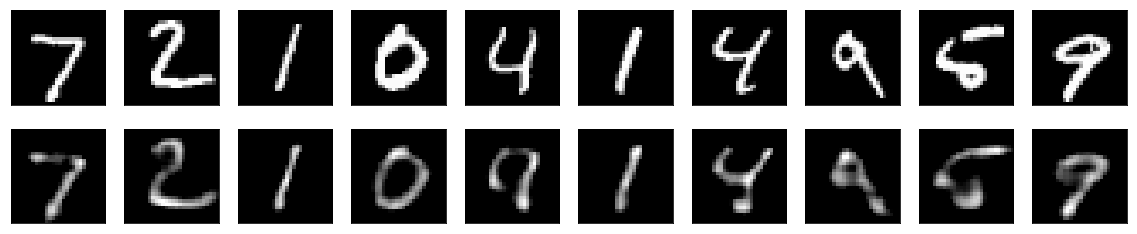

In [20]:
decoded_imgs_cov = autoencoder_cov.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # origin images:
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstructed images:
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_cov[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Image denoising

In [21]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28 , 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noise = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noise = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)

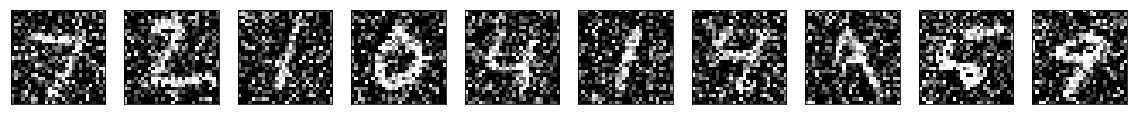

In [22]:
n = 10
plt.figure(figsize=(20, 2))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
input_img_cov2 = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_cov2)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded_cov2 = MaxPool2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_cov2)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_cov2 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_conv2 = Model(input_img_cov2, decoded_cov2)

autoencoder_conv2.compile(optimizer='adadelta', loss='binary_crossentropy')


In [28]:
autoencoder_conv2.fit(x_train_noise, x_train,
                      epochs=3,
                      batch_size=32,
                      shuffle=True,
                      validation_data=(x_test_noise, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
   32/60000 [..............................] - ETA: 3:09 - loss: 0.0964

   64/60000 [..............................] - ETA: 3:28 - loss: 0.0978

   96/60000 [..............................] - ETA: 3:27 - loss: 0.0984

  128/60000 [..............................] - ETA: 3:25 - loss: 0.0983

  160/60000 [..............................] - ETA: 3:21 - loss: 0.0982

  192/60000 [..............................] - ETA: 3:23 - loss: 0.0991

  224/60000 [..............................] - ETA: 3:25 - loss: 0.0983

  256/60000 [..............................] - ETA: 3:29 - loss: 0.0979

  288/60000 [..............................] - ETA: 3:30 - loss: 0.0981

  320/60000 [..............................] - ETA: 3:34 - loss: 0.0984

  352/60000 [..............................] - ETA: 3:32 - loss: 0.0982

  384/60000 [..............................] - ETA: 3:38 - loss: 0.0991

  416/60000 [..............................] - ETA: 3:38 - loss: 0.0989

  448/60000 [..............................] - ETA: 3:33 - loss: 0.0991

  480/60000 [..............................] - ETA: 3:28 - loss: 0.0993

  512/60000 [..............................] - ETA: 3:25 - loss: 0.0993

  544/60000 [..............................] - ETA: 3:23 - loss: 0.0994

  576/60000 [..............................] - ETA: 3:21 - loss: 0.0993

  608/60000 [..............................] - ETA: 3:19 - loss: 0.0995

  640/60000 [..............................] - ETA: 3:18 - loss: 0.0995

  672/60000 [..............................] - ETA: 3:16 - loss: 0.0997

  704/60000 [..............................] - ETA: 3:15 - loss: 0.0999

  736/60000 [..............................] - ETA: 3:14 - loss: 0.1001

  768/60000 [..............................] - ETA: 3:13 - loss: 0.1001

  800/60000 [..............................] - ETA: 3:12 - loss: 0.1000

  832/60000 [..............................] - ETA: 3:11 - loss: 0.0999

  864/60000 [..............................] - ETA: 3:10 - loss: 0.0996

  896/60000 [..............................] - ETA: 3:09 - loss: 0.0998

  928/60000 [..............................] - ETA: 3:09 - loss: 0.0998

  960/60000 [..............................] - ETA: 3:08 - loss: 0.0997

  992/60000 [..............................] - ETA: 3:07 - loss: 0.1001

 1024/60000 [..............................] - ETA: 3:07 - loss: 0.1000

 1056/60000 [..............................] - ETA: 3:06 - loss: 0.1000

 1088/60000 [..............................] - ETA: 3:05 - loss: 0.1001

 1120/60000 [..............................] - ETA: 3:05 - loss: 0.1001

 1152/60000 [..............................] - ETA: 3:04 - loss: 0.1001

 1184/60000 [..............................] - ETA: 3:04 - loss: 0.1001

 1216/60000 [..............................] - ETA: 3:04 - loss: 0.1002

 1248/60000 [..............................] - ETA: 3:04 - loss: 0.1005

 1280/60000 [..............................] - ETA: 3:03 - loss: 0.1003

 1312/60000 [..............................] - ETA: 3:02 - loss: 0.1002

 1344/60000 [..............................] - ETA: 3:00 - loss: 0.1001

 1376/60000 [..............................] - ETA: 2:59 - loss: 0.1000

 1408/60000 [..............................] - ETA: 2:58 - loss: 0.1001

 1440/60000 [..............................] - ETA: 2:57 - loss: 0.1000

 1472/60000 [..............................] - ETA: 2:56 - loss: 0.0998

 1504/60000 [..............................] - ETA: 2:55 - loss: 0.0997

 1536/60000 [..............................] - ETA: 2:54 - loss: 0.0996

 1568/60000 [..............................] - ETA: 2:53 - loss: 0.0996

 1600/60000 [..............................] - ETA: 2:52 - loss: 0.0995

 1632/60000 [..............................] - ETA: 2:51 - loss: 0.0995

 1664/60000 [..............................] - ETA: 2:50 - loss: 0.0994

 1696/60000 [..............................] - ETA: 2:49 - loss: 0.0994

 1728/60000 [..............................] - ETA: 2:48 - loss: 0.0995

 1760/60000 [..............................] - ETA: 2:47 - loss: 0.0994

 1792/60000 [..............................] - ETA: 2:47 - loss: 0.0994

 1824/60000 [..............................] - ETA: 2:46 - loss: 0.0993

 1856/60000 [..............................] - ETA: 2:45 - loss: 0.0993

 1888/60000 [..............................] - ETA: 2:44 - loss: 0.0993

 1920/60000 [..............................] - ETA: 2:44 - loss: 0.0992

 1952/60000 [..............................] - ETA: 2:43 - loss: 0.0992

 1984/60000 [..............................] - ETA: 2:42 - loss: 0.0990

 2016/60000 [>.............................] - ETA: 2:42 - loss: 0.0991

 2048/60000 [>.............................] - ETA: 2:41 - loss: 0.0991

 2080/60000 [>.............................] - ETA: 2:41 - loss: 0.0991

 2112/60000 [>.............................] - ETA: 2:40 - loss: 0.0992

 2144/60000 [>.............................] - ETA: 2:39 - loss: 0.0991

 2176/60000 [>.............................] - ETA: 2:39 - loss: 0.0992

 2208/60000 [>.............................] - ETA: 2:38 - loss: 0.0992

 2240/60000 [>.............................] - ETA: 2:38 - loss: 0.0992

 2272/60000 [>.............................] - ETA: 2:37 - loss: 0.0991

 2304/60000 [>.............................] - ETA: 2:37 - loss: 0.0991

 2336/60000 [>.............................] - ETA: 2:36 - loss: 0.0991

 2368/60000 [>.............................] - ETA: 2:36 - loss: 0.0990

 2400/60000 [>.............................] - ETA: 2:35 - loss: 0.0990

 2432/60000 [>.............................] - ETA: 2:35 - loss: 0.0990

 2464/60000 [>.............................] - ETA: 2:34 - loss: 0.0991

 2496/60000 [>.............................] - ETA: 2:34 - loss: 0.0991

 2528/60000 [>.............................] - ETA: 2:34 - loss: 0.0993

 2560/60000 [>.............................] - ETA: 2:33 - loss: 0.0992

 2592/60000 [>.............................] - ETA: 2:33 - loss: 0.0992

 2624/60000 [>.............................] - ETA: 2:32 - loss: 0.0993

 2656/60000 [>.............................] - ETA: 2:32 - loss: 0.0993

 2688/60000 [>.............................] - ETA: 2:32 - loss: 0.0993

 2720/60000 [>.............................] - ETA: 2:31 - loss: 0.0993

 2752/60000 [>.............................] - ETA: 2:31 - loss: 0.0992

 2784/60000 [>.............................] - ETA: 2:30 - loss: 0.0993

 2816/60000 [>.............................] - ETA: 2:30 - loss: 0.0993

 2848/60000 [>.............................] - ETA: 2:30 - loss: 0.0993

 2880/60000 [>.............................] - ETA: 2:30 - loss: 0.0993

 2912/60000 [>.............................] - ETA: 2:29 - loss: 0.0993

 2944/60000 [>.............................] - ETA: 2:29 - loss: 0.0993

 2976/60000 [>.............................] - ETA: 2:29 - loss: 0.0993

 3008/60000 [>.............................] - ETA: 2:28 - loss: 0.0993

 3040/60000 [>.............................] - ETA: 2:28 - loss: 0.0992

 3072/60000 [>.............................] - ETA: 2:28 - loss: 0.0991

 3104/60000 [>.............................] - ETA: 2:27 - loss: 0.0991

 3136/60000 [>.............................] - ETA: 2:27 - loss: 0.0991

 3168/60000 [>.............................] - ETA: 2:27 - loss: 0.0992

 3200/60000 [>.............................] - ETA: 2:27 - loss: 0.0992

 3232/60000 [>.............................] - ETA: 2:26 - loss: 0.0992

 3264/60000 [>.............................] - ETA: 2:26 - loss: 0.0992

 3296/60000 [>.............................] - ETA: 2:26 - loss: 0.0992

 3328/60000 [>.............................] - ETA: 2:25 - loss: 0.0991

 3360/60000 [>.............................] - ETA: 2:25 - loss: 0.0991

 3392/60000 [>.............................] - ETA: 2:25 - loss: 0.0991

 3424/60000 [>.............................] - ETA: 2:25 - loss: 0.0991

 3456/60000 [>.............................] - ETA: 2:24 - loss: 0.0992

 3488/60000 [>.............................] - ETA: 2:24 - loss: 0.0993

 3520/60000 [>.............................] - ETA: 2:24 - loss: 0.0992

 3552/60000 [>.............................] - ETA: 2:24 - loss: 0.0992

 3584/60000 [>.............................] - ETA: 2:23 - loss: 0.0992

 3616/60000 [>.............................] - ETA: 2:23 - loss: 0.0992

 3648/60000 [>.............................] - ETA: 2:23 - loss: 0.0993

 3680/60000 [>.............................] - ETA: 2:23 - loss: 0.0993

 3712/60000 [>.............................] - ETA: 2:22 - loss: 0.0993

 3744/60000 [>.............................] - ETA: 2:22 - loss: 0.0993

 3776/60000 [>.............................] - ETA: 2:22 - loss: 0.0993

 3808/60000 [>.............................] - ETA: 2:22 - loss: 0.0993

 3840/60000 [>.............................] - ETA: 2:21 - loss: 0.0993

 3872/60000 [>.............................] - ETA: 2:21 - loss: 0.0993

 3904/60000 [>.............................] - ETA: 2:21 - loss: 0.0993

 3936/60000 [>.............................] - ETA: 2:21 - loss: 0.0994

 3968/60000 [>.............................] - ETA: 2:21 - loss: 0.0993

 4000/60000 [=>............................] - ETA: 2:20 - loss: 0.0993

 4032/60000 [=>............................] - ETA: 2:20 - loss: 0.0993

 4064/60000 [=>............................] - ETA: 2:20 - loss: 0.0993

 4096/60000 [=>............................] - ETA: 2:20 - loss: 0.0993

 4128/60000 [=>............................] - ETA: 2:20 - loss: 0.0992

 4160/60000 [=>............................] - ETA: 2:19 - loss: 0.0992

 4192/60000 [=>............................] - ETA: 2:19 - loss: 0.0992

 4224/60000 [=>............................] - ETA: 2:19 - loss: 0.0992

 4256/60000 [=>............................] - ETA: 2:19 - loss: 0.0992

 4288/60000 [=>............................] - ETA: 2:19 - loss: 0.0991

 4320/60000 [=>............................] - ETA: 2:18 - loss: 0.0992

 4352/60000 [=>............................] - ETA: 2:18 - loss: 0.0992

 4384/60000 [=>............................] - ETA: 2:18 - loss: 0.0992

 4416/60000 [=>............................] - ETA: 2:18 - loss: 0.0992

 4448/60000 [=>............................] - ETA: 2:18 - loss: 0.0992

 4480/60000 [=>............................] - ETA: 2:17 - loss: 0.0992

 4512/60000 [=>............................] - ETA: 2:17 - loss: 0.0992

 4544/60000 [=>............................] - ETA: 2:17 - loss: 0.0992

 4576/60000 [=>............................] - ETA: 2:17 - loss: 0.0993

 4608/60000 [=>............................] - ETA: 2:17 - loss: 0.0993

 4640/60000 [=>............................] - ETA: 2:16 - loss: 0.0993

 4672/60000 [=>............................] - ETA: 2:16 - loss: 0.0992

 4704/60000 [=>............................] - ETA: 2:16 - loss: 0.0993

 4736/60000 [=>............................] - ETA: 2:16 - loss: 0.0992

 4768/60000 [=>............................] - ETA: 2:16 - loss: 0.0992

 4800/60000 [=>............................] - ETA: 2:16 - loss: 0.0992

 4832/60000 [=>............................] - ETA: 2:15 - loss: 0.0992

 4864/60000 [=>............................] - ETA: 2:15 - loss: 0.0992

 4896/60000 [=>............................] - ETA: 2:15 - loss: 0.0993

 4928/60000 [=>............................] - ETA: 2:15 - loss: 0.0993

 4960/60000 [=>............................] - ETA: 2:15 - loss: 0.0993

 4992/60000 [=>............................] - ETA: 2:15 - loss: 0.0993

 5024/60000 [=>............................] - ETA: 2:14 - loss: 0.0992

 5056/60000 [=>............................] - ETA: 2:14 - loss: 0.0992

 5088/60000 [=>............................] - ETA: 2:14 - loss: 0.0992

 5120/60000 [=>............................] - ETA: 2:14 - loss: 0.0992

 5152/60000 [=>............................] - ETA: 2:14 - loss: 0.0992

 5184/60000 [=>............................] - ETA: 2:14 - loss: 0.0993

 5216/60000 [=>............................] - ETA: 2:14 - loss: 0.0993

 5248/60000 [=>............................] - ETA: 2:13 - loss: 0.0992

 5280/60000 [=>............................] - ETA: 2:13 - loss: 0.0992

 5312/60000 [=>............................] - ETA: 2:13 - loss: 0.0992

 5344/60000 [=>............................] - ETA: 2:13 - loss: 0.0992

 5376/60000 [=>............................] - ETA: 2:13 - loss: 0.0993

 5408/60000 [=>............................] - ETA: 2:13 - loss: 0.0993

 5440/60000 [=>............................] - ETA: 2:13 - loss: 0.0993

 5472/60000 [=>............................] - ETA: 2:12 - loss: 0.0994

 5504/60000 [=>............................] - ETA: 2:12 - loss: 0.0993

 5536/60000 [=>............................] - ETA: 2:12 - loss: 0.0993

 5568/60000 [=>............................] - ETA: 2:12 - loss: 0.0993

 5600/60000 [=>............................] - ETA: 2:12 - loss: 0.0993

 5632/60000 [=>............................] - ETA: 2:12 - loss: 0.0993

 5664/60000 [=>............................] - ETA: 2:12 - loss: 0.0993

 5696/60000 [=>............................] - ETA: 2:11 - loss: 0.0993

 5728/60000 [=>............................] - ETA: 2:11 - loss: 0.0993

 5760/60000 [=>............................] - ETA: 2:11 - loss: 0.0993

 5792/60000 [=>............................] - ETA: 2:11 - loss: 0.0993

 5824/60000 [=>............................] - ETA: 2:11 - loss: 0.0993

 5856/60000 [=>............................] - ETA: 2:11 - loss: 0.0993

 5888/60000 [=>............................] - ETA: 2:11 - loss: 0.0993

 5920/60000 [=>............................] - ETA: 2:10 - loss: 0.0993

 5952/60000 [=>............................] - ETA: 2:10 - loss: 0.0993

 5984/60000 [=>............................] - ETA: 2:10 - loss: 0.0993

 6016/60000 [==>...........................] - ETA: 2:10 - loss: 0.0993

 6048/60000 [==>...........................] - ETA: 2:10 - loss: 0.0993

 6080/60000 [==>...........................] - ETA: 2:10 - loss: 0.0993

 6112/60000 [==>...........................] - ETA: 2:10 - loss: 0.0992

 6144/60000 [==>...........................] - ETA: 2:10 - loss: 0.0992

 6176/60000 [==>...........................] - ETA: 2:09 - loss: 0.0991

 6208/60000 [==>...........................] - ETA: 2:09 - loss: 0.0991

 6240/60000 [==>...........................] - ETA: 2:09 - loss: 0.0992

 6272/60000 [==>...........................] - ETA: 2:09 - loss: 0.0992

 6304/60000 [==>...........................] - ETA: 2:09 - loss: 0.0992

 6336/60000 [==>...........................] - ETA: 2:09 - loss: 0.0992

 6368/60000 [==>...........................] - ETA: 2:09 - loss: 0.0992

 6400/60000 [==>...........................] - ETA: 2:09 - loss: 0.0992

 6432/60000 [==>...........................] - ETA: 2:08 - loss: 0.0991

 6464/60000 [==>...........................] - ETA: 2:08 - loss: 0.0992

 6496/60000 [==>...........................] - ETA: 2:08 - loss: 0.0992

 6528/60000 [==>...........................] - ETA: 2:08 - loss: 0.0992

 6560/60000 [==>...........................] - ETA: 2:08 - loss: 0.0992

 6592/60000 [==>...........................] - ETA: 2:08 - loss: 0.0992

 6624/60000 [==>...........................] - ETA: 2:08 - loss: 0.0992

 6656/60000 [==>...........................] - ETA: 2:08 - loss: 0.0992

 6688/60000 [==>...........................] - ETA: 2:07 - loss: 0.0992

 6720/60000 [==>...........................] - ETA: 2:07 - loss: 0.0992

 6752/60000 [==>...........................] - ETA: 2:07 - loss: 0.0992

 6784/60000 [==>...........................] - ETA: 2:07 - loss: 0.0992

 6816/60000 [==>...........................] - ETA: 2:07 - loss: 0.0992

 6848/60000 [==>...........................] - ETA: 2:07 - loss: 0.0992

 6880/60000 [==>...........................] - ETA: 2:07 - loss: 0.0992

 6912/60000 [==>...........................] - ETA: 2:07 - loss: 0.0992

 6944/60000 [==>...........................] - ETA: 2:07 - loss: 0.0992

 6976/60000 [==>...........................] - ETA: 2:06 - loss: 0.0992

 7008/60000 [==>...........................] - ETA: 2:06 - loss: 0.0992

 7040/60000 [==>...........................] - ETA: 2:06 - loss: 0.0991

 7072/60000 [==>...........................] - ETA: 2:06 - loss: 0.0991

 7104/60000 [==>...........................] - ETA: 2:06 - loss: 0.0991

 7136/60000 [==>...........................] - ETA: 2:06 - loss: 0.0991

 7168/60000 [==>...........................] - ETA: 2:06 - loss: 0.0991

 7200/60000 [==>...........................] - ETA: 2:06 - loss: 0.0991

 7232/60000 [==>...........................] - ETA: 2:05 - loss: 0.0991

 7264/60000 [==>...........................] - ETA: 2:05 - loss: 0.0991

 7296/60000 [==>...........................] - ETA: 2:05 - loss: 0.0991

 7328/60000 [==>...........................] - ETA: 2:05 - loss: 0.0991

 7360/60000 [==>...........................] - ETA: 2:05 - loss: 0.0991

 7392/60000 [==>...........................] - ETA: 2:05 - loss: 0.0991

 7424/60000 [==>...........................] - ETA: 2:05 - loss: 0.0991

 7456/60000 [==>...........................] - ETA: 2:05 - loss: 0.0991

 7488/60000 [==>...........................] - ETA: 2:05 - loss: 0.0991

 7520/60000 [==>...........................] - ETA: 2:04 - loss: 0.0991

 7552/60000 [==>...........................] - ETA: 2:04 - loss: 0.0992

 7584/60000 [==>...........................] - ETA: 2:04 - loss: 0.0991

 7616/60000 [==>...........................] - ETA: 2:04 - loss: 0.0992

 7648/60000 [==>...........................] - ETA: 2:04 - loss: 0.0992

 7680/60000 [==>...........................] - ETA: 2:04 - loss: 0.0992

 7712/60000 [==>...........................] - ETA: 2:04 - loss: 0.0991

 7744/60000 [==>...........................] - ETA: 2:04 - loss: 0.0992

 7776/60000 [==>...........................] - ETA: 2:04 - loss: 0.0992

 7808/60000 [==>...........................] - ETA: 2:03 - loss: 0.0991

 7840/60000 [==>...........................] - ETA: 2:03 - loss: 0.0991

 7872/60000 [==>...........................] - ETA: 2:03 - loss: 0.0991

 7904/60000 [==>...........................] - ETA: 2:03 - loss: 0.0991

 7936/60000 [==>...........................] - ETA: 2:03 - loss: 0.0991

 7968/60000 [==>...........................] - ETA: 2:03 - loss: 0.0991

 8000/60000 [===>..........................] - ETA: 2:03 - loss: 0.0991

 8032/60000 [===>..........................] - ETA: 2:03 - loss: 0.0991

 8064/60000 [===>..........................] - ETA: 2:03 - loss: 0.0991

 8096/60000 [===>..........................] - ETA: 2:03 - loss: 0.0991

 8128/60000 [===>..........................] - ETA: 2:03 - loss: 0.0991

 8160/60000 [===>..........................] - ETA: 2:02 - loss: 0.0991

 8192/60000 [===>..........................] - ETA: 2:02 - loss: 0.0991

 8224/60000 [===>..........................] - ETA: 2:02 - loss: 0.0991

 8256/60000 [===>..........................] - ETA: 2:02 - loss: 0.0992

 8288/60000 [===>..........................] - ETA: 2:02 - loss: 0.0992

 8320/60000 [===>..........................] - ETA: 2:02 - loss: 0.0991

 8352/60000 [===>..........................] - ETA: 2:02 - loss: 0.0992

 8384/60000 [===>..........................] - ETA: 2:02 - loss: 0.0992

 8416/60000 [===>..........................] - ETA: 2:02 - loss: 0.0992

 8448/60000 [===>..........................] - ETA: 2:02 - loss: 0.0993

 8480/60000 [===>..........................] - ETA: 2:02 - loss: 0.0993

 8512/60000 [===>..........................] - ETA: 2:01 - loss: 0.0993

 8544/60000 [===>..........................] - ETA: 2:01 - loss: 0.0993

 8576/60000 [===>..........................] - ETA: 2:01 - loss: 0.0993

 8608/60000 [===>..........................] - ETA: 2:01 - loss: 0.0993

 8640/60000 [===>..........................] - ETA: 2:01 - loss: 0.0992

 8672/60000 [===>..........................] - ETA: 2:01 - loss: 0.0992

 8704/60000 [===>..........................] - ETA: 2:01 - loss: 0.0992

 8736/60000 [===>..........................] - ETA: 2:01 - loss: 0.0993

 8768/60000 [===>..........................] - ETA: 2:01 - loss: 0.0993

 8800/60000 [===>..........................] - ETA: 2:01 - loss: 0.0993

 8832/60000 [===>..........................] - ETA: 2:01 - loss: 0.0993

 8864/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 8896/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 8928/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 8960/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 8992/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 9024/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 9056/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 9088/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 9120/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 9152/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 9184/60000 [===>..........................] - ETA: 2:00 - loss: 0.0993

 9216/60000 [===>..........................] - ETA: 1:59 - loss: 0.0992

 9248/60000 [===>..........................] - ETA: 1:59 - loss: 0.0993

 9280/60000 [===>..........................] - ETA: 1:59 - loss: 0.0993

 9312/60000 [===>..........................] - ETA: 1:59 - loss: 0.0993

 9344/60000 [===>..........................] - ETA: 1:59 - loss: 0.0993

 9376/60000 [===>..........................] - ETA: 1:59 - loss: 0.0992

 9408/60000 [===>..........................] - ETA: 1:59 - loss: 0.0992

 9440/60000 [===>..........................] - ETA: 1:59 - loss: 0.0992

 9472/60000 [===>..........................] - ETA: 1:59 - loss: 0.0992

 9504/60000 [===>..........................] - ETA: 1:59 - loss: 0.0992

 9536/60000 [===>..........................] - ETA: 1:58 - loss: 0.0992

 9568/60000 [===>..........................] - ETA: 1:58 - loss: 0.0992

 9600/60000 [===>..........................] - ETA: 1:58 - loss: 0.0992

 9632/60000 [===>..........................] - ETA: 1:58 - loss: 0.0992

 9664/60000 [===>..........................] - ETA: 1:58 - loss: 0.0992

 9696/60000 [===>..........................] - ETA: 1:58 - loss: 0.0991

 9728/60000 [===>..........................] - ETA: 1:58 - loss: 0.0991

 9760/60000 [===>..........................] - ETA: 1:58 - loss: 0.0991

 9792/60000 [===>..........................] - ETA: 1:58 - loss: 0.0992

 9824/60000 [===>..........................] - ETA: 1:58 - loss: 0.0992

 9856/60000 [===>..........................] - ETA: 1:57 - loss: 0.0992

 9888/60000 [===>..........................] - ETA: 1:57 - loss: 0.0992

 9920/60000 [===>..........................] - ETA: 1:57 - loss: 0.0992

 9952/60000 [===>..........................] - ETA: 1:57 - loss: 0.0992

 9984/60000 [===>..........................] - ETA: 1:57 - loss: 0.0992

10016/60000 [====>.........................] - ETA: 1:57 - loss: 0.0992

10048/60000 [====>.........................] - ETA: 1:57 - loss: 0.0991

10080/60000 [====>.........................] - ETA: 1:57 - loss: 0.0991

10112/60000 [====>.........................] - ETA: 1:57 - loss: 0.0991

10144/60000 [====>.........................] - ETA: 1:57 - loss: 0.0991

10176/60000 [====>.........................] - ETA: 1:57 - loss: 0.0991

10208/60000 [====>.........................] - ETA: 1:56 - loss: 0.0991

10240/60000 [====>.........................] - ETA: 1:56 - loss: 0.0991

10272/60000 [====>.........................] - ETA: 1:56 - loss: 0.0992

10304/60000 [====>.........................] - ETA: 1:56 - loss: 0.0992

10336/60000 [====>.........................] - ETA: 1:56 - loss: 0.0992

10368/60000 [====>.........................] - ETA: 1:56 - loss: 0.0992

10400/60000 [====>.........................] - ETA: 1:56 - loss: 0.0992

10432/60000 [====>.........................] - ETA: 1:56 - loss: 0.0992

10464/60000 [====>.........................] - ETA: 1:56 - loss: 0.0992

10496/60000 [====>.........................] - ETA: 1:56 - loss: 0.0992

10528/60000 [====>.........................] - ETA: 1:56 - loss: 0.0992

10560/60000 [====>.........................] - ETA: 1:55 - loss: 0.0992

10592/60000 [====>.........................] - ETA: 1:55 - loss: 0.0991

10624/60000 [====>.........................] - ETA: 1:55 - loss: 0.0991

10656/60000 [====>.........................] - ETA: 1:55 - loss: 0.0992

10688/60000 [====>.........................] - ETA: 1:55 - loss: 0.0991

10720/60000 [====>.........................] - ETA: 1:55 - loss: 0.0991

10752/60000 [====>.........................] - ETA: 1:55 - loss: 0.0991

10784/60000 [====>.........................] - ETA: 1:55 - loss: 0.0992

10816/60000 [====>.........................] - ETA: 1:55 - loss: 0.0991

10848/60000 [====>.........................] - ETA: 1:55 - loss: 0.0991

10880/60000 [====>.........................] - ETA: 1:54 - loss: 0.0992

10912/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

10944/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

10976/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

11008/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

11040/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

11072/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

11104/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

11136/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

11168/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

11200/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

11232/60000 [====>.........................] - ETA: 1:54 - loss: 0.0991

11264/60000 [====>.........................] - ETA: 1:53 - loss: 0.0991

11296/60000 [====>.........................] - ETA: 1:53 - loss: 0.0992

11328/60000 [====>.........................] - ETA: 1:53 - loss: 0.0991

11360/60000 [====>.........................] - ETA: 1:53 - loss: 0.0991

11392/60000 [====>.........................] - ETA: 1:53 - loss: 0.0991

11424/60000 [====>.........................] - ETA: 1:53 - loss: 0.0991

11456/60000 [====>.........................] - ETA: 1:53 - loss: 0.0991

11488/60000 [====>.........................] - ETA: 1:53 - loss: 0.0991

11520/60000 [====>.........................] - ETA: 1:53 - loss: 0.0991

11552/60000 [====>.........................] - ETA: 1:53 - loss: 0.0991

11584/60000 [====>.........................] - ETA: 1:53 - loss: 0.0991

11616/60000 [====>.........................] - ETA: 1:52 - loss: 0.0991

11648/60000 [====>.........................] - ETA: 1:52 - loss: 0.0991

11680/60000 [====>.........................] - ETA: 1:52 - loss: 0.0991

11712/60000 [====>.........................] - ETA: 1:52 - loss: 0.0992

11744/60000 [====>.........................] - ETA: 1:52 - loss: 0.0992

11776/60000 [====>.........................] - ETA: 1:52 - loss: 0.0992

11808/60000 [====>.........................] - ETA: 1:52 - loss: 0.0992

11840/60000 [====>.........................] - ETA: 1:52 - loss: 0.0992

11872/60000 [====>.........................] - ETA: 1:52 - loss: 0.0992

11904/60000 [====>.........................] - ETA: 1:52 - loss: 0.0992

11936/60000 [====>.........................] - ETA: 1:52 - loss: 0.0992

11968/60000 [====>.........................] - ETA: 1:51 - loss: 0.0992

12000/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12032/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12064/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12096/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12128/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12160/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12192/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12224/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12256/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12288/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12320/60000 [=====>........................] - ETA: 1:51 - loss: 0.0992

12352/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12384/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12416/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12448/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12480/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12512/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12544/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12576/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12608/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12640/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12672/60000 [=====>........................] - ETA: 1:50 - loss: 0.0992

12704/60000 [=====>........................] - ETA: 1:49 - loss: 0.0992

12736/60000 [=====>........................] - ETA: 1:49 - loss: 0.0992

12768/60000 [=====>........................] - ETA: 1:49 - loss: 0.0992

12800/60000 [=====>........................] - ETA: 1:49 - loss: 0.0992

12832/60000 [=====>........................] - ETA: 1:49 - loss: 0.0992

12864/60000 [=====>........................] - ETA: 1:49 - loss: 0.0992

12896/60000 [=====>........................] - ETA: 1:49 - loss: 0.0992

12928/60000 [=====>........................] - ETA: 1:49 - loss: 0.0992

12960/60000 [=====>........................] - ETA: 1:49 - loss: 0.0992

12992/60000 [=====>........................] - ETA: 1:49 - loss: 0.0991

13024/60000 [=====>........................] - ETA: 1:49 - loss: 0.0991

13056/60000 [=====>........................] - ETA: 1:49 - loss: 0.0992

13088/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13120/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13152/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13184/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13216/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13248/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13280/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13312/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13344/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13376/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13408/60000 [=====>........................] - ETA: 1:48 - loss: 0.0992

13440/60000 [=====>........................] - ETA: 1:48 - loss: 0.0991

13472/60000 [=====>........................] - ETA: 1:47 - loss: 0.0992

13504/60000 [=====>........................] - ETA: 1:47 - loss: 0.0992

13536/60000 [=====>........................] - ETA: 1:47 - loss: 0.0991

13568/60000 [=====>........................] - ETA: 1:47 - loss: 0.0991

13600/60000 [=====>........................] - ETA: 1:47 - loss: 0.0991

13632/60000 [=====>........................] - ETA: 1:47 - loss: 0.0992

13664/60000 [=====>........................] - ETA: 1:47 - loss: 0.0992

13696/60000 [=====>........................] - ETA: 1:47 - loss: 0.0992

13728/60000 [=====>........................] - ETA: 1:47 - loss: 0.0992

13760/60000 [=====>........................] - ETA: 1:47 - loss: 0.0992

13792/60000 [=====>........................] - ETA: 1:47 - loss: 0.0992

13824/60000 [=====>........................] - ETA: 1:47 - loss: 0.0992

13856/60000 [=====>........................] - ETA: 1:46 - loss: 0.0992

13888/60000 [=====>........................] - ETA: 1:46 - loss: 0.0992

13920/60000 [=====>........................] - ETA: 1:46 - loss: 0.0991

13952/60000 [=====>........................] - ETA: 1:46 - loss: 0.0991

13984/60000 [=====>........................] - ETA: 1:46 - loss: 0.0991

14016/60000 [======>.......................] - ETA: 1:46 - loss: 0.0992

14048/60000 [======>.......................] - ETA: 1:46 - loss: 0.0992

14080/60000 [======>.......................] - ETA: 1:46 - loss: 0.0992

14112/60000 [======>.......................] - ETA: 1:46 - loss: 0.0992

14144/60000 [======>.......................] - ETA: 1:46 - loss: 0.0992

14176/60000 [======>.......................] - ETA: 1:46 - loss: 0.0992

14208/60000 [======>.......................] - ETA: 1:46 - loss: 0.0992

14240/60000 [======>.......................] - ETA: 1:46 - loss: 0.0992

14272/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14304/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14336/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14368/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14400/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14432/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14464/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14496/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14528/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14560/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14592/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14624/60000 [======>.......................] - ETA: 1:45 - loss: 0.0992

14656/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

14688/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

14720/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

14752/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

14784/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

14816/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

14848/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

14880/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

14912/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

14944/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

14976/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

15008/60000 [======>.......................] - ETA: 1:44 - loss: 0.0992

15040/60000 [======>.......................] - ETA: 1:43 - loss: 0.0992

15072/60000 [======>.......................] - ETA: 1:43 - loss: 0.0991

15104/60000 [======>.......................] - ETA: 1:43 - loss: 0.0992

15136/60000 [======>.......................] - ETA: 1:43 - loss: 0.0992

15168/60000 [======>.......................] - ETA: 1:43 - loss: 0.0992

15200/60000 [======>.......................] - ETA: 1:43 - loss: 0.0992

15232/60000 [======>.......................] - ETA: 1:43 - loss: 0.0991

15264/60000 [======>.......................] - ETA: 1:43 - loss: 0.0991

15296/60000 [======>.......................] - ETA: 1:43 - loss: 0.0992

15328/60000 [======>.......................] - ETA: 1:43 - loss: 0.0992

15360/60000 [======>.......................] - ETA: 1:43 - loss: 0.0992

15392/60000 [======>.......................] - ETA: 1:43 - loss: 0.0992

15424/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15456/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15488/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15520/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15552/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15584/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15616/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15648/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15680/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15712/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15744/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15776/60000 [======>.......................] - ETA: 1:42 - loss: 0.0992

15808/60000 [======>.......................] - ETA: 1:41 - loss: 0.0992

15840/60000 [======>.......................] - ETA: 1:41 - loss: 0.0992

15872/60000 [======>.......................] - ETA: 1:41 - loss: 0.0992

15904/60000 [======>.......................] - ETA: 1:41 - loss: 0.0992

15936/60000 [======>.......................] - ETA: 1:41 - loss: 0.0992

15968/60000 [======>.......................] - ETA: 1:41 - loss: 0.0992

16000/60000 [=======>......................] - ETA: 1:41 - loss: 0.0992

16032/60000 [=======>......................] - ETA: 1:41 - loss: 0.0992

16064/60000 [=======>......................] - ETA: 1:41 - loss: 0.0992

16096/60000 [=======>......................] - ETA: 1:41 - loss: 0.0992

16128/60000 [=======>......................] - ETA: 1:41 - loss: 0.0992

16160/60000 [=======>......................] - ETA: 1:41 - loss: 0.0992

16192/60000 [=======>......................] - ETA: 1:41 - loss: 0.0992

16224/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16256/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16288/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16320/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16352/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16384/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16416/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16448/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16480/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16512/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16544/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16576/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16608/60000 [=======>......................] - ETA: 1:40 - loss: 0.0992

16640/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16672/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16704/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16736/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16768/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16800/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16832/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16864/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16896/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16928/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16960/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

16992/60000 [=======>......................] - ETA: 1:39 - loss: 0.0992

17024/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17056/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17088/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17120/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17152/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17184/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17216/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17248/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17280/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17312/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17344/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17376/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17408/60000 [=======>......................] - ETA: 1:38 - loss: 0.0992

17440/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17472/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17504/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17536/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17568/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17600/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17632/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17664/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17696/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17728/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17760/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17792/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17824/60000 [=======>......................] - ETA: 1:37 - loss: 0.0992

17856/60000 [=======>......................] - ETA: 1:36 - loss: 0.0992

17888/60000 [=======>......................] - ETA: 1:36 - loss: 0.0992

17920/60000 [=======>......................] - ETA: 1:36 - loss: 0.0992

17952/60000 [=======>......................] - ETA: 1:36 - loss: 0.0991

17984/60000 [=======>......................] - ETA: 1:36 - loss: 0.0992

18016/60000 [========>.....................] - ETA: 1:36 - loss: 0.0992

18048/60000 [========>.....................] - ETA: 1:36 - loss: 0.0992

18080/60000 [========>.....................] - ETA: 1:36 - loss: 0.0992

18112/60000 [========>.....................] - ETA: 1:36 - loss: 0.0992

18144/60000 [========>.....................] - ETA: 1:36 - loss: 0.0992

18176/60000 [========>.....................] - ETA: 1:36 - loss: 0.0992

18208/60000 [========>.....................] - ETA: 1:36 - loss: 0.0992

18240/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18272/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18304/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18336/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18368/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18400/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18432/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18464/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18496/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18528/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18560/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18592/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18624/60000 [========>.....................] - ETA: 1:35 - loss: 0.0992

18656/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

18688/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

18720/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

18752/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

18784/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

18816/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

18848/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

18880/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

18912/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

18944/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

18976/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

19008/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

19040/60000 [========>.....................] - ETA: 1:34 - loss: 0.0992

19072/60000 [========>.....................] - ETA: 1:33 - loss: 0.0992

19104/60000 [========>.....................] - ETA: 1:33 - loss: 0.0992

19136/60000 [========>.....................] - ETA: 1:33 - loss: 0.0992

19168/60000 [========>.....................] - ETA: 1:33 - loss: 0.0992

19200/60000 [========>.....................] - ETA: 1:33 - loss: 0.0992

19232/60000 [========>.....................] - ETA: 1:33 - loss: 0.0992

19264/60000 [========>.....................] - ETA: 1:33 - loss: 0.0992

19296/60000 [========>.....................] - ETA: 1:33 - loss: 0.0992

19328/60000 [========>.....................] - ETA: 1:33 - loss: 0.0991

19360/60000 [========>.....................] - ETA: 1:33 - loss: 0.0991

19392/60000 [========>.....................] - ETA: 1:33 - loss: 0.0991

19424/60000 [========>.....................] - ETA: 1:33 - loss: 0.0991

19456/60000 [========>.....................] - ETA: 1:33 - loss: 0.0991

19488/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19520/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19552/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19584/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19616/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19648/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19680/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19712/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19744/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19776/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19808/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19840/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19872/60000 [========>.....................] - ETA: 1:32 - loss: 0.0991

19904/60000 [========>.....................] - ETA: 1:31 - loss: 0.0991

19936/60000 [========>.....................] - ETA: 1:31 - loss: 0.0991

19968/60000 [========>.....................] - ETA: 1:31 - loss: 0.0991

20000/60000 [=========>....................] - ETA: 1:31 - loss: 0.0991

20032/60000 [=========>....................] - ETA: 1:31 - loss: 0.0991

20064/60000 [=========>....................] - ETA: 1:31 - loss: 0.0991

20096/60000 [=========>....................] - ETA: 1:31 - loss: 0.0991

20128/60000 [=========>....................] - ETA: 1:31 - loss: 0.0991

20160/60000 [=========>....................] - ETA: 1:31 - loss: 0.0991

20192/60000 [=========>....................] - ETA: 1:31 - loss: 0.0992

20224/60000 [=========>....................] - ETA: 1:31 - loss: 0.0992

20256/60000 [=========>....................] - ETA: 1:31 - loss: 0.0992

20288/60000 [=========>....................] - ETA: 1:31 - loss: 0.0992

20320/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20352/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20384/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20416/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20448/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20480/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20512/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20544/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20576/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20608/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20640/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20672/60000 [=========>....................] - ETA: 1:30 - loss: 0.0992

20704/60000 [=========>....................] - ETA: 1:29 - loss: 0.0991

20736/60000 [=========>....................] - ETA: 1:29 - loss: 0.0992

20768/60000 [=========>....................] - ETA: 1:29 - loss: 0.0992

20800/60000 [=========>....................] - ETA: 1:29 - loss: 0.0992

20832/60000 [=========>....................] - ETA: 1:29 - loss: 0.0992

20864/60000 [=========>....................] - ETA: 1:29 - loss: 0.0991

20896/60000 [=========>....................] - ETA: 1:29 - loss: 0.0991

20928/60000 [=========>....................] - ETA: 1:29 - loss: 0.0991

20960/60000 [=========>....................] - ETA: 1:29 - loss: 0.0991

20992/60000 [=========>....................] - ETA: 1:29 - loss: 0.0991

21024/60000 [=========>....................] - ETA: 1:29 - loss: 0.0991

21056/60000 [=========>....................] - ETA: 1:29 - loss: 0.0991

21088/60000 [=========>....................] - ETA: 1:29 - loss: 0.0991

21120/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21152/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21184/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21216/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21248/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21280/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21312/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21344/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21376/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21408/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21440/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21472/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21504/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21536/60000 [=========>....................] - ETA: 1:28 - loss: 0.0991

21568/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21600/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21632/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21664/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21696/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21728/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21760/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21792/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21824/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21856/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21888/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21920/60000 [=========>....................] - ETA: 1:27 - loss: 0.0991

21952/60000 [=========>....................] - ETA: 1:26 - loss: 0.0991

21984/60000 [=========>....................] - ETA: 1:26 - loss: 0.0990

22016/60000 [==========>...................] - ETA: 1:26 - loss: 0.0990

22048/60000 [==========>...................] - ETA: 1:26 - loss: 0.0990

22080/60000 [==========>...................] - ETA: 1:26 - loss: 0.0990

22112/60000 [==========>...................] - ETA: 1:26 - loss: 0.0990

22144/60000 [==========>...................] - ETA: 1:26 - loss: 0.0990

22176/60000 [==========>...................] - ETA: 1:26 - loss: 0.0990

22208/60000 [==========>...................] - ETA: 1:26 - loss: 0.0991

22240/60000 [==========>...................] - ETA: 1:26 - loss: 0.0991

22272/60000 [==========>...................] - ETA: 1:26 - loss: 0.0991

22304/60000 [==========>...................] - ETA: 1:26 - loss: 0.0991

22336/60000 [==========>...................] - ETA: 1:26 - loss: 0.0991

22368/60000 [==========>...................] - ETA: 1:26 - loss: 0.0991

22400/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22432/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22464/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22496/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22528/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22560/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22592/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22624/60000 [==========>...................] - ETA: 1:25 - loss: 0.0990

22656/60000 [==========>...................] - ETA: 1:25 - loss: 0.0990

22688/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22720/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22752/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22784/60000 [==========>...................] - ETA: 1:25 - loss: 0.0991

22816/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

22848/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

22880/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

22912/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

22944/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

22976/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

23008/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

23040/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

23072/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

23104/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

23136/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

23168/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

23200/60000 [==========>...................] - ETA: 1:24 - loss: 0.0991

23232/60000 [==========>...................] - ETA: 1:23 - loss: 0.0991

23264/60000 [==========>...................] - ETA: 1:23 - loss: 0.0991

23296/60000 [==========>...................] - ETA: 1:23 - loss: 0.0991

23328/60000 [==========>...................] - ETA: 1:23 - loss: 0.0990

23360/60000 [==========>...................] - ETA: 1:23 - loss: 0.0990

23392/60000 [==========>...................] - ETA: 1:23 - loss: 0.0990

23424/60000 [==========>...................] - ETA: 1:23 - loss: 0.0990

23456/60000 [==========>...................] - ETA: 1:23 - loss: 0.0990

23488/60000 [==========>...................] - ETA: 1:23 - loss: 0.0991

23520/60000 [==========>...................] - ETA: 1:23 - loss: 0.0991

23552/60000 [==========>...................] - ETA: 1:23 - loss: 0.0991

23584/60000 [==========>...................] - ETA: 1:23 - loss: 0.0991

23616/60000 [==========>...................] - ETA: 1:23 - loss: 0.0991

23648/60000 [==========>...................] - ETA: 1:22 - loss: 0.0991

23680/60000 [==========>...................] - ETA: 1:22 - loss: 0.0991

23712/60000 [==========>...................] - ETA: 1:22 - loss: 0.0990

23744/60000 [==========>...................] - ETA: 1:22 - loss: 0.0991

23776/60000 [==========>...................] - ETA: 1:22 - loss: 0.0991

23808/60000 [==========>...................] - ETA: 1:22 - loss: 0.0991

23840/60000 [==========>...................] - ETA: 1:22 - loss: 0.0991

23872/60000 [==========>...................] - ETA: 1:22 - loss: 0.0991

23904/60000 [==========>...................] - ETA: 1:22 - loss: 0.0991

23936/60000 [==========>...................] - ETA: 1:22 - loss: 0.0991

23968/60000 [==========>...................] - ETA: 1:22 - loss: 0.0991

24000/60000 [===========>..................] - ETA: 1:22 - loss: 0.0991

24032/60000 [===========>..................] - ETA: 1:22 - loss: 0.0990

24064/60000 [===========>..................] - ETA: 1:22 - loss: 0.0991

24096/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24128/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24160/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24192/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24224/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24256/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24288/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24320/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24352/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24384/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24416/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24448/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24480/60000 [===========>..................] - ETA: 1:21 - loss: 0.0990

24512/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24544/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24576/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24608/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24640/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24672/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24704/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24736/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24768/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24800/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24832/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24864/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24896/60000 [===========>..................] - ETA: 1:20 - loss: 0.0990

24928/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

24960/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

24992/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25024/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25056/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25088/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25120/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25152/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25184/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25216/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25248/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25280/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25312/60000 [===========>..................] - ETA: 1:19 - loss: 0.0990

25344/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25376/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25408/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25440/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25472/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25504/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25536/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25568/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25600/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25632/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25664/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25696/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25728/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25760/60000 [===========>..................] - ETA: 1:18 - loss: 0.0990

25792/60000 [===========>..................] - ETA: 1:17 - loss: 0.0990

25824/60000 [===========>..................] - ETA: 1:17 - loss: 0.0990

25856/60000 [===========>..................] - ETA: 1:17 - loss: 0.0990

25888/60000 [===========>..................] - ETA: 1:17 - loss: 0.0990

25920/60000 [===========>..................] - ETA: 1:17 - loss: 0.0990

25952/60000 [===========>..................] - ETA: 1:17 - loss: 0.0990

25984/60000 [===========>..................] - ETA: 1:17 - loss: 0.0990

26016/60000 [============>.................] - ETA: 1:17 - loss: 0.0990

26048/60000 [============>.................] - ETA: 1:17 - loss: 0.0990

26080/60000 [============>.................] - ETA: 1:17 - loss: 0.0990

26112/60000 [============>.................] - ETA: 1:17 - loss: 0.0990

26144/60000 [============>.................] - ETA: 1:17 - loss: 0.0990

26176/60000 [============>.................] - ETA: 1:17 - loss: 0.0990

26208/60000 [============>.................] - ETA: 1:16 - loss: 0.0990

26240/60000 [============>.................] - ETA: 1:16 - loss: 0.0990

26272/60000 [============>.................] - ETA: 1:16 - loss: 0.0990

26304/60000 [============>.................] - ETA: 1:16 - loss: 0.0990

26336/60000 [============>.................] - ETA: 1:16 - loss: 0.0990

26368/60000 [============>.................] - ETA: 1:16 - loss: 0.0990

26400/60000 [============>.................] - ETA: 1:16 - loss: 0.0990

26432/60000 [============>.................] - ETA: 1:16 - loss: 0.0990

26464/60000 [============>.................] - ETA: 1:16 - loss: 0.0989

26496/60000 [============>.................] - ETA: 1:16 - loss: 0.0989

26528/60000 [============>.................] - ETA: 1:16 - loss: 0.0989

26560/60000 [============>.................] - ETA: 1:16 - loss: 0.0990

26592/60000 [============>.................] - ETA: 1:16 - loss: 0.0990

26624/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26656/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26688/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26720/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26752/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26784/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26816/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26848/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26880/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26912/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26944/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

26976/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

27008/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

27040/60000 [============>.................] - ETA: 1:15 - loss: 0.0990

27072/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27104/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27136/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27168/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27200/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27232/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27264/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27296/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27328/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27360/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27392/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27424/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27456/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27488/60000 [============>.................] - ETA: 1:14 - loss: 0.0990

27520/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27552/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27584/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27616/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27648/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27680/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27712/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27744/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27776/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27808/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27840/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27872/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27904/60000 [============>.................] - ETA: 1:13 - loss: 0.0990

27936/60000 [============>.................] - ETA: 1:12 - loss: 0.0990

27968/60000 [============>.................] - ETA: 1:12 - loss: 0.0990

28000/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28032/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28064/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28096/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28128/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28160/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28192/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28224/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28256/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28288/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28320/60000 [=============>................] - ETA: 1:12 - loss: 0.0990

28352/60000 [=============>................] - ETA: 1:11 - loss: 0.0990

28384/60000 [=============>................] - ETA: 1:11 - loss: 0.0990

28416/60000 [=============>................] - ETA: 1:11 - loss: 0.0990

28448/60000 [=============>................] - ETA: 1:11 - loss: 0.0990

28480/60000 [=============>................] - ETA: 1:11 - loss: 0.0989

28512/60000 [=============>................] - ETA: 1:11 - loss: 0.0989

28544/60000 [=============>................] - ETA: 1:11 - loss: 0.0989

28576/60000 [=============>................] - ETA: 1:11 - loss: 0.0989

28608/60000 [=============>................] - ETA: 1:11 - loss: 0.0989

28640/60000 [=============>................] - ETA: 1:11 - loss: 0.0989

28672/60000 [=============>................] - ETA: 1:11 - loss: 0.0989

28704/60000 [=============>................] - ETA: 1:11 - loss: 0.0989

28736/60000 [=============>................] - ETA: 1:11 - loss: 0.0989

28768/60000 [=============>................] - ETA: 1:11 - loss: 0.0989

28800/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

28832/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

28864/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

28896/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

28928/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

28960/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

28992/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

29024/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

29056/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

29088/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

29120/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

29152/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

29184/60000 [=============>................] - ETA: 1:10 - loss: 0.0989

29216/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29248/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29280/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29312/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29344/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29376/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29408/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29440/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29472/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29504/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29536/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29568/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29600/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29632/60000 [=============>................] - ETA: 1:09 - loss: 0.0989

29664/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

29696/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

29728/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

29760/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

29792/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

29824/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

29856/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

29888/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

29920/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

29952/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

29984/60000 [=============>................] - ETA: 1:08 - loss: 0.0989

30016/60000 [==============>...............] - ETA: 1:08 - loss: 0.0989

30048/60000 [==============>...............] - ETA: 1:08 - loss: 0.0989

30080/60000 [==============>...............] - ETA: 1:08 - loss: 0.0989

30112/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30144/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30176/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30208/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30240/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30272/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30304/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30336/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30368/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30400/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30432/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30464/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30496/60000 [==============>...............] - ETA: 1:07 - loss: 0.0989

30528/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30560/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30592/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30624/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30656/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30688/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30720/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30752/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30784/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30816/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30848/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30880/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30912/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30944/60000 [==============>...............] - ETA: 1:06 - loss: 0.0989

30976/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31008/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31040/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31072/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31104/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31136/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31168/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31200/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31232/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31264/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31296/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31328/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31360/60000 [==============>...............] - ETA: 1:05 - loss: 0.0989

31392/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31424/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31456/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31488/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31520/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31552/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31584/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31616/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31648/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31680/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31712/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31744/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31776/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31808/60000 [==============>...............] - ETA: 1:04 - loss: 0.0989

31840/60000 [==============>...............] - ETA: 1:03 - loss: 0.0989

31872/60000 [==============>...............] - ETA: 1:03 - loss: 0.0989

31904/60000 [==============>...............] - ETA: 1:03 - loss: 0.0989

31936/60000 [==============>...............] - ETA: 1:03 - loss: 0.0989

31968/60000 [==============>...............] - ETA: 1:03 - loss: 0.0989

32000/60000 [===============>..............] - ETA: 1:03 - loss: 0.0989

32032/60000 [===============>..............] - ETA: 1:03 - loss: 0.0989

32064/60000 [===============>..............] - ETA: 1:03 - loss: 0.0989

32096/60000 [===============>..............] - ETA: 1:03 - loss: 0.0989

32128/60000 [===============>..............] - ETA: 1:03 - loss: 0.0989

32160/60000 [===============>..............] - ETA: 1:03 - loss: 0.0989

32192/60000 [===============>..............] - ETA: 1:03 - loss: 0.0989

32224/60000 [===============>..............] - ETA: 1:03 - loss: 0.0989

32256/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32288/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32320/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32352/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32384/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32416/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32448/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32480/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32512/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32544/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32576/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32608/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32640/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32672/60000 [===============>..............] - ETA: 1:02 - loss: 0.0989

32704/60000 [===============>..............] - ETA: 1:01 - loss: 0.0988

32736/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

32768/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

32800/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

32832/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

32864/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

32896/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

32928/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

32960/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

32992/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

33024/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

33056/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

33088/60000 [===============>..............] - ETA: 1:01 - loss: 0.0989

33120/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33152/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33184/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33216/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33248/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33280/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33312/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33344/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33376/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33408/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33440/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33472/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33504/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33536/60000 [===============>..............] - ETA: 1:00 - loss: 0.0989

33568/60000 [===============>..............] - ETA: 59s - loss: 0.0989 

33600/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33632/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33664/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33696/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33728/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33760/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33792/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33824/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33856/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33888/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33920/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33952/60000 [===============>..............] - ETA: 59s - loss: 0.0989

33984/60000 [===============>..............] - ETA: 59s - loss: 0.0989

34016/60000 [================>.............] - ETA: 58s - loss: 0.0989

34048/60000 [================>.............] - ETA: 58s - loss: 0.0989

34080/60000 [================>.............] - ETA: 58s - loss: 0.0989

34112/60000 [================>.............] - ETA: 58s - loss: 0.0989

34144/60000 [================>.............] - ETA: 58s - loss: 0.0989

34176/60000 [================>.............] - ETA: 58s - loss: 0.0989

34208/60000 [================>.............] - ETA: 58s - loss: 0.0989

34240/60000 [================>.............] - ETA: 58s - loss: 0.0989

34272/60000 [================>.............] - ETA: 58s - loss: 0.0989

34304/60000 [================>.............] - ETA: 58s - loss: 0.0989

34336/60000 [================>.............] - ETA: 58s - loss: 0.0989

34368/60000 [================>.............] - ETA: 58s - loss: 0.0989

34400/60000 [================>.............] - ETA: 58s - loss: 0.0988

34432/60000 [================>.............] - ETA: 57s - loss: 0.0988

34464/60000 [================>.............] - ETA: 57s - loss: 0.0989

34496/60000 [================>.............] - ETA: 57s - loss: 0.0988

34528/60000 [================>.............] - ETA: 57s - loss: 0.0988

34560/60000 [================>.............] - ETA: 57s - loss: 0.0988

34592/60000 [================>.............] - ETA: 57s - loss: 0.0988

34624/60000 [================>.............] - ETA: 57s - loss: 0.0988

34656/60000 [================>.............] - ETA: 57s - loss: 0.0988

34688/60000 [================>.............] - ETA: 57s - loss: 0.0988

34720/60000 [================>.............] - ETA: 57s - loss: 0.0988

34752/60000 [================>.............] - ETA: 57s - loss: 0.0989

34784/60000 [================>.............] - ETA: 57s - loss: 0.0989

34816/60000 [================>.............] - ETA: 57s - loss: 0.0989

34848/60000 [================>.............] - ETA: 57s - loss: 0.0989

34880/60000 [================>.............] - ETA: 56s - loss: 0.0989

34912/60000 [================>.............] - ETA: 56s - loss: 0.0989

34944/60000 [================>.............] - ETA: 56s - loss: 0.0989

34976/60000 [================>.............] - ETA: 56s - loss: 0.0989

35008/60000 [================>.............] - ETA: 56s - loss: 0.0989

35040/60000 [================>.............] - ETA: 56s - loss: 0.0989

35072/60000 [================>.............] - ETA: 56s - loss: 0.0989

35104/60000 [================>.............] - ETA: 56s - loss: 0.0989

35136/60000 [================>.............] - ETA: 56s - loss: 0.0989

35168/60000 [================>.............] - ETA: 56s - loss: 0.0989

35200/60000 [================>.............] - ETA: 56s - loss: 0.0989

35232/60000 [================>.............] - ETA: 56s - loss: 0.0989

35264/60000 [================>.............] - ETA: 56s - loss: 0.0989

35296/60000 [================>.............] - ETA: 56s - loss: 0.0989

35328/60000 [================>.............] - ETA: 55s - loss: 0.0989

35360/60000 [================>.............] - ETA: 55s - loss: 0.0989

35392/60000 [================>.............] - ETA: 55s - loss: 0.0989

35424/60000 [================>.............] - ETA: 55s - loss: 0.0989

35456/60000 [================>.............] - ETA: 55s - loss: 0.0989

35488/60000 [================>.............] - ETA: 55s - loss: 0.0989

35520/60000 [================>.............] - ETA: 55s - loss: 0.0989

35552/60000 [================>.............] - ETA: 55s - loss: 0.0989

35584/60000 [================>.............] - ETA: 55s - loss: 0.0989

35616/60000 [================>.............] - ETA: 55s - loss: 0.0989

35648/60000 [================>.............] - ETA: 55s - loss: 0.0989

35680/60000 [================>.............] - ETA: 55s - loss: 0.0989

35712/60000 [================>.............] - ETA: 55s - loss: 0.0989

35744/60000 [================>.............] - ETA: 54s - loss: 0.0989

35776/60000 [================>.............] - ETA: 54s - loss: 0.0989

35808/60000 [================>.............] - ETA: 54s - loss: 0.0989

35840/60000 [================>.............] - ETA: 54s - loss: 0.0989

35872/60000 [================>.............] - ETA: 54s - loss: 0.0989

35904/60000 [================>.............] - ETA: 54s - loss: 0.0989

35936/60000 [================>.............] - ETA: 54s - loss: 0.0989

35968/60000 [================>.............] - ETA: 54s - loss: 0.0989

36000/60000 [=================>............] - ETA: 54s - loss: 0.0989

36032/60000 [=================>............] - ETA: 54s - loss: 0.0989

36064/60000 [=================>............] - ETA: 54s - loss: 0.0989

36096/60000 [=================>............] - ETA: 54s - loss: 0.0989

36128/60000 [=================>............] - ETA: 54s - loss: 0.0989

36160/60000 [=================>............] - ETA: 54s - loss: 0.0989

36192/60000 [=================>............] - ETA: 53s - loss: 0.0989

36224/60000 [=================>............] - ETA: 53s - loss: 0.0989

36256/60000 [=================>............] - ETA: 53s - loss: 0.0989

36288/60000 [=================>............] - ETA: 53s - loss: 0.0989

36320/60000 [=================>............] - ETA: 53s - loss: 0.0989

36352/60000 [=================>............] - ETA: 53s - loss: 0.0989

36384/60000 [=================>............] - ETA: 53s - loss: 0.0989

36416/60000 [=================>............] - ETA: 53s - loss: 0.0989

36448/60000 [=================>............] - ETA: 53s - loss: 0.0989

36480/60000 [=================>............] - ETA: 53s - loss: 0.0989

36512/60000 [=================>............] - ETA: 53s - loss: 0.0989

36544/60000 [=================>............] - ETA: 53s - loss: 0.0989

36576/60000 [=================>............] - ETA: 53s - loss: 0.0989

36608/60000 [=================>............] - ETA: 53s - loss: 0.0989

36640/60000 [=================>............] - ETA: 52s - loss: 0.0989

36672/60000 [=================>............] - ETA: 52s - loss: 0.0989

36704/60000 [=================>............] - ETA: 52s - loss: 0.0989

36736/60000 [=================>............] - ETA: 52s - loss: 0.0989

36768/60000 [=================>............] - ETA: 52s - loss: 0.0989

36800/60000 [=================>............] - ETA: 52s - loss: 0.0989

36832/60000 [=================>............] - ETA: 52s - loss: 0.0989

36864/60000 [=================>............] - ETA: 52s - loss: 0.0989

36896/60000 [=================>............] - ETA: 52s - loss: 0.0989

36928/60000 [=================>............] - ETA: 52s - loss: 0.0989

36960/60000 [=================>............] - ETA: 52s - loss: 0.0989

36992/60000 [=================>............] - ETA: 52s - loss: 0.0989

37024/60000 [=================>............] - ETA: 52s - loss: 0.0989

37056/60000 [=================>............] - ETA: 51s - loss: 0.0989

37088/60000 [=================>............] - ETA: 51s - loss: 0.0989

37120/60000 [=================>............] - ETA: 51s - loss: 0.0989

37152/60000 [=================>............] - ETA: 51s - loss: 0.0988

37184/60000 [=================>............] - ETA: 51s - loss: 0.0988

37216/60000 [=================>............] - ETA: 51s - loss: 0.0988

37248/60000 [=================>............] - ETA: 51s - loss: 0.0988

37280/60000 [=================>............] - ETA: 51s - loss: 0.0988

37312/60000 [=================>............] - ETA: 51s - loss: 0.0988

37344/60000 [=================>............] - ETA: 51s - loss: 0.0988

37376/60000 [=================>............] - ETA: 51s - loss: 0.0988

37408/60000 [=================>............] - ETA: 51s - loss: 0.0988

37440/60000 [=================>............] - ETA: 51s - loss: 0.0988

37472/60000 [=================>............] - ETA: 51s - loss: 0.0988

37504/60000 [=================>............] - ETA: 50s - loss: 0.0988

37536/60000 [=================>............] - ETA: 50s - loss: 0.0988

37568/60000 [=================>............] - ETA: 50s - loss: 0.0989

37600/60000 [=================>............] - ETA: 50s - loss: 0.0989

37632/60000 [=================>............] - ETA: 50s - loss: 0.0989

37664/60000 [=================>............] - ETA: 50s - loss: 0.0989

37696/60000 [=================>............] - ETA: 50s - loss: 0.0989

37728/60000 [=================>............] - ETA: 50s - loss: 0.0989

37760/60000 [=================>............] - ETA: 50s - loss: 0.0989

37792/60000 [=================>............] - ETA: 50s - loss: 0.0988

37824/60000 [=================>............] - ETA: 50s - loss: 0.0988

37856/60000 [=================>............] - ETA: 50s - loss: 0.0988

37888/60000 [=================>............] - ETA: 50s - loss: 0.0988

37920/60000 [=================>............] - ETA: 50s - loss: 0.0988

37952/60000 [=================>............] - ETA: 49s - loss: 0.0988

37984/60000 [=================>............] - ETA: 49s - loss: 0.0988

38016/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38048/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38080/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38112/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38144/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38176/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38208/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38240/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38272/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38304/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38336/60000 [==================>...........] - ETA: 49s - loss: 0.0988

38368/60000 [==================>...........] - ETA: 48s - loss: 0.0988

38400/60000 [==================>...........] - ETA: 48s - loss: 0.0988

38432/60000 [==================>...........] - ETA: 48s - loss: 0.0988

38464/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38496/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38528/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38560/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38592/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38624/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38656/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38688/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38720/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38752/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38784/60000 [==================>...........] - ETA: 48s - loss: 0.0989

38816/60000 [==================>...........] - ETA: 47s - loss: 0.0989

38848/60000 [==================>...........] - ETA: 47s - loss: 0.0989

38880/60000 [==================>...........] - ETA: 47s - loss: 0.0989

38912/60000 [==================>...........] - ETA: 47s - loss: 0.0989

38944/60000 [==================>...........] - ETA: 47s - loss: 0.0988

38976/60000 [==================>...........] - ETA: 47s - loss: 0.0988

39008/60000 [==================>...........] - ETA: 47s - loss: 0.0988

39040/60000 [==================>...........] - ETA: 47s - loss: 0.0988

39072/60000 [==================>...........] - ETA: 47s - loss: 0.0989

39104/60000 [==================>...........] - ETA: 47s - loss: 0.0988

39136/60000 [==================>...........] - ETA: 47s - loss: 0.0988

39168/60000 [==================>...........] - ETA: 47s - loss: 0.0988

39200/60000 [==================>...........] - ETA: 47s - loss: 0.0988

39232/60000 [==================>...........] - ETA: 47s - loss: 0.0989

39264/60000 [==================>...........] - ETA: 46s - loss: 0.0989

39296/60000 [==================>...........] - ETA: 46s - loss: 0.0988

39328/60000 [==================>...........] - ETA: 46s - loss: 0.0988

39360/60000 [==================>...........] - ETA: 46s - loss: 0.0988

39392/60000 [==================>...........] - ETA: 46s - loss: 0.0988

39424/60000 [==================>...........] - ETA: 46s - loss: 0.0988

39456/60000 [==================>...........] - ETA: 46s - loss: 0.0989

39488/60000 [==================>...........] - ETA: 46s - loss: 0.0989

39520/60000 [==================>...........] - ETA: 46s - loss: 0.0989

39552/60000 [==================>...........] - ETA: 46s - loss: 0.0989

39584/60000 [==================>...........] - ETA: 46s - loss: 0.0989

39616/60000 [==================>...........] - ETA: 46s - loss: 0.0988

39648/60000 [==================>...........] - ETA: 46s - loss: 0.0989

39680/60000 [==================>...........] - ETA: 46s - loss: 0.0988

39712/60000 [==================>...........] - ETA: 45s - loss: 0.0989

39744/60000 [==================>...........] - ETA: 45s - loss: 0.0989

39776/60000 [==================>...........] - ETA: 45s - loss: 0.0989

39808/60000 [==================>...........] - ETA: 45s - loss: 0.0989

39840/60000 [==================>...........] - ETA: 45s - loss: 0.0989

39872/60000 [==================>...........] - ETA: 45s - loss: 0.0989

39904/60000 [==================>...........] - ETA: 45s - loss: 0.0989

39936/60000 [==================>...........] - ETA: 45s - loss: 0.0989

39968/60000 [==================>...........] - ETA: 45s - loss: 0.0989

40000/60000 [===================>..........] - ETA: 45s - loss: 0.0989

40032/60000 [===================>..........] - ETA: 45s - loss: 0.0989

40064/60000 [===================>..........] - ETA: 45s - loss: 0.0989

40096/60000 [===================>..........] - ETA: 45s - loss: 0.0989

40128/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40160/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40192/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40224/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40256/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40288/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40320/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40352/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40384/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40416/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40448/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40480/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40512/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40544/60000 [===================>..........] - ETA: 44s - loss: 0.0989

40576/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40608/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40640/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40672/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40704/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40736/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40768/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40800/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40832/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40864/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40896/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40928/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40960/60000 [===================>..........] - ETA: 43s - loss: 0.0989

40992/60000 [===================>..........] - ETA: 43s - loss: 0.0989

41024/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41056/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41088/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41120/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41152/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41184/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41216/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41248/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41280/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41312/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41344/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41376/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41408/60000 [===================>..........] - ETA: 42s - loss: 0.0989

41440/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41472/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41504/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41536/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41568/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41600/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41632/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41664/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41696/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41728/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41760/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41792/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41824/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41856/60000 [===================>..........] - ETA: 41s - loss: 0.0989

41888/60000 [===================>..........] - ETA: 40s - loss: 0.0989

41920/60000 [===================>..........] - ETA: 40s - loss: 0.0989

41952/60000 [===================>..........] - ETA: 40s - loss: 0.0989

41984/60000 [===================>..........] - ETA: 40s - loss: 0.0989

42016/60000 [====================>.........] - ETA: 40s - loss: 0.0989

42048/60000 [====================>.........] - ETA: 40s - loss: 0.0989

42080/60000 [====================>.........] - ETA: 40s - loss: 0.0988

42112/60000 [====================>.........] - ETA: 40s - loss: 0.0988

42144/60000 [====================>.........] - ETA: 40s - loss: 0.0988

42176/60000 [====================>.........] - ETA: 40s - loss: 0.0988

42208/60000 [====================>.........] - ETA: 40s - loss: 0.0988

42240/60000 [====================>.........] - ETA: 40s - loss: 0.0988

42272/60000 [====================>.........] - ETA: 40s - loss: 0.0988

42304/60000 [====================>.........] - ETA: 40s - loss: 0.0989

42336/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42368/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42400/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42432/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42464/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42496/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42528/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42560/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42592/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42624/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42656/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42688/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42720/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42752/60000 [====================>.........] - ETA: 39s - loss: 0.0988

42784/60000 [====================>.........] - ETA: 38s - loss: 0.0988

42816/60000 [====================>.........] - ETA: 38s - loss: 0.0988

42848/60000 [====================>.........] - ETA: 38s - loss: 0.0988

42880/60000 [====================>.........] - ETA: 38s - loss: 0.0988

42912/60000 [====================>.........] - ETA: 38s - loss: 0.0988

42944/60000 [====================>.........] - ETA: 38s - loss: 0.0988

42976/60000 [====================>.........] - ETA: 38s - loss: 0.0988

43008/60000 [====================>.........] - ETA: 38s - loss: 0.0988

43040/60000 [====================>.........] - ETA: 38s - loss: 0.0988

43072/60000 [====================>.........] - ETA: 38s - loss: 0.0988

43104/60000 [====================>.........] - ETA: 38s - loss: 0.0988

43136/60000 [====================>.........] - ETA: 38s - loss: 0.0988

43168/60000 [====================>.........] - ETA: 38s - loss: 0.0988

43200/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43232/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43264/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43296/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43328/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43360/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43392/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43424/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43456/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43488/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43520/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43552/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43584/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43616/60000 [====================>.........] - ETA: 37s - loss: 0.0988

43648/60000 [====================>.........] - ETA: 36s - loss: 0.0988

43680/60000 [====================>.........] - ETA: 36s - loss: 0.0988

43712/60000 [====================>.........] - ETA: 36s - loss: 0.0988

43744/60000 [====================>.........] - ETA: 36s - loss: 0.0988

43776/60000 [====================>.........] - ETA: 36s - loss: 0.0988

43808/60000 [====================>.........] - ETA: 36s - loss: 0.0988

43840/60000 [====================>.........] - ETA: 36s - loss: 0.0988

43872/60000 [====================>.........] - ETA: 36s - loss: 0.0988

43904/60000 [====================>.........] - ETA: 36s - loss: 0.0988

43936/60000 [====================>.........] - ETA: 36s - loss: 0.0988

43968/60000 [====================>.........] - ETA: 36s - loss: 0.0988

44000/60000 [=====================>........] - ETA: 36s - loss: 0.0988

44032/60000 [=====================>........] - ETA: 36s - loss: 0.0988

44064/60000 [=====================>........] - ETA: 36s - loss: 0.0988

44096/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44128/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44160/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44192/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44224/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44256/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44288/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44320/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44352/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44384/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44416/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44448/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44480/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44512/60000 [=====================>........] - ETA: 35s - loss: 0.0988

44544/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44576/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44608/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44640/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44672/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44704/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44736/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44768/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44800/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44832/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44864/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44896/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44928/60000 [=====================>........] - ETA: 34s - loss: 0.0988

44960/60000 [=====================>........] - ETA: 33s - loss: 0.0988

44992/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45024/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45056/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45088/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45120/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45152/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45184/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45216/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45248/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45280/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45312/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45344/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45376/60000 [=====================>........] - ETA: 33s - loss: 0.0988

45408/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45440/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45472/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45504/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45536/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45568/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45600/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45632/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45664/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45696/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45728/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45760/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45792/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45824/60000 [=====================>........] - ETA: 32s - loss: 0.0988

45856/60000 [=====================>........] - ETA: 31s - loss: 0.0988

45888/60000 [=====================>........] - ETA: 31s - loss: 0.0988

45920/60000 [=====================>........] - ETA: 31s - loss: 0.0988

45952/60000 [=====================>........] - ETA: 31s - loss: 0.0988

45984/60000 [=====================>........] - ETA: 31s - loss: 0.0988

46016/60000 [======================>.......] - ETA: 31s - loss: 0.0988

46048/60000 [======================>.......] - ETA: 31s - loss: 0.0988

46080/60000 [======================>.......] - ETA: 31s - loss: 0.0988

46112/60000 [======================>.......] - ETA: 31s - loss: 0.0988

46144/60000 [======================>.......] - ETA: 31s - loss: 0.0988

46176/60000 [======================>.......] - ETA: 31s - loss: 0.0988

46208/60000 [======================>.......] - ETA: 31s - loss: 0.0988

46240/60000 [======================>.......] - ETA: 31s - loss: 0.0988

46272/60000 [======================>.......] - ETA: 31s - loss: 0.0988

46304/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46336/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46368/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46400/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46432/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46464/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46496/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46528/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46560/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46592/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46624/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46656/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46688/60000 [======================>.......] - ETA: 30s - loss: 0.0988

46720/60000 [======================>.......] - ETA: 29s - loss: 0.0988

46752/60000 [======================>.......] - ETA: 29s - loss: 0.0988

46784/60000 [======================>.......] - ETA: 29s - loss: 0.0988

46816/60000 [======================>.......] - ETA: 29s - loss: 0.0988

46848/60000 [======================>.......] - ETA: 29s - loss: 0.0988

46880/60000 [======================>.......] - ETA: 29s - loss: 0.0988

46912/60000 [======================>.......] - ETA: 29s - loss: 0.0988

46944/60000 [======================>.......] - ETA: 29s - loss: 0.0988

46976/60000 [======================>.......] - ETA: 29s - loss: 0.0988

47008/60000 [======================>.......] - ETA: 29s - loss: 0.0988

47040/60000 [======================>.......] - ETA: 29s - loss: 0.0988

47072/60000 [======================>.......] - ETA: 29s - loss: 0.0988

47104/60000 [======================>.......] - ETA: 29s - loss: 0.0988

47136/60000 [======================>.......] - ETA: 29s - loss: 0.0988

47168/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47200/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47232/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47264/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47296/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47328/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47360/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47392/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47424/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47456/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47488/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47520/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47552/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47584/60000 [======================>.......] - ETA: 28s - loss: 0.0988

47616/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47648/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47680/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47712/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47744/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47776/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47808/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47840/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47872/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47904/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47936/60000 [======================>.......] - ETA: 27s - loss: 0.0988

47968/60000 [======================>.......] - ETA: 27s - loss: 0.0988

48000/60000 [=======================>......] - ETA: 27s - loss: 0.0988

48032/60000 [=======================>......] - ETA: 27s - loss: 0.0988

48064/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48096/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48128/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48160/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48192/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48224/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48256/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48288/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48320/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48352/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48384/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48416/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48448/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48480/60000 [=======================>......] - ETA: 26s - loss: 0.0988

48512/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48544/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48576/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48608/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48640/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48672/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48704/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48736/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48768/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48800/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48832/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48864/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48896/60000 [=======================>......] - ETA: 25s - loss: 0.0988

48928/60000 [=======================>......] - ETA: 24s - loss: 0.0988

48960/60000 [=======================>......] - ETA: 24s - loss: 0.0988

48992/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49024/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49056/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49088/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49120/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49152/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49184/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49216/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49248/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49280/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49312/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49344/60000 [=======================>......] - ETA: 24s - loss: 0.0988

49376/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49408/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49440/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49472/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49504/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49536/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49568/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49600/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49632/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49664/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49696/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49728/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49760/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49792/60000 [=======================>......] - ETA: 23s - loss: 0.0988

49824/60000 [=======================>......] - ETA: 22s - loss: 0.0988

49856/60000 [=======================>......] - ETA: 22s - loss: 0.0988

49888/60000 [=======================>......] - ETA: 22s - loss: 0.0988

49920/60000 [=======================>......] - ETA: 22s - loss: 0.0988

49952/60000 [=======================>......] - ETA: 22s - loss: 0.0988

49984/60000 [=======================>......] - ETA: 22s - loss: 0.0988

50016/60000 [========================>.....] - ETA: 22s - loss: 0.0988

50048/60000 [========================>.....] - ETA: 22s - loss: 0.0988

50080/60000 [========================>.....] - ETA: 22s - loss: 0.0988

50112/60000 [========================>.....] - ETA: 22s - loss: 0.0988

50144/60000 [========================>.....] - ETA: 22s - loss: 0.0988

50176/60000 [========================>.....] - ETA: 22s - loss: 0.0988

50208/60000 [========================>.....] - ETA: 22s - loss: 0.0988

50240/60000 [========================>.....] - ETA: 22s - loss: 0.0988

50272/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50304/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50336/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50368/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50400/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50432/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50464/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50496/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50528/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50560/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50592/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50624/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50656/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50688/60000 [========================>.....] - ETA: 21s - loss: 0.0988

50720/60000 [========================>.....] - ETA: 20s - loss: 0.0988

50752/60000 [========================>.....] - ETA: 20s - loss: 0.0988

50784/60000 [========================>.....] - ETA: 20s - loss: 0.0988

50816/60000 [========================>.....] - ETA: 20s - loss: 0.0988

50848/60000 [========================>.....] - ETA: 20s - loss: 0.0988

50880/60000 [========================>.....] - ETA: 20s - loss: 0.0988

50912/60000 [========================>.....] - ETA: 20s - loss: 0.0988

50944/60000 [========================>.....] - ETA: 20s - loss: 0.0988

50976/60000 [========================>.....] - ETA: 20s - loss: 0.0988

51008/60000 [========================>.....] - ETA: 20s - loss: 0.0988

51040/60000 [========================>.....] - ETA: 20s - loss: 0.0988

51072/60000 [========================>.....] - ETA: 20s - loss: 0.0988

51104/60000 [========================>.....] - ETA: 20s - loss: 0.0988

51136/60000 [========================>.....] - ETA: 20s - loss: 0.0988

51168/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51200/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51232/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51264/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51296/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51328/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51360/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51392/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51424/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51456/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51488/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51520/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51552/60000 [========================>.....] - ETA: 19s - loss: 0.0988

51584/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51616/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51648/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51680/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51712/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51744/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51776/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51808/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51840/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51872/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51904/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51936/60000 [========================>.....] - ETA: 18s - loss: 0.0988

51968/60000 [========================>.....] - ETA: 18s - loss: 0.0988

52000/60000 [=========================>....] - ETA: 18s - loss: 0.0988

52032/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52064/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52096/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52128/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52160/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52192/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52224/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52256/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52288/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52320/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52352/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52384/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52416/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52448/60000 [=========================>....] - ETA: 17s - loss: 0.0988

52480/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52512/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52544/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52576/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52608/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52640/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52672/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52704/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52736/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52768/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52800/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52832/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52864/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52896/60000 [=========================>....] - ETA: 16s - loss: 0.0988

52928/60000 [=========================>....] - ETA: 15s - loss: 0.0988

52960/60000 [=========================>....] - ETA: 15s - loss: 0.0988

52992/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53024/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53056/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53088/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53120/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53152/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53184/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53216/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53248/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53280/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53312/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53344/60000 [=========================>....] - ETA: 15s - loss: 0.0988

53376/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53408/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53440/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53472/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53504/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53536/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53568/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53600/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53632/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53664/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53696/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53728/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53760/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53792/60000 [=========================>....] - ETA: 14s - loss: 0.0988

53824/60000 [=========================>....] - ETA: 13s - loss: 0.0988

53856/60000 [=========================>....] - ETA: 13s - loss: 0.0988

53888/60000 [=========================>....] - ETA: 13s - loss: 0.0988

53920/60000 [=========================>....] - ETA: 13s - loss: 0.0988

53952/60000 [=========================>....] - ETA: 13s - loss: 0.0988

53984/60000 [=========================>....] - ETA: 13s - loss: 0.0988

54016/60000 [==========================>...] - ETA: 13s - loss: 0.0988

54048/60000 [==========================>...] - ETA: 13s - loss: 0.0988

54080/60000 [==========================>...] - ETA: 13s - loss: 0.0988

54112/60000 [==========================>...] - ETA: 13s - loss: 0.0988

54144/60000 [==========================>...] - ETA: 13s - loss: 0.0988

54176/60000 [==========================>...] - ETA: 13s - loss: 0.0988

54208/60000 [==========================>...] - ETA: 13s - loss: 0.0988

54240/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54272/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54304/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54336/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54368/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54400/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54432/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54464/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54496/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54528/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54560/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54592/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54624/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54656/60000 [==========================>...] - ETA: 12s - loss: 0.0988

54688/60000 [==========================>...] - ETA: 11s - loss: 0.0988

54720/60000 [==========================>...] - ETA: 11s - loss: 0.0988

54752/60000 [==========================>...] - ETA: 11s - loss: 0.0988

54784/60000 [==========================>...] - ETA: 11s - loss: 0.0988

54816/60000 [==========================>...] - ETA: 11s - loss: 0.0988

54848/60000 [==========================>...] - ETA: 11s - loss: 0.0988

54880/60000 [==========================>...] - ETA: 11s - loss: 0.0988

54912/60000 [==========================>...] - ETA: 11s - loss: 0.0988

54944/60000 [==========================>...] - ETA: 11s - loss: 0.0988

54976/60000 [==========================>...] - ETA: 11s - loss: 0.0988

55008/60000 [==========================>...] - ETA: 11s - loss: 0.0988

55040/60000 [==========================>...] - ETA: 11s - loss: 0.0988

55072/60000 [==========================>...] - ETA: 11s - loss: 0.0988

55104/60000 [==========================>...] - ETA: 11s - loss: 0.0988

55136/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55168/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55200/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55232/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55264/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55296/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55328/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55360/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55392/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55424/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55456/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55488/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55520/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55552/60000 [==========================>...] - ETA: 10s - loss: 0.0988

55584/60000 [==========================>...] - ETA: 9s - loss: 0.0988 

55616/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55648/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55680/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55712/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55744/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55776/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55808/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55840/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55872/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55904/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55936/60000 [==========================>...] - ETA: 9s - loss: 0.0988

55968/60000 [==========================>...] - ETA: 9s - loss: 0.0988

56000/60000 [===========================>..] - ETA: 9s - loss: 0.0988

56032/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56064/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56096/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56128/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56160/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56192/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56224/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56256/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56288/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56320/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56352/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56384/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56416/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56448/60000 [===========================>..] - ETA: 8s - loss: 0.0988

56480/60000 [===========================>..] - ETA: 7s - loss: 0.0988

56512/60000 [===========================>..] - ETA: 7s - loss: 0.0988

56544/60000 [===========================>..] - ETA: 7s - loss: 0.0988

56576/60000 [===========================>..] - ETA: 7s - loss: 0.0988

56608/60000 [===========================>..] - ETA: 7s - loss: 0.0988

56640/60000 [===========================>..] - ETA: 7s - loss: 0.0987

56672/60000 [===========================>..] - ETA: 7s - loss: 0.0987

56704/60000 [===========================>..] - ETA: 7s - loss: 0.0987

56736/60000 [===========================>..] - ETA: 7s - loss: 0.0987

56768/60000 [===========================>..] - ETA: 7s - loss: 0.0987

56800/60000 [===========================>..] - ETA: 7s - loss: 0.0987

56832/60000 [===========================>..] - ETA: 7s - loss: 0.0987

56864/60000 [===========================>..] - ETA: 7s - loss: 0.0988

56896/60000 [===========================>..] - ETA: 7s - loss: 0.0987

56928/60000 [===========================>..] - ETA: 6s - loss: 0.0988

56960/60000 [===========================>..] - ETA: 6s - loss: 0.0988

56992/60000 [===========================>..] - ETA: 6s - loss: 0.0987

57024/60000 [===========================>..] - ETA: 6s - loss: 0.0987

57056/60000 [===========================>..] - ETA: 6s - loss: 0.0987

57088/60000 [===========================>..] - ETA: 6s - loss: 0.0987

57120/60000 [===========================>..] - ETA: 6s - loss: 0.0987

57152/60000 [===========================>..] - ETA: 6s - loss: 0.0988

57184/60000 [===========================>..] - ETA: 6s - loss: 0.0988

57216/60000 [===========================>..] - ETA: 6s - loss: 0.0988

57248/60000 [===========================>..] - ETA: 6s - loss: 0.0988

57280/60000 [===========================>..] - ETA: 6s - loss: 0.0988

57312/60000 [===========================>..] - ETA: 6s - loss: 0.0988

57344/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57376/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57408/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57440/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57472/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57504/60000 [===========================>..] - ETA: 5s - loss: 0.0987

57536/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57568/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57600/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57632/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57664/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57696/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57728/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57760/60000 [===========================>..] - ETA: 5s - loss: 0.0988

57792/60000 [===========================>..] - ETA: 4s - loss: 0.0988

57824/60000 [===========================>..] - ETA: 4s - loss: 0.0988

57856/60000 [===========================>..] - ETA: 4s - loss: 0.0988

57888/60000 [===========================>..] - ETA: 4s - loss: 0.0988

57920/60000 [===========================>..] - ETA: 4s - loss: 0.0988

57952/60000 [===========================>..] - ETA: 4s - loss: 0.0988

57984/60000 [===========================>..] - ETA: 4s - loss: 0.0988

58016/60000 [============================>.] - ETA: 4s - loss: 0.0988

58048/60000 [============================>.] - ETA: 4s - loss: 0.0988

58080/60000 [============================>.] - ETA: 4s - loss: 0.0988

58112/60000 [============================>.] - ETA: 4s - loss: 0.0988

58144/60000 [============================>.] - ETA: 4s - loss: 0.0988

58176/60000 [============================>.] - ETA: 4s - loss: 0.0988

58208/60000 [============================>.] - ETA: 4s - loss: 0.0988

58240/60000 [============================>.] - ETA: 3s - loss: 0.0988

58272/60000 [============================>.] - ETA: 3s - loss: 0.0988

58304/60000 [============================>.] - ETA: 3s - loss: 0.0988

58336/60000 [============================>.] - ETA: 3s - loss: 0.0988

58368/60000 [============================>.] - ETA: 3s - loss: 0.0988

58400/60000 [============================>.] - ETA: 3s - loss: 0.0988

58432/60000 [============================>.] - ETA: 3s - loss: 0.0988

58464/60000 [============================>.] - ETA: 3s - loss: 0.0988

58496/60000 [============================>.] - ETA: 3s - loss: 0.0988

58528/60000 [============================>.] - ETA: 3s - loss: 0.0988

58560/60000 [============================>.] - ETA: 3s - loss: 0.0988

58592/60000 [============================>.] - ETA: 3s - loss: 0.0988

58624/60000 [============================>.] - ETA: 3s - loss: 0.0988

58656/60000 [============================>.] - ETA: 3s - loss: 0.0988

58688/60000 [============================>.] - ETA: 2s - loss: 0.0988

58720/60000 [============================>.] - ETA: 2s - loss: 0.0988

58752/60000 [============================>.] - ETA: 2s - loss: 0.0988

58784/60000 [============================>.] - ETA: 2s - loss: 0.0988

58816/60000 [============================>.] - ETA: 2s - loss: 0.0988

58848/60000 [============================>.] - ETA: 2s - loss: 0.0988

58880/60000 [============================>.] - ETA: 2s - loss: 0.0988

58912/60000 [============================>.] - ETA: 2s - loss: 0.0988

58944/60000 [============================>.] - ETA: 2s - loss: 0.0988

58976/60000 [============================>.] - ETA: 2s - loss: 0.0988

59008/60000 [============================>.] - ETA: 2s - loss: 0.0988

59040/60000 [============================>.] - ETA: 2s - loss: 0.0988

59072/60000 [============================>.] - ETA: 2s - loss: 0.0988

59104/60000 [============================>.] - ETA: 2s - loss: 0.0988

59136/60000 [============================>.] - ETA: 1s - loss: 0.0988

59168/60000 [============================>.] - ETA: 1s - loss: 0.0988

59200/60000 [============================>.] - ETA: 1s - loss: 0.0988

59232/60000 [============================>.] - ETA: 1s - loss: 0.0988

59264/60000 [============================>.] - ETA: 1s - loss: 0.0988

59296/60000 [============================>.] - ETA: 1s - loss: 0.0988

59328/60000 [============================>.] - ETA: 1s - loss: 0.0988

59360/60000 [============================>.] - ETA: 1s - loss: 0.0988

59392/60000 [============================>.] - ETA: 1s - loss: 0.0988

59424/60000 [============================>.] - ETA: 1s - loss: 0.0988

59456/60000 [============================>.] - ETA: 1s - loss: 0.0988

59488/60000 [============================>.] - ETA: 1s - loss: 0.0988

59520/60000 [============================>.] - ETA: 1s - loss: 0.0988

59552/60000 [============================>.] - ETA: 1s - loss: 0.0988

59584/60000 [============================>.] - ETA: 0s - loss: 0.0988

59616/60000 [============================>.] - ETA: 0s - loss: 0.0988

59648/60000 [============================>.] - ETA: 0s - loss: 0.0988

59680/60000 [============================>.] - ETA: 0s - loss: 0.0988

59712/60000 [============================>.] - ETA: 0s - loss: 0.0988

59744/60000 [============================>.] - ETA: 0s - loss: 0.0988

59776/60000 [============================>.] - ETA: 0s - loss: 0.0988

59808/60000 [============================>.] - ETA: 0s - loss: 0.0988

59840/60000 [============================>.] - ETA: 0s - loss: 0.0988

59872/60000 [============================>.] - ETA: 0s - loss: 0.0988

59904/60000 [============================>.] - ETA: 0s - loss: 0.0988

59936/60000 [============================>.] - ETA: 0s - loss: 0.0988

59968/60000 [============================>.] - ETA: 0s - loss: 0.0988

60000/60000 [==============================] - 141s 2ms/step - loss: 0.0988 - val_loss: 0.0997


Epoch 2/3
   32/60000 [..............................] - ETA: 2:29 - loss: 0.1000

   64/60000 [..............................] - ETA: 2:24 - loss: 0.0972

   96/60000 [..............................] - ETA: 2:21 - loss: 0.0959

  128/60000 [..............................] - ETA: 2:20 - loss: 0.0982

  160/60000 [..............................] - ETA: 2:17 - loss: 0.0981

  192/60000 [..............................] - ETA: 2:17 - loss: 0.0987

  224/60000 [..............................] - ETA: 2:18 - loss: 0.0984

  256/60000 [..............................] - ETA: 2:17 - loss: 0.0985

  288/60000 [..............................] - ETA: 2:17 - loss: 0.0992

  320/60000 [..............................] - ETA: 2:17 - loss: 0.0995

  352/60000 [..............................] - ETA: 2:16 - loss: 0.1001

  384/60000 [..............................] - ETA: 2:15 - loss: 0.0995

  416/60000 [..............................] - ETA: 2:15 - loss: 0.0994

  448/60000 [..............................] - ETA: 2:15 - loss: 0.0992

  480/60000 [..............................] - ETA: 2:15 - loss: 0.0993

  512/60000 [..............................] - ETA: 2:15 - loss: 0.0994

  544/60000 [..............................] - ETA: 2:15 - loss: 0.0994

  576/60000 [..............................] - ETA: 2:15 - loss: 0.0989

  608/60000 [..............................] - ETA: 2:15 - loss: 0.0988

  640/60000 [..............................] - ETA: 2:14 - loss: 0.0989

  672/60000 [..............................] - ETA: 2:14 - loss: 0.0991

  704/60000 [..............................] - ETA: 2:14 - loss: 0.0989

  736/60000 [..............................] - ETA: 2:14 - loss: 0.0990

  768/60000 [..............................] - ETA: 2:14 - loss: 0.0987

  800/60000 [..............................] - ETA: 2:14 - loss: 0.0985

  832/60000 [..............................] - ETA: 2:14 - loss: 0.0986

  864/60000 [..............................] - ETA: 2:14 - loss: 0.0984

  896/60000 [..............................] - ETA: 2:13 - loss: 0.0982

  928/60000 [..............................] - ETA: 2:13 - loss: 0.0983

  960/60000 [..............................] - ETA: 2:13 - loss: 0.0982

  992/60000 [..............................] - ETA: 2:13 - loss: 0.0984

 1024/60000 [..............................] - ETA: 2:12 - loss: 0.0985

 1056/60000 [..............................] - ETA: 2:12 - loss: 0.0985

 1088/60000 [..............................] - ETA: 2:12 - loss: 0.0985

 1120/60000 [..............................] - ETA: 2:12 - loss: 0.0986

 1152/60000 [..............................] - ETA: 2:12 - loss: 0.0986

 1184/60000 [..............................] - ETA: 2:12 - loss: 0.0985

 1216/60000 [..............................] - ETA: 2:12 - loss: 0.0987

 1248/60000 [..............................] - ETA: 2:12 - loss: 0.0987

 1280/60000 [..............................] - ETA: 2:12 - loss: 0.0987

 1312/60000 [..............................] - ETA: 2:12 - loss: 0.0988

 1344/60000 [..............................] - ETA: 2:12 - loss: 0.0987

 1376/60000 [..............................] - ETA: 2:11 - loss: 0.0987

 1408/60000 [..............................] - ETA: 2:11 - loss: 0.0986

 1440/60000 [..............................] - ETA: 2:11 - loss: 0.0985

 1472/60000 [..............................] - ETA: 2:11 - loss: 0.0985

 1504/60000 [..............................] - ETA: 2:11 - loss: 0.0984

 1536/60000 [..............................] - ETA: 2:11 - loss: 0.0985

 1568/60000 [..............................] - ETA: 2:11 - loss: 0.0984

 1600/60000 [..............................] - ETA: 2:11 - loss: 0.0985

 1632/60000 [..............................] - ETA: 2:11 - loss: 0.0984

 1664/60000 [..............................] - ETA: 2:11 - loss: 0.0984

 1696/60000 [..............................] - ETA: 2:11 - loss: 0.0983

 1728/60000 [..............................] - ETA: 2:11 - loss: 0.0984

 1760/60000 [..............................] - ETA: 2:10 - loss: 0.0984

 1792/60000 [..............................] - ETA: 2:10 - loss: 0.0983

 1824/60000 [..............................] - ETA: 2:10 - loss: 0.0983

 1856/60000 [..............................] - ETA: 2:10 - loss: 0.0982

 1888/60000 [..............................] - ETA: 2:10 - loss: 0.0982

 1920/60000 [..............................] - ETA: 2:10 - loss: 0.0982

 1952/60000 [..............................] - ETA: 2:10 - loss: 0.0981

 1984/60000 [..............................] - ETA: 2:10 - loss: 0.0980

 2016/60000 [>.............................] - ETA: 2:10 - loss: 0.0978

 2048/60000 [>.............................] - ETA: 2:10 - loss: 0.0978

 2080/60000 [>.............................] - ETA: 2:10 - loss: 0.0979

 2112/60000 [>.............................] - ETA: 2:10 - loss: 0.0979

 2144/60000 [>.............................] - ETA: 2:10 - loss: 0.0979

 2176/60000 [>.............................] - ETA: 2:10 - loss: 0.0980

 2208/60000 [>.............................] - ETA: 2:09 - loss: 0.0980

 2240/60000 [>.............................] - ETA: 2:09 - loss: 0.0980

 2272/60000 [>.............................] - ETA: 2:09 - loss: 0.0980

 2304/60000 [>.............................] - ETA: 2:09 - loss: 0.0981

 2336/60000 [>.............................] - ETA: 2:09 - loss: 0.0979

 2368/60000 [>.............................] - ETA: 2:09 - loss: 0.0980

 2400/60000 [>.............................] - ETA: 2:09 - loss: 0.0978

 2432/60000 [>.............................] - ETA: 2:09 - loss: 0.0979

 2464/60000 [>.............................] - ETA: 2:09 - loss: 0.0979

 2496/60000 [>.............................] - ETA: 2:09 - loss: 0.0979

 2528/60000 [>.............................] - ETA: 2:09 - loss: 0.0980

 2560/60000 [>.............................] - ETA: 2:09 - loss: 0.0979

 2592/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2624/60000 [>.............................] - ETA: 2:08 - loss: 0.0979

 2656/60000 [>.............................] - ETA: 2:08 - loss: 0.0979

 2688/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2720/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2752/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2784/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2816/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2848/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2880/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2912/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2944/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2976/60000 [>.............................] - ETA: 2:08 - loss: 0.0977

 3008/60000 [>.............................] - ETA: 2:08 - loss: 0.0977

 3040/60000 [>.............................] - ETA: 2:07 - loss: 0.0978

 3072/60000 [>.............................] - ETA: 2:07 - loss: 0.0978

 3104/60000 [>.............................] - ETA: 2:07 - loss: 0.0978

 3136/60000 [>.............................] - ETA: 2:07 - loss: 0.0979

 3168/60000 [>.............................] - ETA: 2:07 - loss: 0.0978

 3200/60000 [>.............................] - ETA: 2:07 - loss: 0.0979

 3232/60000 [>.............................] - ETA: 2:07 - loss: 0.0979

 3264/60000 [>.............................] - ETA: 2:07 - loss: 0.0979

 3296/60000 [>.............................] - ETA: 2:07 - loss: 0.0979

 3328/60000 [>.............................] - ETA: 2:07 - loss: 0.0979

 3360/60000 [>.............................] - ETA: 2:07 - loss: 0.0979

 3392/60000 [>.............................] - ETA: 2:07 - loss: 0.0980

 3424/60000 [>.............................] - ETA: 2:06 - loss: 0.0979

 3456/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3488/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3520/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3552/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3584/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3616/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3648/60000 [>.............................] - ETA: 2:06 - loss: 0.0981

 3680/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3712/60000 [>.............................] - ETA: 2:06 - loss: 0.0981

 3744/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3776/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3808/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3840/60000 [>.............................] - ETA: 2:05 - loss: 0.0980

 3872/60000 [>.............................] - ETA: 2:05 - loss: 0.0980

 3904/60000 [>.............................] - ETA: 2:05 - loss: 0.0981

 3936/60000 [>.............................] - ETA: 2:05 - loss: 0.0980

 3968/60000 [>.............................] - ETA: 2:05 - loss: 0.0980

 4000/60000 [=>............................] - ETA: 2:05 - loss: 0.0980

 4032/60000 [=>............................] - ETA: 2:05 - loss: 0.0981

 4064/60000 [=>............................] - ETA: 2:05 - loss: 0.0981

 4096/60000 [=>............................] - ETA: 2:05 - loss: 0.0982

 4128/60000 [=>............................] - ETA: 2:05 - loss: 0.0982

 4160/60000 [=>............................] - ETA: 2:05 - loss: 0.0982

 4192/60000 [=>............................] - ETA: 2:05 - loss: 0.0982

 4224/60000 [=>............................] - ETA: 2:05 - loss: 0.0981

 4256/60000 [=>............................] - ETA: 2:04 - loss: 0.0981

 4288/60000 [=>............................] - ETA: 2:04 - loss: 0.0981

 4320/60000 [=>............................] - ETA: 2:04 - loss: 0.0981

 4352/60000 [=>............................] - ETA: 2:04 - loss: 0.0980

 4384/60000 [=>............................] - ETA: 2:04 - loss: 0.0980

 4416/60000 [=>............................] - ETA: 2:04 - loss: 0.0980

 4448/60000 [=>............................] - ETA: 2:04 - loss: 0.0980

 4480/60000 [=>............................] - ETA: 2:04 - loss: 0.0980

 4512/60000 [=>............................] - ETA: 2:04 - loss: 0.0980

 4544/60000 [=>............................] - ETA: 2:04 - loss: 0.0980

 4576/60000 [=>............................] - ETA: 2:04 - loss: 0.0980

 4608/60000 [=>............................] - ETA: 2:04 - loss: 0.0980

 4640/60000 [=>............................] - ETA: 2:03 - loss: 0.0980

 4672/60000 [=>............................] - ETA: 2:03 - loss: 0.0980

 4704/60000 [=>............................] - ETA: 2:03 - loss: 0.0980

 4736/60000 [=>............................] - ETA: 2:03 - loss: 0.0980

 4768/60000 [=>............................] - ETA: 2:03 - loss: 0.0980

 4800/60000 [=>............................] - ETA: 2:03 - loss: 0.0980

 4832/60000 [=>............................] - ETA: 2:03 - loss: 0.0981

 4864/60000 [=>............................] - ETA: 2:03 - loss: 0.0980

 4896/60000 [=>............................] - ETA: 2:03 - loss: 0.0980

 4928/60000 [=>............................] - ETA: 2:03 - loss: 0.0981

 4960/60000 [=>............................] - ETA: 2:03 - loss: 0.0981

 4992/60000 [=>............................] - ETA: 2:03 - loss: 0.0981

 5024/60000 [=>............................] - ETA: 2:03 - loss: 0.0981

 5056/60000 [=>............................] - ETA: 2:03 - loss: 0.0981

 5088/60000 [=>............................] - ETA: 2:02 - loss: 0.0981

 5120/60000 [=>............................] - ETA: 2:02 - loss: 0.0981

 5152/60000 [=>............................] - ETA: 2:02 - loss: 0.0981

 5184/60000 [=>............................] - ETA: 2:02 - loss: 0.0981

 5216/60000 [=>............................] - ETA: 2:02 - loss: 0.0982

 5248/60000 [=>............................] - ETA: 2:02 - loss: 0.0982

 5280/60000 [=>............................] - ETA: 2:02 - loss: 0.0982

 5312/60000 [=>............................] - ETA: 2:02 - loss: 0.0982

 5344/60000 [=>............................] - ETA: 2:02 - loss: 0.0982

 5376/60000 [=>............................] - ETA: 2:02 - loss: 0.0982

 5408/60000 [=>............................] - ETA: 2:02 - loss: 0.0982

 5440/60000 [=>............................] - ETA: 2:02 - loss: 0.0982

 5472/60000 [=>............................] - ETA: 2:02 - loss: 0.0982

 5504/60000 [=>............................] - ETA: 2:01 - loss: 0.0982

 5536/60000 [=>............................] - ETA: 2:01 - loss: 0.0982

 5568/60000 [=>............................] - ETA: 2:01 - loss: 0.0982

 5600/60000 [=>............................] - ETA: 2:01 - loss: 0.0982

 5632/60000 [=>............................] - ETA: 2:01 - loss: 0.0982

 5664/60000 [=>............................] - ETA: 2:01 - loss: 0.0982

 5696/60000 [=>............................] - ETA: 2:01 - loss: 0.0982

 5728/60000 [=>............................] - ETA: 2:01 - loss: 0.0982

 5760/60000 [=>............................] - ETA: 2:01 - loss: 0.0982

 5792/60000 [=>............................] - ETA: 2:01 - loss: 0.0982

 5824/60000 [=>............................] - ETA: 2:01 - loss: 0.0983

 5856/60000 [=>............................] - ETA: 2:01 - loss: 0.0983

 5888/60000 [=>............................] - ETA: 2:01 - loss: 0.0983

 5920/60000 [=>............................] - ETA: 2:01 - loss: 0.0983

 5952/60000 [=>............................] - ETA: 2:01 - loss: 0.0984

 5984/60000 [=>............................] - ETA: 2:00 - loss: 0.0984

 6016/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6048/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6080/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6112/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6144/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6176/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6208/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6240/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6272/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6304/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6336/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6368/60000 [==>...........................] - ETA: 2:00 - loss: 0.0984

 6400/60000 [==>...........................] - ETA: 2:00 - loss: 0.0983

 6432/60000 [==>...........................] - ETA: 1:59 - loss: 0.0983

 6464/60000 [==>...........................] - ETA: 1:59 - loss: 0.0983

 6496/60000 [==>...........................] - ETA: 1:59 - loss: 0.0983

 6528/60000 [==>...........................] - ETA: 1:59 - loss: 0.0984

 6560/60000 [==>...........................] - ETA: 1:59 - loss: 0.0984

 6592/60000 [==>...........................] - ETA: 1:59 - loss: 0.0984

 6624/60000 [==>...........................] - ETA: 1:59 - loss: 0.0984

 6656/60000 [==>...........................] - ETA: 1:59 - loss: 0.0984

 6688/60000 [==>...........................] - ETA: 1:59 - loss: 0.0984

 6720/60000 [==>...........................] - ETA: 1:59 - loss: 0.0984

 6752/60000 [==>...........................] - ETA: 1:59 - loss: 0.0984

 6784/60000 [==>...........................] - ETA: 1:59 - loss: 0.0984

 6816/60000 [==>...........................] - ETA: 1:58 - loss: 0.0984

 6848/60000 [==>...........................] - ETA: 1:58 - loss: 0.0984

 6880/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 6912/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 6944/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 6976/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 7008/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 7040/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 7072/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 7104/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 7136/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 7168/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 7200/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 7232/60000 [==>...........................] - ETA: 1:58 - loss: 0.0983

 7264/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7296/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7328/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7360/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7392/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7424/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7456/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7488/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7520/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7552/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7584/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7616/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7648/60000 [==>...........................] - ETA: 1:57 - loss: 0.0982

 7680/60000 [==>...........................] - ETA: 1:56 - loss: 0.0981

 7712/60000 [==>...........................] - ETA: 1:56 - loss: 0.0981

 7744/60000 [==>...........................] - ETA: 1:56 - loss: 0.0981

 7776/60000 [==>...........................] - ETA: 1:56 - loss: 0.0981

 7808/60000 [==>...........................] - ETA: 1:56 - loss: 0.0981

 7840/60000 [==>...........................] - ETA: 1:56 - loss: 0.0981

 7872/60000 [==>...........................] - ETA: 1:56 - loss: 0.0981

 7904/60000 [==>...........................] - ETA: 1:56 - loss: 0.0981

 7936/60000 [==>...........................] - ETA: 1:56 - loss: 0.0981

 7968/60000 [==>...........................] - ETA: 1:56 - loss: 0.0980

 8000/60000 [===>..........................] - ETA: 1:56 - loss: 0.0980

 8032/60000 [===>..........................] - ETA: 1:56 - loss: 0.0980

 8064/60000 [===>..........................] - ETA: 1:56 - loss: 0.0980

 8096/60000 [===>..........................] - ETA: 1:56 - loss: 0.0980

 8128/60000 [===>..........................] - ETA: 1:55 - loss: 0.0980

 8160/60000 [===>..........................] - ETA: 1:55 - loss: 0.0980

 8192/60000 [===>..........................] - ETA: 1:55 - loss: 0.0980

 8224/60000 [===>..........................] - ETA: 1:55 - loss: 0.0980

 8256/60000 [===>..........................] - ETA: 1:55 - loss: 0.0980

 8288/60000 [===>..........................] - ETA: 1:55 - loss: 0.0980

 8320/60000 [===>..........................] - ETA: 1:55 - loss: 0.0981

 8352/60000 [===>..........................] - ETA: 1:55 - loss: 0.0981

 8384/60000 [===>..........................] - ETA: 1:55 - loss: 0.0981

 8416/60000 [===>..........................] - ETA: 1:55 - loss: 0.0981

 8448/60000 [===>..........................] - ETA: 1:55 - loss: 0.0981

 8480/60000 [===>..........................] - ETA: 1:55 - loss: 0.0981

 8512/60000 [===>..........................] - ETA: 1:55 - loss: 0.0981

 8544/60000 [===>..........................] - ETA: 1:55 - loss: 0.0981

 8576/60000 [===>..........................] - ETA: 1:54 - loss: 0.0981

 8608/60000 [===>..........................] - ETA: 1:54 - loss: 0.0981

 8640/60000 [===>..........................] - ETA: 1:54 - loss: 0.0981

 8672/60000 [===>..........................] - ETA: 1:54 - loss: 0.0981

 8704/60000 [===>..........................] - ETA: 1:54 - loss: 0.0981

 8736/60000 [===>..........................] - ETA: 1:54 - loss: 0.0981

 8768/60000 [===>..........................] - ETA: 1:54 - loss: 0.0980

 8800/60000 [===>..........................] - ETA: 1:54 - loss: 0.0981

 8832/60000 [===>..........................] - ETA: 1:54 - loss: 0.0981

 8864/60000 [===>..........................] - ETA: 1:54 - loss: 0.0980

 8896/60000 [===>..........................] - ETA: 1:54 - loss: 0.0980

 8928/60000 [===>..........................] - ETA: 1:54 - loss: 0.0980

 8960/60000 [===>..........................] - ETA: 1:54 - loss: 0.0980

 8992/60000 [===>..........................] - ETA: 1:53 - loss: 0.0980

 9024/60000 [===>..........................] - ETA: 1:53 - loss: 0.0980

 9056/60000 [===>..........................] - ETA: 1:53 - loss: 0.0980

 9088/60000 [===>..........................] - ETA: 1:53 - loss: 0.0980

 9120/60000 [===>..........................] - ETA: 1:53 - loss: 0.0980

 9152/60000 [===>..........................] - ETA: 1:53 - loss: 0.0980

 9184/60000 [===>..........................] - ETA: 1:53 - loss: 0.0980

 9216/60000 [===>..........................] - ETA: 1:53 - loss: 0.0980

 9248/60000 [===>..........................] - ETA: 1:53 - loss: 0.0980

 9280/60000 [===>..........................] - ETA: 1:53 - loss: 0.0980

 9312/60000 [===>..........................] - ETA: 1:53 - loss: 0.0981

 9344/60000 [===>..........................] - ETA: 1:53 - loss: 0.0981

 9376/60000 [===>..........................] - ETA: 1:53 - loss: 0.0981

 9408/60000 [===>..........................] - ETA: 1:53 - loss: 0.0981

 9440/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9472/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9504/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9536/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9568/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9600/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9632/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9664/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9696/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9728/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9760/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9792/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9824/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9856/60000 [===>..........................] - ETA: 1:52 - loss: 0.0981

 9888/60000 [===>..........................] - ETA: 1:51 - loss: 0.0981

 9920/60000 [===>..........................] - ETA: 1:51 - loss: 0.0981

 9952/60000 [===>..........................] - ETA: 1:51 - loss: 0.0981

 9984/60000 [===>..........................] - ETA: 1:51 - loss: 0.0981

10016/60000 [====>.........................] - ETA: 1:51 - loss: 0.0981

10048/60000 [====>.........................] - ETA: 1:51 - loss: 0.0981

10080/60000 [====>.........................] - ETA: 1:51 - loss: 0.0981

10112/60000 [====>.........................] - ETA: 1:51 - loss: 0.0981

10144/60000 [====>.........................] - ETA: 1:51 - loss: 0.0981

10176/60000 [====>.........................] - ETA: 1:51 - loss: 0.0981

10208/60000 [====>.........................] - ETA: 1:51 - loss: 0.0981

10240/60000 [====>.........................] - ETA: 1:51 - loss: 0.0981

10272/60000 [====>.........................] - ETA: 1:51 - loss: 0.0981

10304/60000 [====>.........................] - ETA: 1:51 - loss: 0.0981

10336/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10368/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10400/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10432/60000 [====>.........................] - ETA: 1:50 - loss: 0.0982

10464/60000 [====>.........................] - ETA: 1:50 - loss: 0.0982

10496/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10528/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10560/60000 [====>.........................] - ETA: 1:50 - loss: 0.0982

10592/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10624/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10656/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10688/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10720/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10752/60000 [====>.........................] - ETA: 1:50 - loss: 0.0981

10784/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

10816/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

10848/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

10880/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

10912/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

10944/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

10976/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

11008/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

11040/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

11072/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

11104/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

11136/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

11168/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

11200/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

11232/60000 [====>.........................] - ETA: 1:49 - loss: 0.0981

11264/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11296/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11328/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11360/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11392/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11424/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11456/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11488/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11520/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11552/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11584/60000 [====>.........................] - ETA: 1:48 - loss: 0.0980

11616/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11648/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11680/60000 [====>.........................] - ETA: 1:48 - loss: 0.0981

11712/60000 [====>.........................] - ETA: 1:47 - loss: 0.0981

11744/60000 [====>.........................] - ETA: 1:47 - loss: 0.0981

11776/60000 [====>.........................] - ETA: 1:47 - loss: 0.0981

11808/60000 [====>.........................] - ETA: 1:47 - loss: 0.0981

11840/60000 [====>.........................] - ETA: 1:47 - loss: 0.0981

11872/60000 [====>.........................] - ETA: 1:47 - loss: 0.0981

11904/60000 [====>.........................] - ETA: 1:47 - loss: 0.0981

11936/60000 [====>.........................] - ETA: 1:47 - loss: 0.0981

11968/60000 [====>.........................] - ETA: 1:47 - loss: 0.0981

12000/60000 [=====>........................] - ETA: 1:47 - loss: 0.0981

12032/60000 [=====>........................] - ETA: 1:47 - loss: 0.0981

12064/60000 [=====>........................] - ETA: 1:47 - loss: 0.0981

12096/60000 [=====>........................] - ETA: 1:47 - loss: 0.0981

12128/60000 [=====>........................] - ETA: 1:47 - loss: 0.0981

12160/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12192/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12224/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12256/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12288/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12320/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12352/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12384/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12416/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12448/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12480/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12512/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12544/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12576/60000 [=====>........................] - ETA: 1:46 - loss: 0.0981

12608/60000 [=====>........................] - ETA: 1:45 - loss: 0.0981

12640/60000 [=====>........................] - ETA: 1:45 - loss: 0.0981

12672/60000 [=====>........................] - ETA: 1:45 - loss: 0.0981

12704/60000 [=====>........................] - ETA: 1:45 - loss: 0.0981

12736/60000 [=====>........................] - ETA: 1:45 - loss: 0.0982

12768/60000 [=====>........................] - ETA: 1:45 - loss: 0.0981

12800/60000 [=====>........................] - ETA: 1:45 - loss: 0.0981

12832/60000 [=====>........................] - ETA: 1:45 - loss: 0.0982

12864/60000 [=====>........................] - ETA: 1:45 - loss: 0.0982

12896/60000 [=====>........................] - ETA: 1:45 - loss: 0.0982

12928/60000 [=====>........................] - ETA: 1:45 - loss: 0.0982

12960/60000 [=====>........................] - ETA: 1:45 - loss: 0.0982

12992/60000 [=====>........................] - ETA: 1:45 - loss: 0.0982

13024/60000 [=====>........................] - ETA: 1:45 - loss: 0.0982

13056/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13088/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13120/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13152/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13184/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13216/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13248/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13280/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13312/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13344/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13376/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13408/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13440/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13472/60000 [=====>........................] - ETA: 1:44 - loss: 0.0982

13504/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13536/60000 [=====>........................] - ETA: 1:43 - loss: 0.0981

13568/60000 [=====>........................] - ETA: 1:43 - loss: 0.0981

13600/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13632/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13664/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13696/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13728/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13760/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13792/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13824/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13856/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13888/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13920/60000 [=====>........................] - ETA: 1:43 - loss: 0.0982

13952/60000 [=====>........................] - ETA: 1:42 - loss: 0.0982

13984/60000 [=====>........................] - ETA: 1:42 - loss: 0.0982

14016/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14048/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14080/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14112/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14144/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14176/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14208/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14240/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14272/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14304/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14336/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14368/60000 [======>.......................] - ETA: 1:42 - loss: 0.0982

14400/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14432/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14464/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14496/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14528/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14560/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14592/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14624/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14656/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14688/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14720/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14752/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14784/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14816/60000 [======>.......................] - ETA: 1:41 - loss: 0.0982

14848/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

14880/60000 [======>.......................] - ETA: 1:40 - loss: 0.0983

14912/60000 [======>.......................] - ETA: 1:40 - loss: 0.0983

14944/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

14976/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

15008/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

15040/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

15072/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

15104/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

15136/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

15168/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

15200/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

15232/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

15264/60000 [======>.......................] - ETA: 1:40 - loss: 0.0982

15296/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15328/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15360/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15392/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15424/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15456/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15488/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15520/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15552/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15584/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15616/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15648/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15680/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15712/60000 [======>.......................] - ETA: 1:39 - loss: 0.0982

15744/60000 [======>.......................] - ETA: 1:38 - loss: 0.0982

15776/60000 [======>.......................] - ETA: 1:38 - loss: 0.0982

15808/60000 [======>.......................] - ETA: 1:38 - loss: 0.0982

15840/60000 [======>.......................] - ETA: 1:38 - loss: 0.0982

15872/60000 [======>.......................] - ETA: 1:38 - loss: 0.0982

15904/60000 [======>.......................] - ETA: 1:38 - loss: 0.0982

15936/60000 [======>.......................] - ETA: 1:38 - loss: 0.0982

15968/60000 [======>.......................] - ETA: 1:38 - loss: 0.0982

16000/60000 [=======>......................] - ETA: 1:38 - loss: 0.0982

16032/60000 [=======>......................] - ETA: 1:38 - loss: 0.0982

16064/60000 [=======>......................] - ETA: 1:38 - loss: 0.0982

16096/60000 [=======>......................] - ETA: 1:38 - loss: 0.0982

16128/60000 [=======>......................] - ETA: 1:38 - loss: 0.0982

16160/60000 [=======>......................] - ETA: 1:38 - loss: 0.0982

16192/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16224/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16256/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16288/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16320/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16352/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16384/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16416/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16448/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16480/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16512/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16544/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16576/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16608/60000 [=======>......................] - ETA: 1:37 - loss: 0.0982

16640/60000 [=======>......................] - ETA: 1:36 - loss: 0.0982

16672/60000 [=======>......................] - ETA: 1:36 - loss: 0.0982

16704/60000 [=======>......................] - ETA: 1:36 - loss: 0.0982

16736/60000 [=======>......................] - ETA: 1:36 - loss: 0.0982

16768/60000 [=======>......................] - ETA: 1:36 - loss: 0.0982

16800/60000 [=======>......................] - ETA: 1:36 - loss: 0.0982

16832/60000 [=======>......................] - ETA: 1:36 - loss: 0.0981

16864/60000 [=======>......................] - ETA: 1:36 - loss: 0.0981

16896/60000 [=======>......................] - ETA: 1:36 - loss: 0.0981

16928/60000 [=======>......................] - ETA: 1:36 - loss: 0.0981

16960/60000 [=======>......................] - ETA: 1:36 - loss: 0.0981

16992/60000 [=======>......................] - ETA: 1:36 - loss: 0.0981

17024/60000 [=======>......................] - ETA: 1:36 - loss: 0.0981

17056/60000 [=======>......................] - ETA: 1:36 - loss: 0.0981

17088/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17120/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17152/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17184/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17216/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17248/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17280/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17312/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17344/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17376/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17408/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17440/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17472/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17504/60000 [=======>......................] - ETA: 1:35 - loss: 0.0981

17536/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17568/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17600/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17632/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17664/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17696/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17728/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17760/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17792/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17824/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17856/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17888/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17920/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17952/60000 [=======>......................] - ETA: 1:34 - loss: 0.0981

17984/60000 [=======>......................] - ETA: 1:33 - loss: 0.0981

18016/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18048/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18080/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18112/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18144/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18176/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18208/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18240/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18272/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18304/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18336/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18368/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18400/60000 [========>.....................] - ETA: 1:33 - loss: 0.0981

18432/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18464/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18496/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18528/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18560/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18592/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18624/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18656/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18688/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18720/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18752/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18784/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18816/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18848/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18880/60000 [========>.....................] - ETA: 1:32 - loss: 0.0981

18912/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

18944/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

18976/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19008/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19040/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19072/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19104/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19136/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19168/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19200/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19232/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19264/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19296/60000 [========>.....................] - ETA: 1:31 - loss: 0.0981

19328/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19360/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19392/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19424/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19456/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19488/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19520/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19552/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19584/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19616/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19648/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19680/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19712/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19744/60000 [========>.....................] - ETA: 1:30 - loss: 0.0981

19776/60000 [========>.....................] - ETA: 1:29 - loss: 0.0981

19808/60000 [========>.....................] - ETA: 1:29 - loss: 0.0981

19840/60000 [========>.....................] - ETA: 1:29 - loss: 0.0981

19872/60000 [========>.....................] - ETA: 1:29 - loss: 0.0981

19904/60000 [========>.....................] - ETA: 1:29 - loss: 0.0981

19936/60000 [========>.....................] - ETA: 1:29 - loss: 0.0981

19968/60000 [========>.....................] - ETA: 1:29 - loss: 0.0981

20000/60000 [=========>....................] - ETA: 1:29 - loss: 0.0981

20032/60000 [=========>....................] - ETA: 1:29 - loss: 0.0981

20064/60000 [=========>....................] - ETA: 1:29 - loss: 0.0981

20096/60000 [=========>....................] - ETA: 1:29 - loss: 0.0981

20128/60000 [=========>....................] - ETA: 1:29 - loss: 0.0981

20160/60000 [=========>....................] - ETA: 1:29 - loss: 0.0981

20192/60000 [=========>....................] - ETA: 1:29 - loss: 0.0981

20224/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20256/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20288/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20320/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20352/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20384/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20416/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20448/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20480/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20512/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20544/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20576/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20608/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20640/60000 [=========>....................] - ETA: 1:28 - loss: 0.0981

20672/60000 [=========>....................] - ETA: 1:27 - loss: 0.0981

20704/60000 [=========>....................] - ETA: 1:27 - loss: 0.0981

20736/60000 [=========>....................] - ETA: 1:27 - loss: 0.0981

20768/60000 [=========>....................] - ETA: 1:27 - loss: 0.0981

20800/60000 [=========>....................] - ETA: 1:27 - loss: 0.0981

20832/60000 [=========>....................] - ETA: 1:27 - loss: 0.0982

20864/60000 [=========>....................] - ETA: 1:27 - loss: 0.0981

20896/60000 [=========>....................] - ETA: 1:27 - loss: 0.0982

20928/60000 [=========>....................] - ETA: 1:27 - loss: 0.0982

20960/60000 [=========>....................] - ETA: 1:27 - loss: 0.0982

20992/60000 [=========>....................] - ETA: 1:27 - loss: 0.0982

21024/60000 [=========>....................] - ETA: 1:27 - loss: 0.0982

21056/60000 [=========>....................] - ETA: 1:27 - loss: 0.0982

21088/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21120/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21152/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21184/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21216/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21248/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21280/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21312/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21344/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21376/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21408/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21440/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21472/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21504/60000 [=========>....................] - ETA: 1:26 - loss: 0.0982

21536/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21568/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21600/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21632/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21664/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21696/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21728/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21760/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21792/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21824/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21856/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21888/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21920/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21952/60000 [=========>....................] - ETA: 1:25 - loss: 0.0982

21984/60000 [=========>....................] - ETA: 1:24 - loss: 0.0982

22016/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22048/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22080/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22112/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22144/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22176/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22208/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22240/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22272/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22304/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22336/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22368/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22400/60000 [==========>...................] - ETA: 1:24 - loss: 0.0982

22432/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22464/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22496/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22528/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22560/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22592/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22624/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22656/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22688/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22720/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22752/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22784/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22816/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22848/60000 [==========>...................] - ETA: 1:23 - loss: 0.0982

22880/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

22912/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

22944/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

22976/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23008/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23040/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23072/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23104/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23136/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23168/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23200/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23232/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23264/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23296/60000 [==========>...................] - ETA: 1:22 - loss: 0.0982

23328/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23360/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23392/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23424/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23456/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23488/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23520/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23552/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23584/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23616/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23648/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23680/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23712/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23744/60000 [==========>...................] - ETA: 1:21 - loss: 0.0982

23776/60000 [==========>...................] - ETA: 1:20 - loss: 0.0982

23808/60000 [==========>...................] - ETA: 1:20 - loss: 0.0982

23840/60000 [==========>...................] - ETA: 1:20 - loss: 0.0982

23872/60000 [==========>...................] - ETA: 1:20 - loss: 0.0982

23904/60000 [==========>...................] - ETA: 1:20 - loss: 0.0982

23936/60000 [==========>...................] - ETA: 1:20 - loss: 0.0982

23968/60000 [==========>...................] - ETA: 1:20 - loss: 0.0982

24000/60000 [===========>..................] - ETA: 1:20 - loss: 0.0982

24032/60000 [===========>..................] - ETA: 1:20 - loss: 0.0982

24064/60000 [===========>..................] - ETA: 1:20 - loss: 0.0982

24096/60000 [===========>..................] - ETA: 1:20 - loss: 0.0982

24128/60000 [===========>..................] - ETA: 1:20 - loss: 0.0982

24160/60000 [===========>..................] - ETA: 1:20 - loss: 0.0982

24192/60000 [===========>..................] - ETA: 1:20 - loss: 0.0982

24224/60000 [===========>..................] - ETA: 1:19 - loss: 0.0982

24256/60000 [===========>..................] - ETA: 1:19 - loss: 0.0982

24288/60000 [===========>..................] - ETA: 1:19 - loss: 0.0982

24320/60000 [===========>..................] - ETA: 1:19 - loss: 0.0982

24352/60000 [===========>..................] - ETA: 1:19 - loss: 0.0982

24384/60000 [===========>..................] - ETA: 1:19 - loss: 0.0981

24416/60000 [===========>..................] - ETA: 1:19 - loss: 0.0981

24448/60000 [===========>..................] - ETA: 1:19 - loss: 0.0982

24480/60000 [===========>..................] - ETA: 1:19 - loss: 0.0982

24512/60000 [===========>..................] - ETA: 1:19 - loss: 0.0982

24544/60000 [===========>..................] - ETA: 1:19 - loss: 0.0981

24576/60000 [===========>..................] - ETA: 1:19 - loss: 0.0981

24608/60000 [===========>..................] - ETA: 1:19 - loss: 0.0981

24640/60000 [===========>..................] - ETA: 1:19 - loss: 0.0981

24672/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

24704/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

24736/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

24768/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

24800/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

24832/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

24864/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

24896/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

24928/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

24960/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

24992/60000 [===========>..................] - ETA: 1:18 - loss: 0.0982

25024/60000 [===========>..................] - ETA: 1:18 - loss: 0.0982

25056/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

25088/60000 [===========>..................] - ETA: 1:18 - loss: 0.0981

25120/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25152/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25184/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25216/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25248/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25280/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25312/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25344/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25376/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25408/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25440/60000 [===========>..................] - ETA: 1:17 - loss: 0.0982

25472/60000 [===========>..................] - ETA: 1:17 - loss: 0.0982

25504/60000 [===========>..................] - ETA: 1:17 - loss: 0.0982

25536/60000 [===========>..................] - ETA: 1:17 - loss: 0.0981

25568/60000 [===========>..................] - ETA: 1:16 - loss: 0.0982

25600/60000 [===========>..................] - ETA: 1:16 - loss: 0.0982

25632/60000 [===========>..................] - ETA: 1:16 - loss: 0.0982

25664/60000 [===========>..................] - ETA: 1:16 - loss: 0.0982

25696/60000 [===========>..................] - ETA: 1:16 - loss: 0.0982

25728/60000 [===========>..................] - ETA: 1:16 - loss: 0.0982

25760/60000 [===========>..................] - ETA: 1:16 - loss: 0.0981

25792/60000 [===========>..................] - ETA: 1:16 - loss: 0.0981

25824/60000 [===========>..................] - ETA: 1:16 - loss: 0.0982

25856/60000 [===========>..................] - ETA: 1:16 - loss: 0.0982

25888/60000 [===========>..................] - ETA: 1:16 - loss: 0.0981

25920/60000 [===========>..................] - ETA: 1:16 - loss: 0.0981

25952/60000 [===========>..................] - ETA: 1:16 - loss: 0.0981

25984/60000 [===========>..................] - ETA: 1:16 - loss: 0.0981

26016/60000 [============>.................] - ETA: 1:15 - loss: 0.0981

26048/60000 [============>.................] - ETA: 1:15 - loss: 0.0981

26080/60000 [============>.................] - ETA: 1:15 - loss: 0.0981

26112/60000 [============>.................] - ETA: 1:15 - loss: 0.0981

26144/60000 [============>.................] - ETA: 1:15 - loss: 0.0982

26176/60000 [============>.................] - ETA: 1:15 - loss: 0.0981

26208/60000 [============>.................] - ETA: 1:15 - loss: 0.0982

26240/60000 [============>.................] - ETA: 1:15 - loss: 0.0982

26272/60000 [============>.................] - ETA: 1:15 - loss: 0.0981

26304/60000 [============>.................] - ETA: 1:15 - loss: 0.0981

26336/60000 [============>.................] - ETA: 1:15 - loss: 0.0981

26368/60000 [============>.................] - ETA: 1:15 - loss: 0.0982

26400/60000 [============>.................] - ETA: 1:15 - loss: 0.0982

26432/60000 [============>.................] - ETA: 1:15 - loss: 0.0982

26464/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26496/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26528/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26560/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26592/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26624/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26656/60000 [============>.................] - ETA: 1:14 - loss: 0.0981

26688/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26720/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26752/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26784/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26816/60000 [============>.................] - ETA: 1:14 - loss: 0.0981

26848/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26880/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26912/60000 [============>.................] - ETA: 1:14 - loss: 0.0982

26944/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

26976/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27008/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27040/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27072/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27104/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27136/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27168/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27200/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27232/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27264/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27296/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27328/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27360/60000 [============>.................] - ETA: 1:13 - loss: 0.0982

27392/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27424/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27456/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27488/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27520/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27552/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27584/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27616/60000 [============>.................] - ETA: 1:12 - loss: 0.0981

27648/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27680/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27712/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27744/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27776/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27808/60000 [============>.................] - ETA: 1:12 - loss: 0.0982

27840/60000 [============>.................] - ETA: 1:11 - loss: 0.0982

27872/60000 [============>.................] - ETA: 1:11 - loss: 0.0982

27904/60000 [============>.................] - ETA: 1:11 - loss: 0.0982

27936/60000 [============>.................] - ETA: 1:11 - loss: 0.0982

27968/60000 [============>.................] - ETA: 1:11 - loss: 0.0982

28000/60000 [=============>................] - ETA: 1:11 - loss: 0.0982

28032/60000 [=============>................] - ETA: 1:11 - loss: 0.0982

28064/60000 [=============>................] - ETA: 1:11 - loss: 0.0982

28096/60000 [=============>................] - ETA: 1:11 - loss: 0.0982

28128/60000 [=============>................] - ETA: 1:11 - loss: 0.0982

28160/60000 [=============>................] - ETA: 1:11 - loss: 0.0982

28192/60000 [=============>................] - ETA: 1:11 - loss: 0.0982

28224/60000 [=============>................] - ETA: 1:11 - loss: 0.0982

28256/60000 [=============>................] - ETA: 1:11 - loss: 0.0982

28288/60000 [=============>................] - ETA: 1:10 - loss: 0.0982

28320/60000 [=============>................] - ETA: 1:10 - loss: 0.0982

28352/60000 [=============>................] - ETA: 1:10 - loss: 0.0982

28384/60000 [=============>................] - ETA: 1:10 - loss: 0.0982

28416/60000 [=============>................] - ETA: 1:10 - loss: 0.0982

28448/60000 [=============>................] - ETA: 1:10 - loss: 0.0982

28480/60000 [=============>................] - ETA: 1:10 - loss: 0.0982

28512/60000 [=============>................] - ETA: 1:10 - loss: 0.0982

28544/60000 [=============>................] - ETA: 1:10 - loss: 0.0982

28576/60000 [=============>................] - ETA: 1:10 - loss: 0.0982

28608/60000 [=============>................] - ETA: 1:10 - loss: 0.0981

28640/60000 [=============>................] - ETA: 1:10 - loss: 0.0981

28672/60000 [=============>................] - ETA: 1:10 - loss: 0.0981

28704/60000 [=============>................] - ETA: 1:10 - loss: 0.0981

28736/60000 [=============>................] - ETA: 1:09 - loss: 0.0981

28768/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

28800/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

28832/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

28864/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

28896/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

28928/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

28960/60000 [=============>................] - ETA: 1:09 - loss: 0.0981

28992/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

29024/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

29056/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

29088/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

29120/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

29152/60000 [=============>................] - ETA: 1:09 - loss: 0.0982

29184/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29216/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29248/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29280/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29312/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29344/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29376/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29408/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29440/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29472/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29504/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29536/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29568/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29600/60000 [=============>................] - ETA: 1:08 - loss: 0.0982

29632/60000 [=============>................] - ETA: 1:07 - loss: 0.0982

29664/60000 [=============>................] - ETA: 1:07 - loss: 0.0982

29696/60000 [=============>................] - ETA: 1:07 - loss: 0.0982

29728/60000 [=============>................] - ETA: 1:07 - loss: 0.0982

29760/60000 [=============>................] - ETA: 1:07 - loss: 0.0982

29792/60000 [=============>................] - ETA: 1:07 - loss: 0.0982

29824/60000 [=============>................] - ETA: 1:07 - loss: 0.0982

29856/60000 [=============>................] - ETA: 1:07 - loss: 0.0981

29888/60000 [=============>................] - ETA: 1:07 - loss: 0.0981

29920/60000 [=============>................] - ETA: 1:07 - loss: 0.0981

29952/60000 [=============>................] - ETA: 1:07 - loss: 0.0981

29984/60000 [=============>................] - ETA: 1:07 - loss: 0.0981

30016/60000 [==============>...............] - ETA: 1:07 - loss: 0.0981

30048/60000 [==============>...............] - ETA: 1:07 - loss: 0.0981

30080/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30112/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30144/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30176/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30208/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30240/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30272/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30304/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30336/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30368/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30400/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30432/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30464/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30496/60000 [==============>...............] - ETA: 1:06 - loss: 0.0981

30528/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30560/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30592/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30624/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30656/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30688/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30720/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30752/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30784/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30816/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30848/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30880/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30912/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30944/60000 [==============>...............] - ETA: 1:05 - loss: 0.0981

30976/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31008/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31040/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31072/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31104/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31136/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31168/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31200/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31232/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31264/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31296/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31328/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31360/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31392/60000 [==============>...............] - ETA: 1:04 - loss: 0.0981

31424/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31456/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31488/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31520/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31552/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31584/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31616/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31648/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31680/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31712/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31744/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31776/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31808/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31840/60000 [==============>...............] - ETA: 1:03 - loss: 0.0981

31872/60000 [==============>...............] - ETA: 1:02 - loss: 0.0981

31904/60000 [==============>...............] - ETA: 1:02 - loss: 0.0981

31936/60000 [==============>...............] - ETA: 1:02 - loss: 0.0981

31968/60000 [==============>...............] - ETA: 1:02 - loss: 0.0981

32000/60000 [===============>..............] - ETA: 1:02 - loss: 0.0981

32032/60000 [===============>..............] - ETA: 1:02 - loss: 0.0981

32064/60000 [===============>..............] - ETA: 1:02 - loss: 0.0981

32096/60000 [===============>..............] - ETA: 1:02 - loss: 0.0981

32128/60000 [===============>..............] - ETA: 1:02 - loss: 0.0981

32160/60000 [===============>..............] - ETA: 1:02 - loss: 0.0981

32192/60000 [===============>..............] - ETA: 1:02 - loss: 0.0981

32224/60000 [===============>..............] - ETA: 1:02 - loss: 0.0981

32256/60000 [===============>..............] - ETA: 1:02 - loss: 0.0981

32288/60000 [===============>..............] - ETA: 1:02 - loss: 0.0981

32320/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32352/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32384/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32416/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32448/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32480/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32512/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32544/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32576/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32608/60000 [===============>..............] - ETA: 1:01 - loss: 0.0980

32640/60000 [===============>..............] - ETA: 1:01 - loss: 0.0980

32672/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32704/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32736/60000 [===============>..............] - ETA: 1:01 - loss: 0.0981

32768/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

32800/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

32832/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

32864/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

32896/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

32928/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

32960/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

32992/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

33024/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

33056/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

33088/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

33120/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

33152/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

33184/60000 [===============>..............] - ETA: 1:00 - loss: 0.0981

33216/60000 [===============>..............] - ETA: 59s - loss: 0.0981 

33248/60000 [===============>..............] - ETA: 59s - loss: 0.0981

33280/60000 [===============>..............] - ETA: 59s - loss: 0.0981

33312/60000 [===============>..............] - ETA: 59s - loss: 0.0981

33344/60000 [===============>..............] - ETA: 59s - loss: 0.0981

33376/60000 [===============>..............] - ETA: 59s - loss: 0.0981

33408/60000 [===============>..............] - ETA: 59s - loss: 0.0980

33440/60000 [===============>..............] - ETA: 59s - loss: 0.0980

33472/60000 [===============>..............] - ETA: 59s - loss: 0.0980

33504/60000 [===============>..............] - ETA: 59s - loss: 0.0980

33536/60000 [===============>..............] - ETA: 59s - loss: 0.0980

33568/60000 [===============>..............] - ETA: 59s - loss: 0.0980

33600/60000 [===============>..............] - ETA: 59s - loss: 0.0980

33632/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33664/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33696/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33728/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33760/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33792/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33824/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33856/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33888/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33920/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33952/60000 [===============>..............] - ETA: 58s - loss: 0.0980

33984/60000 [===============>..............] - ETA: 58s - loss: 0.0980

34016/60000 [================>.............] - ETA: 58s - loss: 0.0981

34048/60000 [================>.............] - ETA: 58s - loss: 0.0981

34080/60000 [================>.............] - ETA: 57s - loss: 0.0981

34112/60000 [================>.............] - ETA: 57s - loss: 0.0981

34144/60000 [================>.............] - ETA: 57s - loss: 0.0981

34176/60000 [================>.............] - ETA: 57s - loss: 0.0981

34208/60000 [================>.............] - ETA: 57s - loss: 0.0981

34240/60000 [================>.............] - ETA: 57s - loss: 0.0981

34272/60000 [================>.............] - ETA: 57s - loss: 0.0981

34304/60000 [================>.............] - ETA: 57s - loss: 0.0981

34336/60000 [================>.............] - ETA: 57s - loss: 0.0981

34368/60000 [================>.............] - ETA: 57s - loss: 0.0981

34400/60000 [================>.............] - ETA: 57s - loss: 0.0981

34432/60000 [================>.............] - ETA: 57s - loss: 0.0981

34464/60000 [================>.............] - ETA: 57s - loss: 0.0981

34496/60000 [================>.............] - ETA: 57s - loss: 0.0981

34528/60000 [================>.............] - ETA: 56s - loss: 0.0981

34560/60000 [================>.............] - ETA: 56s - loss: 0.0981

34592/60000 [================>.............] - ETA: 56s - loss: 0.0981

34624/60000 [================>.............] - ETA: 56s - loss: 0.0981

34656/60000 [================>.............] - ETA: 56s - loss: 0.0981

34688/60000 [================>.............] - ETA: 56s - loss: 0.0981

34720/60000 [================>.............] - ETA: 56s - loss: 0.0981

34752/60000 [================>.............] - ETA: 56s - loss: 0.0981

34784/60000 [================>.............] - ETA: 56s - loss: 0.0981

34816/60000 [================>.............] - ETA: 56s - loss: 0.0981

34848/60000 [================>.............] - ETA: 56s - loss: 0.0981

34880/60000 [================>.............] - ETA: 56s - loss: 0.0981

34912/60000 [================>.............] - ETA: 56s - loss: 0.0981

34944/60000 [================>.............] - ETA: 56s - loss: 0.0981

34976/60000 [================>.............] - ETA: 55s - loss: 0.0981

35008/60000 [================>.............] - ETA: 55s - loss: 0.0981

35040/60000 [================>.............] - ETA: 55s - loss: 0.0981

35072/60000 [================>.............] - ETA: 55s - loss: 0.0981

35104/60000 [================>.............] - ETA: 55s - loss: 0.0981

35136/60000 [================>.............] - ETA: 55s - loss: 0.0981

35168/60000 [================>.............] - ETA: 55s - loss: 0.0981

35200/60000 [================>.............] - ETA: 55s - loss: 0.0981

35232/60000 [================>.............] - ETA: 55s - loss: 0.0981

35264/60000 [================>.............] - ETA: 55s - loss: 0.0981

35296/60000 [================>.............] - ETA: 55s - loss: 0.0981

35328/60000 [================>.............] - ETA: 55s - loss: 0.0981

35360/60000 [================>.............] - ETA: 55s - loss: 0.0981

35392/60000 [================>.............] - ETA: 55s - loss: 0.0981

35424/60000 [================>.............] - ETA: 54s - loss: 0.0981

35456/60000 [================>.............] - ETA: 54s - loss: 0.0981

35488/60000 [================>.............] - ETA: 54s - loss: 0.0981

35520/60000 [================>.............] - ETA: 54s - loss: 0.0981

35552/60000 [================>.............] - ETA: 54s - loss: 0.0981

35584/60000 [================>.............] - ETA: 54s - loss: 0.0981

35616/60000 [================>.............] - ETA: 54s - loss: 0.0981

35648/60000 [================>.............] - ETA: 54s - loss: 0.0981

35680/60000 [================>.............] - ETA: 54s - loss: 0.0981

35712/60000 [================>.............] - ETA: 54s - loss: 0.0981

35744/60000 [================>.............] - ETA: 54s - loss: 0.0981

35776/60000 [================>.............] - ETA: 54s - loss: 0.0981

35808/60000 [================>.............] - ETA: 54s - loss: 0.0981

35840/60000 [================>.............] - ETA: 54s - loss: 0.0981

35872/60000 [================>.............] - ETA: 53s - loss: 0.0981

35904/60000 [================>.............] - ETA: 53s - loss: 0.0981

35936/60000 [================>.............] - ETA: 53s - loss: 0.0981

35968/60000 [================>.............] - ETA: 53s - loss: 0.0981

36000/60000 [=================>............] - ETA: 53s - loss: 0.0981

36032/60000 [=================>............] - ETA: 53s - loss: 0.0981

36064/60000 [=================>............] - ETA: 53s - loss: 0.0981

36096/60000 [=================>............] - ETA: 53s - loss: 0.0981

36128/60000 [=================>............] - ETA: 53s - loss: 0.0981

36160/60000 [=================>............] - ETA: 53s - loss: 0.0981

36192/60000 [=================>............] - ETA: 53s - loss: 0.0981

36224/60000 [=================>............] - ETA: 53s - loss: 0.0981

36256/60000 [=================>............] - ETA: 53s - loss: 0.0981

36288/60000 [=================>............] - ETA: 53s - loss: 0.0981

36320/60000 [=================>............] - ETA: 52s - loss: 0.0981

36352/60000 [=================>............] - ETA: 52s - loss: 0.0981

36384/60000 [=================>............] - ETA: 52s - loss: 0.0981

36416/60000 [=================>............] - ETA: 52s - loss: 0.0981

36448/60000 [=================>............] - ETA: 52s - loss: 0.0981

36480/60000 [=================>............] - ETA: 52s - loss: 0.0981

36512/60000 [=================>............] - ETA: 52s - loss: 0.0982

36544/60000 [=================>............] - ETA: 52s - loss: 0.0982

36576/60000 [=================>............] - ETA: 52s - loss: 0.0981

36608/60000 [=================>............] - ETA: 52s - loss: 0.0981

36640/60000 [=================>............] - ETA: 52s - loss: 0.0981

36672/60000 [=================>............] - ETA: 52s - loss: 0.0981

36704/60000 [=================>............] - ETA: 52s - loss: 0.0981

36736/60000 [=================>............] - ETA: 52s - loss: 0.0981

36768/60000 [=================>............] - ETA: 51s - loss: 0.0982

36800/60000 [=================>............] - ETA: 51s - loss: 0.0982

36832/60000 [=================>............] - ETA: 51s - loss: 0.0982

36864/60000 [=================>............] - ETA: 51s - loss: 0.0982

36896/60000 [=================>............] - ETA: 51s - loss: 0.0982

36928/60000 [=================>............] - ETA: 51s - loss: 0.0982

36960/60000 [=================>............] - ETA: 51s - loss: 0.0982

36992/60000 [=================>............] - ETA: 51s - loss: 0.0982

37024/60000 [=================>............] - ETA: 51s - loss: 0.0982

37056/60000 [=================>............] - ETA: 51s - loss: 0.0982

37088/60000 [=================>............] - ETA: 51s - loss: 0.0982

37120/60000 [=================>............] - ETA: 51s - loss: 0.0982

37152/60000 [=================>............] - ETA: 51s - loss: 0.0982

37184/60000 [=================>............] - ETA: 51s - loss: 0.0982

37216/60000 [=================>............] - ETA: 50s - loss: 0.0982

37248/60000 [=================>............] - ETA: 50s - loss: 0.0982

37280/60000 [=================>............] - ETA: 50s - loss: 0.0982

37312/60000 [=================>............] - ETA: 50s - loss: 0.0982

37344/60000 [=================>............] - ETA: 50s - loss: 0.0982

37376/60000 [=================>............] - ETA: 50s - loss: 0.0982

37408/60000 [=================>............] - ETA: 50s - loss: 0.0982

37440/60000 [=================>............] - ETA: 50s - loss: 0.0982

37472/60000 [=================>............] - ETA: 50s - loss: 0.0982

37504/60000 [=================>............] - ETA: 50s - loss: 0.0982

37536/60000 [=================>............] - ETA: 50s - loss: 0.0982

37568/60000 [=================>............] - ETA: 50s - loss: 0.0982

37600/60000 [=================>............] - ETA: 50s - loss: 0.0982

37632/60000 [=================>............] - ETA: 50s - loss: 0.0982

37664/60000 [=================>............] - ETA: 49s - loss: 0.0982

37696/60000 [=================>............] - ETA: 49s - loss: 0.0982

37728/60000 [=================>............] - ETA: 49s - loss: 0.0982

37760/60000 [=================>............] - ETA: 49s - loss: 0.0982

37792/60000 [=================>............] - ETA: 49s - loss: 0.0982

37824/60000 [=================>............] - ETA: 49s - loss: 0.0982

37856/60000 [=================>............] - ETA: 49s - loss: 0.0982

37888/60000 [=================>............] - ETA: 49s - loss: 0.0982

37920/60000 [=================>............] - ETA: 49s - loss: 0.0982

37952/60000 [=================>............] - ETA: 49s - loss: 0.0982

37984/60000 [=================>............] - ETA: 49s - loss: 0.0982

38016/60000 [==================>...........] - ETA: 49s - loss: 0.0982

38048/60000 [==================>...........] - ETA: 49s - loss: 0.0982

38080/60000 [==================>...........] - ETA: 49s - loss: 0.0982

38112/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38144/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38176/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38208/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38240/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38272/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38304/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38336/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38368/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38400/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38432/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38464/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38496/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38528/60000 [==================>...........] - ETA: 48s - loss: 0.0982

38560/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38592/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38624/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38656/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38688/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38720/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38752/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38784/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38816/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38848/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38880/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38912/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38944/60000 [==================>...........] - ETA: 47s - loss: 0.0982

38976/60000 [==================>...........] - ETA: 47s - loss: 0.0982

39008/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39040/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39072/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39104/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39136/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39168/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39200/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39232/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39264/60000 [==================>...........] - ETA: 46s - loss: 0.0981

39296/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39328/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39360/60000 [==================>...........] - ETA: 46s - loss: 0.0982

39392/60000 [==================>...........] - ETA: 46s - loss: 0.0981

39424/60000 [==================>...........] - ETA: 46s - loss: 0.0981

39456/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39488/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39520/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39552/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39584/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39616/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39648/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39680/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39712/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39744/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39776/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39808/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39840/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39872/60000 [==================>...........] - ETA: 45s - loss: 0.0981

39904/60000 [==================>...........] - ETA: 44s - loss: 0.0981

39936/60000 [==================>...........] - ETA: 44s - loss: 0.0981

39968/60000 [==================>...........] - ETA: 44s - loss: 0.0981

40000/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40032/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40064/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40096/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40128/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40160/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40192/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40224/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40256/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40288/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40320/60000 [===================>..........] - ETA: 44s - loss: 0.0981

40352/60000 [===================>..........] - ETA: 43s - loss: 0.0981

40384/60000 [===================>..........] - ETA: 43s - loss: 0.0981

40416/60000 [===================>..........] - ETA: 43s - loss: 0.0981

40448/60000 [===================>..........] - ETA: 43s - loss: 0.0981

40480/60000 [===================>..........] - ETA: 43s - loss: 0.0981

40512/60000 [===================>..........] - ETA: 43s - loss: 0.0981

40544/60000 [===================>..........] - ETA: 43s - loss: 0.0982

40576/60000 [===================>..........] - ETA: 43s - loss: 0.0982

40608/60000 [===================>..........] - ETA: 43s - loss: 0.0982

40640/60000 [===================>..........] - ETA: 43s - loss: 0.0982

40672/60000 [===================>..........] - ETA: 43s - loss: 0.0982

40704/60000 [===================>..........] - ETA: 43s - loss: 0.0982

40736/60000 [===================>..........] - ETA: 43s - loss: 0.0982

40768/60000 [===================>..........] - ETA: 43s - loss: 0.0982

40800/60000 [===================>..........] - ETA: 42s - loss: 0.0982

40832/60000 [===================>..........] - ETA: 42s - loss: 0.0981

40864/60000 [===================>..........] - ETA: 42s - loss: 0.0981

40896/60000 [===================>..........] - ETA: 42s - loss: 0.0981

40928/60000 [===================>..........] - ETA: 42s - loss: 0.0982

40960/60000 [===================>..........] - ETA: 42s - loss: 0.0982

40992/60000 [===================>..........] - ETA: 42s - loss: 0.0981

41024/60000 [===================>..........] - ETA: 42s - loss: 0.0981

41056/60000 [===================>..........] - ETA: 42s - loss: 0.0982

41088/60000 [===================>..........] - ETA: 42s - loss: 0.0982

41120/60000 [===================>..........] - ETA: 42s - loss: 0.0982

41152/60000 [===================>..........] - ETA: 42s - loss: 0.0982

41184/60000 [===================>..........] - ETA: 42s - loss: 0.0982

41216/60000 [===================>..........] - ETA: 42s - loss: 0.0982

41248/60000 [===================>..........] - ETA: 41s - loss: 0.0982

41280/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41312/60000 [===================>..........] - ETA: 41s - loss: 0.0982

41344/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41376/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41408/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41440/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41472/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41504/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41536/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41568/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41600/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41632/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41664/60000 [===================>..........] - ETA: 41s - loss: 0.0981

41696/60000 [===================>..........] - ETA: 40s - loss: 0.0981

41728/60000 [===================>..........] - ETA: 40s - loss: 0.0981

41760/60000 [===================>..........] - ETA: 40s - loss: 0.0981

41792/60000 [===================>..........] - ETA: 40s - loss: 0.0981

41824/60000 [===================>..........] - ETA: 40s - loss: 0.0981

41856/60000 [===================>..........] - ETA: 40s - loss: 0.0981

41888/60000 [===================>..........] - ETA: 40s - loss: 0.0981

41920/60000 [===================>..........] - ETA: 40s - loss: 0.0981

41952/60000 [===================>..........] - ETA: 40s - loss: 0.0981

41984/60000 [===================>..........] - ETA: 40s - loss: 0.0981

42016/60000 [====================>.........] - ETA: 40s - loss: 0.0981

42048/60000 [====================>.........] - ETA: 40s - loss: 0.0981

42080/60000 [====================>.........] - ETA: 40s - loss: 0.0981

42112/60000 [====================>.........] - ETA: 40s - loss: 0.0981

42144/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42176/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42208/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42240/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42272/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42304/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42336/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42368/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42400/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42432/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42464/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42496/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42528/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42560/60000 [====================>.........] - ETA: 39s - loss: 0.0981

42592/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42624/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42656/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42688/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42720/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42752/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42784/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42816/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42848/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42880/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42912/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42944/60000 [====================>.........] - ETA: 38s - loss: 0.0981

42976/60000 [====================>.........] - ETA: 38s - loss: 0.0981

43008/60000 [====================>.........] - ETA: 38s - loss: 0.0981

43040/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43072/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43104/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43136/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43168/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43200/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43232/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43264/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43296/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43328/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43360/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43392/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43424/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43456/60000 [====================>.........] - ETA: 37s - loss: 0.0981

43488/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43520/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43552/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43584/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43616/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43648/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43680/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43712/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43744/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43776/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43808/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43840/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43872/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43904/60000 [====================>.........] - ETA: 36s - loss: 0.0981

43936/60000 [====================>.........] - ETA: 35s - loss: 0.0981

43968/60000 [====================>.........] - ETA: 35s - loss: 0.0981

44000/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44032/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44064/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44096/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44128/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44160/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44192/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44224/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44256/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44288/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44320/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44352/60000 [=====================>........] - ETA: 35s - loss: 0.0981

44384/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44416/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44448/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44480/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44512/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44544/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44576/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44608/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44640/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44672/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44704/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44736/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44768/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44800/60000 [=====================>........] - ETA: 34s - loss: 0.0981

44832/60000 [=====================>........] - ETA: 33s - loss: 0.0981

44864/60000 [=====================>........] - ETA: 33s - loss: 0.0981

44896/60000 [=====================>........] - ETA: 33s - loss: 0.0981

44928/60000 [=====================>........] - ETA: 33s - loss: 0.0981

44960/60000 [=====================>........] - ETA: 33s - loss: 0.0981

44992/60000 [=====================>........] - ETA: 33s - loss: 0.0981

45024/60000 [=====================>........] - ETA: 33s - loss: 0.0981

45056/60000 [=====================>........] - ETA: 33s - loss: 0.0981

45088/60000 [=====================>........] - ETA: 33s - loss: 0.0981

45120/60000 [=====================>........] - ETA: 33s - loss: 0.0981

45152/60000 [=====================>........] - ETA: 33s - loss: 0.0981

45184/60000 [=====================>........] - ETA: 33s - loss: 0.0981

45216/60000 [=====================>........] - ETA: 33s - loss: 0.0981

45248/60000 [=====================>........] - ETA: 33s - loss: 0.0981

45280/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45312/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45344/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45376/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45408/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45440/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45472/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45504/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45536/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45568/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45600/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45632/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45664/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45696/60000 [=====================>........] - ETA: 32s - loss: 0.0981

45728/60000 [=====================>........] - ETA: 31s - loss: 0.0981

45760/60000 [=====================>........] - ETA: 31s - loss: 0.0981

45792/60000 [=====================>........] - ETA: 31s - loss: 0.0981

45824/60000 [=====================>........] - ETA: 31s - loss: 0.0981

45856/60000 [=====================>........] - ETA: 31s - loss: 0.0981

45888/60000 [=====================>........] - ETA: 31s - loss: 0.0981

45920/60000 [=====================>........] - ETA: 31s - loss: 0.0981

45952/60000 [=====================>........] - ETA: 31s - loss: 0.0981

45984/60000 [=====================>........] - ETA: 31s - loss: 0.0981

46016/60000 [======================>.......] - ETA: 31s - loss: 0.0981

46048/60000 [======================>.......] - ETA: 31s - loss: 0.0981

46080/60000 [======================>.......] - ETA: 31s - loss: 0.0981

46112/60000 [======================>.......] - ETA: 31s - loss: 0.0981

46144/60000 [======================>.......] - ETA: 31s - loss: 0.0981

46176/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46208/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46240/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46272/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46304/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46336/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46368/60000 [======================>.......] - ETA: 30s - loss: 0.0982

46400/60000 [======================>.......] - ETA: 30s - loss: 0.0982

46432/60000 [======================>.......] - ETA: 30s - loss: 0.0982

46464/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46496/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46528/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46560/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46592/60000 [======================>.......] - ETA: 30s - loss: 0.0981

46624/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46656/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46688/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46720/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46752/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46784/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46816/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46848/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46880/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46912/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46944/60000 [======================>.......] - ETA: 29s - loss: 0.0981

46976/60000 [======================>.......] - ETA: 29s - loss: 0.0981

47008/60000 [======================>.......] - ETA: 29s - loss: 0.0981

47040/60000 [======================>.......] - ETA: 29s - loss: 0.0981

47072/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47104/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47136/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47168/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47200/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47232/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47264/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47296/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47328/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47360/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47392/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47424/60000 [======================>.......] - ETA: 28s - loss: 0.0981

47456/60000 [======================>.......] - ETA: 28s - loss: 0.0982

47488/60000 [======================>.......] - ETA: 28s - loss: 0.0982

47520/60000 [======================>.......] - ETA: 27s - loss: 0.0981

47552/60000 [======================>.......] - ETA: 27s - loss: 0.0981

47584/60000 [======================>.......] - ETA: 27s - loss: 0.0981

47616/60000 [======================>.......] - ETA: 27s - loss: 0.0982

47648/60000 [======================>.......] - ETA: 27s - loss: 0.0982

47680/60000 [======================>.......] - ETA: 27s - loss: 0.0981

47712/60000 [======================>.......] - ETA: 27s - loss: 0.0981

47744/60000 [======================>.......] - ETA: 27s - loss: 0.0981

47776/60000 [======================>.......] - ETA: 27s - loss: 0.0981

47808/60000 [======================>.......] - ETA: 27s - loss: 0.0982

47840/60000 [======================>.......] - ETA: 27s - loss: 0.0982

47872/60000 [======================>.......] - ETA: 27s - loss: 0.0981

47904/60000 [======================>.......] - ETA: 27s - loss: 0.0981

47936/60000 [======================>.......] - ETA: 27s - loss: 0.0981

47968/60000 [======================>.......] - ETA: 26s - loss: 0.0981

48000/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48032/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48064/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48096/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48128/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48160/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48192/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48224/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48256/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48288/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48320/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48352/60000 [=======================>......] - ETA: 26s - loss: 0.0981

48384/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48416/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48448/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48480/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48512/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48544/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48576/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48608/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48640/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48672/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48704/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48736/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48768/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48800/60000 [=======================>......] - ETA: 25s - loss: 0.0981

48832/60000 [=======================>......] - ETA: 24s - loss: 0.0981

48864/60000 [=======================>......] - ETA: 24s - loss: 0.0981

48896/60000 [=======================>......] - ETA: 24s - loss: 0.0981

48928/60000 [=======================>......] - ETA: 24s - loss: 0.0981

48960/60000 [=======================>......] - ETA: 24s - loss: 0.0981

48992/60000 [=======================>......] - ETA: 24s - loss: 0.0981

49024/60000 [=======================>......] - ETA: 24s - loss: 0.0981

49056/60000 [=======================>......] - ETA: 24s - loss: 0.0981

49088/60000 [=======================>......] - ETA: 24s - loss: 0.0981

49120/60000 [=======================>......] - ETA: 24s - loss: 0.0981

49152/60000 [=======================>......] - ETA: 24s - loss: 0.0981

49184/60000 [=======================>......] - ETA: 24s - loss: 0.0981

49216/60000 [=======================>......] - ETA: 24s - loss: 0.0981

49248/60000 [=======================>......] - ETA: 24s - loss: 0.0981

49280/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49312/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49344/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49376/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49408/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49440/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49472/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49504/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49536/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49568/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49600/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49632/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49664/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49696/60000 [=======================>......] - ETA: 23s - loss: 0.0981

49728/60000 [=======================>......] - ETA: 22s - loss: 0.0981

49760/60000 [=======================>......] - ETA: 22s - loss: 0.0981

49792/60000 [=======================>......] - ETA: 22s - loss: 0.0981

49824/60000 [=======================>......] - ETA: 22s - loss: 0.0981

49856/60000 [=======================>......] - ETA: 22s - loss: 0.0981

49888/60000 [=======================>......] - ETA: 22s - loss: 0.0981

49920/60000 [=======================>......] - ETA: 22s - loss: 0.0981

49952/60000 [=======================>......] - ETA: 22s - loss: 0.0981

49984/60000 [=======================>......] - ETA: 22s - loss: 0.0981

50016/60000 [========================>.....] - ETA: 22s - loss: 0.0981

50048/60000 [========================>.....] - ETA: 22s - loss: 0.0981

50080/60000 [========================>.....] - ETA: 22s - loss: 0.0981

50112/60000 [========================>.....] - ETA: 22s - loss: 0.0981

50144/60000 [========================>.....] - ETA: 22s - loss: 0.0981

50176/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50208/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50240/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50272/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50304/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50336/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50368/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50400/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50432/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50464/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50496/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50528/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50560/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50592/60000 [========================>.....] - ETA: 21s - loss: 0.0981

50624/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50656/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50688/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50720/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50752/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50784/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50816/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50848/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50880/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50912/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50944/60000 [========================>.....] - ETA: 20s - loss: 0.0981

50976/60000 [========================>.....] - ETA: 20s - loss: 0.0981

51008/60000 [========================>.....] - ETA: 20s - loss: 0.0981

51040/60000 [========================>.....] - ETA: 20s - loss: 0.0981

51072/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51104/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51136/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51168/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51200/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51232/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51264/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51296/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51328/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51360/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51392/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51424/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51456/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51488/60000 [========================>.....] - ETA: 19s - loss: 0.0981

51520/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51552/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51584/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51616/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51648/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51680/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51712/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51744/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51776/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51808/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51840/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51872/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51904/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51936/60000 [========================>.....] - ETA: 18s - loss: 0.0981

51968/60000 [========================>.....] - ETA: 17s - loss: 0.0981

52000/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52032/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52064/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52096/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52128/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52160/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52192/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52224/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52256/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52288/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52320/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52352/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52384/60000 [=========================>....] - ETA: 17s - loss: 0.0981

52416/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52448/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52480/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52512/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52544/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52576/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52608/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52640/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52672/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52704/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52736/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52768/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52800/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52832/60000 [=========================>....] - ETA: 16s - loss: 0.0981

52864/60000 [=========================>....] - ETA: 15s - loss: 0.0981

52896/60000 [=========================>....] - ETA: 15s - loss: 0.0981

52928/60000 [=========================>....] - ETA: 15s - loss: 0.0981

52960/60000 [=========================>....] - ETA: 15s - loss: 0.0981

52992/60000 [=========================>....] - ETA: 15s - loss: 0.0981

53024/60000 [=========================>....] - ETA: 15s - loss: 0.0981

53056/60000 [=========================>....] - ETA: 15s - loss: 0.0981

53088/60000 [=========================>....] - ETA: 15s - loss: 0.0981

53120/60000 [=========================>....] - ETA: 15s - loss: 0.0981

53152/60000 [=========================>....] - ETA: 15s - loss: 0.0981

53184/60000 [=========================>....] - ETA: 15s - loss: 0.0981

53216/60000 [=========================>....] - ETA: 15s - loss: 0.0981

53248/60000 [=========================>....] - ETA: 15s - loss: 0.0981

53280/60000 [=========================>....] - ETA: 15s - loss: 0.0981

53312/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53344/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53376/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53408/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53440/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53472/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53504/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53536/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53568/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53600/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53632/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53664/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53696/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53728/60000 [=========================>....] - ETA: 14s - loss: 0.0981

53760/60000 [=========================>....] - ETA: 13s - loss: 0.0981

53792/60000 [=========================>....] - ETA: 13s - loss: 0.0981

53824/60000 [=========================>....] - ETA: 13s - loss: 0.0981

53856/60000 [=========================>....] - ETA: 13s - loss: 0.0981

53888/60000 [=========================>....] - ETA: 13s - loss: 0.0981

53920/60000 [=========================>....] - ETA: 13s - loss: 0.0981

53952/60000 [=========================>....] - ETA: 13s - loss: 0.0981

53984/60000 [=========================>....] - ETA: 13s - loss: 0.0981

54016/60000 [==========================>...] - ETA: 13s - loss: 0.0981

54048/60000 [==========================>...] - ETA: 13s - loss: 0.0981

54080/60000 [==========================>...] - ETA: 13s - loss: 0.0981

54112/60000 [==========================>...] - ETA: 13s - loss: 0.0981

54144/60000 [==========================>...] - ETA: 13s - loss: 0.0981

54176/60000 [==========================>...] - ETA: 13s - loss: 0.0981

54208/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54240/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54272/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54304/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54336/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54368/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54400/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54432/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54464/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54496/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54528/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54560/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54592/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54624/60000 [==========================>...] - ETA: 12s - loss: 0.0981

54656/60000 [==========================>...] - ETA: 11s - loss: 0.0981

54688/60000 [==========================>...] - ETA: 11s - loss: 0.0981

54720/60000 [==========================>...] - ETA: 11s - loss: 0.0981

54752/60000 [==========================>...] - ETA: 11s - loss: 0.0981

54784/60000 [==========================>...] - ETA: 11s - loss: 0.0981

54816/60000 [==========================>...] - ETA: 11s - loss: 0.0981

54848/60000 [==========================>...] - ETA: 11s - loss: 0.0981

54880/60000 [==========================>...] - ETA: 11s - loss: 0.0981

54912/60000 [==========================>...] - ETA: 11s - loss: 0.0981

54944/60000 [==========================>...] - ETA: 11s - loss: 0.0981

54976/60000 [==========================>...] - ETA: 11s - loss: 0.0981

55008/60000 [==========================>...] - ETA: 11s - loss: 0.0981

55040/60000 [==========================>...] - ETA: 11s - loss: 0.0981

55072/60000 [==========================>...] - ETA: 11s - loss: 0.0981

55104/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55136/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55168/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55200/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55232/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55264/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55296/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55328/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55360/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55392/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55424/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55456/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55488/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55520/60000 [==========================>...] - ETA: 10s - loss: 0.0981

55552/60000 [==========================>...] - ETA: 9s - loss: 0.0981 

55584/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55616/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55648/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55680/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55712/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55744/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55776/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55808/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55840/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55872/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55904/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55936/60000 [==========================>...] - ETA: 9s - loss: 0.0981

55968/60000 [==========================>...] - ETA: 9s - loss: 0.0981

56000/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56032/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56064/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56096/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56128/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56160/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56192/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56224/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56256/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56288/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56320/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56352/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56384/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56416/60000 [===========================>..] - ETA: 8s - loss: 0.0981

56448/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56480/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56512/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56544/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56576/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56608/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56640/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56672/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56704/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56736/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56768/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56800/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56832/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56864/60000 [===========================>..] - ETA: 7s - loss: 0.0981

56896/60000 [===========================>..] - ETA: 6s - loss: 0.0981

56928/60000 [===========================>..] - ETA: 6s - loss: 0.0981

56960/60000 [===========================>..] - ETA: 6s - loss: 0.0981

56992/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57024/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57056/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57088/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57120/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57152/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57184/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57216/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57248/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57280/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57312/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57344/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57376/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57408/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57440/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57472/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57504/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57536/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57568/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57600/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57632/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57664/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57696/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57728/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57760/60000 [===========================>..] - ETA: 5s - loss: 0.0981

57792/60000 [===========================>..] - ETA: 4s - loss: 0.0981

57824/60000 [===========================>..] - ETA: 4s - loss: 0.0981

57856/60000 [===========================>..] - ETA: 4s - loss: 0.0981

57888/60000 [===========================>..] - ETA: 4s - loss: 0.0981

57920/60000 [===========================>..] - ETA: 4s - loss: 0.0981

57952/60000 [===========================>..] - ETA: 4s - loss: 0.0981

57984/60000 [===========================>..] - ETA: 4s - loss: 0.0981

58016/60000 [============================>.] - ETA: 4s - loss: 0.0981

58048/60000 [============================>.] - ETA: 4s - loss: 0.0981

58080/60000 [============================>.] - ETA: 4s - loss: 0.0981

58112/60000 [============================>.] - ETA: 4s - loss: 0.0981

58144/60000 [============================>.] - ETA: 4s - loss: 0.0981

58176/60000 [============================>.] - ETA: 4s - loss: 0.0981

58208/60000 [============================>.] - ETA: 4s - loss: 0.0981

58240/60000 [============================>.] - ETA: 3s - loss: 0.0981

58272/60000 [============================>.] - ETA: 3s - loss: 0.0981

58304/60000 [============================>.] - ETA: 3s - loss: 0.0981

58336/60000 [============================>.] - ETA: 3s - loss: 0.0981

58368/60000 [============================>.] - ETA: 3s - loss: 0.0981

58400/60000 [============================>.] - ETA: 3s - loss: 0.0981

58432/60000 [============================>.] - ETA: 3s - loss: 0.0981

58464/60000 [============================>.] - ETA: 3s - loss: 0.0981

58496/60000 [============================>.] - ETA: 3s - loss: 0.0981

58528/60000 [============================>.] - ETA: 3s - loss: 0.0981

58560/60000 [============================>.] - ETA: 3s - loss: 0.0981

58592/60000 [============================>.] - ETA: 3s - loss: 0.0981

58624/60000 [============================>.] - ETA: 3s - loss: 0.0981

58656/60000 [============================>.] - ETA: 3s - loss: 0.0981

58688/60000 [============================>.] - ETA: 2s - loss: 0.0981

58720/60000 [============================>.] - ETA: 2s - loss: 0.0981

58752/60000 [============================>.] - ETA: 2s - loss: 0.0981

58784/60000 [============================>.] - ETA: 2s - loss: 0.0981

58816/60000 [============================>.] - ETA: 2s - loss: 0.0981

58848/60000 [============================>.] - ETA: 2s - loss: 0.0981

58880/60000 [============================>.] - ETA: 2s - loss: 0.0981

58912/60000 [============================>.] - ETA: 2s - loss: 0.0981

58944/60000 [============================>.] - ETA: 2s - loss: 0.0981

58976/60000 [============================>.] - ETA: 2s - loss: 0.0981

59008/60000 [============================>.] - ETA: 2s - loss: 0.0981

59040/60000 [============================>.] - ETA: 2s - loss: 0.0981

59072/60000 [============================>.] - ETA: 2s - loss: 0.0981

59104/60000 [============================>.] - ETA: 2s - loss: 0.0981

59136/60000 [============================>.] - ETA: 1s - loss: 0.0981

59168/60000 [============================>.] - ETA: 1s - loss: 0.0981

59200/60000 [============================>.] - ETA: 1s - loss: 0.0981

59232/60000 [============================>.] - ETA: 1s - loss: 0.0981

59264/60000 [============================>.] - ETA: 1s - loss: 0.0981

59296/60000 [============================>.] - ETA: 1s - loss: 0.0981

59328/60000 [============================>.] - ETA: 1s - loss: 0.0981

59360/60000 [============================>.] - ETA: 1s - loss: 0.0981

59392/60000 [============================>.] - ETA: 1s - loss: 0.0981

59424/60000 [============================>.] - ETA: 1s - loss: 0.0981

59456/60000 [============================>.] - ETA: 1s - loss: 0.0981

59488/60000 [============================>.] - ETA: 1s - loss: 0.0981

59520/60000 [============================>.] - ETA: 1s - loss: 0.0981

59552/60000 [============================>.] - ETA: 1s - loss: 0.0981

59584/60000 [============================>.] - ETA: 0s - loss: 0.0981

59616/60000 [============================>.] - ETA: 0s - loss: 0.0981

59648/60000 [============================>.] - ETA: 0s - loss: 0.0981

59680/60000 [============================>.] - ETA: 0s - loss: 0.0981

59712/60000 [============================>.] - ETA: 0s - loss: 0.0981

59744/60000 [============================>.] - ETA: 0s - loss: 0.0981

59776/60000 [============================>.] - ETA: 0s - loss: 0.0981

59808/60000 [============================>.] - ETA: 0s - loss: 0.0981

59840/60000 [============================>.] - ETA: 0s - loss: 0.0981

59872/60000 [============================>.] - ETA: 0s - loss: 0.0981

59904/60000 [============================>.] - ETA: 0s - loss: 0.0981

59936/60000 [============================>.] - ETA: 0s - loss: 0.0981

59968/60000 [============================>.] - ETA: 0s - loss: 0.0981

60000/60000 [==============================] - 140s 2ms/step - loss: 0.0981 - val_loss: 0.0968


Epoch 3/3
   32/60000 [..............................] - ETA: 2:18 - loss: 0.0929

   64/60000 [..............................] - ETA: 2:19 - loss: 0.0951

   96/60000 [..............................] - ETA: 2:19 - loss: 0.0951

  128/60000 [..............................] - ETA: 2:16 - loss: 0.0950

  160/60000 [..............................] - ETA: 2:15 - loss: 0.0947

  192/60000 [..............................] - ETA: 2:15 - loss: 0.0954

  224/60000 [..............................] - ETA: 2:14 - loss: 0.0959

  256/60000 [..............................] - ETA: 2:14 - loss: 0.0955

  288/60000 [..............................] - ETA: 2:14 - loss: 0.0962

  320/60000 [..............................] - ETA: 2:14 - loss: 0.0961

  352/60000 [..............................] - ETA: 2:14 - loss: 0.0964

  384/60000 [..............................] - ETA: 2:14 - loss: 0.0964

  416/60000 [..............................] - ETA: 2:14 - loss: 0.0969

  448/60000 [..............................] - ETA: 2:14 - loss: 0.0969

  480/60000 [..............................] - ETA: 2:14 - loss: 0.0964

  512/60000 [..............................] - ETA: 2:14 - loss: 0.0964

  544/60000 [..............................] - ETA: 2:14 - loss: 0.0964

  576/60000 [..............................] - ETA: 2:14 - loss: 0.0965

  608/60000 [..............................] - ETA: 2:13 - loss: 0.0966

  640/60000 [..............................] - ETA: 2:13 - loss: 0.0967

  672/60000 [..............................] - ETA: 2:13 - loss: 0.0968

  704/60000 [..............................] - ETA: 2:13 - loss: 0.0967

  736/60000 [..............................] - ETA: 2:13 - loss: 0.0969

  768/60000 [..............................] - ETA: 2:13 - loss: 0.0968

  800/60000 [..............................] - ETA: 2:13 - loss: 0.0970

  832/60000 [..............................] - ETA: 2:12 - loss: 0.0972

  864/60000 [..............................] - ETA: 2:13 - loss: 0.0972

  896/60000 [..............................] - ETA: 2:12 - loss: 0.0972

  928/60000 [..............................] - ETA: 2:12 - loss: 0.0971

  960/60000 [..............................] - ETA: 2:12 - loss: 0.0972

  992/60000 [..............................] - ETA: 2:12 - loss: 0.0973

 1024/60000 [..............................] - ETA: 2:12 - loss: 0.0972

 1056/60000 [..............................] - ETA: 2:12 - loss: 0.0974

 1088/60000 [..............................] - ETA: 2:12 - loss: 0.0973

 1120/60000 [..............................] - ETA: 2:12 - loss: 0.0971

 1152/60000 [..............................] - ETA: 2:12 - loss: 0.0971

 1184/60000 [..............................] - ETA: 2:12 - loss: 0.0973

 1216/60000 [..............................] - ETA: 2:12 - loss: 0.0973

 1248/60000 [..............................] - ETA: 2:11 - loss: 0.0973

 1280/60000 [..............................] - ETA: 2:11 - loss: 0.0974

 1312/60000 [..............................] - ETA: 2:11 - loss: 0.0974

 1344/60000 [..............................] - ETA: 2:11 - loss: 0.0976

 1376/60000 [..............................] - ETA: 2:11 - loss: 0.0976

 1408/60000 [..............................] - ETA: 2:11 - loss: 0.0976

 1440/60000 [..............................] - ETA: 2:11 - loss: 0.0977

 1472/60000 [..............................] - ETA: 2:11 - loss: 0.0977

 1504/60000 [..............................] - ETA: 2:11 - loss: 0.0977

 1536/60000 [..............................] - ETA: 2:11 - loss: 0.0977

 1568/60000 [..............................] - ETA: 2:11 - loss: 0.0977

 1600/60000 [..............................] - ETA: 2:11 - loss: 0.0978

 1632/60000 [..............................] - ETA: 2:10 - loss: 0.0977

 1664/60000 [..............................] - ETA: 2:10 - loss: 0.0977

 1696/60000 [..............................] - ETA: 2:10 - loss: 0.0978

 1728/60000 [..............................] - ETA: 2:10 - loss: 0.0978

 1760/60000 [..............................] - ETA: 2:10 - loss: 0.0979

 1792/60000 [..............................] - ETA: 2:10 - loss: 0.0980

 1824/60000 [..............................] - ETA: 2:10 - loss: 0.0980

 1856/60000 [..............................] - ETA: 2:10 - loss: 0.0980

 1888/60000 [..............................] - ETA: 2:10 - loss: 0.0980

 1920/60000 [..............................] - ETA: 2:10 - loss: 0.0981

 1952/60000 [..............................] - ETA: 2:10 - loss: 0.0981

 1984/60000 [..............................] - ETA: 2:10 - loss: 0.0982

 2016/60000 [>.............................] - ETA: 2:10 - loss: 0.0981

 2048/60000 [>.............................] - ETA: 2:10 - loss: 0.0981

 2080/60000 [>.............................] - ETA: 2:10 - loss: 0.0981

 2112/60000 [>.............................] - ETA: 2:09 - loss: 0.0981

 2144/60000 [>.............................] - ETA: 2:09 - loss: 0.0981

 2176/60000 [>.............................] - ETA: 2:09 - loss: 0.0981

 2208/60000 [>.............................] - ETA: 2:09 - loss: 0.0980

 2240/60000 [>.............................] - ETA: 2:09 - loss: 0.0981

 2272/60000 [>.............................] - ETA: 2:09 - loss: 0.0981

 2304/60000 [>.............................] - ETA: 2:09 - loss: 0.0979

 2336/60000 [>.............................] - ETA: 2:09 - loss: 0.0978

 2368/60000 [>.............................] - ETA: 2:09 - loss: 0.0978

 2400/60000 [>.............................] - ETA: 2:09 - loss: 0.0977

 2432/60000 [>.............................] - ETA: 2:09 - loss: 0.0978

 2464/60000 [>.............................] - ETA: 2:09 - loss: 0.0978

 2496/60000 [>.............................] - ETA: 2:09 - loss: 0.0979

 2528/60000 [>.............................] - ETA: 2:09 - loss: 0.0979

 2560/60000 [>.............................] - ETA: 2:09 - loss: 0.0979

 2592/60000 [>.............................] - ETA: 2:09 - loss: 0.0979

 2624/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2656/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2688/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2720/60000 [>.............................] - ETA: 2:08 - loss: 0.0978

 2752/60000 [>.............................] - ETA: 2:08 - loss: 0.0979

 2784/60000 [>.............................] - ETA: 2:08 - loss: 0.0979

 2816/60000 [>.............................] - ETA: 2:08 - loss: 0.0979

 2848/60000 [>.............................] - ETA: 2:08 - loss: 0.0979

 2880/60000 [>.............................] - ETA: 2:08 - loss: 0.0980

 2912/60000 [>.............................] - ETA: 2:08 - loss: 0.0980

 2944/60000 [>.............................] - ETA: 2:08 - loss: 0.0980

 2976/60000 [>.............................] - ETA: 2:08 - loss: 0.0980

 3008/60000 [>.............................] - ETA: 2:08 - loss: 0.0980

 3040/60000 [>.............................] - ETA: 2:07 - loss: 0.0980

 3072/60000 [>.............................] - ETA: 2:07 - loss: 0.0981

 3104/60000 [>.............................] - ETA: 2:07 - loss: 0.0980

 3136/60000 [>.............................] - ETA: 2:07 - loss: 0.0981

 3168/60000 [>.............................] - ETA: 2:07 - loss: 0.0981

 3200/60000 [>.............................] - ETA: 2:07 - loss: 0.0981

 3232/60000 [>.............................] - ETA: 2:07 - loss: 0.0981

 3264/60000 [>.............................] - ETA: 2:07 - loss: 0.0980

 3296/60000 [>.............................] - ETA: 2:07 - loss: 0.0980

 3328/60000 [>.............................] - ETA: 2:07 - loss: 0.0980

 3360/60000 [>.............................] - ETA: 2:07 - loss: 0.0980

 3392/60000 [>.............................] - ETA: 2:07 - loss: 0.0980

 3424/60000 [>.............................] - ETA: 2:07 - loss: 0.0980

 3456/60000 [>.............................] - ETA: 2:07 - loss: 0.0979

 3488/60000 [>.............................] - ETA: 2:07 - loss: 0.0980

 3520/60000 [>.............................] - ETA: 2:06 - loss: 0.0979

 3552/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3584/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3616/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3648/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3680/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3712/60000 [>.............................] - ETA: 2:06 - loss: 0.0981

 3744/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3776/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3808/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3840/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3872/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3904/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3936/60000 [>.............................] - ETA: 2:06 - loss: 0.0980

 3968/60000 [>.............................] - ETA: 2:05 - loss: 0.0980

 4000/60000 [=>............................] - ETA: 2:05 - loss: 0.0980

 4032/60000 [=>............................] - ETA: 2:05 - loss: 0.0980

 4064/60000 [=>............................] - ETA: 2:05 - loss: 0.0980

 4096/60000 [=>............................] - ETA: 2:05 - loss: 0.0980

 4128/60000 [=>............................] - ETA: 2:05 - loss: 0.0979

 4160/60000 [=>............................] - ETA: 2:05 - loss: 0.0979

 4192/60000 [=>............................] - ETA: 2:05 - loss: 0.0980

 4224/60000 [=>............................] - ETA: 2:05 - loss: 0.0979

 4256/60000 [=>............................] - ETA: 2:05 - loss: 0.0979

 4288/60000 [=>............................] - ETA: 2:05 - loss: 0.0978

 4320/60000 [=>............................] - ETA: 2:05 - loss: 0.0978

 4352/60000 [=>............................] - ETA: 2:05 - loss: 0.0978

 4384/60000 [=>............................] - ETA: 2:04 - loss: 0.0978

 4416/60000 [=>............................] - ETA: 2:04 - loss: 0.0978

 4448/60000 [=>............................] - ETA: 2:04 - loss: 0.0978

 4480/60000 [=>............................] - ETA: 2:04 - loss: 0.0978

 4512/60000 [=>............................] - ETA: 2:04 - loss: 0.0978

 4544/60000 [=>............................] - ETA: 2:04 - loss: 0.0978

 4576/60000 [=>............................] - ETA: 2:04 - loss: 0.0978

 4608/60000 [=>............................] - ETA: 2:04 - loss: 0.0978

 4640/60000 [=>............................] - ETA: 2:04 - loss: 0.0978

 4672/60000 [=>............................] - ETA: 2:04 - loss: 0.0978

 4704/60000 [=>............................] - ETA: 2:04 - loss: 0.0979

 4736/60000 [=>............................] - ETA: 2:04 - loss: 0.0979

 4768/60000 [=>............................] - ETA: 2:04 - loss: 0.0979

 4800/60000 [=>............................] - ETA: 2:04 - loss: 0.0979

 4832/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 4864/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 4896/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 4928/60000 [=>............................] - ETA: 2:03 - loss: 0.0978

 4960/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 4992/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 5024/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 5056/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 5088/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 5120/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 5152/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 5184/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 5216/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 5248/60000 [=>............................] - ETA: 2:03 - loss: 0.0979

 5280/60000 [=>............................] - ETA: 2:02 - loss: 0.0979

 5312/60000 [=>............................] - ETA: 2:02 - loss: 0.0978

 5344/60000 [=>............................] - ETA: 2:02 - loss: 0.0978

 5376/60000 [=>............................] - ETA: 2:02 - loss: 0.0978

 5408/60000 [=>............................] - ETA: 2:02 - loss: 0.0978

 5440/60000 [=>............................] - ETA: 2:02 - loss: 0.0978

 5472/60000 [=>............................] - ETA: 2:02 - loss: 0.0978

 5504/60000 [=>............................] - ETA: 2:02 - loss: 0.0977

 5536/60000 [=>............................] - ETA: 2:02 - loss: 0.0977

 5568/60000 [=>............................] - ETA: 2:02 - loss: 0.0977

 5600/60000 [=>............................] - ETA: 2:02 - loss: 0.0977

 5632/60000 [=>............................] - ETA: 2:02 - loss: 0.0977

 5664/60000 [=>............................] - ETA: 2:02 - loss: 0.0977

 5696/60000 [=>............................] - ETA: 2:01 - loss: 0.0977

 5728/60000 [=>............................] - ETA: 2:01 - loss: 0.0977

 5760/60000 [=>............................] - ETA: 2:01 - loss: 0.0977

 5792/60000 [=>............................] - ETA: 2:01 - loss: 0.0977

 5824/60000 [=>............................] - ETA: 2:01 - loss: 0.0977

 5856/60000 [=>............................] - ETA: 2:01 - loss: 0.0976

 5888/60000 [=>............................] - ETA: 2:01 - loss: 0.0976

 5920/60000 [=>............................] - ETA: 2:01 - loss: 0.0976

 5952/60000 [=>............................] - ETA: 2:01 - loss: 0.0976

 5984/60000 [=>............................] - ETA: 2:01 - loss: 0.0976

 6016/60000 [==>...........................] - ETA: 2:01 - loss: 0.0977

 6048/60000 [==>...........................] - ETA: 2:01 - loss: 0.0976

 6080/60000 [==>...........................] - ETA: 2:01 - loss: 0.0976

 6112/60000 [==>...........................] - ETA: 2:01 - loss: 0.0976

 6144/60000 [==>...........................] - ETA: 2:00 - loss: 0.0976

 6176/60000 [==>...........................] - ETA: 2:00 - loss: 0.0976

 6208/60000 [==>...........................] - ETA: 2:00 - loss: 0.0976

 6240/60000 [==>...........................] - ETA: 2:00 - loss: 0.0977

 6272/60000 [==>...........................] - ETA: 2:00 - loss: 0.0977

 6304/60000 [==>...........................] - ETA: 2:00 - loss: 0.0977

 6336/60000 [==>...........................] - ETA: 2:00 - loss: 0.0977

 6368/60000 [==>...........................] - ETA: 2:00 - loss: 0.0977

 6400/60000 [==>...........................] - ETA: 2:00 - loss: 0.0977

 6432/60000 [==>...........................] - ETA: 2:00 - loss: 0.0977

 6464/60000 [==>...........................] - ETA: 2:00 - loss: 0.0977

 6496/60000 [==>...........................] - ETA: 2:00 - loss: 0.0977

 6528/60000 [==>...........................] - ETA: 2:00 - loss: 0.0977

 6560/60000 [==>...........................] - ETA: 1:59 - loss: 0.0977

 6592/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6624/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6656/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6688/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6720/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6752/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6784/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6816/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6848/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6880/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6912/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6944/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 6976/60000 [==>...........................] - ETA: 1:59 - loss: 0.0976

 7008/60000 [==>...........................] - ETA: 1:58 - loss: 0.0976

 7040/60000 [==>...........................] - ETA: 1:58 - loss: 0.0976

 7072/60000 [==>...........................] - ETA: 1:58 - loss: 0.0976

 7104/60000 [==>...........................] - ETA: 1:58 - loss: 0.0976

 7136/60000 [==>...........................] - ETA: 1:58 - loss: 0.0976

 7168/60000 [==>...........................] - ETA: 1:58 - loss: 0.0975

 7200/60000 [==>...........................] - ETA: 1:58 - loss: 0.0975

 7232/60000 [==>...........................] - ETA: 1:58 - loss: 0.0976

 7264/60000 [==>...........................] - ETA: 1:58 - loss: 0.0976

 7296/60000 [==>...........................] - ETA: 1:58 - loss: 0.0975

 7328/60000 [==>...........................] - ETA: 1:58 - loss: 0.0976

 7360/60000 [==>...........................] - ETA: 1:58 - loss: 0.0976

 7392/60000 [==>...........................] - ETA: 1:58 - loss: 0.0975

 7424/60000 [==>...........................] - ETA: 1:58 - loss: 0.0975

 7456/60000 [==>...........................] - ETA: 1:57 - loss: 0.0975

 7488/60000 [==>...........................] - ETA: 1:57 - loss: 0.0975

 7520/60000 [==>...........................] - ETA: 1:57 - loss: 0.0975

 7552/60000 [==>...........................] - ETA: 1:57 - loss: 0.0976

 7584/60000 [==>...........................] - ETA: 1:57 - loss: 0.0976

 7616/60000 [==>...........................] - ETA: 1:57 - loss: 0.0975

 7648/60000 [==>...........................] - ETA: 1:57 - loss: 0.0975

 7680/60000 [==>...........................] - ETA: 1:57 - loss: 0.0975

 7712/60000 [==>...........................] - ETA: 1:57 - loss: 0.0976

 7744/60000 [==>...........................] - ETA: 1:57 - loss: 0.0976

 7776/60000 [==>...........................] - ETA: 1:57 - loss: 0.0976

 7808/60000 [==>...........................] - ETA: 1:57 - loss: 0.0976

 7840/60000 [==>...........................] - ETA: 1:57 - loss: 0.0976

 7872/60000 [==>...........................] - ETA: 1:57 - loss: 0.0977

 7904/60000 [==>...........................] - ETA: 1:56 - loss: 0.0977

 7936/60000 [==>...........................] - ETA: 1:56 - loss: 0.0977

 7968/60000 [==>...........................] - ETA: 1:56 - loss: 0.0977

 8000/60000 [===>..........................] - ETA: 1:56 - loss: 0.0977

 8032/60000 [===>..........................] - ETA: 1:56 - loss: 0.0977

 8064/60000 [===>..........................] - ETA: 1:56 - loss: 0.0977

 8096/60000 [===>..........................] - ETA: 1:56 - loss: 0.0977

 8128/60000 [===>..........................] - ETA: 1:56 - loss: 0.0976

 8160/60000 [===>..........................] - ETA: 1:56 - loss: 0.0976

 8192/60000 [===>..........................] - ETA: 1:56 - loss: 0.0976

 8224/60000 [===>..........................] - ETA: 1:56 - loss: 0.0977

 8256/60000 [===>..........................] - ETA: 1:56 - loss: 0.0977

 8288/60000 [===>..........................] - ETA: 1:56 - loss: 0.0976

 8320/60000 [===>..........................] - ETA: 1:55 - loss: 0.0976

 8352/60000 [===>..........................] - ETA: 1:55 - loss: 0.0976

 8384/60000 [===>..........................] - ETA: 1:55 - loss: 0.0976

 8416/60000 [===>..........................] - ETA: 1:55 - loss: 0.0976

 8448/60000 [===>..........................] - ETA: 1:55 - loss: 0.0976

 8480/60000 [===>..........................] - ETA: 1:55 - loss: 0.0976

 8512/60000 [===>..........................] - ETA: 1:55 - loss: 0.0976

 8544/60000 [===>..........................] - ETA: 1:55 - loss: 0.0976

 8576/60000 [===>..........................] - ETA: 1:55 - loss: 0.0977

 8608/60000 [===>..........................] - ETA: 1:55 - loss: 0.0977

 8640/60000 [===>..........................] - ETA: 1:55 - loss: 0.0977

 8672/60000 [===>..........................] - ETA: 1:55 - loss: 0.0977

 8704/60000 [===>..........................] - ETA: 1:55 - loss: 0.0977

 8736/60000 [===>..........................] - ETA: 1:55 - loss: 0.0977

 8768/60000 [===>..........................] - ETA: 1:55 - loss: 0.0977

 8800/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 8832/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 8864/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 8896/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 8928/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 8960/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 8992/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 9024/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 9056/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 9088/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 9120/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 9152/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 9184/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 9216/60000 [===>..........................] - ETA: 1:54 - loss: 0.0977

 9248/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9280/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9312/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9344/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9376/60000 [===>..........................] - ETA: 1:53 - loss: 0.0978

 9408/60000 [===>..........................] - ETA: 1:53 - loss: 0.0978

 9440/60000 [===>..........................] - ETA: 1:53 - loss: 0.0978

 9472/60000 [===>..........................] - ETA: 1:53 - loss: 0.0978

 9504/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9536/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9568/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9600/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9632/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9664/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9696/60000 [===>..........................] - ETA: 1:53 - loss: 0.0977

 9728/60000 [===>..........................] - ETA: 1:52 - loss: 0.0977

 9760/60000 [===>..........................] - ETA: 1:52 - loss: 0.0977

 9792/60000 [===>..........................] - ETA: 1:52 - loss: 0.0977

 9824/60000 [===>..........................] - ETA: 1:52 - loss: 0.0977

 9856/60000 [===>..........................] - ETA: 1:52 - loss: 0.0977

 9888/60000 [===>..........................] - ETA: 1:52 - loss: 0.0977

 9920/60000 [===>..........................] - ETA: 1:52 - loss: 0.0977

 9952/60000 [===>..........................] - ETA: 1:52 - loss: 0.0977

 9984/60000 [===>..........................] - ETA: 1:52 - loss: 0.0977

10016/60000 [====>.........................] - ETA: 1:52 - loss: 0.0977

10048/60000 [====>.........................] - ETA: 1:52 - loss: 0.0977

10080/60000 [====>.........................] - ETA: 1:52 - loss: 0.0977

10112/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10144/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10176/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10208/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10240/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10272/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10304/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10336/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10368/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10400/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10432/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10464/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10496/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10528/60000 [====>.........................] - ETA: 1:51 - loss: 0.0977

10560/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10592/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10624/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10656/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10688/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10720/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10752/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10784/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10816/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10848/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10880/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10912/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10944/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

10976/60000 [====>.........................] - ETA: 1:50 - loss: 0.0977

11008/60000 [====>.........................] - ETA: 1:49 - loss: 0.0977

11040/60000 [====>.........................] - ETA: 1:49 - loss: 0.0977

11072/60000 [====>.........................] - ETA: 1:49 - loss: 0.0977

11104/60000 [====>.........................] - ETA: 1:49 - loss: 0.0977

11136/60000 [====>.........................] - ETA: 1:49 - loss: 0.0977

11168/60000 [====>.........................] - ETA: 1:49 - loss: 0.0976

11200/60000 [====>.........................] - ETA: 1:49 - loss: 0.0976

11232/60000 [====>.........................] - ETA: 1:49 - loss: 0.0976

11264/60000 [====>.........................] - ETA: 1:49 - loss: 0.0976

11296/60000 [====>.........................] - ETA: 1:49 - loss: 0.0976

11328/60000 [====>.........................] - ETA: 1:49 - loss: 0.0976

11360/60000 [====>.........................] - ETA: 1:49 - loss: 0.0976

11392/60000 [====>.........................] - ETA: 1:49 - loss: 0.0976

11424/60000 [====>.........................] - ETA: 1:49 - loss: 0.0976

11456/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11488/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11520/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11552/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11584/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11616/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11648/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11680/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11712/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11744/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11776/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11808/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11840/60000 [====>.........................] - ETA: 1:48 - loss: 0.0976

11872/60000 [====>.........................] - ETA: 1:47 - loss: 0.0976

11904/60000 [====>.........................] - ETA: 1:47 - loss: 0.0976

11936/60000 [====>.........................] - ETA: 1:47 - loss: 0.0976

11968/60000 [====>.........................] - ETA: 1:47 - loss: 0.0976

12000/60000 [=====>........................] - ETA: 1:47 - loss: 0.0976

12032/60000 [=====>........................] - ETA: 1:47 - loss: 0.0976

12064/60000 [=====>........................] - ETA: 1:47 - loss: 0.0976

12096/60000 [=====>........................] - ETA: 1:47 - loss: 0.0976

12128/60000 [=====>........................] - ETA: 1:47 - loss: 0.0976

12160/60000 [=====>........................] - ETA: 1:47 - loss: 0.0976

12192/60000 [=====>........................] - ETA: 1:47 - loss: 0.0976

12224/60000 [=====>........................] - ETA: 1:47 - loss: 0.0976

12256/60000 [=====>........................] - ETA: 1:47 - loss: 0.0976

12288/60000 [=====>........................] - ETA: 1:47 - loss: 0.0976

12320/60000 [=====>........................] - ETA: 1:46 - loss: 0.0976

12352/60000 [=====>........................] - ETA: 1:46 - loss: 0.0975

12384/60000 [=====>........................] - ETA: 1:46 - loss: 0.0975

12416/60000 [=====>........................] - ETA: 1:46 - loss: 0.0976

12448/60000 [=====>........................] - ETA: 1:46 - loss: 0.0976

12480/60000 [=====>........................] - ETA: 1:46 - loss: 0.0976

12512/60000 [=====>........................] - ETA: 1:46 - loss: 0.0976

12544/60000 [=====>........................] - ETA: 1:46 - loss: 0.0976

12576/60000 [=====>........................] - ETA: 1:46 - loss: 0.0975

12608/60000 [=====>........................] - ETA: 1:46 - loss: 0.0975

12640/60000 [=====>........................] - ETA: 1:46 - loss: 0.0975

12672/60000 [=====>........................] - ETA: 1:46 - loss: 0.0975

12704/60000 [=====>........................] - ETA: 1:46 - loss: 0.0975

12736/60000 [=====>........................] - ETA: 1:46 - loss: 0.0976

12768/60000 [=====>........................] - ETA: 1:45 - loss: 0.0976

12800/60000 [=====>........................] - ETA: 1:45 - loss: 0.0976

12832/60000 [=====>........................] - ETA: 1:45 - loss: 0.0976

12864/60000 [=====>........................] - ETA: 1:45 - loss: 0.0976

12896/60000 [=====>........................] - ETA: 1:45 - loss: 0.0976

12928/60000 [=====>........................] - ETA: 1:45 - loss: 0.0976

12960/60000 [=====>........................] - ETA: 1:45 - loss: 0.0975

12992/60000 [=====>........................] - ETA: 1:45 - loss: 0.0975

13024/60000 [=====>........................] - ETA: 1:45 - loss: 0.0975

13056/60000 [=====>........................] - ETA: 1:45 - loss: 0.0975

13088/60000 [=====>........................] - ETA: 1:45 - loss: 0.0975

13120/60000 [=====>........................] - ETA: 1:45 - loss: 0.0975

13152/60000 [=====>........................] - ETA: 1:45 - loss: 0.0975

13184/60000 [=====>........................] - ETA: 1:45 - loss: 0.0975

13216/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13248/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13280/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13312/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13344/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13376/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13408/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13440/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13472/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13504/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13536/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13568/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13600/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13632/60000 [=====>........................] - ETA: 1:44 - loss: 0.0975

13664/60000 [=====>........................] - ETA: 1:43 - loss: 0.0975

13696/60000 [=====>........................] - ETA: 1:43 - loss: 0.0975

13728/60000 [=====>........................] - ETA: 1:43 - loss: 0.0975

13760/60000 [=====>........................] - ETA: 1:43 - loss: 0.0976

13792/60000 [=====>........................] - ETA: 1:43 - loss: 0.0976

13824/60000 [=====>........................] - ETA: 1:43 - loss: 0.0976

13856/60000 [=====>........................] - ETA: 1:43 - loss: 0.0976

13888/60000 [=====>........................] - ETA: 1:43 - loss: 0.0976

13920/60000 [=====>........................] - ETA: 1:43 - loss: 0.0976

13952/60000 [=====>........................] - ETA: 1:43 - loss: 0.0976

13984/60000 [=====>........................] - ETA: 1:43 - loss: 0.0976

14016/60000 [======>.......................] - ETA: 1:43 - loss: 0.0976

14048/60000 [======>.......................] - ETA: 1:43 - loss: 0.0976

14080/60000 [======>.......................] - ETA: 1:43 - loss: 0.0976

14112/60000 [======>.......................] - ETA: 1:43 - loss: 0.0976

14144/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14176/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14208/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14240/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14272/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14304/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14336/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14368/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14400/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14432/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14464/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14496/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14528/60000 [======>.......................] - ETA: 1:42 - loss: 0.0976

14560/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14592/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14624/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14656/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14688/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14720/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14752/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14784/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14816/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14848/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14880/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14912/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14944/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

14976/60000 [======>.......................] - ETA: 1:41 - loss: 0.0976

15008/60000 [======>.......................] - ETA: 1:40 - loss: 0.0976

15040/60000 [======>.......................] - ETA: 1:40 - loss: 0.0976

15072/60000 [======>.......................] - ETA: 1:40 - loss: 0.0976

15104/60000 [======>.......................] - ETA: 1:40 - loss: 0.0976

15136/60000 [======>.......................] - ETA: 1:40 - loss: 0.0976

15168/60000 [======>.......................] - ETA: 1:40 - loss: 0.0976

15200/60000 [======>.......................] - ETA: 1:40 - loss: 0.0976

15232/60000 [======>.......................] - ETA: 1:40 - loss: 0.0976

15264/60000 [======>.......................] - ETA: 1:40 - loss: 0.0975

15296/60000 [======>.......................] - ETA: 1:40 - loss: 0.0975

15328/60000 [======>.......................] - ETA: 1:40 - loss: 0.0975

15360/60000 [======>.......................] - ETA: 1:40 - loss: 0.0975

15392/60000 [======>.......................] - ETA: 1:40 - loss: 0.0975

15424/60000 [======>.......................] - ETA: 1:40 - loss: 0.0975

15456/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15488/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15520/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15552/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15584/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15616/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15648/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15680/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15712/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15744/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15776/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15808/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15840/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15872/60000 [======>.......................] - ETA: 1:39 - loss: 0.0975

15904/60000 [======>.......................] - ETA: 1:38 - loss: 0.0975

15936/60000 [======>.......................] - ETA: 1:38 - loss: 0.0975

15968/60000 [======>.......................] - ETA: 1:38 - loss: 0.0975

16000/60000 [=======>......................] - ETA: 1:38 - loss: 0.0975

16032/60000 [=======>......................] - ETA: 1:38 - loss: 0.0975

16064/60000 [=======>......................] - ETA: 1:38 - loss: 0.0975

16096/60000 [=======>......................] - ETA: 1:38 - loss: 0.0976

16128/60000 [=======>......................] - ETA: 1:38 - loss: 0.0975

16160/60000 [=======>......................] - ETA: 1:38 - loss: 0.0975

16192/60000 [=======>......................] - ETA: 1:38 - loss: 0.0975

16224/60000 [=======>......................] - ETA: 1:38 - loss: 0.0975

16256/60000 [=======>......................] - ETA: 1:38 - loss: 0.0975

16288/60000 [=======>......................] - ETA: 1:38 - loss: 0.0975

16320/60000 [=======>......................] - ETA: 1:38 - loss: 0.0975

16352/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16384/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16416/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16448/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16480/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16512/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16544/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16576/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16608/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16640/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16672/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16704/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16736/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16768/60000 [=======>......................] - ETA: 1:37 - loss: 0.0975

16800/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

16832/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

16864/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

16896/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

16928/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

16960/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

16992/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

17024/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

17056/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

17088/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

17120/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

17152/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

17184/60000 [=======>......................] - ETA: 1:36 - loss: 0.0975

17216/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17248/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17280/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17312/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17344/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17376/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17408/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17440/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17472/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17504/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17536/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17568/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17600/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17632/60000 [=======>......................] - ETA: 1:35 - loss: 0.0975

17664/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

17696/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

17728/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

17760/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

17792/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

17824/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

17856/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

17888/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

17920/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

17952/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

17984/60000 [=======>......................] - ETA: 1:34 - loss: 0.0975

18016/60000 [========>.....................] - ETA: 1:34 - loss: 0.0975

18048/60000 [========>.....................] - ETA: 1:34 - loss: 0.0975

18080/60000 [========>.....................] - ETA: 1:34 - loss: 0.0975

18112/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18144/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18176/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18208/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18240/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18272/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18304/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18336/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18368/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18400/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18432/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18464/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18496/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18528/60000 [========>.....................] - ETA: 1:33 - loss: 0.0975

18560/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18592/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18624/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18656/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18688/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18720/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18752/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18784/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18816/60000 [========>.....................] - ETA: 1:32 - loss: 0.0974

18848/60000 [========>.....................] - ETA: 1:32 - loss: 0.0974

18880/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18912/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18944/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

18976/60000 [========>.....................] - ETA: 1:32 - loss: 0.0975

19008/60000 [========>.....................] - ETA: 1:31 - loss: 0.0975

19040/60000 [========>.....................] - ETA: 1:31 - loss: 0.0975

19072/60000 [========>.....................] - ETA: 1:31 - loss: 0.0975

19104/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19136/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19168/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19200/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19232/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19264/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19296/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19328/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19360/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19392/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19424/60000 [========>.....................] - ETA: 1:31 - loss: 0.0974

19456/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19488/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19520/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19552/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19584/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19616/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19648/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19680/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19712/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19744/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19776/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19808/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19840/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19872/60000 [========>.....................] - ETA: 1:30 - loss: 0.0974

19904/60000 [========>.....................] - ETA: 1:29 - loss: 0.0975

19936/60000 [========>.....................] - ETA: 1:29 - loss: 0.0974

19968/60000 [========>.....................] - ETA: 1:29 - loss: 0.0975

20000/60000 [=========>....................] - ETA: 1:29 - loss: 0.0975

20032/60000 [=========>....................] - ETA: 1:29 - loss: 0.0975

20064/60000 [=========>....................] - ETA: 1:29 - loss: 0.0975

20096/60000 [=========>....................] - ETA: 1:29 - loss: 0.0975

20128/60000 [=========>....................] - ETA: 1:29 - loss: 0.0974

20160/60000 [=========>....................] - ETA: 1:29 - loss: 0.0974

20192/60000 [=========>....................] - ETA: 1:29 - loss: 0.0974

20224/60000 [=========>....................] - ETA: 1:29 - loss: 0.0974

20256/60000 [=========>....................] - ETA: 1:29 - loss: 0.0974

20288/60000 [=========>....................] - ETA: 1:29 - loss: 0.0974

20320/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20352/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20384/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20416/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20448/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20480/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20512/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20544/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20576/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20608/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20640/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20672/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20704/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20736/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20768/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20800/60000 [=========>....................] - ETA: 1:28 - loss: 0.0974

20832/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

20864/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

20896/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

20928/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

20960/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

20992/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

21024/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

21056/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

21088/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

21120/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

21152/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

21184/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

21216/60000 [=========>....................] - ETA: 1:27 - loss: 0.0974

21248/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21280/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21312/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21344/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21376/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21408/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21440/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21472/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21504/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21536/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21568/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21600/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21632/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21664/60000 [=========>....................] - ETA: 1:26 - loss: 0.0974

21696/60000 [=========>....................] - ETA: 1:25 - loss: 0.0974

21728/60000 [=========>....................] - ETA: 1:25 - loss: 0.0974

21760/60000 [=========>....................] - ETA: 1:25 - loss: 0.0974

21792/60000 [=========>....................] - ETA: 1:25 - loss: 0.0974

21824/60000 [=========>....................] - ETA: 1:25 - loss: 0.0974

21856/60000 [=========>....................] - ETA: 1:25 - loss: 0.0974

21888/60000 [=========>....................] - ETA: 1:25 - loss: 0.0974

21920/60000 [=========>....................] - ETA: 1:25 - loss: 0.0974

21952/60000 [=========>....................] - ETA: 1:25 - loss: 0.0974

21984/60000 [=========>....................] - ETA: 1:25 - loss: 0.0974

22016/60000 [==========>...................] - ETA: 1:25 - loss: 0.0974

22048/60000 [==========>...................] - ETA: 1:25 - loss: 0.0974

22080/60000 [==========>...................] - ETA: 1:25 - loss: 0.0974

22112/60000 [==========>...................] - ETA: 1:25 - loss: 0.0973

22144/60000 [==========>...................] - ETA: 1:25 - loss: 0.0973

22176/60000 [==========>...................] - ETA: 1:24 - loss: 0.0973

22208/60000 [==========>...................] - ETA: 1:24 - loss: 0.0974

22240/60000 [==========>...................] - ETA: 1:24 - loss: 0.0973

22272/60000 [==========>...................] - ETA: 1:24 - loss: 0.0973

22304/60000 [==========>...................] - ETA: 1:24 - loss: 0.0974

22336/60000 [==========>...................] - ETA: 1:24 - loss: 0.0974

22368/60000 [==========>...................] - ETA: 1:24 - loss: 0.0974

22400/60000 [==========>...................] - ETA: 1:24 - loss: 0.0974

22432/60000 [==========>...................] - ETA: 1:24 - loss: 0.0974

22464/60000 [==========>...................] - ETA: 1:24 - loss: 0.0974

22496/60000 [==========>...................] - ETA: 1:24 - loss: 0.0974

22528/60000 [==========>...................] - ETA: 1:24 - loss: 0.0974

22560/60000 [==========>...................] - ETA: 1:24 - loss: 0.0974

22592/60000 [==========>...................] - ETA: 1:23 - loss: 0.0974

22624/60000 [==========>...................] - ETA: 1:23 - loss: 0.0974

22656/60000 [==========>...................] - ETA: 1:23 - loss: 0.0974

22688/60000 [==========>...................] - ETA: 1:23 - loss: 0.0974

22720/60000 [==========>...................] - ETA: 1:23 - loss: 0.0974

22752/60000 [==========>...................] - ETA: 1:23 - loss: 0.0974

22784/60000 [==========>...................] - ETA: 1:23 - loss: 0.0974

22816/60000 [==========>...................] - ETA: 1:23 - loss: 0.0974

22848/60000 [==========>...................] - ETA: 1:23 - loss: 0.0974

22880/60000 [==========>...................] - ETA: 1:23 - loss: 0.0973

22912/60000 [==========>...................] - ETA: 1:23 - loss: 0.0973

22944/60000 [==========>...................] - ETA: 1:23 - loss: 0.0973

22976/60000 [==========>...................] - ETA: 1:23 - loss: 0.0973

23008/60000 [==========>...................] - ETA: 1:23 - loss: 0.0973

23040/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23072/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23104/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23136/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23168/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23200/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23232/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23264/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23296/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23328/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23360/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23392/60000 [==========>...................] - ETA: 1:22 - loss: 0.0974

23424/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23456/60000 [==========>...................] - ETA: 1:22 - loss: 0.0973

23488/60000 [==========>...................] - ETA: 1:21 - loss: 0.0973

23520/60000 [==========>...................] - ETA: 1:21 - loss: 0.0973

23552/60000 [==========>...................] - ETA: 1:21 - loss: 0.0973

23584/60000 [==========>...................] - ETA: 1:21 - loss: 0.0973

23616/60000 [==========>...................] - ETA: 1:21 - loss: 0.0973

23648/60000 [==========>...................] - ETA: 1:21 - loss: 0.0973

23680/60000 [==========>...................] - ETA: 1:21 - loss: 0.0973

23712/60000 [==========>...................] - ETA: 1:21 - loss: 0.0973

23744/60000 [==========>...................] - ETA: 1:21 - loss: 0.0973

23776/60000 [==========>...................] - ETA: 1:21 - loss: 0.0974

23808/60000 [==========>...................] - ETA: 1:21 - loss: 0.0974

23840/60000 [==========>...................] - ETA: 1:21 - loss: 0.0974

23872/60000 [==========>...................] - ETA: 1:21 - loss: 0.0974

23904/60000 [==========>...................] - ETA: 1:21 - loss: 0.0974

23936/60000 [==========>...................] - ETA: 1:20 - loss: 0.0974

23968/60000 [==========>...................] - ETA: 1:20 - loss: 0.0974

24000/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24032/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24064/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24096/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24128/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24160/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24192/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24224/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24256/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24288/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24320/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24352/60000 [===========>..................] - ETA: 1:20 - loss: 0.0974

24384/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24416/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24448/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24480/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24512/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24544/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24576/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24608/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24640/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24672/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24704/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24736/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24768/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24800/60000 [===========>..................] - ETA: 1:19 - loss: 0.0974

24832/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

24864/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

24896/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

24928/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

24960/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

24992/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

25024/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

25056/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

25088/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

25120/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

25152/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

25184/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

25216/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

25248/60000 [===========>..................] - ETA: 1:18 - loss: 0.0974

25280/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25312/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25344/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25376/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25408/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25440/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25472/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25504/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25536/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25568/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25600/60000 [===========>..................] - ETA: 1:17 - loss: 0.0974

25632/60000 [===========>..................] - ETA: 1:17 - loss: 0.0973

25664/60000 [===========>..................] - ETA: 1:17 - loss: 0.0973

25696/60000 [===========>..................] - ETA: 1:17 - loss: 0.0973

25728/60000 [===========>..................] - ETA: 1:16 - loss: 0.0973

25760/60000 [===========>..................] - ETA: 1:16 - loss: 0.0973

25792/60000 [===========>..................] - ETA: 1:16 - loss: 0.0973

25824/60000 [===========>..................] - ETA: 1:16 - loss: 0.0973

25856/60000 [===========>..................] - ETA: 1:16 - loss: 0.0973

25888/60000 [===========>..................] - ETA: 1:16 - loss: 0.0973

25920/60000 [===========>..................] - ETA: 1:16 - loss: 0.0973

25952/60000 [===========>..................] - ETA: 1:16 - loss: 0.0973

25984/60000 [===========>..................] - ETA: 1:16 - loss: 0.0973

26016/60000 [============>.................] - ETA: 1:16 - loss: 0.0973

26048/60000 [============>.................] - ETA: 1:16 - loss: 0.0973

26080/60000 [============>.................] - ETA: 1:16 - loss: 0.0973

26112/60000 [============>.................] - ETA: 1:16 - loss: 0.0973

26144/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26176/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26208/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26240/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26272/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26304/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26336/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26368/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26400/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26432/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26464/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26496/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26528/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26560/60000 [============>.................] - ETA: 1:15 - loss: 0.0973

26592/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26624/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26656/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26688/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26720/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26752/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26784/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26816/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26848/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26880/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26912/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26944/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

26976/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

27008/60000 [============>.................] - ETA: 1:14 - loss: 0.0973

27040/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27072/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27104/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27136/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27168/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27200/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27232/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27264/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27296/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27328/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27360/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27392/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27424/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27456/60000 [============>.................] - ETA: 1:13 - loss: 0.0973

27488/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27520/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27552/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27584/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27616/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27648/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27680/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27712/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27744/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27776/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27808/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27840/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27872/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27904/60000 [============>.................] - ETA: 1:12 - loss: 0.0973

27936/60000 [============>.................] - ETA: 1:11 - loss: 0.0973

27968/60000 [============>.................] - ETA: 1:11 - loss: 0.0973

28000/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28032/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28064/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28096/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28128/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28160/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28192/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28224/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28256/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28288/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28320/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28352/60000 [=============>................] - ETA: 1:11 - loss: 0.0973

28384/60000 [=============>................] - ETA: 1:10 - loss: 0.0973

28416/60000 [=============>................] - ETA: 1:10 - loss: 0.0973

28448/60000 [=============>................] - ETA: 1:10 - loss: 0.0973

28480/60000 [=============>................] - ETA: 1:10 - loss: 0.0973

28512/60000 [=============>................] - ETA: 1:10 - loss: 0.0973

28544/60000 [=============>................] - ETA: 1:10 - loss: 0.0974

28576/60000 [=============>................] - ETA: 1:10 - loss: 0.0974

28608/60000 [=============>................] - ETA: 1:10 - loss: 0.0974

28640/60000 [=============>................] - ETA: 1:10 - loss: 0.0974

28672/60000 [=============>................] - ETA: 1:10 - loss: 0.0974

28704/60000 [=============>................] - ETA: 1:10 - loss: 0.0974

28736/60000 [=============>................] - ETA: 1:10 - loss: 0.0974

28768/60000 [=============>................] - ETA: 1:10 - loss: 0.0974

28800/60000 [=============>................] - ETA: 1:10 - loss: 0.0974

28832/60000 [=============>................] - ETA: 1:09 - loss: 0.0974

28864/60000 [=============>................] - ETA: 1:09 - loss: 0.0974

28896/60000 [=============>................] - ETA: 1:09 - loss: 0.0974

28928/60000 [=============>................] - ETA: 1:09 - loss: 0.0974

28960/60000 [=============>................] - ETA: 1:09 - loss: 0.0974

28992/60000 [=============>................] - ETA: 1:09 - loss: 0.0974

29024/60000 [=============>................] - ETA: 1:09 - loss: 0.0974

29056/60000 [=============>................] - ETA: 1:09 - loss: 0.0973

29088/60000 [=============>................] - ETA: 1:09 - loss: 0.0974

29120/60000 [=============>................] - ETA: 1:09 - loss: 0.0974

29152/60000 [=============>................] - ETA: 1:09 - loss: 0.0973

29184/60000 [=============>................] - ETA: 1:09 - loss: 0.0973

29216/60000 [=============>................] - ETA: 1:09 - loss: 0.0974

29248/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29280/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29312/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29344/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29376/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29408/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29440/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29472/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29504/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29536/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29568/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29600/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29632/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29664/60000 [=============>................] - ETA: 1:08 - loss: 0.0974

29696/60000 [=============>................] - ETA: 1:07 - loss: 0.0974

29728/60000 [=============>................] - ETA: 1:07 - loss: 0.0974

29760/60000 [=============>................] - ETA: 1:07 - loss: 0.0974

29792/60000 [=============>................] - ETA: 1:07 - loss: 0.0974

29824/60000 [=============>................] - ETA: 1:07 - loss: 0.0974

29856/60000 [=============>................] - ETA: 1:07 - loss: 0.0974

29888/60000 [=============>................] - ETA: 1:07 - loss: 0.0974

29920/60000 [=============>................] - ETA: 1:07 - loss: 0.0974

29952/60000 [=============>................] - ETA: 1:07 - loss: 0.0974

29984/60000 [=============>................] - ETA: 1:07 - loss: 0.0974

30016/60000 [==============>...............] - ETA: 1:07 - loss: 0.0974

30048/60000 [==============>...............] - ETA: 1:07 - loss: 0.0974

30080/60000 [==============>...............] - ETA: 1:07 - loss: 0.0974

30112/60000 [==============>...............] - ETA: 1:07 - loss: 0.0974

30144/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30176/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30208/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30240/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30272/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30304/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30336/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30368/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30400/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30432/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30464/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30496/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30528/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30560/60000 [==============>...............] - ETA: 1:06 - loss: 0.0974

30592/60000 [==============>...............] - ETA: 1:05 - loss: 0.0974

30624/60000 [==============>...............] - ETA: 1:05 - loss: 0.0974

30656/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

30688/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

30720/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

30752/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

30784/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

30816/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

30848/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

30880/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

30912/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

30944/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

30976/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

31008/60000 [==============>...............] - ETA: 1:05 - loss: 0.0975

31040/60000 [==============>...............] - ETA: 1:04 - loss: 0.0975

31072/60000 [==============>...............] - ETA: 1:04 - loss: 0.0975

31104/60000 [==============>...............] - ETA: 1:04 - loss: 0.0975

31136/60000 [==============>...............] - ETA: 1:04 - loss: 0.0975

31168/60000 [==============>...............] - ETA: 1:04 - loss: 0.0974

31200/60000 [==============>...............] - ETA: 1:04 - loss: 0.0974

31232/60000 [==============>...............] - ETA: 1:04 - loss: 0.0974

31264/60000 [==============>...............] - ETA: 1:04 - loss: 0.0974

31296/60000 [==============>...............] - ETA: 1:04 - loss: 0.0974

31328/60000 [==============>...............] - ETA: 1:04 - loss: 0.0974

31360/60000 [==============>...............] - ETA: 1:04 - loss: 0.0974

31392/60000 [==============>...............] - ETA: 1:04 - loss: 0.0974

31424/60000 [==============>...............] - ETA: 1:04 - loss: 0.0974

31456/60000 [==============>...............] - ETA: 1:04 - loss: 0.0974

31488/60000 [==============>...............] - ETA: 1:03 - loss: 0.0974

31520/60000 [==============>...............] - ETA: 1:03 - loss: 0.0974

31552/60000 [==============>...............] - ETA: 1:03 - loss: 0.0974

31584/60000 [==============>...............] - ETA: 1:03 - loss: 0.0974

31616/60000 [==============>...............] - ETA: 1:03 - loss: 0.0974

31648/60000 [==============>...............] - ETA: 1:03 - loss: 0.0974

31680/60000 [==============>...............] - ETA: 1:03 - loss: 0.0974

31712/60000 [==============>...............] - ETA: 1:03 - loss: 0.0975

31744/60000 [==============>...............] - ETA: 1:03 - loss: 0.0974

31776/60000 [==============>...............] - ETA: 1:03 - loss: 0.0975

31808/60000 [==============>...............] - ETA: 1:03 - loss: 0.0975

31840/60000 [==============>...............] - ETA: 1:03 - loss: 0.0975

31872/60000 [==============>...............] - ETA: 1:03 - loss: 0.0975

31904/60000 [==============>...............] - ETA: 1:03 - loss: 0.0975

31936/60000 [==============>...............] - ETA: 1:02 - loss: 0.0975

31968/60000 [==============>...............] - ETA: 1:02 - loss: 0.0975

32000/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32032/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32064/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32096/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32128/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32160/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32192/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32224/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32256/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32288/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32320/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32352/60000 [===============>..............] - ETA: 1:02 - loss: 0.0975

32384/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32416/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32448/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32480/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32512/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32544/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32576/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32608/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32640/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32672/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32704/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32736/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32768/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32800/60000 [===============>..............] - ETA: 1:01 - loss: 0.0975

32832/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

32864/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

32896/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

32928/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

32960/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

32992/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

33024/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

33056/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

33088/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

33120/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

33152/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

33184/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

33216/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

33248/60000 [===============>..............] - ETA: 1:00 - loss: 0.0975

33280/60000 [===============>..............] - ETA: 59s - loss: 0.0975 

33312/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33344/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33376/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33408/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33440/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33472/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33504/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33536/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33568/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33600/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33632/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33664/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33696/60000 [===============>..............] - ETA: 59s - loss: 0.0975

33728/60000 [===============>..............] - ETA: 58s - loss: 0.0975

33760/60000 [===============>..............] - ETA: 58s - loss: 0.0975

33792/60000 [===============>..............] - ETA: 58s - loss: 0.0975

33824/60000 [===============>..............] - ETA: 58s - loss: 0.0975

33856/60000 [===============>..............] - ETA: 58s - loss: 0.0975

33888/60000 [===============>..............] - ETA: 58s - loss: 0.0975

33920/60000 [===============>..............] - ETA: 58s - loss: 0.0975

33952/60000 [===============>..............] - ETA: 58s - loss: 0.0975

33984/60000 [===============>..............] - ETA: 58s - loss: 0.0975

34016/60000 [================>.............] - ETA: 58s - loss: 0.0975

34048/60000 [================>.............] - ETA: 58s - loss: 0.0975

34080/60000 [================>.............] - ETA: 58s - loss: 0.0975

34112/60000 [================>.............] - ETA: 58s - loss: 0.0975

34144/60000 [================>.............] - ETA: 57s - loss: 0.0975

34176/60000 [================>.............] - ETA: 57s - loss: 0.0975

34208/60000 [================>.............] - ETA: 57s - loss: 0.0975

34240/60000 [================>.............] - ETA: 57s - loss: 0.0975

34272/60000 [================>.............] - ETA: 57s - loss: 0.0975

34304/60000 [================>.............] - ETA: 57s - loss: 0.0975

34336/60000 [================>.............] - ETA: 57s - loss: 0.0975

34368/60000 [================>.............] - ETA: 57s - loss: 0.0975

34400/60000 [================>.............] - ETA: 57s - loss: 0.0975

34432/60000 [================>.............] - ETA: 57s - loss: 0.0975

34464/60000 [================>.............] - ETA: 57s - loss: 0.0975

34496/60000 [================>.............] - ETA: 57s - loss: 0.0975

34528/60000 [================>.............] - ETA: 57s - loss: 0.0975

34560/60000 [================>.............] - ETA: 57s - loss: 0.0975

34592/60000 [================>.............] - ETA: 56s - loss: 0.0975

34624/60000 [================>.............] - ETA: 56s - loss: 0.0975

34656/60000 [================>.............] - ETA: 56s - loss: 0.0975

34688/60000 [================>.............] - ETA: 56s - loss: 0.0975

34720/60000 [================>.............] - ETA: 56s - loss: 0.0975

34752/60000 [================>.............] - ETA: 56s - loss: 0.0975

34784/60000 [================>.............] - ETA: 56s - loss: 0.0975

34816/60000 [================>.............] - ETA: 56s - loss: 0.0975

34848/60000 [================>.............] - ETA: 56s - loss: 0.0975

34880/60000 [================>.............] - ETA: 56s - loss: 0.0975

34912/60000 [================>.............] - ETA: 56s - loss: 0.0975

34944/60000 [================>.............] - ETA: 56s - loss: 0.0975

34976/60000 [================>.............] - ETA: 56s - loss: 0.0975

35008/60000 [================>.............] - ETA: 56s - loss: 0.0975

35040/60000 [================>.............] - ETA: 55s - loss: 0.0975

35072/60000 [================>.............] - ETA: 55s - loss: 0.0975

35104/60000 [================>.............] - ETA: 55s - loss: 0.0975

35136/60000 [================>.............] - ETA: 55s - loss: 0.0975

35168/60000 [================>.............] - ETA: 55s - loss: 0.0975

35200/60000 [================>.............] - ETA: 55s - loss: 0.0975

35232/60000 [================>.............] - ETA: 55s - loss: 0.0975

35264/60000 [================>.............] - ETA: 55s - loss: 0.0975

35296/60000 [================>.............] - ETA: 55s - loss: 0.0975

35328/60000 [================>.............] - ETA: 55s - loss: 0.0975

35360/60000 [================>.............] - ETA: 55s - loss: 0.0975

35392/60000 [================>.............] - ETA: 55s - loss: 0.0975

35424/60000 [================>.............] - ETA: 55s - loss: 0.0975

35456/60000 [================>.............] - ETA: 55s - loss: 0.0976

35488/60000 [================>.............] - ETA: 54s - loss: 0.0976

35520/60000 [================>.............] - ETA: 54s - loss: 0.0975

35552/60000 [================>.............] - ETA: 54s - loss: 0.0975

35584/60000 [================>.............] - ETA: 54s - loss: 0.0976

35616/60000 [================>.............] - ETA: 54s - loss: 0.0976

35648/60000 [================>.............] - ETA: 54s - loss: 0.0976

35680/60000 [================>.............] - ETA: 54s - loss: 0.0976

35712/60000 [================>.............] - ETA: 54s - loss: 0.0976

35744/60000 [================>.............] - ETA: 54s - loss: 0.0976

35776/60000 [================>.............] - ETA: 54s - loss: 0.0976

35808/60000 [================>.............] - ETA: 54s - loss: 0.0976

35840/60000 [================>.............] - ETA: 54s - loss: 0.0976

35872/60000 [================>.............] - ETA: 54s - loss: 0.0976

35904/60000 [================>.............] - ETA: 54s - loss: 0.0976

35936/60000 [================>.............] - ETA: 53s - loss: 0.0976

35968/60000 [================>.............] - ETA: 53s - loss: 0.0976

36000/60000 [=================>............] - ETA: 53s - loss: 0.0976

36032/60000 [=================>............] - ETA: 53s - loss: 0.0976

36064/60000 [=================>............] - ETA: 53s - loss: 0.0976

36096/60000 [=================>............] - ETA: 53s - loss: 0.0976

36128/60000 [=================>............] - ETA: 53s - loss: 0.0976

36160/60000 [=================>............] - ETA: 53s - loss: 0.0976

36192/60000 [=================>............] - ETA: 53s - loss: 0.0976

36224/60000 [=================>............] - ETA: 53s - loss: 0.0976

36256/60000 [=================>............] - ETA: 53s - loss: 0.0976

36288/60000 [=================>............] - ETA: 53s - loss: 0.0976

36320/60000 [=================>............] - ETA: 53s - loss: 0.0976

36352/60000 [=================>............] - ETA: 53s - loss: 0.0976

36384/60000 [=================>............] - ETA: 52s - loss: 0.0976

36416/60000 [=================>............] - ETA: 52s - loss: 0.0976

36448/60000 [=================>............] - ETA: 52s - loss: 0.0976

36480/60000 [=================>............] - ETA: 52s - loss: 0.0976

36512/60000 [=================>............] - ETA: 52s - loss: 0.0976

36544/60000 [=================>............] - ETA: 52s - loss: 0.0976

36576/60000 [=================>............] - ETA: 52s - loss: 0.0976

36608/60000 [=================>............] - ETA: 52s - loss: 0.0976

36640/60000 [=================>............] - ETA: 52s - loss: 0.0976

36672/60000 [=================>............] - ETA: 52s - loss: 0.0976

36704/60000 [=================>............] - ETA: 52s - loss: 0.0976

36736/60000 [=================>............] - ETA: 52s - loss: 0.0976

36768/60000 [=================>............] - ETA: 52s - loss: 0.0976

36800/60000 [=================>............] - ETA: 52s - loss: 0.0976

36832/60000 [=================>............] - ETA: 51s - loss: 0.0976

36864/60000 [=================>............] - ETA: 51s - loss: 0.0976

36896/60000 [=================>............] - ETA: 51s - loss: 0.0976

36928/60000 [=================>............] - ETA: 51s - loss: 0.0976

36960/60000 [=================>............] - ETA: 51s - loss: 0.0976

36992/60000 [=================>............] - ETA: 51s - loss: 0.0976

37024/60000 [=================>............] - ETA: 51s - loss: 0.0976

37056/60000 [=================>............] - ETA: 51s - loss: 0.0976

37088/60000 [=================>............] - ETA: 51s - loss: 0.0976

37120/60000 [=================>............] - ETA: 51s - loss: 0.0976

37152/60000 [=================>............] - ETA: 51s - loss: 0.0976

37184/60000 [=================>............] - ETA: 51s - loss: 0.0976

37216/60000 [=================>............] - ETA: 51s - loss: 0.0976

37248/60000 [=================>............] - ETA: 51s - loss: 0.0976

37280/60000 [=================>............] - ETA: 50s - loss: 0.0976

37312/60000 [=================>............] - ETA: 50s - loss: 0.0976

37344/60000 [=================>............] - ETA: 50s - loss: 0.0976

37376/60000 [=================>............] - ETA: 50s - loss: 0.0976

37408/60000 [=================>............] - ETA: 50s - loss: 0.0976

37440/60000 [=================>............] - ETA: 50s - loss: 0.0976

37472/60000 [=================>............] - ETA: 50s - loss: 0.0976

37504/60000 [=================>............] - ETA: 50s - loss: 0.0976

37536/60000 [=================>............] - ETA: 50s - loss: 0.0976

37568/60000 [=================>............] - ETA: 50s - loss: 0.0976

37600/60000 [=================>............] - ETA: 50s - loss: 0.0976

37632/60000 [=================>............] - ETA: 50s - loss: 0.0976

37664/60000 [=================>............] - ETA: 50s - loss: 0.0976

37696/60000 [=================>............] - ETA: 50s - loss: 0.0976

37728/60000 [=================>............] - ETA: 49s - loss: 0.0976

37760/60000 [=================>............] - ETA: 49s - loss: 0.0976

37792/60000 [=================>............] - ETA: 49s - loss: 0.0976

37824/60000 [=================>............] - ETA: 49s - loss: 0.0976

37856/60000 [=================>............] - ETA: 49s - loss: 0.0976

37888/60000 [=================>............] - ETA: 49s - loss: 0.0976

37920/60000 [=================>............] - ETA: 49s - loss: 0.0976

37952/60000 [=================>............] - ETA: 49s - loss: 0.0976

37984/60000 [=================>............] - ETA: 49s - loss: 0.0976

38016/60000 [==================>...........] - ETA: 49s - loss: 0.0976

38048/60000 [==================>...........] - ETA: 49s - loss: 0.0976

38080/60000 [==================>...........] - ETA: 49s - loss: 0.0976

38112/60000 [==================>...........] - ETA: 49s - loss: 0.0976

38144/60000 [==================>...........] - ETA: 49s - loss: 0.0976

38176/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38208/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38240/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38272/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38304/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38336/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38368/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38400/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38432/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38464/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38496/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38528/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38560/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38592/60000 [==================>...........] - ETA: 48s - loss: 0.0976

38624/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38656/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38688/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38720/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38752/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38784/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38816/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38848/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38880/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38912/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38944/60000 [==================>...........] - ETA: 47s - loss: 0.0976

38976/60000 [==================>...........] - ETA: 47s - loss: 0.0976

39008/60000 [==================>...........] - ETA: 47s - loss: 0.0976

39040/60000 [==================>...........] - ETA: 47s - loss: 0.0976

39072/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39104/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39136/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39168/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39200/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39232/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39264/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39296/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39328/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39360/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39392/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39424/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39456/60000 [==================>...........] - ETA: 46s - loss: 0.0976

39488/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39520/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39552/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39584/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39616/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39648/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39680/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39712/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39744/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39776/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39808/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39840/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39872/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39904/60000 [==================>...........] - ETA: 45s - loss: 0.0976

39936/60000 [==================>...........] - ETA: 44s - loss: 0.0976

39968/60000 [==================>...........] - ETA: 44s - loss: 0.0976

40000/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40032/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40064/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40096/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40128/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40160/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40192/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40224/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40256/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40288/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40320/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40352/60000 [===================>..........] - ETA: 44s - loss: 0.0976

40384/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40416/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40448/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40480/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40512/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40544/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40576/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40608/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40640/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40672/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40704/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40736/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40768/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40800/60000 [===================>..........] - ETA: 43s - loss: 0.0976

40832/60000 [===================>..........] - ETA: 42s - loss: 0.0976

40864/60000 [===================>..........] - ETA: 42s - loss: 0.0976

40896/60000 [===================>..........] - ETA: 42s - loss: 0.0976

40928/60000 [===================>..........] - ETA: 42s - loss: 0.0976

40960/60000 [===================>..........] - ETA: 42s - loss: 0.0976

40992/60000 [===================>..........] - ETA: 42s - loss: 0.0976

41024/60000 [===================>..........] - ETA: 42s - loss: 0.0976

41056/60000 [===================>..........] - ETA: 42s - loss: 0.0976

41088/60000 [===================>..........] - ETA: 42s - loss: 0.0976

41120/60000 [===================>..........] - ETA: 42s - loss: 0.0976

41152/60000 [===================>..........] - ETA: 42s - loss: 0.0976

41184/60000 [===================>..........] - ETA: 42s - loss: 0.0976

41216/60000 [===================>..........] - ETA: 42s - loss: 0.0976

41248/60000 [===================>..........] - ETA: 42s - loss: 0.0976

41280/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41312/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41344/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41376/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41408/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41440/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41472/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41504/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41536/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41568/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41600/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41632/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41664/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41696/60000 [===================>..........] - ETA: 41s - loss: 0.0976

41728/60000 [===================>..........] - ETA: 40s - loss: 0.0976

41760/60000 [===================>..........] - ETA: 40s - loss: 0.0976

41792/60000 [===================>..........] - ETA: 40s - loss: 0.0976

41824/60000 [===================>..........] - ETA: 40s - loss: 0.0976

41856/60000 [===================>..........] - ETA: 40s - loss: 0.0976

41888/60000 [===================>..........] - ETA: 40s - loss: 0.0976

41920/60000 [===================>..........] - ETA: 40s - loss: 0.0976

41952/60000 [===================>..........] - ETA: 40s - loss: 0.0976

41984/60000 [===================>..........] - ETA: 40s - loss: 0.0976

42016/60000 [====================>.........] - ETA: 40s - loss: 0.0976

42048/60000 [====================>.........] - ETA: 40s - loss: 0.0976

42080/60000 [====================>.........] - ETA: 40s - loss: 0.0976

42112/60000 [====================>.........] - ETA: 40s - loss: 0.0976

42144/60000 [====================>.........] - ETA: 40s - loss: 0.0976

42176/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42208/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42240/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42272/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42304/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42336/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42368/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42400/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42432/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42464/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42496/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42528/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42560/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42592/60000 [====================>.........] - ETA: 39s - loss: 0.0976

42624/60000 [====================>.........] - ETA: 38s - loss: 0.0976

42656/60000 [====================>.........] - ETA: 38s - loss: 0.0976

42688/60000 [====================>.........] - ETA: 38s - loss: 0.0976

42720/60000 [====================>.........] - ETA: 38s - loss: 0.0976

42752/60000 [====================>.........] - ETA: 38s - loss: 0.0976

42784/60000 [====================>.........] - ETA: 38s - loss: 0.0975

42816/60000 [====================>.........] - ETA: 38s - loss: 0.0976

42848/60000 [====================>.........] - ETA: 38s - loss: 0.0976

42880/60000 [====================>.........] - ETA: 38s - loss: 0.0976

42912/60000 [====================>.........] - ETA: 38s - loss: 0.0976

42944/60000 [====================>.........] - ETA: 38s - loss: 0.0975

42976/60000 [====================>.........] - ETA: 38s - loss: 0.0975

43008/60000 [====================>.........] - ETA: 38s - loss: 0.0975

43040/60000 [====================>.........] - ETA: 38s - loss: 0.0975

43072/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43104/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43136/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43168/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43200/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43232/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43264/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43296/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43328/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43360/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43392/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43424/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43456/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43488/60000 [====================>.........] - ETA: 37s - loss: 0.0975

43520/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43552/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43584/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43616/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43648/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43680/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43712/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43744/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43776/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43808/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43840/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43872/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43904/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43936/60000 [====================>.........] - ETA: 36s - loss: 0.0975

43968/60000 [====================>.........] - ETA: 35s - loss: 0.0975

44000/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44032/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44064/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44096/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44128/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44160/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44192/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44224/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44256/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44288/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44320/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44352/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44384/60000 [=====================>........] - ETA: 35s - loss: 0.0975

44416/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44448/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44480/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44512/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44544/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44576/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44608/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44640/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44672/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44704/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44736/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44768/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44800/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44832/60000 [=====================>........] - ETA: 34s - loss: 0.0975

44864/60000 [=====================>........] - ETA: 33s - loss: 0.0975

44896/60000 [=====================>........] - ETA: 33s - loss: 0.0975

44928/60000 [=====================>........] - ETA: 33s - loss: 0.0975

44960/60000 [=====================>........] - ETA: 33s - loss: 0.0975

44992/60000 [=====================>........] - ETA: 33s - loss: 0.0975

45024/60000 [=====================>........] - ETA: 33s - loss: 0.0975

45056/60000 [=====================>........] - ETA: 33s - loss: 0.0975

45088/60000 [=====================>........] - ETA: 33s - loss: 0.0975

45120/60000 [=====================>........] - ETA: 33s - loss: 0.0975

45152/60000 [=====================>........] - ETA: 33s - loss: 0.0975

45184/60000 [=====================>........] - ETA: 33s - loss: 0.0975

45216/60000 [=====================>........] - ETA: 33s - loss: 0.0975

45248/60000 [=====================>........] - ETA: 33s - loss: 0.0975

45280/60000 [=====================>........] - ETA: 33s - loss: 0.0975

45312/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45344/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45376/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45408/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45440/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45472/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45504/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45536/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45568/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45600/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45632/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45664/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45696/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45728/60000 [=====================>........] - ETA: 32s - loss: 0.0975

45760/60000 [=====================>........] - ETA: 31s - loss: 0.0975

45792/60000 [=====================>........] - ETA: 31s - loss: 0.0975

45824/60000 [=====================>........] - ETA: 31s - loss: 0.0975

45856/60000 [=====================>........] - ETA: 31s - loss: 0.0975

45888/60000 [=====================>........] - ETA: 31s - loss: 0.0975

45920/60000 [=====================>........] - ETA: 31s - loss: 0.0975

45952/60000 [=====================>........] - ETA: 31s - loss: 0.0975

45984/60000 [=====================>........] - ETA: 31s - loss: 0.0975

46016/60000 [======================>.......] - ETA: 31s - loss: 0.0975

46048/60000 [======================>.......] - ETA: 31s - loss: 0.0975

46080/60000 [======================>.......] - ETA: 31s - loss: 0.0975

46112/60000 [======================>.......] - ETA: 31s - loss: 0.0975

46144/60000 [======================>.......] - ETA: 31s - loss: 0.0975

46176/60000 [======================>.......] - ETA: 31s - loss: 0.0975

46208/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46240/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46272/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46304/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46336/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46368/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46400/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46432/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46464/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46496/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46528/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46560/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46592/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46624/60000 [======================>.......] - ETA: 30s - loss: 0.0975

46656/60000 [======================>.......] - ETA: 29s - loss: 0.0975

46688/60000 [======================>.......] - ETA: 29s - loss: 0.0975

46720/60000 [======================>.......] - ETA: 29s - loss: 0.0975

46752/60000 [======================>.......] - ETA: 29s - loss: 0.0975

46784/60000 [======================>.......] - ETA: 29s - loss: 0.0975

46816/60000 [======================>.......] - ETA: 29s - loss: 0.0975

46848/60000 [======================>.......] - ETA: 29s - loss: 0.0975

46880/60000 [======================>.......] - ETA: 29s - loss: 0.0975

46912/60000 [======================>.......] - ETA: 29s - loss: 0.0975

46944/60000 [======================>.......] - ETA: 29s - loss: 0.0975

46976/60000 [======================>.......] - ETA: 29s - loss: 0.0975

47008/60000 [======================>.......] - ETA: 29s - loss: 0.0975

47040/60000 [======================>.......] - ETA: 29s - loss: 0.0975

47072/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47104/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47136/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47168/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47200/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47232/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47264/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47296/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47328/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47360/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47392/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47424/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47456/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47488/60000 [======================>.......] - ETA: 28s - loss: 0.0975

47520/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47552/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47584/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47616/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47648/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47680/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47712/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47744/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47776/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47808/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47840/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47872/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47904/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47936/60000 [======================>.......] - ETA: 27s - loss: 0.0975

47968/60000 [======================>.......] - ETA: 26s - loss: 0.0975

48000/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48032/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48064/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48096/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48128/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48160/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48192/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48224/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48256/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48288/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48320/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48352/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48384/60000 [=======================>......] - ETA: 26s - loss: 0.0975

48416/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48448/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48480/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48512/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48544/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48576/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48608/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48640/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48672/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48704/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48736/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48768/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48800/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48832/60000 [=======================>......] - ETA: 25s - loss: 0.0975

48864/60000 [=======================>......] - ETA: 24s - loss: 0.0975

48896/60000 [=======================>......] - ETA: 24s - loss: 0.0975

48928/60000 [=======================>......] - ETA: 24s - loss: 0.0975

48960/60000 [=======================>......] - ETA: 24s - loss: 0.0975

48992/60000 [=======================>......] - ETA: 24s - loss: 0.0975

49024/60000 [=======================>......] - ETA: 24s - loss: 0.0975

49056/60000 [=======================>......] - ETA: 24s - loss: 0.0975

49088/60000 [=======================>......] - ETA: 24s - loss: 0.0975

49120/60000 [=======================>......] - ETA: 24s - loss: 0.0975

49152/60000 [=======================>......] - ETA: 24s - loss: 0.0975

49184/60000 [=======================>......] - ETA: 24s - loss: 0.0975

49216/60000 [=======================>......] - ETA: 24s - loss: 0.0975

49248/60000 [=======================>......] - ETA: 24s - loss: 0.0975

49280/60000 [=======================>......] - ETA: 24s - loss: 0.0975

49312/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49344/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49376/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49408/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49440/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49472/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49504/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49536/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49568/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49600/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49632/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49664/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49696/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49728/60000 [=======================>......] - ETA: 23s - loss: 0.0975

49760/60000 [=======================>......] - ETA: 22s - loss: 0.0975

49792/60000 [=======================>......] - ETA: 22s - loss: 0.0975

49824/60000 [=======================>......] - ETA: 22s - loss: 0.0975

49856/60000 [=======================>......] - ETA: 22s - loss: 0.0975

49888/60000 [=======================>......] - ETA: 22s - loss: 0.0975

49920/60000 [=======================>......] - ETA: 22s - loss: 0.0975

49952/60000 [=======================>......] - ETA: 22s - loss: 0.0975

49984/60000 [=======================>......] - ETA: 22s - loss: 0.0975

50016/60000 [========================>.....] - ETA: 22s - loss: 0.0975

50048/60000 [========================>.....] - ETA: 22s - loss: 0.0975

50080/60000 [========================>.....] - ETA: 22s - loss: 0.0975

50112/60000 [========================>.....] - ETA: 22s - loss: 0.0975

50144/60000 [========================>.....] - ETA: 22s - loss: 0.0975

50176/60000 [========================>.....] - ETA: 22s - loss: 0.0975

50208/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50240/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50272/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50304/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50336/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50368/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50400/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50432/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50464/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50496/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50528/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50560/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50592/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50624/60000 [========================>.....] - ETA: 21s - loss: 0.0975

50656/60000 [========================>.....] - ETA: 20s - loss: 0.0975

50688/60000 [========================>.....] - ETA: 20s - loss: 0.0975

50720/60000 [========================>.....] - ETA: 20s - loss: 0.0975

50752/60000 [========================>.....] - ETA: 20s - loss: 0.0975

50784/60000 [========================>.....] - ETA: 20s - loss: 0.0975

50816/60000 [========================>.....] - ETA: 20s - loss: 0.0975

50848/60000 [========================>.....] - ETA: 20s - loss: 0.0975

50880/60000 [========================>.....] - ETA: 20s - loss: 0.0975

50912/60000 [========================>.....] - ETA: 20s - loss: 0.0975

50944/60000 [========================>.....] - ETA: 20s - loss: 0.0975

50976/60000 [========================>.....] - ETA: 20s - loss: 0.0975

51008/60000 [========================>.....] - ETA: 20s - loss: 0.0975

51040/60000 [========================>.....] - ETA: 20s - loss: 0.0975

51072/60000 [========================>.....] - ETA: 20s - loss: 0.0975

51104/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51136/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51168/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51200/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51232/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51264/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51296/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51328/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51360/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51392/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51424/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51456/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51488/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51520/60000 [========================>.....] - ETA: 19s - loss: 0.0975

51552/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51584/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51616/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51648/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51680/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51712/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51744/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51776/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51808/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51840/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51872/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51904/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51936/60000 [========================>.....] - ETA: 18s - loss: 0.0975

51968/60000 [========================>.....] - ETA: 18s - loss: 0.0975

52000/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52032/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52064/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52096/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52128/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52160/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52192/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52224/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52256/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52288/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52320/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52352/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52384/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52416/60000 [=========================>....] - ETA: 17s - loss: 0.0975

52448/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52480/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52512/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52544/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52576/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52608/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52640/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52672/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52704/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52736/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52768/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52800/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52832/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52864/60000 [=========================>....] - ETA: 16s - loss: 0.0975

52896/60000 [=========================>....] - ETA: 15s - loss: 0.0975

52928/60000 [=========================>....] - ETA: 15s - loss: 0.0975

52960/60000 [=========================>....] - ETA: 15s - loss: 0.0975

52992/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53024/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53056/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53088/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53120/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53152/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53184/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53216/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53248/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53280/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53312/60000 [=========================>....] - ETA: 15s - loss: 0.0975

53344/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53376/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53408/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53440/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53472/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53504/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53536/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53568/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53600/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53632/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53664/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53696/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53728/60000 [=========================>....] - ETA: 14s - loss: 0.0975

53760/60000 [=========================>....] - ETA: 13s - loss: 0.0975

53792/60000 [=========================>....] - ETA: 13s - loss: 0.0975

53824/60000 [=========================>....] - ETA: 13s - loss: 0.0975

53856/60000 [=========================>....] - ETA: 13s - loss: 0.0975

53888/60000 [=========================>....] - ETA: 13s - loss: 0.0975

53920/60000 [=========================>....] - ETA: 13s - loss: 0.0975

53952/60000 [=========================>....] - ETA: 13s - loss: 0.0975

53984/60000 [=========================>....] - ETA: 13s - loss: 0.0975

54016/60000 [==========================>...] - ETA: 13s - loss: 0.0975

54048/60000 [==========================>...] - ETA: 13s - loss: 0.0975

54080/60000 [==========================>...] - ETA: 13s - loss: 0.0975

54112/60000 [==========================>...] - ETA: 13s - loss: 0.0975

54144/60000 [==========================>...] - ETA: 13s - loss: 0.0975

54176/60000 [==========================>...] - ETA: 13s - loss: 0.0975

54208/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54240/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54272/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54304/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54336/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54368/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54400/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54432/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54464/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54496/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54528/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54560/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54592/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54624/60000 [==========================>...] - ETA: 12s - loss: 0.0975

54656/60000 [==========================>...] - ETA: 11s - loss: 0.0975

54688/60000 [==========================>...] - ETA: 11s - loss: 0.0975

54720/60000 [==========================>...] - ETA: 11s - loss: 0.0975

54752/60000 [==========================>...] - ETA: 11s - loss: 0.0975

54784/60000 [==========================>...] - ETA: 11s - loss: 0.0975

54816/60000 [==========================>...] - ETA: 11s - loss: 0.0975

54848/60000 [==========================>...] - ETA: 11s - loss: 0.0975

54880/60000 [==========================>...] - ETA: 11s - loss: 0.0975

54912/60000 [==========================>...] - ETA: 11s - loss: 0.0975

54944/60000 [==========================>...] - ETA: 11s - loss: 0.0975

54976/60000 [==========================>...] - ETA: 11s - loss: 0.0975

55008/60000 [==========================>...] - ETA: 11s - loss: 0.0975

55040/60000 [==========================>...] - ETA: 11s - loss: 0.0975

55072/60000 [==========================>...] - ETA: 11s - loss: 0.0975

55104/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55136/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55168/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55200/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55232/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55264/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55296/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55328/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55360/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55392/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55424/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55456/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55488/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55520/60000 [==========================>...] - ETA: 10s - loss: 0.0975

55552/60000 [==========================>...] - ETA: 9s - loss: 0.0975 

55584/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55616/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55648/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55680/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55712/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55744/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55776/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55808/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55840/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55872/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55904/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55936/60000 [==========================>...] - ETA: 9s - loss: 0.0975

55968/60000 [==========================>...] - ETA: 9s - loss: 0.0975

56000/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56032/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56064/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56096/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56128/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56160/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56192/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56224/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56256/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56288/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56320/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56352/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56384/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56416/60000 [===========================>..] - ETA: 8s - loss: 0.0975

56448/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56480/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56512/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56544/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56576/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56608/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56640/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56672/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56704/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56736/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56768/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56800/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56832/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56864/60000 [===========================>..] - ETA: 7s - loss: 0.0975

56896/60000 [===========================>..] - ETA: 6s - loss: 0.0975

56928/60000 [===========================>..] - ETA: 6s - loss: 0.0975

56960/60000 [===========================>..] - ETA: 6s - loss: 0.0975

56992/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57024/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57056/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57088/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57120/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57152/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57184/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57216/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57248/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57280/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57312/60000 [===========================>..] - ETA: 6s - loss: 0.0975

57344/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57376/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57408/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57440/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57472/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57504/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57536/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57568/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57600/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57632/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57664/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57696/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57728/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57760/60000 [===========================>..] - ETA: 5s - loss: 0.0975

57792/60000 [===========================>..] - ETA: 4s - loss: 0.0975

57824/60000 [===========================>..] - ETA: 4s - loss: 0.0975

57856/60000 [===========================>..] - ETA: 4s - loss: 0.0975

57888/60000 [===========================>..] - ETA: 4s - loss: 0.0975

57920/60000 [===========================>..] - ETA: 4s - loss: 0.0975

57952/60000 [===========================>..] - ETA: 4s - loss: 0.0975

57984/60000 [===========================>..] - ETA: 4s - loss: 0.0975

58016/60000 [============================>.] - ETA: 4s - loss: 0.0975

58048/60000 [============================>.] - ETA: 4s - loss: 0.0975

58080/60000 [============================>.] - ETA: 4s - loss: 0.0975

58112/60000 [============================>.] - ETA: 4s - loss: 0.0975

58144/60000 [============================>.] - ETA: 4s - loss: 0.0975

58176/60000 [============================>.] - ETA: 4s - loss: 0.0975

58208/60000 [============================>.] - ETA: 4s - loss: 0.0975

58240/60000 [============================>.] - ETA: 3s - loss: 0.0975

58272/60000 [============================>.] - ETA: 3s - loss: 0.0975

58304/60000 [============================>.] - ETA: 3s - loss: 0.0975

58336/60000 [============================>.] - ETA: 3s - loss: 0.0975

58368/60000 [============================>.] - ETA: 3s - loss: 0.0975

58400/60000 [============================>.] - ETA: 3s - loss: 0.0975

58432/60000 [============================>.] - ETA: 3s - loss: 0.0975

58464/60000 [============================>.] - ETA: 3s - loss: 0.0975

58496/60000 [============================>.] - ETA: 3s - loss: 0.0975

58528/60000 [============================>.] - ETA: 3s - loss: 0.0975

58560/60000 [============================>.] - ETA: 3s - loss: 0.0975

58592/60000 [============================>.] - ETA: 3s - loss: 0.0975

58624/60000 [============================>.] - ETA: 3s - loss: 0.0975

58656/60000 [============================>.] - ETA: 3s - loss: 0.0975

58688/60000 [============================>.] - ETA: 2s - loss: 0.0975

58720/60000 [============================>.] - ETA: 2s - loss: 0.0975

58752/60000 [============================>.] - ETA: 2s - loss: 0.0975

58784/60000 [============================>.] - ETA: 2s - loss: 0.0975

58816/60000 [============================>.] - ETA: 2s - loss: 0.0975

58848/60000 [============================>.] - ETA: 2s - loss: 0.0975

58880/60000 [============================>.] - ETA: 2s - loss: 0.0975

58912/60000 [============================>.] - ETA: 2s - loss: 0.0975

58944/60000 [============================>.] - ETA: 2s - loss: 0.0975

58976/60000 [============================>.] - ETA: 2s - loss: 0.0975

59008/60000 [============================>.] - ETA: 2s - loss: 0.0975

59040/60000 [============================>.] - ETA: 2s - loss: 0.0975

59072/60000 [============================>.] - ETA: 2s - loss: 0.0975

59104/60000 [============================>.] - ETA: 2s - loss: 0.0975

59136/60000 [============================>.] - ETA: 1s - loss: 0.0975

59168/60000 [============================>.] - ETA: 1s - loss: 0.0975

59200/60000 [============================>.] - ETA: 1s - loss: 0.0975

59232/60000 [============================>.] - ETA: 1s - loss: 0.0975

59264/60000 [============================>.] - ETA: 1s - loss: 0.0975

59296/60000 [============================>.] - ETA: 1s - loss: 0.0975

59328/60000 [============================>.] - ETA: 1s - loss: 0.0975

59360/60000 [============================>.] - ETA: 1s - loss: 0.0975

59392/60000 [============================>.] - ETA: 1s - loss: 0.0975

59424/60000 [============================>.] - ETA: 1s - loss: 0.0975

59456/60000 [============================>.] - ETA: 1s - loss: 0.0975

59488/60000 [============================>.] - ETA: 1s - loss: 0.0975

59520/60000 [============================>.] - ETA: 1s - loss: 0.0975

59552/60000 [============================>.] - ETA: 1s - loss: 0.0975

59584/60000 [============================>.] - ETA: 0s - loss: 0.0975

59616/60000 [============================>.] - ETA: 0s - loss: 0.0975

59648/60000 [============================>.] - ETA: 0s - loss: 0.0975

59680/60000 [============================>.] - ETA: 0s - loss: 0.0975

59712/60000 [============================>.] - ETA: 0s - loss: 0.0975

59744/60000 [============================>.] - ETA: 0s - loss: 0.0975

59776/60000 [============================>.] - ETA: 0s - loss: 0.0975

59808/60000 [============================>.] - ETA: 0s - loss: 0.0975

59840/60000 [============================>.] - ETA: 0s - loss: 0.0975

59872/60000 [============================>.] - ETA: 0s - loss: 0.0975

59904/60000 [============================>.] - ETA: 0s - loss: 0.0975

59936/60000 [============================>.] - ETA: 0s - loss: 0.0975

59968/60000 [============================>.] - ETA: 0s - loss: 0.0975

60000/60000 [==============================] - 140s 2ms/step - loss: 0.0975 - val_loss: 0.0968


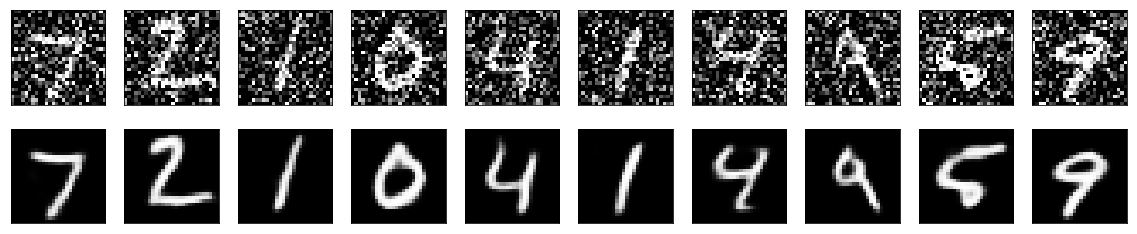

In [27]:
decoded_img_conv2 = autoencoder_conv2.predict(x_test_noise)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img_conv2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()